In [1]:
import os
import shutil
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
from datetime import datetime
import time
import json
import random

import imgaug.augmenters as iaa
#import numpy as np
from imgaug.augmentables.kps import Keypoint, KeypointsOnImage

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset
import math

# get the FLOPs
from fvcore.nn import FlopCountAnalysis, flop_count_table, parameter_count, flop_count_str
#import torchprofile
# # decrease Cuda memory usage
# from torch.cuda.amp import GradScaler, autocast # use gradscaler amd mixed precision training

# Pretrained encoders
import torchvision.models as models

# plot tensor to check loss function
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import plotly.graph_objects as go

# saving results
import os
import json
import csv

# checking torch and tf

In [ ]:
import tensorflow as tf
#from tensorflow.python.platform import build_info as tf_build_info
#print(tf.__version__)
#print("CUDA Version:", tf_build_info.cuda_version)
#print("cuDNN Version:", tf_build_info.cudnn_version)
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [ ]:
print('TensorFlow version:',tf.__version__)

In [ ]:
print("CUDA version: ", tf.sysconfig.get_build_info()["cuda_version"])

In [ ]:
print("cuDNN version: ", tf.sysconfig.get_build_info()["cudnn_version"])

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
import torch
print(torch.__version__)
print('CUDA version:',torch.version.cuda)
print('cuDNN version:',torch.backends.cudnn.version())
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

In [ ]:
import torch
print("Is CUDA available: ", torch.cuda.is_available())
print("Number of GPUs available: ", torch.cuda.device_count())
print("CUDA device name: ", torch.cuda.get_device_name(0))


# DLC imports

In [ ]:
print('hello')

In [ ]:
import deeplabcut

In [ ]:
import deeplabcut
print(deeplabcut.__version__)

In [ ]:
print(deeplabcut.__file__)

In [5]:
# DLC imports (used with DEEPLABCUT env)
import pandas as pd
import os
import pickle
import json
import numpy as np
import cv2           
import os
import math      
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [6]:
import tensorflow.keras.layers
from tensorflow.python.framework import graph_io
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.models import load_model

# SLEAP-io imports

In [ ]:
# use sleap-io_v2 env
import sleap_io as sio

# SLEAP imports

In [1]:
import sleap

In [ ]:
# check that we are using the cloned repository
# output should read something like: /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/sleap/sleap/__init__.py
# if it is a path to the conda env lib, then it is incorrect
print(sleap.__file__)

In [ ]:
sleap.versions()

In [ ]:
sleap.system_summary()

In [5]:
# imports for model evaluation
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json

mpl.style.use("seaborn-deep")

In [6]:
# evaluation
import os
import math
import cv2

import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
import time

In [7]:
# analysis imports
from scipy.interpolate import interp1d
import pandas as pd
import h5py
# import os
# import pickle
# import json
# import numpy as np

In [8]:
# train and run predictions on the aquarium dataset
from PIL import Image
import re
import sleap.io
import sleap.io.video

# 0.0 Important Functions

In [131]:
# load ids into list 
def load_file_to_list(file_path):
    """
    loads a text file to a list with each entry on a new line becoming a new entry in the list.

    :param file_path: Path to the file where the list should be saved.
    :return list of data from file
    """
    # Open the file for writing
    lst = []
    with open(file_path, 'r') as file:
        # Write each item on a new line
        for line in file:
            lst.append(line.strip())
    return lst

In [132]:
# function to load the image data into an arr
# in the same order as the annotations and ids are stored (use id list for this)

# The load image data function may take a while to run

def load_image_data(ids_to_load, image_folder, crop_ext):

  # list for loading image data
  selected_imgs = []

  # for loop for loading image data that is present in the list of ids
  for i, img_id in enumerate(ids_to_load):

    # load the image
    img_path = os.path.join(image_folder, img_id+crop_ext)
    #print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    #print(img)

    # change the img to RGB from BGR as plt uses RGB colour scale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # scaling the pixel values to [0, 1] (you don't need to scal them back)
    img = img/255

    selected_imgs.append(img)

  # Convert the list of images to a NumPy array
  selected_imgs_array = np.array(selected_imgs)
  
  return selected_imgs_array

In [133]:
def df_to_json(df, path):
    """
    Converts a DataFrame to a .json file.

    Parameters:
    df (pd.DataFrame): The DataFrame to be converted to JSON.
    path (str): The path (including file name) where the .json file will be saved.
    """
    df.to_json(path, orient='records', indent=4)

In [134]:

def json_to_df(path):
    """
    Converts a .json file to a DataFrame.

    Parameters:
    path (str): The path to the .json file that will be read.

    Returns:
    pd.DataFrame: The DataFrame created from the JSON file.
    """
    #print(path)
    df = pd.read_json(path, orient='records')
    #print(f"JSON file has been successfully converted to DataFrame.")
    return df

In [135]:
def create_data_lists(df_to_list, list_of_cols):

  # create temp lists
  keypoints_temp = []

  # step through the rows and
  for _, row in df_to_list.iterrows():

    # extract the data arrays
    keypoints_data = row[list_of_cols].values

    # adding data to the list
    keypoints_temp.append(keypoints_data)

  # Convert the list to a NumPy array and make sure that they are float32
  keypoints_array = np.array(keypoints_temp, dtype=np.float32)
  
  return keypoints_array

In [136]:
def set_dtypes_df_full_annotation_abs(df):
    df['vid_id'] = df['vid_id'].astype(str)
    df['img_id'] = df['img_id'].astype(str)
    df['bbox_id'] = df['bbox_id'].astype(str)
    df['bbox_c_x'] = df['bbox_c_x'].astype('float32')
    df['bbox_c_y'] = df['bbox_c_y'].astype('float32')
    df['bbox_w'] = df['bbox_w'].astype('float32')
    df['bbox_h'] = df['bbox_h'].astype('float32')
    df['Head_x'] = df['Head_x'].astype('float32')
    df['Head_y'] = df['Head_y'].astype('float32')
    df['Beak_x'] = df['Beak_x'].astype('float32')
    df['Beak_y'] = df['Beak_y'].astype('float32')
    df['Body_top_x'] = df['Body_top_x'].astype('float32')
    df['Body_top_y'] = df['Body_top_y'].astype('float32')
    df['RFlipper_mid_x'] = df['RFlipper_mid_x'].astype('float32')
    df['RFlipper_mid_y'] = df['RFlipper_mid_y'].astype('float32')
    df['LFlipper_mid_x'] = df['LFlipper_mid_x'].astype('float32')
    df['LFlipper_mid_y'] = df['LFlipper_mid_y'].astype('float32')
    df['Body_bottom_x'] = df['Body_bottom_x'].astype('float32')
    df['Body_bottom_y'] = df['Body_bottom_y'].astype('float32')
    df['RFoot_x'] = df['RFoot_x'].astype('float32')
    df['RFoot_y'] = df['RFoot_y'].astype('float32')
    df['LFoot_x'] = df['LFoot_x'].astype('float32')
    df['LFoot_y'] = df['LFoot_y'].astype('float32')
    df['kp_outside_best_bbox'] = df['kp_outside_best_bbox'].astype('float32')
    df['kp_missing'] = df['kp_missing'].astype('float32')
    df['kp_primary_missing'] = df['kp_primary_missing'].astype(bool)
    df['img_width'] = df['img_width'].astype('float32')
    df['img_height'] = df['img_height'].astype('float32')
    df['bbox_max_h_w'] = df['bbox_max_h_w'].astype('float32')
    return df

In [137]:
def unnorm_keypoints(img_size, keypoints, kp_to_null=None):
    """
    De-normalizes keypoints based on image size and returns the de-normalized keypoints along with 
    the positions of any missing or nullified keypoints.

    Parameters:
    - img_size: Tuple of the image dimensions (height, width).
    - keypoints: List of normalized keypoints (with values between -1 and 1).
    - kp_to_null: Optional. List of indices where the keypoints should be nulled (set to NaN).

    Returns:
    - new_keypoints: List of de-normalized keypoints where each coordinate is scaled back to the 
                     image's pixel dimensions.
    - missing_kp: List of indices where the keypoints were either originally set to -10 (indicating 
                  missing keypoints) or explicitly nullified by the kp_to_null list.
    """
    
    # Extract image width and height
    readjust_x = img_size[0]  # width of the image
    readjust_y = img_size[1]  # height of the image

    new_keypoints = []  # List to store the de-normalized keypoints
    missing_kp = []     # List to store the indices of missing or nullified keypoints

    # Iterate through each keypoint
    for i, keypoint in enumerate(keypoints):
        # Null keypoints if they are -10 or if they are specified in kp_to_null
        if keypoint == -10 or (kp_to_null and i in kp_to_null):
            keypoint = np.nan  # Set keypoint to NaN
            missing_kp.append(i)  # Record the index of the missing or nullified keypoint

        # De-normalize the x-coordinates
        if i % 2 == 0:  # Even indices are x-coordinates
            keypoint = keypoint * readjust_x + readjust_x / 2
        # De-normalize the y-coordinates
        else:  # Odd indices are y-coordinates
            keypoint = keypoint * readjust_y + readjust_y / 2

        new_keypoints.append(keypoint)  # Append the de-normalized keypoint to the list

    return new_keypoints, missing_kp

In [138]:
def norm_keypoints(img_size, keypoints):
    """
    Normalizes keypoints based on image size and replaces any NaN values with -10.

    Parameters:
    - img_size: Tuple of the image dimensions (width, height).
    - keypoints: List of de-normalized keypoints where each coordinate is in pixel dimensions.

    Returns:
    - norm_keypoints: List of normalized keypoints where each coordinate is scaled to the range 
                      [-1, 1] relative to the image size, with NaNs replaced by -10.
    """
    
    # Extract image width and height
    readjust_x = img_size[0]  # width of the image
    readjust_y = img_size[1]  # height of the image

    norm_keypoints = []  # List to store the normalized keypoints

    # Iterate through each keypoint
    for i, keypoint in enumerate(keypoints):
        # Replace NaN values with -10
        if np.isnan(keypoint):
            keypoint = -10.0
        else:
            # Normalize the x-coordinates
            if i % 2 == 0:  # Even indices are x-coordinates
                keypoint = (keypoint - readjust_x / 2) / readjust_x
            # Normalize the y-coordinates
            else:  # Odd indices are y-coordinates
                keypoint = (keypoint - readjust_y / 2) / readjust_y

        norm_keypoints.append(keypoint)  # Append the normalized keypoint to the list

    return norm_keypoints

In [139]:
# Denormalize keypoints for an array of images
def unnorm_keypoints_arr(kp_arr, img_arr):
    """
    Denormalizes keypoints for each image in the array based on the corresponding image size.
    It converts normalized keypoints (range [-1, 1]) back to pixel coordinates.

    Parameters:
    - kp_arr: Array of normalized keypoints, where each entry is a list of keypoints for an image.
              The keypoints are expected to be in the format [x1, y1, x2, y2, ...].
    - img_arr: Array of images. The size of each image is used to scale the keypoints back 
               to their pixel coordinates.

    Returns:
    - kp_abs_arr: Array of denormalized keypoints where each entry corresponds to the denormalized 
                  keypoints for the corresponding image in `img_arr`.
    """

    kp_abs_list = []  # List to store the denormalized keypoints for each image

    # Iterate through each set of keypoints and corresponding image
    for i, kp in enumerate(kp_arr):
        img_size = img_arr[i].shape  # Get the size of the current image (height, width, channels)

        # Denormalize the keypoints based on the image size
        kp_abs, missing_kp = unnorm_keypoints(img_size, kp_arr[i])

        # Save the denormalized keypoints to the list
        kp_abs_list.append(kp_abs)
    
    # Convert the list of denormalized keypoints to a NumPy array
    kp_abs_arr = np.array(kp_abs_list)

    return kp_abs_arr


In [140]:
# Normalize keypoints for an array of images
def norm_keypoints_arr(kp_arr, img_arr):
    """
    Normalizes keypoints for each image in the array based on the corresponding image size.
    It converts keypoints from pixel coordinates back to normalized coordinates (range [-1, 1]).

    Parameters:
    - kp_arr: Array of keypoints, where each entry is a list of keypoints for an image.
              The keypoints are expected to be in the format [x1, y1, x2, y2, ...] 
              with pixel coordinates.
    - img_arr: Array of images. The size of each image is used to scale the keypoints 
               to normalized coordinates.

    Returns:
    - kp_norm_arr: Array of normalized keypoints where each entry corresponds to the normalized 
                   keypoints for the corresponding image in `img_arr`.
    """
        
    kp_norm_list = []  # List to store the normalized keypoints for each image

    # Iterate through each set of keypoints and corresponding image
    for i, kp in enumerate(kp_arr):
        img_size = img_arr[i].shape  # Get the size of the current image (height, width, channels)

        # Normalize the keypoints based on the image size
        kp_norm = norm_keypoints(img_size, kp_arr[i])

        # Save the normalized keypoints to the list
        kp_norm_list.append(kp_norm)
    
    # Convert the list of normalized keypoints to a NumPy array
    kp_norm_arr = np.array(kp_norm_list)  

    return kp_norm_arr

In [141]:
# Apply augmentation to images and keypoints
def apply_aug(img_arr_orig, kp_arr_orig, aug, num_of_kp=8):
    """
    Applies augmentation to a batch of images and their corresponding keypoints.

    Parameters:
    - img_arr_orig: Original array of images. Shape should be (num_imgs, height, width, channels).
    - kp_arr_orig: Original array of keypoints. Shape should be (num_imgs, num_of_kp*2), where each 
                   keypoint is represented by its x and y coordinates in pixel values.
    - aug: An imgaug augmentation sequence or augmenter to apply to the images and keypoints.
    - num_of_kp: Optional. Number of keypoints per image (default is 8).

    Returns:
    - img_arr_aug: Augmented array of images. Same shape as `img_arr_orig`.
    - kp_arr_aug: Augmented array of keypoints. Same shape as `kp_arr_orig`.
    """
    # print(img_arr_orig.shape)
    #print(kp_arr_orig.shape)
    
    # Initialize lists to store augmented images and keypoints
    aug_img = []  # List for augmented images
    aug_kp = []   # List for augmented keypoints

    # Get the number of images in the batch
    num_imgs = img_arr_orig.shape[0]
    #print(num_imgs)

    # Loop over each image and its corresponding keypoints
    for i in range(num_imgs):
        image = img_arr_orig[i]  # Extract the i-th image
        #print(image.shape)
        
        # Convert keypoints to KeypointsOnImage format for imgaug
        keypoints = kp_arr_orig[i]
        #print(keypoints)
        kps = [Keypoint(x=keypoints[j*2], y=keypoints[j*2+1]) for j in range(num_of_kp)]
        kps_on_image = KeypointsOnImage(kps, shape=image.shape)
        
        # Apply the augmentation to the image and keypoints
        image_aug, kps_aug = aug(image=image, keypoints=kps_on_image)
        
        # Convert augmented keypoints back to the original flattened format [x1, y1, x2, y2, ...]
        keypoints_aug = []
        for kp in kps_aug.keypoints:
            keypoints_aug.extend([kp.x, kp.y])
        
        # Append the augmented image and keypoints to their respective lists
        aug_img.append(image_aug)
        aug_kp.append(keypoints_aug)

    # Convert the lists of augmented images and keypoints back to NumPy arrays
    img_arr_aug = np.array(aug_img)
    kp_arr_aug = np.array(aug_kp)

    return img_arr_aug, kp_arr_aug


In [142]:
def detect_padding(image):
    """
    Detects if padding is on the x-axis (left and right) or y-axis (top and bottom)
    of the image and calculates the padding size on one side.

    Parameters:
    - image: A NumPy array representing the image. The shape should be (width, height, channels).

    Returns:
    - is_padding_x: True if padding is on the x-axis, False if padding is on the y-axis.
    - padding_size: The size of the padding on one side in pixels.
    """

    width, height, _ = image.shape
    
    # Check for padding along the x-axis (left and right)
    left_column = image[:, 0, :]#image[0, :, :]  # The first column (left side)
    right_column = image[:, -1, :] #image[-1, :, :]  # The last column (right side)

    # Check for padding along the y-axis (top and bottom)
    top_row = image[:, 0, :]  # The first row (top side)
    bottom_row = image[:, -1, :]  # The last row (bottom side)
    #print(image[:, 5, :] *255)
    #print(left_column*255)
    
    # Check if the columns are fully black (indicating padding)
    if np.all(left_column*255 < 30) and np.all(right_column*255 < 30):
        # Padding is along the x-axis
        is_padding_x = True
        #plot_img(image)
        # Calculate padding size
        #padding_size = np.sum(image[0, :, 0]*255 < 30) // 2  # Count black pixels on one side
        # if padding_size > 60:
        sum1 = np.sum(image[5, :, 0]*255 < 20) // 2
        sum2 = np.sum(image[10, :, 0]*255 < 20) // 2
        sum3 = np.sum(image[60, :, 0]*255 < 20) // 2
        sum4 = np.sum(image[110, :, 0]*255 < 20) // 2
        sum5 = np.sum(image[-60, :, 0]*255 < 20) // 2
        sum6 = np.sum(image[-10, :, 0]*255 < 20) // 2
        sum7 = np.sum(image[-5, :, 0]*255 < 20) // 2
        padding_size = min(sum1, sum2, sum3, sum4, sum5, sum6, sum7)
        #     padding_size = max(average - 5, 1)
        # if padding_size > 60:
        #     sum1 = np.sum(image[5, :, 0]*255 < 10) // 2
        #     sum2 = np.sum(image[10, :, 0]*255 < 10) // 2
        #     sum3 = np.sum(image[60, :, 0]*255 < 10) // 2
        #     sum4 = np.sum(image[110, :, 0]*255 < 10) // 2
        #     sum5 = np.sum(image[-60, :, 0]*255 < 10) // 2
        #     sum6 = np.sum(image[-10, :, 0]*255 < 10) // 2
        #     sum7 = np.sum(image[-5, :, 0]*255 < 10) // 2
        #     average = (sum1 + sum2 + sum3 + sum4 + sum5 + sum6 + sum7) // 7  # Floor division for rounding down
        #     padding_size = max(average - 5, 1)
        if padding_size > 20: 
            padding_size = 20

    else:
        # Padding is along the y-axis (top and bottom)
        is_padding_x = False
        # Calculate padding size
        padding_size = np.sum(image[:, 0, 0]*255 < 30) // 2  # Count black pixels on one side
        # if padding_size > 60:
        sum1 = np.sum(image[:, 5, 0]*255 < 20) // 2
        sum2 = np.sum(image[:, 10, 0]*255 < 20) // 2
        sum3 = np.sum(image[:, 60, 0]*255 < 20) // 2
        sum4 = np.sum(image[:, 110, 0]*255 < 20) // 2
        sum5 = np.sum(image[:, -60, 0]*255 < 20) // 2
        sum6 = np.sum(image[:, -10, 0]*255 < 20) // 2
        sum7 = np.sum(image[:, -5, 0]*255 < 20) // 2
        padding_size = min(sum1, sum2, sum3, sum4, sum5, sum6, sum7)
        #     padding_size = max(average - 5, 1)
        # if padding_size > 60:
        #     sum1 = np.sum(image[:, 5, 0]*255 < 10) // 2
        #     sum2 = np.sum(image[:, 10, 0]*255 < 10) // 2
        #     sum3 = np.sum(image[:, 60, 0]*255 < 10) // 2
        #     sum4 = np.sum(image[:, 110, 0]*255 < 10) // 2
        #     sum5 = np.sum(image[:, -60, 0]*255 < 10) // 2
        #     sum6 = np.sum(image[:, -10, 0]*255 < 10) // 2
        #     sum7 = np.sum(image[:, -5, 0]*255 < 10) // 2
        #     average = (sum1 + sum2 + sum3 + sum4 + sum5 + sum6 + sum7) // 7  # Floor division for rounding down
        #     padding_size = max(average - 5, 1)
        if padding_size > 20: 
            padding_size = 20

    return is_padding_x, padding_size

In [143]:
def apply_aug_translate(train_imgs_array, train_kp_array_abs):

    
    # Get the number of images in the batch
    num_imgs = train_imgs_array.shape[0]
    # print(num_imgs)

    # creat empty arrays
    train_imgs_array_aug_trans = np.empty((0, train_imgs_array.shape[1], train_imgs_array.shape[2], train_imgs_array.shape[3]), dtype=train_imgs_array.dtype)
    train_kp_array_aug_trans = np.empty((0, train_kp_array_abs.shape[1]), dtype=train_kp_array_abs.dtype)

    # print(train_imgs_array_aug_trans.shape)
    # print(train_kp_array_aug_trans.shape)

    # Loop over each image and its corresponding keypoints
    for i in range(num_imgs):
        image = train_imgs_array[i]  # Extract the i-th image
        kp = train_kp_array_abs[i]
        # print(i)
        # print(image.shape)
        # print(kp.shape)

        is_padding_x, padding_size = detect_padding(image)
        # print(f'this: {i}')
        # print(is_padding_x)
        # print(padding_size)

        if is_padding_x:
            seq_trans_x_left = iaa.Sequential([
                iaa.TranslateX(px=(-padding_size, -padding_size)),
            ])
            seq_trans_x_right = iaa.Sequential([
                iaa.TranslateX(px=(padding_size, padding_size)),
            ])

            # Convert to shape (1, 220, 220, 3) and (1, 16)
            image = np.expand_dims(image, axis=0)
            #print(is_padding_x)
            #print(image.shape)
            #print(i)
            kp = np.expand_dims(kp, axis=0)

            # apply augmentations
            single_trans_x_left_img_arr, single_trans_x_left_kp_arr = apply_aug(image, kp, seq_trans_x_left)
            single_trans_x_right_img_arr, single_trans_x_right_kp_arr = apply_aug(image, kp, seq_trans_x_right)

            #save to image array
            train_imgs_array_aug_trans = np.concatenate((train_imgs_array_aug_trans, single_trans_x_left_img_arr), axis=0)
            train_imgs_array_aug_trans = np.concatenate((train_imgs_array_aug_trans, single_trans_x_right_img_arr), axis=0)
            #save to kp array
            train_kp_array_aug_trans = np.concatenate((train_kp_array_aug_trans, single_trans_x_left_kp_arr), axis=0)
            train_kp_array_aug_trans = np.concatenate((train_kp_array_aug_trans, single_trans_x_right_kp_arr), axis=0)

        else :
            seq_trans_y_up = iaa.Sequential([
                iaa.TranslateY(px=(-padding_size, -padding_size)),
            ])
            seq_trans_y_down = iaa.Sequential([
                iaa.TranslateY(px=(padding_size, padding_size)),
            ])

            # Convert to shape (1, 220, 220, 3) and (1, 16)
            image = np.expand_dims(image, axis=0)
            #print(is_padding_x)
            #print(image.shape)
            #print(i)
            kp = np.expand_dims(kp, axis=0)

            # apply augmentations
            single_trans_y_up_img_arr, single_trans_y_up_kp_arr = apply_aug(image, kp, seq_trans_y_up)
            single_trans_y_down_img_arr, single_trans_y_down_kp_arr = apply_aug(image, kp, seq_trans_y_down)

            #save to image array
            train_imgs_array_aug_trans = np.concatenate((train_imgs_array_aug_trans, single_trans_y_up_img_arr), axis=0)
            train_imgs_array_aug_trans = np.concatenate((train_imgs_array_aug_trans, single_trans_y_down_img_arr), axis=0)
            #save to kp array
            train_kp_array_aug_trans = np.concatenate((train_kp_array_aug_trans, single_trans_y_up_kp_arr), axis=0)
            train_kp_array_aug_trans = np.concatenate((train_kp_array_aug_trans, single_trans_y_down_kp_arr), axis=0)


    return train_imgs_array_aug_trans, train_kp_array_aug_trans

In [144]:
def replace_out_of_img_kp(arr):
    """
    Finds and replaces the elements in the array that are outside the frame but not the missing ones.
    Specifically, elements greater than 0.5 are replaced with 0.5, and elements less than -0.5 but 
    greater than -9.0 are replaced with -0.5.

    Parameters:
    - arr: A NumPy array of shape (n, 16).

    Returns:
    - modified_arr: The modified NumPy array with replaced values.
    - count_replacements: The number of elements that were replaced.
    """
    # Make a copy of the array to avoid modifying the original array
    modified_arr = arr.copy()

    # Replace elements greater than 0.5 with 0.5
    count_pos_replacements = np.sum(modified_arr > 0.5)
    modified_arr[modified_arr > 0.5] = 0.49

    # Replace elements less than -0.5 but greater than -9.0 with -0.5
    count_neg_replacements = np.sum((modified_arr < -0.5) & (modified_arr > -9.0))
    modified_arr[(modified_arr < -0.5) & (modified_arr > -9.0)] = -0.49

    # Total count of replacements
    count_replacements = count_pos_replacements + count_neg_replacements

    return modified_arr, count_replacements

In [145]:
def replace_out_of_img_kp(arr):
    """
    Finds and replaces the elements in the array that are outside the frame but not the missing ones.
    Specifically, elements greater than 0.5 are replaced with 0.5, and elements less than -0.5 but 
    greater than -9.0 are replaced with -0.5.

    Parameters:
    - arr: A NumPy array of shape (n, 16).

    Returns:
    - modified_arr: The modified NumPy array with replaced values.
    - count_replacements: The number of elements that were replaced.
    """
    # Make a copy of the array to avoid modifying the original array
    modified_arr = arr.copy()

    # Replace elements greater than 0.5 with 0.5
    count_pos_replacements = np.sum(modified_arr > 0.5)
    modified_arr[modified_arr > 0.5] = 0.49

    # Replace elements less than -0.5 but greater than -9.0 with -0.5
    count_neg_replacements = np.sum((modified_arr < -0.5) & (modified_arr > -9.0))
    modified_arr[(modified_arr < -0.5) & (modified_arr > -9.0)] = -0.49

    # Total count of replacements
    count_replacements = count_pos_replacements + count_neg_replacements

    return modified_arr, count_replacements

In [146]:
def masked_mse(y_true, y_pred):
    """
    Computes the mean squared error, ignoring the invisible keypoints.
    Assuming that -10.0 indicates an invisible keypoint.
    """
    # Create a mask where keypoints are visible
    mask = (y_true != -10.0).float().to(y_true.device)

    # Apply the mask to filter out invisible keypoints from both
    # the predictions and the true values
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask

    # Compute the Mean Squared Error only on the visible keypoints
    mse = F.mse_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    return mse

In [147]:
def masked_mae(y_true, y_pred):
    """
    Computes the mean squared error, ignoring the invisible keypoints.
    Assuming that -10.0 indicates an invisible keypoint.
    """
    # Create a mask where keypoints are visible
    mask = (y_true != -10.0).float().to(y_true.device)

    # Apply the mask to filter out invisible keypoints from both
    # the predictions and the true values
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask

    
    # Compute the mean absolute Error only on the visible keypoints
    mae = F.l1_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    return mae

In [148]:
#OLD ANGLE LOSS FUNCTION

# def find_tensor_angle(input_tensor):
#     """
#     Compute angles between vectors defined in input_tensor.

#     Parameters:
#     - input_tensor: Tensor with 6 columns and multiple rows.
#     Returns:
#     - Tensor of angles in radians with the same number of rows as input_tensor.
#     """
#     # # Step 1: Create a mask for rows without -10
#     # mask = (input_tensor != -10).all(dim=1).unsqueeze(1)  # Mask rows with -10

#     # # Step 2: Adjust input_tensor using the mask
#     # #adjusted_input_tensor = input_tensor * mask  # Set rows with -10 to 0

#     # Step 3: Compute vectors BA and BC
#     # vector_tensor = torch.zeros((adjusted_input_tensor.size(0), 4), device=input_tensor.device)
#     # vector_tensor[:, 0] = adjusted_input_tensor[:, 0] - adjusted_input_tensor[:, 2]  # BA_x
#     # vector_tensor[:, 1] = adjusted_input_tensor[:, 1] - adjusted_input_tensor[:, 3]  # BA_y
#     # vector_tensor[:, 2] = adjusted_input_tensor[:, 4] - adjusted_input_tensor[:, 2]  # BC_x
#     # vector_tensor[:, 3] = adjusted_input_tensor[:, 5] - adjusted_input_tensor[:, 3]  # BC_y
#     vector_tensor = torch.zeros((input_tensor.size(0), 4), device=input_tensor.device)
#     vector_tensor[:, 0] = input_tensor[:, 0] - input_tensor[:, 2]  # BA_x
#     vector_tensor[:, 1] = input_tensor[:, 1] - input_tensor[:, 3]  # BA_y
#     vector_tensor[:, 2] = input_tensor[:, 4] - input_tensor[:, 2]  # BC_x
#     vector_tensor[:, 3] = input_tensor[:, 5] - input_tensor[:, 3]  # BC_y

#         # DEBUG - check for nan
#     if torch.isnan(vector_tensor).any():
#         print('going to nan')

#     # Step 4: Compute dot product and magnitudes
#     dot_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 2] + 
#                        vector_tensor[:, 1] * vector_tensor[:, 3]).unsqueeze(1)
#     magnitude_tensor_BA = torch.linalg.norm(vector_tensor[:, :2], dim=1, keepdim=True)  # Magnitude of BA
#     magnitude_tensor_BC = torch.linalg.norm(vector_tensor[:, 2:], dim=1, keepdim=True)  # Magnitude of BC

#     # DEBUG - check for nan
#     if torch.isnan(dot_prod_tensor).any():
#         print('going to nan')
#             # DEBUG - check for nan
#     if torch.isnan(magnitude_tensor_BA).any():
#         print('going to nan')
#         # DEBUG - check for nan
#     if torch.isnan(magnitude_tensor_BC).any():
#         print('going to nan')


#     # Step 5: Compute angles in radians
#     clamp_vals = torch.clamp((dot_prod_tensor / (magnitude_tensor_BA * magnitude_tensor_BC)), -0.99999, 0.99999) # Clamp values to the valid range for acos
#        # DEBUG - check for nan
#     if torch.isnan(clamp_vals).any():
#         print('going to nan')
    
#     angle_tensor = torch.acos(clamp_vals)
#        # DEBUG - check for nan
#     if torch.isnan(clamp_vals).any():
#         print('going to nan')


#     return angle_tensor
# # # test find_tensor_angle
# # test_tensor = torch.tensor([
# #     [-10.0, -10.0, -10.0, -10.0, -10.0, -10.0],  # Forms a straight line, angle = 180 degrees
# #     [1.0, 0.0, 0.0, 0.0, 1.0, 1.0],    # Forms a right-angle triangle, angle < 180 degrees
# #     [-10.0, 0.0, -0.0, 0.0, 1.0, 0.0]    # Forms a horizontal line, angle = 180 degrees
# # ], dtype=torch.float32)

# # print(find_tensor_angle(test_tensor))
# def tensor_abs_difference(tensor1, tensor2):
#     """
#     Compute the absolute difference between two tensors, each with a single column and multiple rows.

#     Parameters:
#     - tensor1: A PyTorch tensor with shape (N, 1)
#     - tensor2: A PyTorch tensor with shape (N, 1)

#     Returns:
#     - A PyTorch tensor with the absolute differences, shape (N, 1)
#     """
#     # Ensure both tensors have the same shape
#     if tensor1.shape != tensor2.shape:
#         raise ValueError("Input tensors must have the same shape.")

#     # Compute absolute difference
#     abs_diff = torch.abs(tensor1 - tensor2)

#     # DEBUG - check for nan
#     if torch.isnan(abs_diff).any():
#         print('going to nan')

#     return abs_diff

# # find the angle loss
# def find_single_angle_loss(y_true_subset, y_pred_subset):

#     y_true_angle = find_tensor_angle(y_true_subset)
#     y_pred_angle = find_tensor_angle(y_pred_subset)

#     # find the abs difference in angles
#     angle_abs_differnce = tensor_abs_difference(y_true_angle, y_pred_angle)
    
#     # DEBUG - check for nan
#     if torch.isnan(angle_abs_differnce).any():
#         print('going to nan')

#     # normalise the abs difference (POTENTIALLY NEED TO DO THIS SO IT IS IN THE SAME RANGE AS THE MAE LOSS)

#     # Step 1: Create a mask for rows without -10
#     mask = (y_true_subset != -10).all(dim=1).unsqueeze(1)  # Mask rows with -10

#     # mask angles where kp are missing
#     angle_abs_differnce_masked = angle_abs_differnce * mask

#     # normalise the abs difference (POTENTIALLY NEED TO DO THIS SO IT IS IN THE SAME RANGE AS THE MAE LOSS) - can only go up to 2*pi rad, so divide by that

#     # find the mean abs difference between angles
#     num_angles = torch.sum(mask)
#     if num_angles == 0:
#         num_angles = 1 

#     single_angle_loss = torch.sum(angle_abs_differnce_masked)/num_angles

#     # DEBUG - check for nan
#     if torch.isnan(single_angle_loss).any():
#         print('going to nan')
    
#     return single_angle_loss
# def find_angle_loss(y_true, y_pred):

#     beak_angle_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     beak_angle_true[:,0] = y_true[:,2]
#     beak_angle_true[:,1] = y_true[:,3]
#     beak_angle_true[:,2] = y_true[:,0]
#     beak_angle_true[:,3] = y_true[:,1]
#     beak_angle_true[:,4] = y_true[:,4]
#     beak_angle_true[:,5] = y_true[:,5]
#     beak_angle_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     beak_angle_pred[:,0] = y_pred[:,2]
#     beak_angle_pred[:,1] = y_pred[:,3]
#     beak_angle_pred[:,2] = y_pred[:,0]
#     beak_angle_pred[:,3] = y_pred[:,1]
#     beak_angle_pred[:,4] = y_pred[:,4]
#     beak_angle_pred[:,5] = y_pred[:,5]

#     beak_angle_loss = find_single_angle_loss(beak_angle_true, beak_angle_pred)

#     head_angle_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     head_angle_true[:,0] = y_true[:,0]
#     head_angle_true[:,1] = y_true[:,1]
#     head_angle_true[:,2] = y_true[:,4]
#     head_angle_true[:,3] = y_true[:,5]
#     head_angle_true[:,4] = y_true[:,10]
#     head_angle_true[:,5] = y_true[:,11]
#     head_angle_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     head_angle_pred[:,0] = y_pred[:,0]
#     head_angle_pred[:,1] = y_pred[:,1]
#     head_angle_pred[:,2] = y_pred[:,4]
#     head_angle_pred[:,3] = y_pred[:,5]
#     head_angle_pred[:,4] = y_pred[:,10]
#     head_angle_pred[:,5] = y_pred[:,11]

#     head_angle_loss = find_single_angle_loss(head_angle_true, head_angle_pred)

#     right_wing_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     right_wing_true[:,0] = y_true[:,6]
#     right_wing_true[:,1] = y_true[:,7]
#     right_wing_true[:,2] = y_true[:,4]
#     right_wing_true[:,3] = y_true[:,5]
#     right_wing_true[:,4] = y_true[:,10]
#     right_wing_true[:,5] = y_true[:,11]
#     right_wing_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     right_wing_pred[:,0] = y_pred[:,6]
#     right_wing_pred[:,1] = y_pred[:,7]
#     right_wing_pred[:,2] = y_pred[:,4]
#     right_wing_pred[:,3] = y_pred[:,5]
#     right_wing_pred[:,4] = y_pred[:,10]
#     right_wing_pred[:,5] = y_pred[:,11]

#     right_wing_loss = find_single_angle_loss(right_wing_true, right_wing_pred)

#     left_wing_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     left_wing_true[:,0] = y_true[:,8]
#     left_wing_true[:,1] = y_true[:,9]
#     left_wing_true[:,2] = y_true[:,4]
#     left_wing_true[:,3] = y_true[:,5]
#     left_wing_true[:,4] = y_true[:,10]
#     left_wing_true[:,5] = y_true[:,11]
#     left_wing_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     left_wing_pred[:,0] = y_pred[:,8]
#     left_wing_pred[:,1] = y_pred[:,9]
#     left_wing_pred[:,2] = y_pred[:,4]
#     left_wing_pred[:,3] = y_pred[:,5]
#     left_wing_pred[:,4] = y_pred[:,10]
#     left_wing_pred[:,5] = y_pred[:,11]

#     left_wing_loss = find_single_angle_loss(left_wing_true, left_wing_pred)

#     right_foot_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     right_foot_true[:,0] = y_true[:,12]
#     right_foot_true[:,1] = y_true[:,13]
#     right_foot_true[:,2] = y_true[:,10]
#     right_foot_true[:,3] = y_true[:,11]
#     right_foot_true[:,4] = y_true[:,4]
#     right_foot_true[:,5] = y_true[:,5]
#     right_foot_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     right_foot_pred[:,0] = y_pred[:,12]
#     right_foot_pred[:,1] = y_pred[:,13]
#     right_foot_pred[:,2] = y_pred[:,10]
#     right_foot_pred[:,3] = y_pred[:,11]
#     right_foot_pred[:,4] = y_pred[:,4]
#     right_foot_pred[:,5] = y_pred[:,5]

#     right_foot_loss = find_single_angle_loss(right_foot_true, right_foot_pred)

#     left_foot_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     left_foot_true[:,0] = y_true[:,14]
#     left_foot_true[:,1] = y_true[:,15]
#     left_foot_true[:,2] = y_true[:,10]
#     left_foot_true[:,3] = y_true[:,11]
#     left_foot_true[:,4] = y_true[:,4]
#     left_foot_true[:,5] = y_true[:,5]
#     left_foot_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     left_foot_pred[:,0] = y_pred[:,14]
#     left_foot_pred[:,1] = y_pred[:,15]
#     left_foot_pred[:,2] = y_pred[:,10]
#     left_foot_pred[:,3] = y_pred[:,11]
#     left_foot_pred[:,4] = y_pred[:,4]
#     left_foot_pred[:,5] = y_pred[:,5]
    
#     left_foot_loss = find_single_angle_loss(left_foot_true, left_foot_pred)


#     total_angle_loss = beak_angle_loss + head_angle_loss + right_wing_loss + left_wing_loss + right_foot_loss + left_foot_loss

#     angle_loss = total_angle_loss/6

#     return angle_loss
# def masked_simpleAngles(y_true, y_pred):
#     """
#     Computes the mean squared error, ignoring the invisible keypoints.
#     Assuming that -10.0 indicates an invisible keypoint.
#     """
#     # DEBUG 
#     if torch.isnan(y_true).any():
#         print('going to nan')
#     if torch.isnan(y_pred).any():
#         print('going to nan')

#     # find the angle loss 
#     angle_loss = find_angle_loss(y_true, y_pred)

#     # normalise the loss
#     angle_loss = angle_loss/torch.pi

#     # Create a mask where keypoints are visible
#     mask = (y_true != -10.0).float().to(y_true.device)

#     # Apply the mask to filter out invisible keypoints from both
#     # the predictions and the true values
#     y_true_masked = y_true * mask
#     y_pred_masked = y_pred * mask

#     # Compute the Mean Squared Error only on the visible keypoints
#     mae =  F.l1_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    

#     loss = (mae * 0.7) + (angle_loss * 0.3) 
#     # DEBUG
#     if torch.isnan(angle_loss).any():
#         print('going to nan')
        
#     print('mae loss:',mae.item(), '    angle_loss:', angle_loss.item(), '     total_loss:', loss.item())
#     return loss

In [149]:
# def find_tensor_angle(input_tensor):
#     """
#     Compute angles between vectors defined in input_tensor.

#     Parameters:
#     - input_tensor: Tensor with 6 columns and multiple rows.
#     Returns:
#     - Tensor of angles in radians with the same number of rows as input_tensor.
#     """
#     # # Step 1: Create a mask for rows without -10
#     # mask = (input_tensor != -10).all(dim=1).unsqueeze(1)  # Mask rows with -10

#     # # Step 2: Adjust input_tensor using the mask
#     # #adjusted_input_tensor = input_tensor * mask  # Set rows with -10 to 0

#     # Step 3: Compute vectors BA and BC
#     # vector_tensor = torch.zeros((adjusted_input_tensor.size(0), 4), device=input_tensor.device)
#     # vector_tensor[:, 0] = adjusted_input_tensor[:, 0] - adjusted_input_tensor[:, 2]  # BA_x
#     # vector_tensor[:, 1] = adjusted_input_tensor[:, 1] - adjusted_input_tensor[:, 3]  # BA_y
#     # vector_tensor[:, 2] = adjusted_input_tensor[:, 4] - adjusted_input_tensor[:, 2]  # BC_x
#     # vector_tensor[:, 3] = adjusted_input_tensor[:, 5] - adjusted_input_tensor[:, 3]  # BC_y
#     vector_tensor = torch.zeros((input_tensor.size(0), 4), device=input_tensor.device)
#     vector_tensor[:, 0] = input_tensor[:, 0] - input_tensor[:, 2]  # BA_x
#     vector_tensor[:, 1] = input_tensor[:, 1] - input_tensor[:, 3]  # BA_y
#     vector_tensor[:, 2] = input_tensor[:, 4] - input_tensor[:, 2]  # BC_x
#     vector_tensor[:, 3] = input_tensor[:, 5] - input_tensor[:, 3]  # BC_y

#         # DEBUG - check for nan
#     if torch.isnan(vector_tensor).any():
#         print('going to nan')

#     # Step 4: Compute dot product and magnitudes
#     dot_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 2] + 
#                        vector_tensor[:, 1] * vector_tensor[:, 3]).unsqueeze(1)
#     magnitude_tensor_BA = torch.linalg.norm(vector_tensor[:, :2], dim=1, keepdim=True)  # Magnitude of BA
#     magnitude_tensor_BC = torch.linalg.norm(vector_tensor[:, 2:], dim=1, keepdim=True)  # Magnitude of BC

#     # DEBUG - check for nan
#     if torch.isnan(dot_prod_tensor).any():
#         print('going to nan')
#             # DEBUG - check for nan
#     if torch.isnan(magnitude_tensor_BA).any():
#         print('going to nan')
#         # DEBUG - check for nan
#     if torch.isnan(magnitude_tensor_BC).any():
#         print('going to nan')


#     # Step 5: Compute angles in radians
#     clamp_vals = torch.clamp((dot_prod_tensor / (magnitude_tensor_BA * magnitude_tensor_BC)), -0.99999, 0.99999) # Clamp values to the valid range for acos
#        # DEBUG - check for nan
#     if torch.isnan(clamp_vals).any():
#         print('going to nan')
    
#     angle_tensor = torch.acos(clamp_vals)
#        # DEBUG - check for nan
#     if torch.isnan(clamp_vals).any():
#         print('going to nan')


#     return angle_tensor

In [150]:
# # test find_tensor_angle
# test_tensor = torch.tensor([
#     [-10.0, -10.0, -10.0, -10.0, -10.0, -10.0],  # Forms a straight line, angle = 180 degrees
#     [1.0, 0.0, 0.0, 0.0, 1.0, 1.0],    # Forms a right-angle triangle, angle < 180 degrees
#     [-10.0, 0.0, -0.0, 0.0, 1.0, 0.0]    # Forms a horizontal line, angle = 180 degrees
# ], dtype=torch.float32)

# print(find_tensor_angle(test_tensor))

In [151]:
# def tensor_abs_difference(tensor1, tensor2):
#     """
#     Compute the absolute difference between two tensors, each with a single column and multiple rows.

#     Parameters:
#     - tensor1: A PyTorch tensor with shape (N, 1)
#     - tensor2: A PyTorch tensor with shape (N, 1)

#     Returns:
#     - A PyTorch tensor with the absolute differences, shape (N, 1)
#     """
#     # Ensure both tensors have the same shape
#     if tensor1.shape != tensor2.shape:
#         raise ValueError("Input tensors must have the same shape.")

#     # Compute absolute difference
#     abs_diff = torch.abs(tensor1 - tensor2)

#     # DEBUG - check for nan
#     if torch.isnan(abs_diff).any():
#         print('going to nan')

#     return abs_diff


In [152]:
# find the angle loss
# def find_single_angle_loss(y_true_subset, y_pred_subset):

#     y_true_angle = find_tensor_angle(y_true_subset)
#     y_pred_angle = find_tensor_angle(y_pred_subset)

#     # find the abs difference in angles
#     angle_abs_differnce = tensor_abs_difference(y_true_angle, y_pred_angle)
    
#     # DEBUG - check for nan
#     if torch.isnan(angle_abs_differnce).any():
#         print('going to nan')

#     # normalise the abs difference (POTENTIALLY NEED TO DO THIS SO IT IS IN THE SAME RANGE AS THE MAE LOSS)

#     # Step 1: Create a mask for rows without -10
#     mask = (y_true_subset != -10).all(dim=1).unsqueeze(1)  # Mask rows with -10

#     # mask angles where kp are missing
#     angle_abs_differnce_masked = angle_abs_differnce * mask

#     # normalise the abs difference (POTENTIALLY NEED TO DO THIS SO IT IS IN THE SAME RANGE AS THE MAE LOSS) - can only go up to 2*pi rad, so divide by that

#     # find the mean abs difference between angles
#     num_angles = torch.sum(mask)
#     if num_angles == 0:
#         num_angles = 1 

#     single_angle_loss = torch.sum(angle_abs_differnce_masked)/num_angles

#     # DEBUG - check for nan
#     if torch.isnan(single_angle_loss).any():
#         print('going to nan')
    
#     return single_angle_loss

In [153]:
# def find_angle_loss(y_true, y_pred):

#     beak_angle_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     beak_angle_true[:,0] = y_true[:,2]
#     beak_angle_true[:,1] = y_true[:,3]
#     beak_angle_true[:,2] = y_true[:,0]
#     beak_angle_true[:,3] = y_true[:,1]
#     beak_angle_true[:,4] = y_true[:,4]
#     beak_angle_true[:,5] = y_true[:,5]
#     beak_angle_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     beak_angle_pred[:,0] = y_pred[:,2]
#     beak_angle_pred[:,1] = y_pred[:,3]
#     beak_angle_pred[:,2] = y_pred[:,0]
#     beak_angle_pred[:,3] = y_pred[:,1]
#     beak_angle_pred[:,4] = y_pred[:,4]
#     beak_angle_pred[:,5] = y_pred[:,5]

#     beak_angle_loss = find_single_angle_loss(beak_angle_true, beak_angle_pred)

#     head_angle_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     head_angle_true[:,0] = y_true[:,0]
#     head_angle_true[:,1] = y_true[:,1]
#     head_angle_true[:,2] = y_true[:,4]
#     head_angle_true[:,3] = y_true[:,5]
#     head_angle_true[:,4] = y_true[:,10]
#     head_angle_true[:,5] = y_true[:,11]
#     head_angle_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     head_angle_pred[:,0] = y_pred[:,0]
#     head_angle_pred[:,1] = y_pred[:,1]
#     head_angle_pred[:,2] = y_pred[:,4]
#     head_angle_pred[:,3] = y_pred[:,5]
#     head_angle_pred[:,4] = y_pred[:,10]
#     head_angle_pred[:,5] = y_pred[:,11]

#     head_angle_loss = find_single_angle_loss(head_angle_true, head_angle_pred)

#     right_wing_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     right_wing_true[:,0] = y_true[:,6]
#     right_wing_true[:,1] = y_true[:,7]
#     right_wing_true[:,2] = y_true[:,4]
#     right_wing_true[:,3] = y_true[:,5]
#     right_wing_true[:,4] = y_true[:,10]
#     right_wing_true[:,5] = y_true[:,11]
#     right_wing_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     right_wing_pred[:,0] = y_pred[:,6]
#     right_wing_pred[:,1] = y_pred[:,7]
#     right_wing_pred[:,2] = y_pred[:,4]
#     right_wing_pred[:,3] = y_pred[:,5]
#     right_wing_pred[:,4] = y_pred[:,10]
#     right_wing_pred[:,5] = y_pred[:,11]

#     right_wing_loss = find_single_angle_loss(right_wing_true, right_wing_pred)

#     left_wing_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     left_wing_true[:,0] = y_true[:,8]
#     left_wing_true[:,1] = y_true[:,9]
#     left_wing_true[:,2] = y_true[:,4]
#     left_wing_true[:,3] = y_true[:,5]
#     left_wing_true[:,4] = y_true[:,10]
#     left_wing_true[:,5] = y_true[:,11]
#     left_wing_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     left_wing_pred[:,0] = y_pred[:,8]
#     left_wing_pred[:,1] = y_pred[:,9]
#     left_wing_pred[:,2] = y_pred[:,4]
#     left_wing_pred[:,3] = y_pred[:,5]
#     left_wing_pred[:,4] = y_pred[:,10]
#     left_wing_pred[:,5] = y_pred[:,11]

#     left_wing_loss = find_single_angle_loss(left_wing_true, left_wing_pred)

#     right_foot_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     right_foot_true[:,0] = y_true[:,12]
#     right_foot_true[:,1] = y_true[:,13]
#     right_foot_true[:,2] = y_true[:,10]
#     right_foot_true[:,3] = y_true[:,11]
#     right_foot_true[:,4] = y_true[:,4]
#     right_foot_true[:,5] = y_true[:,5]
#     right_foot_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     right_foot_pred[:,0] = y_pred[:,12]
#     right_foot_pred[:,1] = y_pred[:,13]
#     right_foot_pred[:,2] = y_pred[:,10]
#     right_foot_pred[:,3] = y_pred[:,11]
#     right_foot_pred[:,4] = y_pred[:,4]
#     right_foot_pred[:,5] = y_pred[:,5]

#     right_foot_loss = find_single_angle_loss(right_foot_true, right_foot_pred)

#     left_foot_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     left_foot_true[:,0] = y_true[:,14]
#     left_foot_true[:,1] = y_true[:,15]
#     left_foot_true[:,2] = y_true[:,10]
#     left_foot_true[:,3] = y_true[:,11]
#     left_foot_true[:,4] = y_true[:,4]
#     left_foot_true[:,5] = y_true[:,5]
#     left_foot_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     left_foot_pred[:,0] = y_pred[:,14]
#     left_foot_pred[:,1] = y_pred[:,15]
#     left_foot_pred[:,2] = y_pred[:,10]
#     left_foot_pred[:,3] = y_pred[:,11]
#     left_foot_pred[:,4] = y_pred[:,4]
#     left_foot_pred[:,5] = y_pred[:,5]
    
#     left_foot_loss = find_single_angle_loss(left_foot_true, left_foot_pred)


#     total_angle_loss = beak_angle_loss + head_angle_loss + right_wing_loss + left_wing_loss + right_foot_loss + left_foot_loss

#     angle_loss = total_angle_loss/6

#     return angle_loss

In [154]:
# # NEW ANGLE LOSS FUNCTION

# def find_tensor_angle(input_tensor):
#     """
#     Compute angles between vectors defined in input_tensor, returning angles in [0, 2pi).

#     Parameters:
#     - input_tensor: Tensor with 6 columns and multiple rows.

#     Returns:
#     - Tensor of angles in radians with the same number of rows as input_tensor.
#     """
#     # Step 3: Compute vectors BA and BC
#     vector_tensor = torch.zeros((input_tensor.size(0), 4), device=input_tensor.device)
#     vector_tensor[:, 0] = input_tensor[:, 0] - input_tensor[:, 2]  # BA_x
#     vector_tensor[:, 1] = input_tensor[:, 1] - input_tensor[:, 3]  # BA_y
#     vector_tensor[:, 2] = input_tensor[:, 4] - input_tensor[:, 2]  # BC_x
#     vector_tensor[:, 3] = input_tensor[:, 5] - input_tensor[:, 3]  # BC_y

#     # Step 4: Compute dot product, magnitudes, and cross product
#     dot_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 2] + 
#                        vector_tensor[:, 1] * vector_tensor[:, 3]).unsqueeze(1)
#     # magnitude_tensor_BA = torch.linalg.norm(vector_tensor[:, :2], dim=1, keepdim=True)
#     # magnitude_tensor_BC = torch.linalg.norm(vector_tensor[:, 2:], dim=1, keepdim=True)
#     cross_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 3] - 
#                          vector_tensor[:, 1] * vector_tensor[:, 2]).unsqueeze(1)

#     # Compute angle in radians
#     angle_tensor = torch.atan2(cross_prod_tensor, dot_prod_tensor)

#     # Convert angle to [0, 2pi)
#     angle_tensor = torch.where(angle_tensor < 0, angle_tensor + 2 * torch.pi, angle_tensor)

#     return angle_tensor

# def tensor_angle_difference(tensor1, tensor2):
#     """
#     Compute the angular difference between two tensors (in [0, 2pi))

#     Parameters:
#     - tensor1: A PyTorch tensor with angles in radians.
#     - tensor2: A PyTorch tensor with angles in radians.

#     Returns:
#     - A PyTorch tensor with angular differences in [0, pi].
#     """
#     angle_diff = torch.abs(tensor1 - tensor2)
#     return torch.where(angle_diff > torch.pi, 2 * torch.pi - angle_diff, angle_diff)

# def find_single_angle_loss(y_true_subset, y_pred_subset):
#     """
#     Compute the mean angular loss between y_true_subset and y_pred_subset.

#     Parameters:
#     - y_true_subset: Tensor of true coordinates.
#     - y_pred_subset: Tensor of predicted coordinates.

#     Returns:
#     - The mean angular loss.
#     """
#     y_true_angle = find_tensor_angle(y_true_subset)
#     y_pred_angle = find_tensor_angle(y_pred_subset)

#     # Compute angular difference
#     angle_abs_difference = tensor_angle_difference(y_true_angle, y_pred_angle)

#     # Create a mask for valid rows (without -10)
#     mask = (y_true_subset != -10).all(dim=1).unsqueeze(1) # Mask rows with -10
#     angle_abs_difference_masked = angle_abs_difference * mask # mask angles where kp are missing

#     # Calculate mean angular loss
#     num_angles = torch.sum(mask)
#     if num_angles == 0:
#         num_angles = 1

#     single_angle_loss = torch.sum(angle_abs_difference_masked) / num_angles
#     return single_angle_loss

# def create_angle_tensor(subset, indices):
#     """
#     Helper function to generate a tensor containing the coordinates of keypoints needed to compute angles.
#     """
#     tensor = torch.zeros((subset.size(0), 6), device=subset.device)
    
#     for i, index in enumerate(indices):
#         tensor[:, i] = subset[:, index] 

#     return tensor


# def find_angle_loss(y_true, y_pred):
#     """
#     Compute the average angular loss across all sets of angles.

#     Parameters:
#     - y_true: Tensor of true keypoint coordinates.
#     - y_pred: Tensor of predicted keypoint coordinates.

#     Returns:
#     - The average angular loss.
#     """

#     indices_list = [
#         (2, 3, 0, 1, 4, 5),  # Beak
#         (0, 1, 4, 5, 10, 11),  # Head
#         (6, 7, 4, 5, 10, 11),  # Right wing
#         (8, 9, 4, 5, 10, 11),  # Left wing
#         (12, 13, 10, 11, 4, 5),  # Right foot
#         (14, 15, 10, 11, 4, 5)  # Left foot
#     ]

#     total_loss = 0
#     # DEBUG
#     # i = 1
#     # total_loss_old = 0
    
#     for indices in indices_list:
#         true_tensor = create_angle_tensor(y_true, indices)
#         pred_tensor = create_angle_tensor(y_pred, indices)
#         total_loss += find_single_angle_loss(true_tensor, pred_tensor)

#         #DEBUG
#         # print("this is loss for", i, ":", (total_loss-total_loss_old)/i)
#         # i+=1
#         # total_loss_old = total_loss.clone()
#         #print(id(total_loss), id(total_loss_old))


#     return total_loss / len(indices_list)

In [257]:
## Final angle loss function
def find_tensor_angle(input_tensor):
    """
    Compute angles between vectors defined in input_tensor, returning angles in [0, 2pi).

    Parameters:
    - input_tensor: Tensor with 6 columns and multiple rows.

    Returns:
    - Tensor of angles in radians with the same number of rows as input_tensor.
    """
    # Step 3: Compute vectors BA and BC
    vector_tensor = torch.zeros((input_tensor.size(0), 4), device=input_tensor.device)
    vector_tensor[:, 0] = input_tensor[:, 0] - input_tensor[:, 2]  # BA_x
    vector_tensor[:, 1] = input_tensor[:, 1] - input_tensor[:, 3]  # BA_y
    vector_tensor[:, 2] = input_tensor[:, 4] - input_tensor[:, 2]  # BC_x
    vector_tensor[:, 3] = input_tensor[:, 5] - input_tensor[:, 3]  # BC_y

    # Step 4: Compute dot product, magnitudes, and cross product
    dot_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 2] + 
                       vector_tensor[:, 1] * vector_tensor[:, 3]).unsqueeze(1)
    # magnitude_tensor_BA = torch.linalg.norm(vector_tensor[:, :2], dim=1, keepdim=True)
    # magnitude_tensor_BC = torch.linalg.norm(vector_tensor[:, 2:], dim=1, keepdim=True)
    cross_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 3] - 
                         vector_tensor[:, 1] * vector_tensor[:, 2]).unsqueeze(1)

    # Compute angle in radians
    angle_tensor = torch.atan2(cross_prod_tensor, dot_prod_tensor)

    # Convert angle to [0, 2pi)
    angle_tensor = torch.where(angle_tensor < 0, angle_tensor + 2 * torch.pi, angle_tensor)

    return angle_tensor

def tensor_angle_difference(tensor1, tensor2):
    """
    Compute the angular difference between two tensors (in [0, 2pi))

    Parameters:
    - tensor1: A PyTorch tensor with angles in radians.
    - tensor2: A PyTorch tensor with angles in radians.

    Returns:
    - A PyTorch tensor with angular differences in [0, pi].
    """
    angle_diff = torch.abs(tensor1 - tensor2)
    return torch.where(angle_diff > torch.pi, 2 * torch.pi - angle_diff, angle_diff)

def find_single_angle_loss(y_true_subset, y_pred_subset):
    """
    Compute the mean angular loss between y_true_subset and y_pred_subset.

    Parameters:
    - y_true_subset: Tensor of true coordinates.
    - y_pred_subset: Tensor of predicted coordinates.

    Returns:
    - The mean angular loss.
    """
    y_true_angle = find_tensor_angle(y_true_subset)
    y_pred_angle = find_tensor_angle(y_pred_subset)

    # Compute angular difference
    angle_abs_difference = tensor_angle_difference(y_true_angle, y_pred_angle)

    # Create a mask for valid rows (without -10)
    mask = (y_true_subset != -10).all(dim=1).unsqueeze(1) # Mask rows with -10
    angle_abs_difference_masked = angle_abs_difference * mask # mask angles where kp are missing

    # Calculate mean angular loss
    num_angles = torch.sum(mask)
    if num_angles == 0:
        num_angles = 1

    single_angle_loss = torch.sum(angle_abs_difference_masked) / num_angles
    return single_angle_loss

def create_angle_tensor(subset, indices):
    """
    Helper function to generate a tensor containing the coordinates of keypoints needed to compute angles.
    """
    tensor = torch.zeros((subset.size(0), 6), device=subset.device)
    
    for i, index in enumerate(indices):
        tensor[:, i] = subset[:, index] 

    return tensor


def find_angle_loss(y_true, y_pred):
    """
    Compute the average angular loss across all sets of angles.

    Parameters:
    - y_true: Tensor of true keypoint coordinates.
    - y_pred: Tensor of predicted keypoint coordinates.

    Returns:
    - The average angular loss.
    """

    indices_list = [
        (2, 3, 0, 1, 4, 5),  # Beak
        (0, 1, 4, 5, 10, 11),  # Head
        (6, 7, 4, 5, 10, 11),  # Right wing
        (8, 9, 4, 5, 10, 11),  # Left wing
        (12, 13, 10, 11, 4, 5),  # Right foot
        (14, 15, 10, 11, 4, 5)  # Left foot
    ]

    total_loss = 0
    # DEBUG
    # i = 1
    # total_loss_old = 0
    
    for indices in indices_list:
        true_tensor = create_angle_tensor(y_true, indices)
        pred_tensor = create_angle_tensor(y_pred, indices)
        total_loss += find_single_angle_loss(true_tensor, pred_tensor)

        #DEBUG
        # print("this is loss for", i, ":", (total_loss-total_loss_old)/i)
        # i+=1
        # total_loss_old = total_loss.clone()
        #print(id(total_loss), id(total_loss_old))
    # DEBUG 
    #print(total_loss)

    return total_loss / len(indices_list)

In [155]:
# def masked_simpleAngles(y_true, y_pred):
#     """
#     Computes the mean squared error, ignoring the invisible keypoints.
#     Assuming that -10.0 indicates an invisible keypoint.
#     """
#     # DEBUG 
#     # if torch.isnan(y_true).any():
#     #     print('going to nan')
#     # if torch.isnan(y_pred).any():
#     #     print('going to nan')

#     # find the angle loss 
#     angle_loss = find_angle_loss(y_true, y_pred)

#     # normalise the loss
#     angle_loss = angle_loss/torch.pi

#     # Create a mask where keypoints are visible
#     mask = (y_true != -10.0).float().to(y_true.device)

#     # Apply the mask to filter out invisible keypoints from both
#     # the predictions and the true values
#     y_true_masked = y_true * mask
#     y_pred_masked = y_pred * mask

#     # Compute the Mean Squared Error only on the visible keypoints
#     mae =  F.l1_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    

#     loss = (mae * 0.5) + (angle_loss * 0.5) 
#     # DEBUG
#     # if torch.isnan(angle_loss).any():
#     #     print('going to nan')
        
#     #print('mae loss:',mae.item(), '    angle_loss:', angle_loss.item(), '     total_loss:', loss.item())
#     return loss

In [258]:
def masked_simpleAngles(y_true, y_pred):
    """
    Computes the mean squared error, ignoring the invisible keypoints.
    Assuming that -10.0 indicates an invisible keypoint.
    """
    # DEBUG 
    if torch.isnan(y_true).any():
        print('going to nan')
    if torch.isnan(y_pred).any():
        print('going to nan')

    # find the angle loss 
    angle_loss = find_angle_loss(y_true, y_pred)

    # normalise the loss
    angle_loss = angle_loss/torch.pi
    #print(angle_loss)

    # adjust angle to be same order of magnitude as mae
    angle_loss = angle_loss/10

    # Create a mask where keypoints are visible
    mask = (y_true != -10.0).float().to(y_true.device)

    # Apply the mask to filter out invisible keypoints from both
    # the predictions and the true values
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask

    # Compute the Mean Squared Error only on the visible keypoints
    mae =  F.l1_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    

    loss = (mae * 0.7) + (angle_loss * 0.3) 
    # DEBUG
    if torch.isnan(angle_loss).any():
        print('going to nan')
        
    # print('mae loss:',mae.item(), '    angle_loss:', angle_loss.item(), '     total_loss:', loss.item())
    return loss

In [156]:
def masked_polarCoords(y_true, y_pred):
    """
    Computes the mean squared error, ignoring the invisible keypoints.
    Assuming that -10.0 indicates an invisible keypoint.
    """
    # Create a mask where keypoints are visible
    mask = (y_true != -10.0).float().to(y_true.device)

    # Apply the mask to filter out invisible keypoints from both
    # the predictions and the true values
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask

    # Compute the Mean Squared Error only on the visible keypoints
    mse = F.mse_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    return mse

In [157]:
# PCK
# put in a function that will use the max bbox if primary kp is missing
def pck_metric(y_true, y_pred, threshold=0.2):
    """
    Computes the Percentage of Correct Keypoints (PCK) metric.
    
    Parameters:
    y_true (torch.Tensor): The ground truth keypoints (batch_size, num_keypoints*2).
    y_pred (torch.Tensor): The predicted keypoints (batch_size, num_keypoints*2).
    threshold (float): The distance threshold for a keypoint to be considered correct.
                       Typically set relative to the size of the bounding box (e.g., 0.2).
    
    Returns:
    float: The percentage of correct keypoints.
    """
    # Create a mask where keypoints are visible (not equal to -10)
    mask = (y_true != -10.0).float().to(y_true.device)
    #print(mask)

    # Apply the mask to filter out invisible keypoints
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask

    # print(y_true_masked)
    # print(y_pred_masked)

    # Compute the Euclidean distance between the predicted and true keypoints
    distances = torch.sqrt((y_pred_masked[:, ::2] - y_true_masked[:, ::2]) ** 2 +
                           (y_pred_masked[:, 1::2] - y_true_masked[:, 1::2]) ** 2)
    
    #print(distances)
    
    # Normalize the distances (relative to the max and min y coord)
    Norm_max_min_kp = torch.max(y_true_masked[:, 1::2], dim=1)[0] - torch.min(y_true_masked[:, 1::2], dim=1)[0]
    # Normalise based on the distance between the head and the bottom of the body (position 0, 1 and )
    #print(y_true[:, 0],y_true[:,10],y_true[:, 1],y_true[:, 11])
    #print((y_true[:, 0] - y_true[:,10]) ** 2)
    #print((y_true[:, 1] - y_true[:, 11]) ** 2)
    Norm_head_lowerbody = torch.sqrt((y_true[:, 0] - y_true[:,10]) ** 2 +
                        (y_true[:, 1] - y_true[:, 11]) ** 2)
    #print(Norm_head_lowerbody)
    normalized_distances = distances / Norm_head_lowerbody[:, None]
    #print(distances)
    #print(normalized_distances)

    # Count the correct keypoints (distance <= threshold)
    correct_keypoints = (normalized_distances <= threshold).float() * mask[:, ::2]
    #print(correct_keypoints)

    # Calculate the PCK as the percentage of correct keypoints
    pck = correct_keypoints.sum() / mask[:, ::2].sum()
    return pck#.item()


In [158]:
# class DeepPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         # Initializes the DeepPoseModel with the dataset and training configuration.
#         super(DeepPoseModel, self).__init__()
        
#         # The feature extractor part of the model, composed of several convolutional layers.
#         self.features = nn.Sequential(
#             # Conv2d: Input channels = 3 (RGB image), Output channels = 96, kernel size = 11x11,
#             # stride = 4, padding = 4. 
#             # Input: (batch_size, 3, 220, 220)
#             # Output: (batch_size, 48, 55, 55)
#             nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 48, 55, 55)
#             # Output: (batch_size, 48, 27, 27)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
#             # stride = 1, padding = 2.
#             # Input: (batch_size, 48, 27, 27)
#             # Output: (batch_size, 128, 27, 27)
#             nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 128, 27, 27)
#             # Output: (batch_size, 128, 13, 13)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 192, Output channels = 128, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 128, 13, 13)
#             nn.Conv2d(192, 128, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # MaxPool2d: Kernel size = 3x3, stride = 2.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             nn.MaxPool2d(kernel_size=3, stride=2)
#         )
        
#         # The classifier part of the model, composed of fully connected layers.
#         self.classifier = nn.Sequential(
#             # Flatten the input tensor
#             # Input: (batch_size, 128, 6, 6)
#             # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
#             nn.Flatten(),
            
#             # Linear layer with input size 4608 and output size 4096
#             # Input: (batch_size, 4608)
#             # Output: (batch_size, 4096)
#             # nn.Linear(128 * 6 * 6, 4096),
#             nn.Linear(128 * 6 * 6, 64),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             #nn.ReLU(inplace=True),
#             nn.LeakyReLU(inplace=True), # leakyReLu is used in the RepNet
            
#             # Dropout layer with 60% dropout rate
#             # nn.Dropout(0.6),
#             #nn.Dropout(0.3),
            
#             # Linear layer with input size 4096 and output size 4096
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, 4096)
#             #nn.Linear(4096, 4096),
#             nn.Linear(64, 64),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             #nn.ReLU(inplace=True),
#             nn.LeakyReLU(inplace=True), # leakyReLu is used in the RepNet
            
#             # Dropout layer with 60% dropout rate
#             # nn.Dropout(0.6),
#             #nn.Dropout(0.3),
            
#             # Final linear layer with input size 4096 and output size nkeypoints * 2
#             # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, nkeypoints * 2)
#             # nn.Linear(4096, nkeypoints * 2)
#             nn.Linear(64, nkeypoints * 2)
#         )
        
#     def forward(self, x):
#         # Define the forward pass through the network.
#         # Pass input `x` through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x

In [159]:
# # DEEPPOSE (Encoder test 5 - GAP, flatten, FC)
# class DeepPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         # Initializes the DeepPoseModel with the dataset and training configuration.
#         super(DeepPoseModel, self).__init__()
        
#         # The feature extractor part of the model, composed of several convolutional layers.
#         self.features = nn.Sequential(
#             # Conv2d: Input channels = 3 (RGB image), Output channels = 96, kernel size = 11x11,
#             # stride = 4, padding = 4. 
#             # Input: (batch_size, 3, 220, 220)
#             # Output: (batch_size, 48, 55, 55)
#             nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 48, 55, 55)
#             # Output: (batch_size, 48, 27, 27)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
#             # stride = 1, padding = 2.
#             # Input: (batch_size, 48, 27, 27)
#             # Output: (batch_size, 128, 27, 27)
#             nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 128, 27, 27)
#             # Output: (batch_size, 128, 13, 13)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 192, Output channels = 128, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 128, 13, 13)
#             nn.Conv2d(192, 128, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # MaxPool2d: Kernel size = 3x3, stride = 2.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             #nn.MaxPool2d(kernel_size=3, stride=2)

#             # GAP Layer rather (for consistancy)
#             nn.AdaptiveAvgPool2d((1,1))

#         )
        
#         # The classifier part of the model, composed of fully connected layers.
#         self.classifier = nn.Sequential(
#             # Flatten
#             nn.Flatten(),

#             #linear layer with output the same as the num of kp
#             nn.Linear(128,nkeypoints*2)

#             # # Flatten the input tensor
#             # # Input: (batch_size, 128, 6, 6)
#             # # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
#             # nn.Flatten(),
            
#             # # Linear layer with input size 4608 and output size 4096
#             # # Input: (batch_size, 4608)
#             # # Output: (batch_size, 4096)
#             # # nn.Linear(128 * 6 * 6, 4096),
#             # nn.Linear(128 * 6 * 6, 64),
            
#             # # ReLU activation function applied in place (no extra memory allocation)
#             # #nn.ReLU(inplace=True),
#             # nn.LeakyReLU(inplace=True), # leakyReLu is used in the RepNet
            
#             # # Dropout layer with 60% dropout rate
#             # # nn.Dropout(0.6),
#             # #nn.Dropout(0.3),
            
#             # # Linear layer with input size 4096 and output size 4096
#             # # Input: (batch_size, 4096)
#             # # Output: (batch_size, 4096)
#             # #nn.Linear(4096, 4096),
#             # nn.Linear(64, 64),
            
#             # # ReLU activation function applied in place (no extra memory allocation)
#             # #nn.ReLU(inplace=True),
#             # nn.LeakyReLU(inplace=True), # leakyReLu is used in the RepNet
            
#             # # Dropout layer with 60% dropout rate
#             # # nn.Dropout(0.6),
#             # #nn.Dropout(0.3),
            
#             # # Final linear layer with input size 4096 and output size nkeypoints * 2
#             # # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
#             # # Input: (batch_size, 4096)
#             # # Output: (batch_size, nkeypoints * 2)
#             # # nn.Linear(4096, nkeypoints * 2)
#             # nn.Linear(64, nkeypoints * 2)
#         )
        
#     def forward(self, x):
#         # Define the forward pass through the network.
#         # Pass input `x` through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x

In [160]:
# # DEEPPOSE (Encoder test 6 version - with GAP)
# class DeepPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         # Initializes the DeepPoseModel with the dataset and training configuration.
#         super(DeepPoseModel, self).__init__()
        
#         # The feature extractor part of the model, composed of several convolutional layers.
#         self.features = nn.Sequential(
#             # Conv2d: Input channels = 3 (RGB image), Output channels = 48, kernel size = 11x11,
#             # stride = 4, padding = 4. 
#             # Input: (batch_size, 3, 220, 220)
#             # Output: (batch_size, 48, 55, 55)
#             nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 48, 55, 55)
#             # Output: (batch_size, 48, 27, 27)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
#             # stride = 1, padding = 2.
#             # Input: (batch_size, 48, 27, 27)
#             # Output: (batch_size, 128, 27, 27)
#             nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 128, 27, 27)
#             # Output: (batch_size, 128, 13, 13)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             #------------CHANGE----------------
#             # Here I have also changed to 192 output units instead of the 128 
#             # Conv2d: Input channels = 192, Output channels = 128, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 128, 13, 13)
#             nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # MaxPool2d: Kernel size = 3x3, stride = 2.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             #nn.MaxPool2d(kernel_size=3, stride=2)
#             #-----------CHANGE------------------
#             # Replace maxpool2d with a global pooling to reduce size
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             nn.AdaptiveAvgPool2d(1)
#         )
        
#         # The classifier part of the model, composed of fully connected layers.
#         self.classifier = nn.Sequential(
#             # Flatten the input tensor
#             # Input: (batch_size, 128, 6, 6)
#             # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
#             nn.Flatten(),
            
#             #------------CHANGE----------------
#             # Here I have also changed to 192 units 
#             # Linear layer with input size 4608 and output size 4096
#             # Input: (batch_size, 4608)
#             # Output: (batch_size, 4096)
#             nn.Linear(192, 4096),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Dropout layer with 60% dropout rate
#             nn.Dropout(0.6),
            
#             # --------CHANGE---------------
#             # Removed this FC layer and subsequent activation and dropout as only 7 layers are supposed to be present
#             # # Linear layer with input size 4096 and output size 4096
#             # # Input: (batch_size, 4096)
#             # # Output: (batch_size, 4096)
#             # nn.Linear(4096, 4096),
            
#             # # ReLU activation function applied in place (no extra memory allocation)
#             # nn.ReLU(inplace=True),
            
#             # # Dropout layer with 60% dropout rate
#             # nn.Dropout(0.6),
            
#             # Final linear layer with input size 4096 and output size nkeypoints * 2
#             # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, nkeypoints * 2)
#             nn.Linear(4096, nkeypoints * 2)
#         )
        
#     def forward(self, x):
#         # Define the forward pass through the network.
#         # Pass input `x` through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x

In [161]:
# # DEEPPOSE (Encoder test 12 version - with GAP - remove some layers to make smaller encoder) - removed the 2 x 192 layers
# class DeepPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         # Initializes the DeepPoseModel with the dataset and training configuration.
#         super(DeepPoseModel, self).__init__()
        
#         # The feature extractor part of the model, composed of several convolutional layers.
#         self.features = nn.Sequential(
#             # Conv2d: Input channels = 3 (RGB image), Output channels = 48, kernel size = 11x11,
#             # stride = 4, padding = 4. 
#             # Input: (batch_size, 3, 220, 220)
#             # Output: (batch_size, 48, 55, 55)
#             nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 48, 55, 55)
#             # Output: (batch_size, 48, 27, 27)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
#             # stride = 1, padding = 2.
#             # Input: (batch_size, 48, 27, 27)
#             # Output: (batch_size, 128, 27, 27)
#             nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 128, 27, 27)
#             # Output: (batch_size, 128, 13, 13)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # -------- REMOVE THE NEXT TWO CONV LAYERS ------
#             # # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
#             # # stride = 1, padding = 1.
#             # # Input: (batch_size, 192, 13, 13)
#             # # Output: (batch_size, 192, 13, 13)
#             # nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # # # ReLU activation function applied in place (no extra memory allocation)
#             # nn.ReLU(inplace=True),
            
#             # #------------CHANGE----------------
#             # # Here I have also changed to 192 output units instead of the 128 
#             # # Conv2d: Input channels = 192, Output channels = 128, kernel size = 3x3,
#             # # stride = 1, padding = 1.
#             # # Input: (batch_size, 192, 13, 13)
#             # # Output: (batch_size, 128, 13, 13)
#             # nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # # ReLU activation function applied in place (no extra memory allocation)
#             # nn.ReLU(inplace=True),
#             # -------- END REMOVE THE NEXT TWO CONV LAYERS ------

#             # MaxPool2d: Kernel size = 3x3, stride = 2.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             #nn.MaxPool2d(kernel_size=3, stride=2)
#             #-----------CHANGE------------------
#             # Replace maxpool2d with a global pooling to reduce size
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             nn.AdaptiveAvgPool2d(1)
#         )
        
#         # The classifier part of the model, composed of fully connected layers.
#         self.classifier = nn.Sequential(
#             # Flatten the input tensor
#             # Input: (batch_size, 128, 6, 6)
#             # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
#             nn.Flatten(),
            
#             #------------CHANGE----------------
#             # Here I have also changed to 192 units 
#             # Linear layer with input size 4608 and output size 4096
#             # Input: (batch_size, 4608)
#             # Output: (batch_size, 4096)
#             nn.Linear(192, 4096),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Dropout layer with 60% dropout rate
#             nn.Dropout(0.6),
            
#             # --------CHANGE---------------
#             # Removed this FC layer and subsequent activation and dropout as only 7 layers are supposed to be present
#             # # Linear layer with input size 4096 and output size 4096
#             # # Input: (batch_size, 4096)
#             # # Output: (batch_size, 4096)
#             # nn.Linear(4096, 4096),
            
#             # # ReLU activation function applied in place (no extra memory allocation)
#             # nn.ReLU(inplace=True),
            
#             # # Dropout layer with 60% dropout rate
#             # nn.Dropout(0.6),
            
#             # Final linear layer with input size 4096 and output size nkeypoints * 2
#             # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, nkeypoints * 2)
#             nn.Linear(4096, nkeypoints * 2)
#         )
        
#     def forward(self, x):
#         # Define the forward pass through the network.
#         # Pass input `x` through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x

In [162]:
#Learning rate test - DEEPPOSE (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class DeepPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        # Initializes the DeepPoseModel with the dataset and training configuration.
        super(DeepPoseModel, self).__init__()
        
        # The feature extractor part of the model, composed of several convolutional layers.
        self.features = nn.Sequential(
            # Conv2d: Input channels = 3 (RGB image), Output channels = 48, kernel size = 11x11,
            # stride = 4, padding = 4. 
            # Input: (batch_size, 3, 220, 220)
            # Output: (batch_size, 48, 55, 55)
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
            # Local Response Normalization (LRN) over 5 neighboring channels
            nn.LocalResponseNorm(5),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),

            # Max pooling with 3x3 kernel and stride 2
            # Input: (batch_size, 48, 55, 55)
            # Output: (batch_size, 48, 27, 27)
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
            # stride = 1, padding = 2.
            # Input: (batch_size, 48, 27, 27)
            # Output: (batch_size, 128, 27, 27)
            nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
            # Local Response Normalization (LRN) over 5 neighboring channels
            nn.LocalResponseNorm(5),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),

            # Max pooling with 3x3 kernel and stride 2
            # Input: (batch_size, 128, 27, 27)
            # Output: (batch_size, 128, 13, 13)
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 128, 13, 13)
            # Output: (batch_size, 192, 13, 13)
            nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 192, 13, 13)
            # Output: (batch_size, 192, 13, 13)
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            #------------CHANGE----------------
            # Here I have also changed to 192 output units instead of the 128 
            # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 192, 13, 13)
            # Output: (batch_size, 128, 13, 13)
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Replace maxpool2d with a global pooling to reduce size
            # Input: (batch_size, 128, 13, 13)
            # Output: (batch_size, 128, 6, 6)
            nn.AdaptiveAvgPool2d(1)
        )
        
        # The classifier part of the model, composed of fully connected layers.
        self.classifier = nn.Sequential(
            # Flatten the input tensor
            # Input: (batch_size, 128, 6, 6)
            # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
            nn.Flatten(),
            
            #------------CHANGE----------------
            # Here I have also changed to 192 units 
            # Linear layer with input size 4608 and output size 4096
            # Input: (batch_size, 4608)
            # Output: (batch_size, 4096)
            nn.Linear(192, 4096),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Dropout layer with 60% dropout rate
            nn.Dropout(0.6),
                       
            # Final linear layer with input size 4096 and output size nkeypoints * 2
            # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
            # Input: (batch_size, 4096)
            # Output: (batch_size, nkeypoints * 2)
            nn.Linear(4096, nkeypoints * 2)
        )
        
    def forward(self, x):
        # Define the forward pass through the network.
        # Pass input `x` through the feature extractor
        x = self.features(x)
        # Pass the result through the classifier to get the final output
        x = self.classifier(x)
        return x

In [163]:
# Learning rate test - AlexNet pretrained (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class AlexNetEncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with ResNet-50 as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(AlexNetEncoderPoseModel, self).__init__()

        # Load a pretrained ResNet-50 model
        #resnet50 = models.resnet50(pretrained=True)
        #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        alexnet = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)
        

        # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
        # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
        # only removing the final fully connected layer and leaving the pooling beforehand
        self.encoder = nn.Sequential(*list(alexnet.children())[:-2])

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        
        # Flatten layer: Prepares the output from the encoder for the fully connected layers
        self.flatten = nn.Flatten()

        # Define the decoder part of the model (fully connected layers)
        # The input size depends on the output size of the ResNet encoder
        # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
        self.decoder = nn.Sequential(
            nn.Linear(256, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6), # tried 0.3 - didnt work
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass the input through the encoder (ResNet-50)
        x = self.encoder(x)

        # Global average pooling to decrease output size
        x = self.GAP(x)

        # Flatten the output from the encoder
        x = self.flatten(x)

        # Pass the flattened tensor through the decoder
        x = self.decoder(x)

        return x

In [164]:
# model = DeepPoseModel()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)  # Move model to GPU
# summary(model, input_size=(3, 220, 220), device=str(device))

In [165]:
# def load_data_PyTorch(img_arr, kp_arr, batch_size, train_flag=True):
#     '''
#     conLoad data into PT dataLoader in specified batch size
    
#     Params
#     img_arr: images loaded into an array (i,255,255,3) and are converted to (i,3,255,255)
#     kp_arr: array of keypoints (i, num_kp*2)
#     batch_size: batch size 

#     Return:
#     PT_Dataset: containing input (x) and groundtruth (y)
#     PT_DataLoader: Dataloader containing dataset and batch size

#     '''

#     # create tensors from arrays and load them to the GPU
#     img_tensor = torch.tensor(img_arr, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
#     kp_tensor = torch.tensor(kp_arr, dtype=torch.float32)#.to('cuda')

#     # Create a TensorDataset and DataLoader for training data
#     dataset = TensorDataset(img_tensor, kp_tensor)
#     dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=train_flag)

#     return dataloader

In [166]:
# resnet-50 original
# # ResNet-50
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             # Fully connected layer 1
#             nn.Linear(2048 * 7 * 7, 64),  # Input size: 2048*7*7, Output size: 4096
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),  # Dropout to reduce overfitting

#             # Fully connected layer 2
#             nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),  # Dropout to reduce overfitting

#             # Fully connected layer 3 (final output layer)
#             nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [167]:
# # ResNet-50 (Encoder test 5 - pool, flattern, FC)
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the ONLY the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-1])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Linear(2048, nkeypoints * 2)

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [168]:
# # ResNet-50 (Encoder test 6 - original decoder FC-4096 with GAP) - dropout changed to 0.3 - dropout changed to 0.85
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
#         # only removing the final fully connected layer and leaving the pooling beforehand
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-1])

        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(2048, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.85),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)

#             # # Fully connected layer 1
#             # nn.Linear(2048 * 7 * 7, 64),  # Input size: 2048*7*7, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 2
#             # nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 3 (final output layer)
#             # nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [169]:
# # ResNet-50 (Encoder test 7 - original decoder FC-4096 with GAP and frozen layers - first 3 blocks frozen, last 2 are not=[-3] ) - prevent overfitting?
# # !!!!! I have also adjusted the adam optimiser so check there in the train loop !!!!
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
#         # only removing the final fully connected layer and leaving the pooling beforehand
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-1])

#         # Freeze shallower layers (everything before layer3) - see GPT for layers of ResNet
#         # for param in list(self.encoder.children())[:-3]:  # Freeze everything before `layer3` (Conv2d-79) - the final two blocks are unfrozen
#         for param in list(self.encoder.children())[:-2]:  # Freeze everything before `layer4` (Conv2d-141) - the final block only unfrozen
#             for sub_param in param.parameters():
#                 sub_param.requires_grad = False

        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(2048, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)

#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [170]:
# # ResNet-50 (Encoder test 9 - original decoder FC-4096 with GAP) - tried with 0.85 dropout
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
#         # only removing the final fully connected layer and leaving the pooling beforehand
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-2])

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(2048, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.85), # tried 0.3 - didnt work
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)

#             # # Fully connected layer 1
#             # nn.Linear(2048 * 7 * 7, 64),  # Input size: 2048*7*7, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 2
#             # nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 3 (final output layer)
#             # nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [171]:
# # Learning rate test - ResNet50 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 16)
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
#         # only removing the final fully connected layer and leaving the pooling beforehand
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-2])

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(2048, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6), # tried 0.3 - didnt work
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [172]:
# Learning rate test - ResNet50 Encoder test Final 2 - Using best loss and trained from scratch - GAP, flat, 4096, DropOut 0.6, batch 16
class ResNet50EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with ResNet-50 as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(ResNet50EncoderPoseModel, self).__init__()

        # Load a pretrained ResNet-50 model
        #resnet50 = models.resnet50(pretrained=True)
        #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        #resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        resnet50 = models.resnet50()#(weights=models.ResNet50_Weights.DEFAULT)
        

        # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
        # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
        # only removing the final fully connected layer and leaving the pooling beforehand
        self.encoder = nn.Sequential(*list(resnet50.children())[:-2])

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        
        # Flatten layer: Prepares the output from the encoder for the fully connected layers
        self.flatten = nn.Flatten()

        # Define the decoder part of the model (fully connected layers)
        # The input size depends on the output size of the ResNet encoder
        # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
        self.decoder = nn.Sequential(
            nn.Linear(2048, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6), # tried 0.3 - didnt work
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass the input through the encoder (ResNet-50)
        x = self.encoder(x)

        # Global average pooling to decrease output size
        x = self.GAP(x)

        # Flatten the output from the encoder
        x = self.flatten(x)

        # Pass the flattened tensor through the decoder
        x = self.decoder(x)

        return x


In [173]:
# # ResNet-34
# class ResNet34EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet34EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
#         # trying to use the same structure but 
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             # Fully connected layer 1
#             #nn.Linear(512 * 7 * 7, 4096),  # Input size: 512*7*7, Output size: 4096
#             # DEBUG try changing fully connected to use 64 units like RepNet
#             nn.Linear(512 * 7 * 7, 64),  # Input size: 512*7*7, Output size: 64
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.6),  # Dropout to reduce overfitting
#             #DEBUG try changing dropout
#             #nn.Dropout(0.3),  # Dropout to reduce overfitting

#             # Fully connected layer 2
#             #nn.Linear(4096, 4096),  # Input size: 4096, Output size: 4096
#             # DEBUG try changing fully connected to use 64 units like RepNet
#             nn.Linear(64, 64),  # Input size: 64, Output size: 64
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.6),  # Dropout to reduce overfitting
#             #DEBUG try changing dropout
#             #nn.Dropout(0.3),  # Dropout to reduce overfitting - 0.3 works better with resnet

#             # Fully connected layer 3 (final output layer)
#             #nn.Linear(4096, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#             # DEBUG try changing fully connected to use 64 units like RepNet
#             nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [174]:
# # ResNet-34 (encoder test 5)
# class ResNet34EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet34EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
#         # adjusting to only use the current output
#         self.encoder = nn.Sequential(*list(resnet34.children())[:-1])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-34 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 512, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Dropout(0.3),
#             nn.Linear(512, nkeypoints*2),
#             # # Fully connected layer 1
#             # nn.Linear(512 * 7 * 7, 64),  # Input size: 512*7*7, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 2
#             # nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 3 (final output layer)
#             # nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [175]:
# # ResNet-34 (Encoder test 9 - original decoder FC-4096 with own GAP, 0.3 dropout)
# class ResNet34EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet34EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
#         # adjusting to only use the current output
#         self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-34 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 512, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)
    
#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [176]:
# Learning rate test - ResNet34 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class ResNet34EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with ResNet-50 as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(ResNet34EncoderPoseModel, self).__init__()

        # Load a pretrained ResNet-50 model
        #resnet50 = models.resnet50(pretrained=True)
        #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        

        # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
        # self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
        # adjusting to only use the current output
        self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
        
        # Flatten layer: Prepares the output from the encoder for the fully connected layers
        self.flatten = nn.Flatten()

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Define the decoder part of the model (fully connected layers)
        # The input size depends on the output size of the ResNet encoder
        # ResNet-34 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 512, 7, 7)
        self.decoder = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass the input through the encoder (ResNet-50)
        x = self.encoder(x)
    
        # Global average pooling to decrease output size
        x = self.GAP(x)

        # Flatten the output from the encoder
        x = self.flatten(x)

        # Pass the flattened tensor through the decoder
        x = self.decoder(x)

        return x

In [177]:
# # ResNet-18 (Encoder test 8 - original 4096 decoder with pooling layer, smaller encoder - tried with and without dropout)
# class ResNet18EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet18EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet18.children())[:-1])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.6),
#             # nn.Dropout(0.25),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )


#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [178]:
# # ResNet-18 (Encoder test 2, 3, 4)
# class ResNet18EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet18EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet18.children())[:-2])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             # Fully connected layer 1
#             nn.Linear(512 * 7 * 7, 64),  # Input size: 512*7*7, Output size: 4096
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),  # Dropout to reduce overfitting

#             # Fully connected layer 2
#             nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),  # Dropout to reduce overfitting

#             # Fully connected layer 3 (final output layer)
#             nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [179]:
# # ResNet-18 (Encoder test 9 - original 4096 decoder with OWN GAP layer, smaller encoder)
# class ResNet18EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet18EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet18.children())[:-2])

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )


#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [180]:
# # ResNet-18 (Encoder test 11 - original 4096 decoder with OWN GAP layer, smaller encoder, no dropout, train from scratch)
# class ResNet18EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet18EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet18 = models.resnet18() # default is none weights
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet18.children())[:-2])

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )


#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [181]:
# Learning rate test - ResNet18 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class ResNet18EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with ResNet-50 as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(ResNet18EncoderPoseModel, self).__init__()

        # Load a pretrained ResNet-50 model
        #resnet50 = models.resnet50(pretrained=True)
        #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT) # default is none weights
        

        # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
        self.encoder = nn.Sequential(*list(resnet18.children())[:-2])

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)
        
        # Flatten layer: Prepares the output from the encoder for the fully connected layers
        self.flatten = nn.Flatten()

        # Define the decoder part of the model (fully connected layers)
        # The input size depends on the output size of the ResNet encoder
        # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
        self.decoder = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )


    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass the input through the encoder (ResNet-50)
        x = self.encoder(x)

        # Global average pooling to decrease output size
        x = self.GAP(x)

        # Flatten the output from the encoder
        x = self.flatten(x)

        # Pass the flattened tensor through the decoder
        x = self.decoder(x)

        return x

In [182]:
# class EfficientNetB0EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB0EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),

#             nn.Linear(64, 64),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),

#             nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [183]:
# class EfficientNetB0EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB0EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             # nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, 64),
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)

#             nn.Linear(1280, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [184]:
# Learning rate test - EfficientNetB0 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class EfficientNetB0EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(EfficientNetB0EncoderPoseModel, self).__init__()

        # Load a pretrained EfficientNet-B0 model
        efficientnet = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)

        # Remove the classification head (i.e., avgpool and fc layers)
        # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
        self.encoder = nn.Sequential(*list(efficientnet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(

            nn.Linear(1280, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [185]:
# # Learning rate test - EfficientNetB2 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
# class EfficientNetB2EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB2EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b2(weights=models.EfficientNet_B2_Weights.DEFAULT) #default is imgnet1k v1

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))


#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(

#             nn.Linear(1408, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [186]:
# Learning rate test - EfficientNetB2 Encoder test Final 2 - Using best loss and trained from scratch - GAP, flat, 4096, DropOut 0.6, batch 16
class EfficientNetB2EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained EfficientNet-B2 encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(EfficientNetB2EncoderPoseModel, self).__init__()

        # Load a pretrained EfficientNet-B0 model
        #efficientnet = models.efficientnet_b2(weights=models.EfficientNet_B2_Weights.DEFAULT) #default is imgnet1k v1
        efficientnet = models.efficientnet_b2()#(weights=models.EfficientNet_B2_Weights.DEFAULT) #default is imgnet1k v1

        # Remove the classification head (i.e., avgpool and fc layers)
        # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
        self.encoder = nn.Sequential(*list(efficientnet.features))


        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(

            nn.Linear(1408, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [187]:
# class EfficientNetB4EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB4EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.DEFAULT) #default is imgnet1k v1

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             # nn.Linear(1792 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, 64),
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)

#             nn.Linear(1792, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [188]:
# class EfficientNetB4EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB4EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.DEFAULT) #default is imgnet1k v1

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             # nn.Linear(1792 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, 64),
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)

#             nn.Linear(1792, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [189]:
# Learning rate test - EfficientNetB4 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class EfficientNetB4EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(EfficientNetB4EncoderPoseModel, self).__init__()

        # Load a pretrained EfficientNet-B0 model
        efficientnet = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.DEFAULT)

        # Remove the classification head (i.e., avgpool and fc layers)
        # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
        self.encoder = nn.Sequential(*list(efficientnet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(

            nn.Linear(1792, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [190]:
# class EfficientNetB7EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB7EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b7(weights=models.EfficientNet_B7_Weights.DEFAULT) #default is imgnet1k v1

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(2560 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),

#             nn.Linear(64, 64),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),

#             nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [191]:
# class EfficientNetB7EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB7EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b7(weights=models.EfficientNet_B7_Weights.DEFAULT) #default is imgnet1k v1

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             # nn.Linear(2560 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, 64),
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)

#             nn.Linear(2560, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        # return x

In [192]:
# class MobileNetV2EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV2EncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#         #     nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, 64),
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)


#             nn.Linear(1280, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [193]:
# class MobileNetV2EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV2EncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#         #     nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, 64),
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)


#             nn.Linear(1280, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [194]:
# # MobileNetV2EncoderPoseModel (encoder test 11) - train from scratch 
# class MobileNetV2EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV2EncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v2() # removed weights=models.MobileNet_V2_Weights.IMAGENET1K_V1 as default is from scratch

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#         #     nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, 64),
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)


#             nn.Linear(1280, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [195]:
# # Learning rate test - MobileNetV2 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
# class MobileNetV2EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV2EncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT) # removed weights=models.MobileNet_V2_Weights.IMAGENET1K_V2 as default is from scratch

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#         #     nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, 64),
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)


#             nn.Linear(1280, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [196]:
# Learning rate test - MobileNetV2 (Encoder test Final 2 - Using best loss and trained from scratch - GAP, flat, 4096, DropOut 0.6, batch 16)
class MobileNetV2EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(MobileNetV2EncoderPoseModel, self).__init__()

        # Load a pretrained MobileNetV2 model
        #mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT) # removed weights=models.MobileNet_V2_Weights.IMAGENET1K_V2 as default is from scratch
        mobilenet = models.mobilenet_v2()

        # Remove the classification head (classifier block)
        # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
        self.encoder = nn.Sequential(*list(mobilenet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(
        #     nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
        #     nn.ReLU(inplace=True),
        #     nn.Dropout(0.3),

        #     nn.Linear(64, 64),
        #     nn.ReLU(inplace=True),
        #     nn.Dropout(0.3),

        #     nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)


            nn.Linear(1280, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [197]:
model = MobileNetV2EncoderPoseModel()
dummy_input = torch.randn(1, 3, 220, 220)  # Simulating input
output = model(dummy_input)  # Forward pass through EfficientNet-B0
print(output.shape)  # Check actual encoder output shape

torch.Size([1, 16])


In [198]:
# class MobileNetV3LargeEncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV3LargeEncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.DEFAULT)  #IMAGENET1K_V2

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))
        

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(960 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),

#             nn.Linear(64, 64),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),

#             nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [199]:
# class MobileNetV3LargeEncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV3LargeEncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.DEFAULT)  #IMAGENET1K_V2

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))
    
#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             # nn.Linear(960 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, 64),
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)

#             nn.Linear(960, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [200]:
# Learning rate test - MobileNetV3Large (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class MobileNetV3LargeEncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained MobileNetV3-Large encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(MobileNetV3LargeEncoderPoseModel, self).__init__()

        # Load a pretrained MobileNetV3-Large model
        mobilenet = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.DEFAULT)

        # Remove the classification head (classifier block)
        # MobileNetV3-Large's feature extractor ends with Conv2d outputting 1280 channels
        self.encoder = nn.Sequential(*list(mobilenet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(
            nn.Linear(960, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [201]:
model = MobileNetV3LargeEncoderPoseModel()
dummy_input = torch.randn(1, 3, 220, 220)  # Simulating input
output = model(dummy_input)  # Forward pass through EfficientNet-B0
print(output.shape)  # Check actual encoder output shape

torch.Size([1, 16])


In [202]:
# class MobileNetV3SmallEncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV3SmallEncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)  #IMAGENET1K_V1

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(576 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),

#             nn.Linear(64, 64),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),

#             nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [203]:
# class MobileNetV3SmallEncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV3SmallEncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)  #IMAGENET1K_V1

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             # nn.Linear(576 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, 64),
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#             nn.Linear(576, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)

#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [204]:
# Learning rate test - MobileNetV3Large (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class MobileNetV3SmallEncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained MobileNetV3-Large encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(MobileNetV3SmallEncoderPoseModel, self).__init__()

        # Load a pretrained MobileNetV3-Large model
        mobilenet = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)

        # Remove the classification head (classifier block)
        # MobileNetV3-Large's feature extractor ends with Conv2d outputting 1280 channels
        self.encoder = nn.Sequential(*list(mobilenet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(
            nn.Linear(576, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [205]:
model = MobileNetV3SmallEncoderPoseModel()
dummy_input = torch.randn(1, 3, 220, 220)  # Simulating input
output = model(dummy_input)  # Forward pass through EfficientNet-B0
print(output.shape)  # Check actual encoder output shape

torch.Size([1, 16])


In [206]:
def create_timestamped_dir(descriptor, base_dir='/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/'):
    """
    Creates a directory with a timestamp appended to the base directory name.
    Returns the path to the created directory.
    
    Parameters:
    descriptor: string describing the run generally model_dataDescriptor
    base_dir (str): The base directory name. Default is './training_results'.
    
    Returns:
    str: The path to the created directory.
    """
    # Get the current datetime and format it as YYYY-MM-DD_HH-MM-SS
    timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

    base_dir_descriptor = f"{base_dir}{descriptor}"
    
    # Create the final directory name with the timestamp
    final_dir = f"{base_dir_descriptor}_{timestamp}"
    
    # Create the directory
    os.makedirs(final_dir, exist_ok=True)
    
    return final_dir


In [207]:
def plot_training_curves(train_data, val_data, save_dir, data_descriptor='Loss', show_plot=False):
    # Plot the loss curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_data, label=f'Training {data_descriptor}')
    plt.plot(val_data, label=f'Validation {data_descriptor}')
    plt.xlabel('Epoch')
    plt.ylabel(f'{data_descriptor}')
    plt.title(f'Training and Validation {data_descriptor} Over Epochs')
    plt.legend()

    # Save the plot
    plot_path = os.path.join(save_dir, f'{data_descriptor}_plot.png')
    plt.savefig(plot_path)
    #print(f'{data_descriptor} plot saved to {plot_path}')

    # Optionally, display the plot
    if show_plot == True:
        plt.show()

In [208]:
def save_stats_and_models(model, epoch, val_loss, val_pck, save_dir, 
                     best_val_loss=None, best_val_pck=None, 
                     final_model=False, train_loss_list=None, val_loss_list=None, train_pck_list=None, val_pck_list=None):
    """
    Saves the best models based on validation loss, PCK value, and final model.
    Saves the train and val curves and results for training
    
    Parameters:
    - model (torch.nn.Module): The PyTorch model to be saved.
    - epoch (int): The current epoch number.
    - val_loss (float): The current validation loss.
    - val_pck (float): The current validation PCK value.
    - save_dir (str): The directory where the models will be saved.
    - best_val_loss (float): The best validation loss seen so far.
    - best_val_pck (float): The best validation PCK value seen so far.
    - final_model (bool): If True, saves the final model after all epochs.
    - train_loss_list (list): List of all the loss values from each epoch
    
    Returns:
    - best_val_loss (float): Updated best validation loss.
    - best_val_pck (float): Updated best validation PCK value.
    - model_save_path_best_val_loss
    - model_save_path_best_val_pck
    - final_model_path
    """
    model_save_path_best_val_loss = None
    model_save_path_best_val_pck = None
    
    # Check if the current model has the lowest validation loss
    if best_val_loss is None or val_loss < best_val_loss:
        best_val_loss = val_loss
        model_name = f'best_val_loss_model_epoch_{epoch}_PCK_{val_pck:.4f}_loss_{val_loss:.4f}.pth'
        model_save_path_best_val_loss = os.path.join(save_dir, model_name)
        torch.save(model.state_dict(), model_save_path_best_val_loss)
        print(f'New best model saved with lowest validation loss to {model_save_path_best_val_loss}')
    
    # Check if the current model has the highest validation PCK
    if best_val_pck is None or val_pck > best_val_pck:
        best_val_pck = val_pck
        model_save_path_best_val_pck = os.path.join(save_dir, f'best_val_pck_model_epoch_{epoch}_PCK_{val_pck:.4f}_loss_{val_loss:.4f}.pth')
        torch.save(model.state_dict(), model_save_path_best_val_pck)
        print(f'New best model saved with highest validation PCK to {model_save_path_best_val_pck}')
    
    # Save the final model and perform final stats evaluation and save
    if final_model:
        final_model_path = os.path.join(save_dir, f'final_model_epoch_{epoch}_PCK_{val_pck:.4f}_loss_{val_loss:.4f}.pth')
        torch.save(model.state_dict(), final_model_path)
        print(f'Final model saved to {final_model_path}')
        plot_training_curves(train_loss_list, val_loss_list, save_dir, 'Loss', show_plot=True)
        plot_training_curves(train_pck_list, val_pck_list, save_dir, data_descriptor='PCK@0.1', show_plot=True)
        return best_val_loss, best_val_pck, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path
    
    return best_val_loss, best_val_pck, model_save_path_best_val_loss, model_save_path_best_val_pck, None

In [209]:
def augment_data(aug, train_imgs_array, train_kp_array): 
    #
    print('augmenting data...')
    
    # unnorm kp
    train_kp_array_abs = unnorm_keypoints_arr(train_kp_array, train_imgs_array)

    # specify augmentations
    # lrflip
    seq_lrflip = iaa.Sequential([
        iaa.Fliplr(1.0)
    ])
    # rotate clock
    seq_rotate_clock = iaa.Sequential([
        iaa.Affine(rotate=(5, 20)),
    ])
    #rotate anticlock
    seq_rotate_anticlock = iaa.Sequential([
        iaa.Affine(rotate=(-20, -5)),
    ])

    # apply augmentation
    #lrflip
    train_imgs_array_aug_lrflip, train_kp_array_aug_lrflip_abs = apply_aug(train_imgs_array, train_kp_array_abs, seq_lrflip)
    # rotate clock
    train_imgs_array_aug_rclock, train_kp_array_aug_rclock_abs = apply_aug(train_imgs_array, train_kp_array_abs, seq_rotate_clock)
    #rotate anticlock
    train_imgs_array_aug_ranticlock, train_kp_array_aug_ranticlock_abs = apply_aug(train_imgs_array, train_kp_array_abs, seq_rotate_anticlock)
    #translat
    train_imgs_array_aug_trans, train_kp_array_aug_trans = apply_aug_translate(train_imgs_array, train_kp_array_abs)

    # norm the aug kp
    #lrflip
    train_kp_array_aug_lrflip_norm = norm_keypoints_arr(train_kp_array_aug_lrflip_abs, train_imgs_array_aug_lrflip)  
    # rotate clock
    train_kp_array_aug_rclock_norm = norm_keypoints_arr(train_kp_array_aug_rclock_abs, train_imgs_array_aug_rclock)
    #rotate anticlock
    train_kp_array_aug_ranticlock_norm = norm_keypoints_arr(train_kp_array_aug_ranticlock_abs, train_imgs_array_aug_ranticlock)
    #translat
    train_kp_array_aug_trans_norm = norm_keypoints_arr(train_kp_array_aug_trans, train_imgs_array_aug_trans)

    # combine augmented arrays to original array
    #save to image array
    train_imgs_array_aug = np.concatenate((train_imgs_array, train_imgs_array_aug_lrflip), axis=0)
    train_imgs_array_aug = np.concatenate((train_imgs_array_aug, train_imgs_array_aug_rclock), axis=0)
    train_imgs_array_aug = np.concatenate((train_imgs_array_aug, train_imgs_array_aug_ranticlock), axis=0)
    train_imgs_array_aug = np.concatenate((train_imgs_array_aug, train_imgs_array_aug_trans), axis=0)
    #save to kp array
    train_kp_array_aug = np.concatenate((train_kp_array, train_kp_array_aug_lrflip_norm), axis=0)
    train_kp_array_aug = np.concatenate((train_kp_array_aug, train_kp_array_aug_rclock_norm), axis=0)
    train_kp_array_aug = np.concatenate((train_kp_array_aug, train_kp_array_aug_ranticlock_norm), axis=0)
    train_kp_array_aug = np.concatenate((train_kp_array_aug, train_kp_array_aug_trans_norm), axis=0)

    if aug == 2:
        #put additional augmentations here and then concat the arrays
        pass

    return train_imgs_array_aug, train_kp_array_aug


In [210]:
def load_data(dataset, augmentation, crop_extension):

    print('laoding data ...')

    DATA_PARENT_PATH = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/'

    if dataset == 1: # Simple dataset 

        # variables
        dataset_name = 'PE_Simple'
        crop_extension = '_crop_220x220.jpg'# cropsize extension

        # loading ids to a list
        path = DATA_PARENT_PATH + dataset_name + '/ids_test_bbox.txt'
        ids_test_bbox = load_file_to_list(path)
        path = DATA_PARENT_PATH + dataset_name + '/ids_val_bbox.txt'
        ids_val_bbox=load_file_to_list(path)
        path = DATA_PARENT_PATH + dataset_name + '/ids_train_bbox.txt'
        ids_train_bbox=load_file_to_list(path)
        path = DATA_PARENT_PATH + dataset_name + '/ids_test.txt'
        ids_test=load_file_to_list(path)
        path = DATA_PARENT_PATH + dataset_name + '/ids_val.txt'
        ids_val=load_file_to_list(path)
        path = DATA_PARENT_PATH + dataset_name + '/ids_train.txt'
        ids_train=load_file_to_list(path)

        # load image data to array 
        img_dir = '/images'
        path = DATA_PARENT_PATH + dataset_name + img_dir + '/test'
        test_imgs_array = load_image_data(ids_test_bbox, path, crop_extension)
        path = DATA_PARENT_PATH + dataset_name + img_dir + '/val'
        val_imgs_array = load_image_data(ids_val_bbox, path, crop_extension)
        path = DATA_PARENT_PATH + dataset_name + img_dir + '/train'
        train_imgs_array = load_image_data(ids_train_bbox, path, crop_extension)

        # load annoation to df and set datatyoes
        anno_dir = '/annotation'
        path = DATA_PARENT_PATH + dataset_name + anno_dir + '/test_annotation_simple.json'
        df_full_annotation_norm_test = json_to_df(path)
        df_full_annotation_norm_test = set_dtypes_df_full_annotation_abs(df_full_annotation_norm_test)
        path = DATA_PARENT_PATH + dataset_name + anno_dir + '/val_annotation_simple.json'
        df_full_annotation_norm_val = json_to_df(path)
        df_full_annotation_norm_val = set_dtypes_df_full_annotation_abs(df_full_annotation_norm_val)
        path = DATA_PARENT_PATH + dataset_name + anno_dir + '/train_annotation_simple.json'
        df_full_annotation_norm_train = json_to_df(path)
        df_full_annotation_norm_train = set_dtypes_df_full_annotation_abs(df_full_annotation_norm_train)

        # create lists with col names (potentially remove)
        id_cols = df_full_annotation_norm_test.iloc[:, :3].columns.to_list()
        bbox_cols = df_full_annotation_norm_test.iloc[:, 3:7].columns.to_list()
        kp_cols = df_full_annotation_norm_test.iloc[:, 7:23].columns.to_list()

        # load the kps to arrays
        test_kp_array = create_data_lists(df_full_annotation_norm_test, kp_cols)
        val_kp_array = create_data_lists(df_full_annotation_norm_val, kp_cols)
        train_kp_array = create_data_lists(df_full_annotation_norm_train, kp_cols)

        if augmentation > 1: 
            train_imgs_array, train_kp_array = augment_data(augmentation, train_imgs_array, train_kp_array)
        
        train_kp_array, _ = replace_out_of_img_kp(train_kp_array)

        return train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array
    


In [211]:
def run_train(model, dataset, aug, optimizer, loss, lr, batch_size, num_epochs, crop_extension):

    print('training ...')

    # load data
    train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array = load_data(dataset, aug, crop_extension)

    # define model
    if model == 1:
        model = DeepPoseModel(nkeypoints=8).to('cuda')  # Move the model to GPU
        descriptor = 'DeepPose'
    if model == 2:
        model = ResNet50EncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'ResNet50EncoderPoseModel'
        # DEBUG
        # for param in model.encoder.parameters():
        #     print(param.requires_grad)  # Should be True
        # END DEBUG
    if model == 3:
        model = ResNet34EncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'ResNet34EncoderPoseModel'
        # DEBUG
        # for param in model.encoder.parameters():
        #     print(param.requires_grad)  # Should be True
        # END DEBUG
    if model == 4:
        model = ResNet18EncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'ResNet18EncoderPoseModel'
    if model == 5:
        model = EfficientNetB0EncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'EfficientNetB0EncoderPoseModel'
    if model == 6:
        model = EfficientNetB4EncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'EfficientNetB4EncoderPoseModel'
    if model == 7:
        model = EfficientNetB2EncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'EfficientNetB2EncoderPoseModel'
    if model == 8:
        model = MobileNetV2EncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'MobileNetV2EncoderPoseModel'
    if model == 9:
        model = MobileNetV3LargeEncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'MobileNetV3LargeEncoderPoseModel'
    if model == 10:
        model = MobileNetV3SmallEncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'MobileNetV3SmallEncoderPoseModel'
    if model == 11:
        model = AlexNetEncoderPoseModel(nkeypoints=8).to('cuda')
        descriptor = 'AlexNetEncoderPoseModel'



    
    if dataset == 1:
        descriptor = descriptor + '_Simple'
    
    if aug == 1:
        descriptor = descriptor + '_noAug'
    if aug == 2:
        descriptor = descriptor + '_simpleAug'
    if aug == 3:
        descriptor = descriptor + '_largeAug'

    if optimizer == 1:
        # Define your optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        # Adding in a scheduler
        #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
        descriptor = descriptor + '_Adam'
    if optimizer == 2:
        # this is adam for if fine tuning the encoder (ie there are some frozen layers)
        optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
        descriptor = descriptor + '_AdamFineTune'

    # Initialise the learning rate scheduler
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, 
                                                 milestones=[90, 120],  # Epochs where LR drops
                                                 gamma=0.1)  # Factor by which LR is reduced


    if loss == 1:
        descriptor = descriptor + '_MSE'
    if loss == 2:
        descriptor = descriptor + '_MAE'
    if loss == 3:
        descriptor = descriptor + '_simpleAngles'
    if loss == 4:
        descriptor = descriptor + '_polarCoords'

    
    # get naming convention
    descriptor = descriptor + '_' + str(lr) + '_' + str(batch_size) + '_' + str(num_epochs)
    # create save dir
    save_dir = create_timestamped_dir(descriptor)
    
    # create tensors from arrays and load to a PT dataloader
    #train
    train_imgs_tensor = torch.tensor(train_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
    train_kp_tensor = torch.tensor(train_kp_array, dtype=torch.float32)
    train_dataset = TensorDataset(train_imgs_tensor, train_kp_tensor)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    # DEBUG
    # print(train_kp_array[0:10])
    # print(train_kp_tensor[0:10])
    #val
    val_imgs_tensor = torch.tensor(val_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
    val_kp_tensor = torch.tensor(val_kp_array, dtype=torch.float32)#.to('cuda')
    val_dataset = TensorDataset(val_imgs_tensor, val_kp_tensor)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)# shuffle omly needs to be true for traing
    #test
    test_imgs_tensor = torch.tensor(test_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
    test_kp_tensor = torch.tensor(test_kp_array, dtype=torch.float32)#.to('cuda')
    test_dataset = TensorDataset(test_imgs_tensor, test_kp_tensor)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)# shuffle omly needs to be true for traing
        
    # Lists to store the training and validation loss for each epoch
    train_losses = []
    val_losses = []
    train_pck_list = []
    val_pck_list = []
    best_val_loss = None
    best_val_pck = None
    model_save_path_best_val_loss = None
    model_save_path_best_val_pck = None

    print('start training loop ...')
    # training loop
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_train_loss = 0.0
        running_pck_01 = 0.0
        running_pck_val_01 = 0.0

        # loop for a single batch
        for batch_images, batch_keypoints in train_dataloader:
            
            # DEBUG 
            # for name, param in model.named_parameters():
            #     if param.grad is not None:
            #         if torch.isnan(param.grad).any() or torch.isinf(param.grad).any():
            #             print(f"Gradient for {name} has NaN or Inf!")

            # if torch.isnan(batch_images).any() or torch.isnan(batch_keypoints).any():
            #         print("NaN found in input data!")
            # if torch.isinf(batch_images).any() or torch.isinf(batch_keypoints).any():
            #         print("Inf found in input data!")

            # Move the data to the GPU
            batch_images = batch_images.to('cuda')
            batch_keypoints = batch_keypoints.to('cuda')

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_images)
            # DEBUG 
            # print(outputs)
            # # DEBUG - check for nan
            # if torch.isnan(outputs).any():
            #     print('going to nan')

            # Compute the loss
            if loss == 1:
                batch_loss = masked_mse(batch_keypoints, outputs)
            if loss == 2:
                batch_loss = masked_mae(batch_keypoints, outputs)
            if loss == 3:
                batch_loss = masked_simpleAngles(batch_keypoints, outputs)
                # DEBUG - check for nan
                # if torch.isnan(batch_loss).any():
                #     print('going to nan')
            if loss == 4:
                batch_loss = masked_polarCoords(batch_keypoints, outputs)

            # Backward pass and optimize
            batch_loss.backward()
            # DEBUG
            # for name, param in model.named_parameters():
            #     if param.grad is not None:
            #         print(f"Gradient for {name}: {param.grad.norm().item():.6f}")
            #     else:
            #         print(f"Gradient for {name}: None")

            # Check if gradients are being updated
            # for name, param in model.encoder.named_parameters():
            #     if param.requires_grad:  # Ensure the layer is trainable
            #         if param.grad is None:
            #             print(f"⚠️ WARNING: {name} has no gradients!")
            #         elif torch.isnan(param.grad).any():
            #             print(f"⚠️ WARNING: {name} has NaN gradients!")
            #         else:
            #             print(f"✅ {name} gradient mean: {param.grad.abs().mean():.6f}")

            # performing gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # DEBUG
            # print('clipped grads:')
            # for name, param in model.named_parameters():
            #     if param.grad is not None:
            #         print(f"Gradient for {name}: {param.grad.norm().item():.6f}")
            #     else:
            #         print(f"Gradient for {name}: None")

            # DEBUG
            # for param_group in optimizer.param_groups:
            #     print("Current learning rate:", param_group['lr'])

            # Check if gradients are being updated
            # if epoch % 5 == 0:
            #     for name, param in model.encoder.named_parameters():
            #         if param.requires_grad:  # Ensure the layer is trainable
            #             if param.grad is None:
            #                 print(f"⚠️ WARNING: {name} has no gradients!")
            #             elif torch.isnan(param.grad).any():
            #                 print(f"⚠️ WARNING: {name} has NaN gradients!")
            #             else:
            #                 print(f"✅ {name} gradient mean: {param.grad.abs().mean():.6f}")


            optimizer.step()

            # Accumulate the loss
            running_train_loss += batch_loss.item()

            # compute metrics
            pck_01 = pck_metric(batch_keypoints, outputs, 0.1)

            # accumulate metrics
            running_pck_01 += pck_01.item()

        # calculate average loss for epoch
        avg_train_loss = running_train_loss / len(train_dataloader)
        # calculate average pck for epoch
        avg_pck_01 = running_pck_01 / len(train_dataloader)
    
        # populate train losses list for evaluation
        train_losses.append(avg_train_loss)
        # populate train pck list for evaluation
        train_pck_list.append(avg_pck_01)

        # evalution for training phase
        model.eval()
        running_val_loss = 0.0

        with torch.no_grad(): # dont update weights

            # evaluation loop for a single batch
            for batch_images, batch_keypoints in val_dataloader:

                # Move the data to the GPU
                batch_images = batch_images.to('cuda')
                batch_keypoints = batch_keypoints.to('cuda')
                
                # forward pass
                outputs = model(batch_images)
                # Compute the loss
                if loss == 1:
                    batch_loss = masked_mse(batch_keypoints, outputs)
                if loss == 2:
                    batch_loss = masked_mae(batch_keypoints, outputs)
                if loss == 3:
                    batch_loss = masked_simpleAngles(batch_keypoints, outputs)
                if loss == 4:
                    batch_loss = masked_polarCoords(batch_keypoints, outputs)

                # Accumulate the loss
                running_val_loss += batch_loss.item()

                # compute metrics
                pck_01_val = pck_metric(batch_keypoints, outputs, 0.1)

                # accumulate metrics
                running_pck_val_01 += pck_01_val.item()

        # calculate average loss for epoch
        avg_val_loss = running_val_loss / len(val_dataloader)
        # calculate average pck for epoch
        avg_val_pck_01 = running_pck_val_01 / len(val_dataloader)

        # populate train losses list for evaluation
        val_losses.append(avg_val_loss)
        # populate train pck list for evaluation
        val_pck_list.append(avg_val_pck_01)

        # Update the learning rate using the scheduler
        scheduler.step()  #  Calls MultiStepLR to adjust the learning rate


        # save best performing models based on the PCK and loss as well as the stats
        best_val_loss, best_val_pck, model_save_path_best_val_loss_temp, model_save_path_best_val_pck_temp, _ = save_stats_and_models(
        model, epoch + 1, avg_val_loss, avg_val_pck_01, save_dir, 
        best_val_loss, best_val_pck)

        if model_save_path_best_val_loss_temp:
            model_save_path_best_val_loss = model_save_path_best_val_loss_temp
        
        if model_save_path_best_val_pck_temp:
            model_save_path_best_val_pck = model_save_path_best_val_pck_temp

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train PCK0.1: {avg_pck_01:.4f}, Val PCK0.1: {avg_val_pck_01:.4f}')
        
        if epoch % 5 == 0:
            plot_training_curves(train_losses, val_losses, save_dir, 'Loss', show_plot=True)
            plot_training_curves(train_pck_list, val_pck_list, save_dir, data_descriptor='PCK@0.1', show_plot=True)
        
    best_val_loss, best_val_pck, _, _, final_model_path = save_stats_and_models(model, num_epochs, avg_val_loss, avg_val_pck_01, save_dir, 
                    best_val_loss, best_val_pck, final_model=True, train_loss_list=train_losses, 
                    val_loss_list=val_losses, train_pck_list=train_pck_list, val_pck_list=val_pck_list)
    
    return save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, val_dataloader, test_dataloader,\
        train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array



In [212]:
def load_model_eval(model_path, model_class, device='cuda'):
    """
    Loads a PyTorch model from a .pth file.

    Parameters:
    - model_path (str): The path to the .pth model file.
    - model_class (torch.nn.Module): The class of the model to instantiate.
    - device (str): The device to load the model onto ('cuda' or 'cpu').

    Returns:
    - model (torch.nn.Module): The loaded PyTorch model.
    """
    # Instantiate the model class
    model = model_class().to(device)
    
    # Load the state dictionary into the model
    model.load_state_dict(torch.load(model_path, map_location=device))
    
    # Set the model to evaluation mode
    model.eval()
    
    return model

In [213]:
def evaluate_pck(model, dataloader, threshold=0.2, device='cuda'):
    """
    Evaluates the average PCK over an entire dataset.

    Parameters:
    - model: The trained model to evaluate.
    - dataloader: A DataLoader providing the data to evaluate on.
    - threshold: The PCK threshold distance (default is 0.2).
    - device: The device to perform computations on (default is 'cuda').

    Returns:
    - average_pck: The average PCK over the entire dataset.
    """
    total_pck = 0.0
    num_batches = 0

    with torch.no_grad():  # Disable gradient computation
        for batch_images, batch_keypoints in dataloader:
            batch_images = batch_images.to(device)
            batch_keypoints = batch_keypoints.to(device)

            # Get model predictions
            outputs = model(batch_images)

            # Compute PCK for the current batch
            pck = pck_metric(batch_keypoints, outputs, threshold)
            total_pck += pck.item()
            num_batches += 1

    average_pck = total_pck / num_batches
    
    return average_pck


In [214]:
def evaluate_pck_per_keypoint(model, dataloader, num_keypoints=8, threshold=0.2, device='cuda'):
    """
    Evaluates the average PCK for each keypoint individually.

    Parameters:
    - model: The trained model to evaluate.
    - dataloader: A DataLoader providing the data to evaluate on.
    - num_keypoints: The number of keypoints in the dataset.
    - threshold: The PCK threshold distance (default is 0.2).
    - device: The device to perform computations on (default is 'cuda').

    Returns:
    - keypoint_pcks: A list of average PCK values for each keypoint.
    """
    #model.eval()  # Set the model to evaluation mode
    total_pck_per_keypoint = torch.zeros(num_keypoints, device=device)
    total_visable_kp = torch.zeros(num_keypoints, device=device)
    num_batches = 0

    with torch.no_grad():  # Disable gradient computation
        for batch_images, batch_keypoints in dataloader:
            batch_images = batch_images.to(device)
            batch_keypoints = batch_keypoints.to(device)

            # Get model predictions
            outputs = model(batch_images)

            # Create a mask for visible keypoints
            mask = (batch_keypoints != -10.0).float().to(device)

            # Compute the Euclidean distances for each keypoint
            distances = torch.sqrt((outputs[:, ::2] - batch_keypoints[:, ::2]) ** 2 +
                                   (outputs[:, 1::2] - batch_keypoints[:, 1::2]) ** 2)

            # Normalize the distances
            Norm_head_lowerbody = torch.sqrt((batch_keypoints[:, 0] - batch_keypoints[:,10]) ** 2 +
                                             (batch_keypoints[:, 1] - batch_keypoints[:, 11]) ** 2)
            normalized_distances = distances / Norm_head_lowerbody[:, None]

            # Compute correct keypoints (distance <= threshold) for each keypoint
            correct_keypoints_per_keypoint = (normalized_distances <= threshold).float() * mask[:, ::2]

            # Accumulate PCK per keypoint
            total_pck_per_keypoint += correct_keypoints_per_keypoint.sum(dim=0)
            total_visable_kp += mask[:, ::2].sum(dim=0)
            num_batches += 1

    # Average PCK per keypoint
    #keypoint_pcks = (total_pck_per_keypoint / mask[:, ::2].sum(dim=0)).cpu().numpy()
    keypoint_pcks = (total_pck_per_keypoint / total_visable_kp).cpu().numpy()
    return keypoint_pcks

In [215]:
def full_pck_evaluation(model, val_dataloader, test_dataloader):

    print('calculating PCK ...')

    # create lists for pck at different thresholds
    avg_pck_test_list = []
    avg_pck_val_list = []
    avg_pck_per_kp_val_list = []
    avg_pck_per_kp_test_list = []
    
    # create a for loop to get PCK at 0.01 to 0.2
    for i in range (1, 21):

        # get pck threshold
        pck_threshold = (i/100)

        # calculate average pck
        avg_pck_val = evaluate_pck(model, val_dataloader, threshold=pck_threshold)
        avg_pck_test = evaluate_pck(model, test_dataloader, threshold=pck_threshold)

        # calculate average pck per kp
        avg_pck_per_kp_val = evaluate_pck_per_keypoint(model, val_dataloader, threshold=pck_threshold)
        avg_pck_per_kp_test = evaluate_pck_per_keypoint(model, test_dataloader, threshold=pck_threshold)

        if i == 5:
            # capture pck@0.05
            avg_pck_val_005 = avg_pck_val
            avg_pck_test_005 = avg_pck_test

        if i == 10:
            # capture pck@0.1
            avg_pck_val_01 = avg_pck_val
            avg_pck_test_01 = avg_pck_test

        if i == 20:
            # capture pck@0.2
            avg_pck_val_02 = avg_pck_val
            avg_pck_test_02 = avg_pck_test

        # save to lists
        avg_pck_test_list.append(avg_pck_test)
        avg_pck_val_list.append(avg_pck_val)
        avg_pck_per_kp_val_list.append(avg_pck_per_kp_val)
        avg_pck_per_kp_test_list.append(avg_pck_per_kp_test)

    return avg_pck_val_list, avg_pck_test_list, avg_pck_per_kp_val_list, avg_pck_per_kp_test_list, \
        avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02


In [216]:
def gpu_inference_time(model, dummy_input):
        
    # Warm up GPU to avoid initial overheads
    with torch.no_grad():
        for _ in range(10):
            _ = model(dummy_input)

    # Synchronize GPU and measure the time
    torch.cuda.synchronize()  # Ensure all previous CUDA operations are complete
    start_time = time.time()
    with torch.no_grad():
        _ = model(dummy_input)
    torch.cuda.synchronize()  # Wait for all CUDA operations to finish
    end_time = time.time()

    # Calculate elapsed time
    return (end_time - start_time)


In [217]:
def cpu_inference_time(model, dummy_input):

    # move model and dummy data to cpu
    model.to('cpu')
    dummy_input = dummy_input.to('cpu')

    # Warm up to avoid initial overheads affecting the time
    with torch.no_grad():
        for _ in range(10):
            _ = model(dummy_input)

    # Time the forward pass
    start_time = time.time()
    with torch.no_grad():
        _ = model(dummy_input)
    end_time = time.time()

    # move model and dummy iput back to gpu
    model.to('cuda')
    dummy_input.to('cuda')

    # Calculate elapsed time
    return (end_time - start_time)

In [218]:
def load_pck_to_dict(arr_list):
        
    # Define the keys for the dictionary
    keys = ['head', 'beak', 'body_top', 'rflipper', 'lflipper', 'body_bottom', 'rfoot', 'lfoot']

    # Initialize the dictionary with empty lists for each key
    results_dict = {key: [] for key in keys}

    # Populate the dictionary with values from the arrays
    for array in arr_list:
        for i, key in enumerate(keys):
            results_dict[key].append(array[i])

    return results_dict

In [219]:
def load_results_to_dict(save_dir, avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02,
                         total_params, total_flops, gpu_inf_time, cpu_inf_time, param_dict, flops_extend, avg_pck_test_list, 
                         avg_pck_per_kp_test_list, avg_pck_val_list, avg_pck_per_kp_val_list, num_train_imgs, num_val_imgs, num_test_imgs):

    description = save_dir.split('/')[-1]
    #print(description)

    #avg_pck_test_dict = load_pck_to_dict(avg_pck_test_list)
    avg_pck_per_kp_test_dict = load_pck_to_dict(avg_pck_per_kp_test_list)
    #avg_pck_val_dict = load_pck_to_dict(avg_pck_val_list)
    avg_pck_per_kp_val_dict = load_pck_to_dict(avg_pck_per_kp_val_list)

    results_dict = {
    'description': '',  # Placeholder for a string description
    'pck005': None,  # Placeholder for PCK@0.05 variable
    'pck01': None,  # Placeholder for PCK@0.1 variable
    'pck02': None,  # Placeholder for PCK@0.2 variable
    'total_params': None,  # Placeholder for total parameters variable
    'GFLOPs': None,  # Placeholder for GFLOPs variable
    'GPU_inf(ms)': None,  # Placeholder for GPU inference time variable
    'CPU_inf(ms)': None,  # Placeholder for CPU inference time variable
    'param_dict': {},  # Placeholder for parameter dictionary
    'flops_dict': {},  # Placeholder for FLOPs dictionary
    'PCK001-02': [],  # Placeholder for PCK@0.01-0.2 list
    'PCK001-02_per_kp': {},  # Placeholder for PCK per joint dictionary
    'val_PCK001-02': [],  # Placeholder for PCK@0.01-0.2 list
    'val_PCK001-02_per_kp': {},  # Placeholder for PCK per joint dictionary
    'val_pck005': None,  # Placeholder for PCK@0.05 variable
    'val_pck01': None,  # Placeholder for PCK@0.1 variable
    'val_pck02': None,  # Placeholder for PCK@0.2 variable
    'num_train_imgs': None, # number of train imgs
    'num_val_imgs': None, # number of train imgs
    'num_test_imgs': None, # number of train imgs
}
    
    results_dict['description'] = description
    results_dict['pck005'] = avg_pck_test_005 
    results_dict['pck01'] = avg_pck_test_01  
    results_dict['pck02'] = avg_pck_test_02 
    results_dict['total_params'] = total_params  
    results_dict['GFLOPs'] = (total_flops/1e9)
    results_dict['GPU_inf(ms)'] = gpu_inf_time*1000  
    results_dict['CPU_inf(ms)'] = cpu_inf_time*1000  
    results_dict['param_dict'] = param_dict  
    results_dict['flops_dict'] = flops_extend 
    results_dict['PCK001-02'] = avg_pck_test_list
    results_dict['PCK001-02_per_kp'] = avg_pck_per_kp_test_dict
    results_dict['val_PCK001-02'] = avg_pck_val_list
    results_dict['val_PCK001-02_per_kp'] = avg_pck_per_kp_val_dict
    results_dict['val_pck005'] = avg_pck_val_005 
    results_dict['val_pck01'] = avg_pck_val_01  
    results_dict['val_pck02'] = avg_pck_val_02
    results_dict['num_train_imgs'] = num_train_imgs
    results_dict['num_val_imgs'] = num_val_imgs
    results_dict['num_test_imgs'] = num_test_imgs

    return results_dict

In [220]:
def convert_numpy_types(obj):
    """
    Convert numpy types in an object to their native Python equivalents.
    """
    if isinstance(obj, np.ndarray):
        return obj.tolist()  # Convert numpy arrays to lists
    elif isinstance(obj, np.generic):
        return obj.item()  # Convert numpy scalars to native Python types
    elif isinstance(obj, dict):
        return {key: convert_numpy_types(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_numpy_types(element) for element in obj]
    else:
        return obj

In [221]:
def save_dict_to_json(data_dict, save_dir):
    """
    Saves a dictionary to a JSON file.

    Parameters:
    - data_dict: The dictionary to save.
    - save_dir: The directory path where the JSON file will be saved.

    Returns:
    - None
    """
    # Convert any numpy types in the dictionary to native Python types
    data_dict = convert_numpy_types(data_dict)

    # Ensure the save directory exists
    os.makedirs(os.path.dirname(save_dir), exist_ok=True)

    # json name
    results_json = save_dir+'/results.json'
    
    # Save the dictionary to a JSON file
    with open(results_json, 'w') as json_file:
        json.dump(data_dict, json_file, indent=4)

In [222]:
# def plot_comparison(img, pred_keypoints, true_keypoints, save_dir, img_num, nkeypoints=8, keypoint_labels=None, connections = [(0, 1), (0, 2), (2, 3), (2, 4), (2, 5), (5, 6), (5, 7)]):
#     """
#     Plots predicted keypoints vs. ground truth keypoints on the same image.

#     Parameters:
#     - img: The image on which to plot the keypoints.
#     - pred_keypoints: The predicted keypoints (flattened x, y coordinates).
#     - true_keypoints: The ground truth keypoints (flattened x, y coordinates).
#     - save_dir: Directory to save the result to
#     - img_num: image number that is getting compared
#     - nkeypoints:  Optional The number of keypoints (default=8).
#     - keypoint_labels: Optional list of keypoint labels to display next to the keypoints.
#     - connections: OPtional list of tupels defining the connections between kps
#     """

#     fig = plt.figure(figsize=(8, 8), dpi=100)
#     plt.imshow(img)
    
#     # Extract x and y coordinates for predicted keypoints
#     pred_x_keypoints = pred_keypoints[::2]
#     pred_y_keypoints = pred_keypoints[1::2]
    
#     # Extract x and y coordinates for ground truth keypoints
#     true_x_keypoints = true_keypoints[::2]
#     true_y_keypoints = true_keypoints[1::2]

#     # Plot skeleton for true keypoints
#     for (i, j) in connections:
#         plt.plot([true_x_keypoints[i], true_x_keypoints[j]], 
#                  [true_y_keypoints[i], true_y_keypoints[j]], 
#                  'r-', linewidth=1)

#     # Plot skeleton for predicted keypoints
#     for (i, j) in connections:
#         plt.plot([pred_x_keypoints[i], pred_x_keypoints[j]], 
#                  [pred_y_keypoints[i], pred_y_keypoints[j]], 
#                  'g-', linewidth=1)
    
#     # Plot predicted keypoints
#     plt.scatter(pred_x_keypoints, pred_y_keypoints, marker='o', c='g', s=100, label='Predicted', edgecolor='black')
    
#     # Plot ground truth keypoints
#     plt.scatter(true_x_keypoints, true_y_keypoints, marker='x', c='r', s=100, label='Ground Truth')
    
#     # If labels are provided, add them to the plot
#     if keypoint_labels is not None:
#         for i, (x, y) in enumerate(zip(true_x_keypoints, true_y_keypoints)):
#             plt.text(x, y, keypoint_labels[i], fontsize=8, color='white',
#                      bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

#     # If labels are provided, add them to the plot
#     if keypoint_labels is not None:
#         for i, (x, y) in enumerate(zip(pred_x_keypoints, pred_y_keypoints)):
#             plt.text(x, y, keypoint_labels[i], fontsize=8, color='white',
#                      bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

#     # Add a legend to differentiate between predicted and ground truth keypoints
#     plt.legend()

#     # Save the plot
#     plot_path = os.path.join(save_dir, f'Comparison of predicted and ground truth for img {img_num}.png')
#     plt.savefig(plot_path)
#     #print(f'{data_descriptor} plot saved to {plot_path}')

#     plt.show()


In [223]:
# def predict_and_plot(model_path, start_img, end_img, model_class=DeepPoseModel, device='cuda'):
#     """
#     Loads a model, predicts keypoints for a range of images, and plots the predicted keypoints 
#     versus ground truth keypoints on the same image. The images with plotted keypoints are then 
#     saved to a specified directory.

#     Parameters:
#     - model_path: The file path to the saved model's .pth file.
#     - start_img: The starting index of the images in the validation set to process.
#     - end_img: The ending index of the images in the validation set to process (exclusive).
#     - model_class: Optional. The class of the model architecture to instantiate and load 
#                    with the saved weights (default=DeepPoseModel).
#     - device: Optional. The device to run the model on ('cuda' for GPU, 'cpu' for CPU; default='cuda').
    
#     Returns:
#     - None. The function saves the images with plotted keypoints to the directory derived from the 
#             model path.
#     """

#     # get img lists
#     img_arr = val_imgs_array[start_img:end_img,:,:,:]
#     true_kp_arr = val_kp_array[start_img:end_img,:]

#     # Load the model
#     model = load_model(model_path, model_class, device=device)

#     # Get predictions
#     predictions = predict(model, img_arr, device=device)
#     #print(predictions)

#     # DeNorm predictions 
#     predictions_abs = []
#     true_kp_arr_abs = []
#     for i, kp in enumerate(predictions):

#         img_size = img_arr[i].shape
#         #print(img_size)

#         #unNorm each prediction
#         true_kp_abs, missing_kp = unnorm_keypoints(img_size, true_kp_arr[i])
#         #print(missing_kp)
#         kp_abs, missing_kp = unnorm_keypoints(img_size, kp, kp_to_null=missing_kp)
#         #print(missing_kp)
        

#         # save result to new list
#         predictions_abs.append(kp_abs)
#         true_kp_arr_abs.append(true_kp_abs)

#     #print(predictions_abs)

#     # get the save directory parent (where the images will be saved)
#     save_dir = model_path.rsplit('/',1)[0]

#     # labels
#     labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']

#     for i, kp in enumerate(predictions_abs):

#         plot_comparison(img_arr[i], predictions_abs[i], true_kp_arr_abs[i], save_dir, img_num=i+start_img)#, keypoint_labels=labels)

In [224]:
# def predict(model, images, img_is_tensor=False, device='cuda'):
#     """
#     Generates predictions from a PyTorch model given an array of images.

#     Parameters:
#     - model (torch.nn.Module): The PyTorch model to use for predictions.
#     - images (np.array): Array of images (e.g., shape: (num_images, 220, 220, 3)).
#     - device (str): The device to run the model on ('cuda' or 'cpu').

#     Returns:
#     - predictions (np.array): Array of predictions (e.g., keypoints for each image).
#     """
#     # Convert images to PyTorch tensor and move to the specified device
#     if not img_is_tensor:
#         images_tensor = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
    
#     # Forward pass through the model to get predictions
#     with torch.no_grad():
#         predictions = model(images_tensor)
    
#     # Convert predictions back to a NumPy array and move to CPU if necessary
#     predictions = predictions.cpu().numpy() if device == 'cuda' else predictions.numpy()
    
#     return predictions

In [225]:
def predict(model, images, img_is_tensor=False, device='cuda'):
    """
    Generates predictions from a PyTorch model given an array of images.

    Parameters:
    - model (torch.nn.Module): The PyTorch model to use for predictions.
    - images (np.array): Array of images (e.g., shape: (num_images, 220, 220, 3)).
    - device (str): The device to run the model on ('cuda' or 'cpu').

    Returns:
    - predictions (np.array): Array of predictions (e.g., keypoints for each image).
    """
    # Convert images to PyTorch tensor and move to the specified device
    if not img_is_tensor:
        images_tensor = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
    
    # Forward pass through the model to get predictions
    with torch.no_grad():
        predictions = model(images_tensor)
    
    # Convert predictions back to a NumPy array and move to CPU if necessary
    predictions = predictions.cpu().numpy() if device == 'cuda' else predictions.numpy()
    
    return predictions

In [226]:
def plot_comparison(img, pred_keypoints, true_keypoints, save_dir, img_num, nkeypoints=8, keypoint_labels=None, connections = [(0, 1), (0, 2), (2, 3), (2, 4), (2, 5), (5, 6), (5, 7)]):
    """
    Plots predicted keypoints vs. ground truth keypoints on the same image.

    Parameters:
    - img: The image on which to plot the keypoints.
    - pred_keypoints: The predicted keypoints (flattened x, y coordinates).
    - true_keypoints: The ground truth keypoints (flattened x, y coordinates).
    - save_dir: Directory to save the result to
    - img_num: image number that is getting compared
    - nkeypoints:  Optional The number of keypoints (default=8).
    - keypoint_labels: Optional list of keypoint labels to display next to the keypoints.
    - connections: OPtional list of tupels defining the connections between kps
    """

    fig = plt.figure(figsize=(8, 8), dpi=100)
    plt.imshow(img)
    
    # Extract x and y coordinates for predicted keypoints
    pred_x_keypoints = pred_keypoints[::2]
    pred_y_keypoints = pred_keypoints[1::2]
    
    # Extract x and y coordinates for ground truth keypoints
    true_x_keypoints = true_keypoints[::2]
    true_y_keypoints = true_keypoints[1::2]

    # Plot skeleton for true keypoints
    for (i, j) in connections:
        plt.plot([true_x_keypoints[i], true_x_keypoints[j]], 
                 [true_y_keypoints[i], true_y_keypoints[j]], 
                 'r-', linewidth=1)

    # Plot skeleton for predicted keypoints
    for (i, j) in connections:
        plt.plot([pred_x_keypoints[i], pred_x_keypoints[j]], 
                 [pred_y_keypoints[i], pred_y_keypoints[j]], 
                 'g-', linewidth=1)
    
    # Plot predicted keypoints
    plt.scatter(pred_x_keypoints, pred_y_keypoints, marker='o', c='g', s=100, label='Predicted', edgecolor='black')
    
    # Plot ground truth keypoints
    plt.scatter(true_x_keypoints, true_y_keypoints, marker='x', c='r', s=100, label='Ground Truth')
    
    # If labels are provided, add them to the plot
    if keypoint_labels is not None:
        for i, (x, y) in enumerate(zip(true_x_keypoints, true_y_keypoints)):
            plt.text(x, y, keypoint_labels[i], fontsize=8, color='white',
                     bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

    # If labels are provided, add them to the plot
    if keypoint_labels is not None:
        for i, (x, y) in enumerate(zip(pred_x_keypoints, pred_y_keypoints)):
            plt.text(x, y, keypoint_labels[i], fontsize=8, color='white',
                     bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

    # Add a legend to differentiate between predicted and ground truth keypoints
    plt.legend()

    
    # Ensure the save directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Save the plot
    part = save_dir.split('/')[-1]
    plot_path = os.path.join(save_dir, f'{part}_vs_GT_img_{img_num}.png')
    plt.savefig(plot_path)
    #print(f'{data_descriptor} plot saved to {plot_path}')

    #plt.show()

    # Close the figure to prevent it from displaying
    plt.close(fig)


In [227]:
def predict_and_plot(model, img_arr, kp_arr, start_img, end_img, save_dir, keypoint_display=False, device='cuda'):
    """
    Loads a model, predicts keypoints for a range of images, and plots the predicted keypoints 
    versus ground truth keypoints on the same image. The images with plotted keypoints are then 
    saved to a specified directory.

    Parameters:
    - model_path: The file path to the saved model's .pth file.
    - start_img: The starting index of the images in the validation set to process.
    - end_img: The ending index of the images in the validation set to process (exclusive).
    - model_class: Optional. The class of the model architecture to instantiate and load 
                   with the saved weights (default=DeepPoseModel).
    - device: Optional. The device to run the model on ('cuda' for GPU, 'cpu' for CPU; default='cuda').
    
    Returns:
    - None. The function saves the images with plotted keypoints to the directory derived from the 
            model path.
    """

    # get img lists
    img_arr = img_arr[start_img:end_img,:,:,:]
    true_kp_arr = kp_arr[start_img:end_img,:]

    # Get predictions
    predictions = predict(model, img_arr, device=device)
    #print(predictions)

    # DeNorm predictions 
    predictions_abs = []
    true_kp_arr_abs = []
    for i, kp in enumerate(predictions):

        img_size = img_arr[i].shape
        #print(img_size)

        #unNorm each prediction
        true_kp_abs, missing_kp = unnorm_keypoints(img_size, true_kp_arr[i])
        #print(missing_kp)
        kp_abs, missing_kp = unnorm_keypoints(img_size, kp, kp_to_null=missing_kp)
        #print(missing_kp)
        

        # save result to new list
        predictions_abs.append(kp_abs)
        true_kp_arr_abs.append(true_kp_abs)

    # labels
    labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'RFoot', 'LFoot']

    for i, kp in enumerate(predictions_abs):

        if keypoint_display:
            plot_comparison(img_arr[i], predictions_abs[i], true_kp_arr_abs[i], save_dir, img_num=i+start_img, keypoint_labels=labels)
        else:
            plot_comparison(img_arr[i], predictions_abs[i], true_kp_arr_abs[i], save_dir, img_num=i+start_img)#, keypoint_labels=labels)

In [228]:
# if not running directly off the back of training then set this to true
# straight_eval = True

def run_eval(save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, model=None, batch_size=1, val_dataloader=None, \
             test_dataloader=None, train_imgs_array=None, val_imgs_array=None, test_imgs_array=None, val_kp_array=None, \
                test_kp_array=None, straight_eval=True):
    if straight_eval:
        # run just evalutation

        # set crop extension and batch_size
        crop_extension = '_crop_220x220.jpg'# cropsize extension
        #batch_size = 1

        # set model paths
        #save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_batch16_2024-08-22_16-34-02'
        #model_save_path_best_val_loss = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_batch16_2024-08-22_16-34-02/best_val_loss_model_epoch_22_PCK_0.6433_loss_0.0053.pth'
        #model_save_path_best_val_pck = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_batch16_2024-08-22_16-34-02/best_val_loss_model_epoch_22_PCK_0.6433_loss_0.0053.pth'
        #final_model_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_batch16_2024-08-22_16-34-02/final_model_epoch_30_PCK_0.5835_loss_0.0076.pth'

        # load the data
        train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array = load_data(1, 1, crop_extension)
        #val
        val_imgs_tensor = torch.tensor(val_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
        val_kp_tensor = torch.tensor(val_kp_array, dtype=torch.float32)#.to('cuda')
        val_dataset = TensorDataset(val_imgs_tensor, val_kp_tensor)
        val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)# shuffle omly needs to be true for traing
        #test
        test_imgs_tensor = torch.tensor(test_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
        test_kp_tensor = torch.tensor(test_kp_array, dtype=torch.float32)#.to('cuda')
        test_dataset = TensorDataset(test_imgs_tensor, test_kp_tensor)
        test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)# shuffle omly needs to be true for traing

        #train.. DEBUG
        train_imgs_tensor = torch.tensor(train_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
        train_kp_tensor = torch.tensor(train_kp_array, dtype=torch.float32)#.to('cuda')
        train_dataset = TensorDataset(train_imgs_tensor, train_kp_tensor)
        train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)# shuffle omly needs to be true for traing

    # create evaluation dir
    save_dir_eval = create_timestamped_dir('/evaluation', save_dir)

    if model == 1:
        model_class = DeepPoseModel
        input_size = (1, 3, 220, 220)#(torch.randn((1,3,220,220)),)
    if model == 2:
        model_class = ResNet50EncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'ResNet50EncoderPose'
    if model == 3:
        model_class = ResNet34EncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'ResNet34EncoderPose'
    if model == 4:
        model_class = ResNet18EncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'ResNet18EncoderPose'
    if model == 5:
        model_class = EfficientNetB0EncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'EfficientNetB0EncoderPoseModel'
    if model == 6:
        model_class = EfficientNetB4EncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'EfficientNetB0EncoderPoseModel_HalfFC'
    if model == 7:
        model_class = EfficientNetB2EncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'EfficientNetB1EncoderPoseModel_HalfFC'
    if model == 8:
        model_class = MobileNetV2EncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'MobileNetV2EncoderPoseModel'
    if model == 9:
        model_class = MobileNetV3LargeEncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'MobileNetV2EncoderPoseModel_HalfFC'
    if model == 10:
        model_class = MobileNetV3SmallEncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)
        descriptor = 'MobileNetV2EncoderPoseModel_HalfFC'
    if model == 11:
        model_class = AlexNetEncoderPoseModel#(nkeypoints=8).to('cuda')
        input_size = (1, 3, 220, 220)

    # load model for evaluation
    model = load_model_eval(model_save_path_best_val_pck, model_class)

    avg_pck_val_list, avg_pck_test_list, avg_pck_per_kp_val_list, avg_pck_per_kp_test_list,\
        avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02 \
        = full_pck_evaluation(model, val_dataloader, test_dataloader)

    print('Finding other metrics ...')

    # Calculate number of FLOPs
    dummy_input = torch.randn(input_size).to('cuda') # move the dummy input to GPU
    flops = FlopCountAnalysis(model, dummy_input)
    total_flops = flops.total()
    flops_extend = flops.by_module_and_operator() #* 2
    # flops_2 = torchprofile.profile_macs(model, dummy_input) * 2
    # print(f'Total FLOPs: {flops_2}')
    # print(flop_count_table(flops))

    # Calculate the number of params
    param_dict = parameter_count(model)
    total_params = param_dict['']
    # print(total_params)

    # Calculate inference time GPU
    gpu_inf_time = gpu_inference_time(model, dummy_input)
    # print(gpu_inf_time)
    # print(gpu_inf_time*1e3)

    # Calculate inference time CPU
    cpu_inf_time = cpu_inference_time(model, dummy_input)
    # print(cpu_inf_time)
    # print(cpu_inf_time*1e3)

    # load results to a dict
    results = load_results_to_dict(save_dir, avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02,\
                        total_params, total_flops, gpu_inf_time, cpu_inf_time, param_dict, flops_extend, avg_pck_test_list, \
                        avg_pck_per_kp_test_list, avg_pck_val_list, avg_pck_per_kp_val_list, train_imgs_array.shape[0], \
                        val_imgs_array.shape[0], test_imgs_array.shape[0])

    # save 
    print('saving metrics ...')
    save_dict_to_json(results, save_dir_eval)

    # plot and save images
    print('plotting and saving some result images ...')
    # get random images with seed so that it is consistant
    # Set a fixed seed for reproducibility
    fixed_seed = 42
    random.seed(fixed_seed)

    # val - create loop to produce and save 5 random images to the save dir
    # Generate unique random numbers for validation
    val_random_nums = random.sample(range(val_imgs_array.shape[0]), 5)
    # I am replacing the above with all the val images
    val_random_nums = val_imgs_array.shape[0]

    #for i, random_num in enumerate(val_random_nums):
    for i in range(val_random_nums):

        print('VALIDATION', i)
        #predict_and_plot(model, val_imgs_array, val_kp_array, random_num, random_num+1, save_dir_eval+'/val_predictions')
        predict_and_plot(model, val_imgs_array, val_kp_array, i, i+1, save_dir_eval+'/val_predictions')


    # test - create loop to produce and save 5 random images to the save dir
    # Generate unique random numbers for testing
    test_random_nums = random.sample(range(test_imgs_array.shape[0]), 15)
    # I am replacing the above with all the val images
    test_random_nums = test_imgs_array.shape[0]

    #for i, random_num in enumerate(test_random_nums):
    for i in range(test_random_nums):

        print(f'TEST {i}')
        # get a random image in the list
        #predict_and_plot(model, test_imgs_array, test_kp_array, random_num, random_num+1, save_dir_eval+'/test_predictions')
        predict_and_plot(model, test_imgs_array, test_kp_array, i, i+1, save_dir_eval+'/test_predictions')

    print('done!')

In [229]:
# # this is for running an evalutation on the train dataset
# # if not running directly off the back of training then set this to true
# # straight_eval = True
# def run_eval(save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, model=None, batch_size=1, val_dataloader=None, \
#              test_dataloader=None, train_imgs_array=None, val_imgs_array=None, test_imgs_array=None, val_kp_array=None, \
#                 test_kp_array=None, straight_eval=True):
#     if straight_eval:
#         # run just evalutation

#         # set crop extension and batch_size
#         crop_extension = '_crop_220x220.jpg'# cropsize extension
#         #batch_size = 1

#         # set model paths
#         #save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_batch16_2024-08-22_16-34-02'
#         #model_save_path_best_val_loss = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_batch16_2024-08-22_16-34-02/best_val_loss_model_epoch_22_PCK_0.6433_loss_0.0053.pth'
#         #model_save_path_best_val_pck = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_batch16_2024-08-22_16-34-02/best_val_loss_model_epoch_22_PCK_0.6433_loss_0.0053.pth'
#         #final_model_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_batch16_2024-08-22_16-34-02/final_model_epoch_30_PCK_0.5835_loss_0.0076.pth'

#         # load the data
#         train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array = load_data(1, 1, crop_extension)
#         #val
#         val_imgs_tensor = torch.tensor(val_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
#         val_kp_tensor = torch.tensor(val_kp_array, dtype=torch.float32)#.to('cuda')
#         val_dataset = TensorDataset(val_imgs_tensor, val_kp_tensor)
#         val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)# shuffle omly needs to be true for traing
#         #test
#         test_imgs_tensor = torch.tensor(test_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
#         test_kp_tensor = torch.tensor(test_kp_array, dtype=torch.float32)#.to('cuda')
#         test_dataset = TensorDataset(test_imgs_tensor, test_kp_tensor)
#         test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)# shuffle omly needs to be true for traing

#         #train.. DEBUG
#         train_imgs_tensor = torch.tensor(train_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
#         train_kp_tensor = torch.tensor(train_kp_array, dtype=torch.float32)#.to('cuda')
#         train_dataset = TensorDataset(train_imgs_tensor, train_kp_tensor)
#         train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)# shuffle omly needs to be true for traing

#     # create evaluation dir
#     save_dir_eval = create_timestamped_dir('/evaluation', save_dir)

#     if model == 1:
#         model_class = DeepPoseModel
#         input_size = (1, 3, 220, 220)#(torch.randn((1,3,220,220)),)
#     if model == 2:
#         model_class = ResNet50EncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'ResNet50EncoderPose'
#     if model == 3:
#         model_class = ResNet34EncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'ResNet34EncoderPose'
#     if model == 4:
#         model_class = ResNet18EncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'ResNet18EncoderPose'
#     if model == 5:
#         model_class = EfficientNetB0EncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'EfficientNetB0EncoderPoseModel'
#     if model == 6:
#         model_class = EfficientNetB4EncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'EfficientNetB0EncoderPoseModel_HalfFC'
#     if model == 7:
#         model_class = EfficientNetB7EncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'EfficientNetB1EncoderPoseModel_HalfFC'
#     if model == 8:
#         model_class = MobileNetV2EncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'MobileNetV2EncoderPoseModel'
#     if model == 9:
#         model_class = MobileNetV3LargeEncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'MobileNetV2EncoderPoseModel_HalfFC'
#     if model == 10:
#         model_class = MobileNetV3SmallEncoderPoseModel#(nkeypoints=8).to('cuda')
#         input_size = (1, 3, 220, 220)
#         descriptor = 'MobileNetV2EncoderPoseModel_HalfFC'

#     # load model for evaluation
#     model = load_model_eval(model_save_path_best_val_pck, model_class)

#     avg_pck_val_list, avg_pck_test_list, avg_pck_per_kp_val_list, avg_pck_per_kp_test_list,\
#         avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02 \
#         = full_pck_evaluation(model, val_dataloader, train_dataloader)#test_dataloader)

#     print('Finding other metrics ...')

#     # Calculate number of FLOPs
#     dummy_input = torch.randn(input_size).to('cuda') # move the dummy input to GPU
#     flops = FlopCountAnalysis(model, dummy_input)
#     total_flops = flops.total()
#     flops_extend = flops.by_module_and_operator() #* 2
#     # flops_2 = torchprofile.profile_macs(model, dummy_input) * 2
#     # print(f'Total FLOPs: {flops_2}')
#     # print(flop_count_table(flops))

#     # Calculate the number of params
#     param_dict = parameter_count(model)
#     total_params = param_dict['']
#     # print(total_params)

#     # Calculate inference time GPU
#     gpu_inf_time = gpu_inference_time(model, dummy_input)
#     # print(gpu_inf_time)
#     # print(gpu_inf_time*1e3)

#     # Calculate inference time CPU
#     cpu_inf_time = cpu_inference_time(model, dummy_input)
#     # print(cpu_inf_time)
#     # print(cpu_inf_time*1e3)

#     # load results to a dict
#     results = load_results_to_dict(save_dir, avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02,\
#                         total_params, total_flops, gpu_inf_time, cpu_inf_time, param_dict, flops_extend, avg_pck_test_list, \
#                         avg_pck_per_kp_test_list, avg_pck_val_list, avg_pck_per_kp_val_list, train_imgs_array.shape[0], \
#                         val_imgs_array.shape[0], train_imgs_array.shape[0])

#     # save 
#     print('saving metrics ...')
#     save_dict_to_json(results, save_dir_eval)

#     # plot and save images
#     print('plotting and saving some result images ...')
#     # get random images with seed so that it is consistant
#     # Set a fixed seed for reproducibility
#     fixed_seed = 42
#     random.seed(fixed_seed)

#     # val - create loop to produce and save 5 random images to the save dir
#     # Generate unique random numbers for validation
#     val_random_nums = random.sample(range(val_imgs_array.shape[0]), 5)
#     # I am replacing the above with all the val images
#     val_random_nums = val_imgs_array.shape[0]

#     #for i, random_num in enumerate(val_random_nums):
#     for i in range(val_random_nums):

#         print('VALIDATION', i)
#         #predict_and_plot(model, val_imgs_array, val_kp_array, random_num, random_num+1, save_dir_eval+'/val_predictions')
#         predict_and_plot(model, val_imgs_array, val_kp_array, i, i+1, save_dir_eval+'/val_predictions')


#     # test - create loop to produce and save 5 random images to the save dir
#     # Generate unique random numbers for testing
#     test_random_nums = random.sample(range(train_imgs_array.shape[0]), 15)
#     # I am replacing the above with all the val images
#     test_random_nums = train_imgs_array.shape[0]

#     #for i, random_num in enumerate(test_random_nums):
#     for i in range(test_random_nums):

#         print(f'TRAIN {i}')
#         # get a random image in the list
#         #predict_and_plot(model, test_imgs_array, test_kp_array, random_num, random_num+1, save_dir_eval+'/test_predictions')
#         predict_and_plot(model, train_imgs_array, train_kp_array, i, i+1, save_dir_eval+'/train_predictions')

#     print('done!')

In [230]:
def plot_img_and_keypoint(img, keypoints, nkeypoints=8, keypoint_labels=None):
  fig = plt.figure(figsize=(8, 8), dpi=100)
  plt.imshow(img)
  #print(keypoints)
  x_keypoints = keypoints[::2]
  y_keypoints = keypoints[1::2]
  #print(x_keypoints)
  #print(y_keypoints)
  plt.scatter(x_keypoints, y_keypoints, marker='.', c=np.arange(nkeypoints), cmap='jet')

    # If labels are provided, add them to the plot
  if keypoint_labels is not None:
      for i, (x, y) in enumerate(zip(x_keypoints, y_keypoints)):
          plt.text(x, y, keypoint_labels[i], fontsize=12, color='white', 
                    bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

  plt.show()

In [231]:
def display_all_cols(df):
    with pd.option_context('display.max_columns', None):
        print(df.head())


# 0.1. Model input and run train and evalutaion

In [219]:
# Run a model
model = 8 # 1. DeepPose, 2. ResNet50EncoderPose, 3. ResNet34EncoderPose, 4. ResNet18EncoderPose
# 5. EfficientNetB0EncoderPoseModel, 6. EfficientNetB4EncoderPoseModel # 7.EfficientNetB2EncoderPoseModel
# 8. MobileNetV2EncoderPoseModel, 9. MobileNetV3LargeEncoderPoseModel, 10. MobileNetV3SmallEncoderPoseModel 11. AlexNetEncoderPoseModel
dataset = 1 # 1. Simple - need to think how to handle crop image size - this should be moved to the model rather maybe
augmentation = 2 # 1. no aug, 2. simple aug, 3. large aug*
batch_size = 16
num_epochs = 250 #250 #300
learning_rate = 0.001#0.000001
optimizer = 1 # 1. Adam, 2. AdamFineTune
loss_function = 2 # 1. MSE (Gaussian/L2), 2. MAE (LaPlace/L1), 3. angles, 4. polar
crop_extension = '_crop_220x220.jpg'# cropsize extension

In [ ]:
# loss_function = [3, 2, 1]
# augmentation = [1,2]

# for i in loss_function:
#     for j in augmentation:
#         # run just train
#         save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, val_dataloader, test_dataloader, \
#             train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array\
#                 = run_train(model, dataset, j, optimizer, i, learning_rate, batch_size, num_epochs, crop_extension)

In [ ]:
# model = #11#[1,4,5,8,9]#[1,2,3,4,8,9,10,5,6,7]#[1,9,10]#[2,3,4,5,6,7,8,9,10]

# for j in model:
#     # run both train and evaluation

#     # train
#     save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, val_dataloader, test_dataloader, \
#         train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array\
#             = run_train(j, dataset, augmentation, optimizer, loss_function, learning_rate, batch_size, num_epochs, crop_extension)

#     # evaluate
#     run_eval(save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, model=j,batch_size=batch_size, val_dataloader=val_dataloader, \
#                 test_dataloader=test_dataloader, train_imgs_array=train_imgs_array, val_imgs_array=val_imgs_array, test_imgs_array=test_imgs_array,\
#                     val_kp_array=val_kp_array, test_kp_array=test_kp_array, straight_eval=False)

In [ ]:
# # testing learning rate
# model = [11] #[6]#[7,8,9,10] # run 6 at less batch size #[1,2,3,4,5,6,
# learning_rate = [0.001, 0.0001, 0.00001]

# for i in model:
#     for j in learning_rate:
#         # run both train and evaluation

#         # train
#         save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, val_dataloader, test_dataloader, \
#             train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array\
#                 = run_train(i, dataset, augmentation, optimizer, loss_function, j, batch_size, num_epochs, crop_extension)

#         # evaluate
#         run_eval(save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, model=i,batch_size=batch_size, val_dataloader=val_dataloader, \
#                     test_dataloader=test_dataloader, train_imgs_array=train_imgs_array, val_imgs_array=val_imgs_array, test_imgs_array=test_imgs_array,\
#                         val_kp_array=val_kp_array, test_kp_array=test_kp_array, straight_eval=False)

In [ ]:
# run both train and evaluation

# train
save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, val_dataloader, test_dataloader, \
    train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array\
        = run_train(model, dataset, augmentation, optimizer, loss_function, learning_rate, batch_size, num_epochs, crop_extension)

# evaluate
run_eval(save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, model=model, batch_size=batch_size, val_dataloader=val_dataloader, \
             test_dataloader=test_dataloader, train_imgs_array=train_imgs_array, val_imgs_array=val_imgs_array, test_imgs_array=test_imgs_array,\
                 val_kp_array=val_kp_array, test_kp_array=test_kp_array, straight_eval=False)

In [ ]:
# run just train
save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, val_dataloader, test_dataloader, \
    train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array\
        = run_train(model, dataset, augmentation, optimizer, loss_function, learning_rate, batch_size, num_epochs, crop_extension)

In [21]:
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/Deep_pose_results_double_flop_value/best/DeepPose_Simple_simpleAug_Adam_5e-05_16_100_2024-08-31_10-49-38/evaluation_2024-08-31_10-59-05'
model_save_path_best_val_loss = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/Deep_pose_results_double_flop_value/best/DeepPose_Simple_simpleAug_Adam_5e-05_16_100_2024-08-31_10-49-38/best_val_loss_model_epoch_96_PCK_0.5897_loss_0.0100.pth'
model_save_path_best_val_pck = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/Deep_pose_results_double_flop_value/best/DeepPose_Simple_simpleAug_Adam_5e-05_16_100_2024-08-31_10-49-38/best_val_pck_model_epoch_95_PCK_0.5913_loss_0.0109.pth'
final_model_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/Deep_pose_results_double_flop_value/best/DeepPose_Simple_simpleAug_Adam_5e-05_16_100_2024-08-31_10-49-38/final_model_epoch_100_PCK_0.5881_loss_0.0119.pth'

In [59]:
# SimpleAngle
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_simpleAug_Adam_simpleAnglesNew_5e-05_16_250_2024-12-17_12-54-02'
model_save_path_best_val_loss = ' '
model_save_path_best_val_pck = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_simpleAug_Adam_simpleAngles_5e-05_16_250_2024-12-17_12-54-02/best_val_pck_model_epoch_231_PCK_0.6187_loss_0.0601.pth'
final_model_path = ' '


In [61]:
# MSE
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_simpleAug_Adam_MSE_5e-05_16_250_2024-12-17_14-24-03'
model_save_path_best_val_loss = ' '
model_save_path_best_val_pck = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_simpleAug_Adam_MSE_5e-05_16_250_2024-12-17_14-24-03/best_val_pck_model_epoch_189_PCK_0.5992_loss_0.0097.pth'
final_model_path = ' '

In [63]:
# MAE
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_simpleAug_Adam_MAE_5e-05_16_250_2024-12-17_13-45-42'
model_save_path_best_val_loss = ' '
model_save_path_best_val_pck = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_simpleAug_Adam_MAE_5e-05_16_250_2024-12-17_13-45-42/best_val_pck_model_epoch_216_PCK_0.6535_loss_0.0554.pth'
final_model_path = ' '

In [109]:
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/ResNet34EncoderPose_Simple_simpleAug_Adam_MAE_5e-05_1_250_2025-01-27_19-53-22'
model_save_path_best_val_loss = ' '
model_save_path_best_val_pck = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/AlexNetEncoderPoseModel_Simple_simpleAug_Adam_MAE_0.001_12_250_2025-02-19_15-01-02/best_val_pck_model_epoch_70_PCK_0.5495_loss_0.0558.pth'
final_model_path = ' '

In [110]:
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/AlexNetEncoderPoseModel_Simple_simpleAug_Adam_MAE_0.001_12_250_2025-02-19_15-01-02'
model_save_path_best_val_loss = ' '
model_save_path_best_val_pck = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/AlexNetEncoderPoseModel_Simple_simpleAug_Adam_MAE_0.001_12_250_2025-02-19_15-01-02/best_val_pck_model_epoch_70_PCK_0.5495_loss_0.0558.pth'
final_model_path = ' '


In [111]:
# run just evaluation (ensure you have the correct model number set)
run_eval(save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, model=model, batch_size=batch_size)

laoding data ...


UnboundLocalError: cannot access local variable 'model_class' where it is not associated with a value

In [ ]:
# run both train and evaluation
#THIS IS FOR THE DROP OUT
# train
save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, val_dataloader, test_dataloader, \
    train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array\
        = run_train(model, dataset, augmentation, optimizer, loss_function, learning_rate, batch_size, num_epochs, crop_extension)

# evaluate
run_eval(save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, model=model, batch_size=batch_size, val_dataloader=val_dataloader, \
             test_dataloader=test_dataloader, train_imgs_array=train_imgs_array, val_imgs_array=val_imgs_array, test_imgs_array=test_imgs_array,\
                 val_kp_array=val_kp_array, test_kp_array=test_kp_array, straight_eval=False)

In [ ]:
# run both train and evaluation

# train
save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, val_dataloader, test_dataloader, \
    train_imgs_array, val_imgs_array, test_imgs_array, train_kp_array, val_kp_array, test_kp_array\
        = run_train(model, dataset, augmentation, optimizer, loss_function, learning_rate, batch_size, num_epochs, crop_extension)

# evaluate
run_eval(save_dir, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path, model=model, batch_size=batch_size, val_dataloader=val_dataloader, \
             test_dataloader=test_dataloader, train_imgs_array=train_imgs_array, val_imgs_array=val_imgs_array, test_imgs_array=test_imgs_array,\
                 val_kp_array=val_kp_array, test_kp_array=test_kp_array, straight_eval=False)

# 4. Create a SLEAP model


## 4.0. some info

https://sleap.ai/guides/gui.html
GUI Functionality:
 - .slp files contain the information about the labels (annotations)
 - file open project to open a .slp file
 - file import to import a DLC annotation (can use the .yaml file for all the annotations from a project or a csv file for a single video)
 - file export analysis to csv/h5 exports
 - file merge data from: USE THIS WHEN OPENING UP A PREDICTIONS FILE THAT YOU WANT TO ADD TO A TRAINING DATASET
 - labels: has functionality for labeling videos - review when using for labelling
 - Predict >> Evaluation of Model >> select model >> view metrics: shows all the various metrics (how can we access these?)
 - Predict >> Export labeled frames: exports frames to a .slp file (can do just labeled or +suggested or +predicted+suggested)
 - Predict >> inference: allows you to select a model and run inference. Can export the config files and the training job package (contains a bash command for inference, a yaml file with some info and paths, the .slp file (which is over 1GB in size))?

training_config.json
- data >> labels >> training_inds/validation_inds: has the indices of the training and val images
- data >> preprocessing: has image size 
- data >> instance cropping: has the centre point and crop size (640) and the padding (16)
- model: has model parameters, backbone: unet, heads: centered_instance
- optimization >> augmentation_config: all the augs (only rotation of 15 deg and random flip used)
- optimization: has hyperparameters such as batch_size, epochs, optimizer (adam), lr, early stopping 
- outputs: saving outputs, has a tensorboard option

pkg.slp file
 - contains all the lables and frames

best_model.h5 
 - this is the best model parameters I assume (to check)

Command line instances
https://sleap.ai/guides/cli.html 

I think these will be the most important

## 4.0. Mock project creation (following the tutorial)

run sleap-label in the teminal to open GUI

### 4.0.1. Create a project
https://sleap.ai/tutorials/new-project.html





### 4.0.2. Define animal skeleton

### 4.0.3. Select frames for labelling

### 4.0.4. Manual labelling of frames

### 4.0.5. Training model using labelled frames
see configuring models: https://sleap.ai/guides/choosing-models.html#choosing-models

### 4.0.6. Inference on unlabelled frames

### 4.0.7. Refining predicted labels

### 4.0.8. Importing additional videos from your experiment, and applying the trained model to predict animal poses

### tracking - we are not doing this 

### 4.0.9. Exporting data for analysis

### 4.0.10. SLEAP data structures notebook
https://sleap.ai/notebooks/Data_structures.html

### 4.0.11. SLEAP customised workflows for training SLEAP notebook
https://sleap.ai/notebooks/Interactive_and_resumable_training.html


### 4.0.12. SLEAP real time inference notebook
https://sleap.ai/notebooks/Interactive_and_realtime_inference.html

### 4.0.13 SLEAP model evaluation notebook
https://sleap.ai/notebooks/Model_evaluation.html
https://sleap.ai/notebooks/Analysis_examples.html

## 4.1. Some exploration

### 4.1.2. Checking out the model.h5 file

In [ ]:
df = pd.read_hdf('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/models/test_run240930_124502.centered_instance.n=10/best_model.h5')

### 4.1.1. viewing the .slp file

In [12]:
labels = sleap.load_file("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels_simpleDataset_DLC_labels.v001.slp")


In [ ]:
labels

In [ ]:
import sleap.info
import sleap.info.labels


sleap.info.labels.describe_labels("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels_simpleDataset_DLC_labels.v001.slp")


In [ ]:
sleap.info.labels.describe_labels("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/Test_outputs_1Oct/labels_simpleDataset_DLC_labels.v001_pr_sug.pkg.slp")

## 4.2. attempting to train the simple model using command line

### 4.2.1. creating the sleap datasets

### 4.2.4. Continue training from existing model using the model

In [ ]:
# load config file
#cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch/training_config.json")
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_centroid_200Epoch/training_config.json")

In [ ]:
trainer = sleap.nn.training.Trainer.from_config(cfg)

In [ ]:
trainer.setup()

In [ ]:
# Replace the randomly initialized weights with the saved weights.
#trainer.keras_model.load_weights("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch/best_model.h5")
trainer.keras_model.load_weights("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_centroid_200Epoch/best_model.h5")

In [ ]:
trainer.config.optimization.epochs = 200
trainer.train()

In [ ]:
# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch/training_config.json")

In [ ]:
# Create and initialize the trainer. prt1
trainer = sleap.nn.training.Trainer.from_config(cfg)

In [ ]:
# Create and initialize the trainer. prt2
trainer.setup()

In [ ]:
# Replace the randomly initialized weights with the saved weights.
trainer.keras_model.load_weights("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch/best_model.h5")

In [ ]:
trainer.config.optimization.epochs = 200
trainer.train()

### 4.2.2. Using the CLI to run the training and Inference on a folder of images

Using an altered config file. /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/models/training_config_1Oct.json

kept the same from initial training with a change in paths and nulls in the labels section (except for the skeleton). Used the created centriod_instance.json to adjust the label

I will be passing the label data through the CLI command

usage: sleap-train [-h] [--video-paths VIDEO_PATHS] [--val_labels VAL_LABELS]
                   [--test_labels TEST_LABELS] [--tensorboard] [--save_viz]
                   [--zmq] [--run_name RUN_NAME] [--prefix PREFIX]
                   [--suffix SUFFIX]
                   training_job_path [labels_path]

positional arguments:
  training_job_path     Path to training job profile JSON file.
  labels_path           Path to labels file to use for training. If specified,
                        overrides the path specified in the training job
                        config.

optional arguments:
  -h, --help            show this help message and exit
  --video-paths VIDEO_PATHS
                        List of paths for finding videos in case paths inside
                        labels file are not accessible.
  --val_labels VAL_LABELS, --val VAL_LABELS
                        Path to labels file to use for validation. If
                        specified, overrides the path specified in the
                        training job config.
  --test_labels TEST_LABELS, --test TEST_LABELS
                        Path to labels file to use for test. If specified,
                        overrides the path specified in the training job
                        config.
  --base_checkpoint BASE_CHECKPOINT
                        Path to base checkpoint (directory containing best_model.h5)
                        to resume training from.
  --tensorboard         Enable TensorBoard logging to the run path if not
                        already specified in the training job config.
  --save_viz            Enable saving of prediction visualizations to the run
                        folder if not already specified in the training job
                        config.
  --zmq                 Enable ZMQ logging (for GUI) if not already specified
                        in the training job config.
  --run_name RUN_NAME   Run name to use when saving file, overrides other run
                        name settings.
  --prefix PREFIX       Prefix to prepend to run name.
  --suffix SUFFIX       Suffix to append to run name.
  --cpu                 Run training only on CPU. If not specified, will use
                        available GPU.
  --first-gpu           Run training on the first GPU, if available.
  --last-gpu            Run training on the last GPU, if available.
  --gpu GPU             Run training on the i-th GPU on the system. If 'auto', run on
                        the GPU with the highest percentage of available memory.

Attermpt 1: All Oct1 results. Did not work.

sleap-train /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/models/training_config_1Oct.json /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp --val_labels /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp --test_labels /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp --run_name Oct1TestRun100Epoch 

Attempt 2: Oct2_test1. Try using the baseline .json file

centriod model

sleap-train baseline.centroid.json /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp --val_labels /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp --test_labels /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp --run_name Oct2_test1_centroid_50Epoch 

centered-instance model

sleap-train baseline_medium_rf.topdown.json /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp --val_labels /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp --test_labels /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp --run_name Oct2_test1_centeredInstance_50Epoch 

I created a new baseline_medium_rf.topdown.json and baseline.centroid.json with _adjusted attached
*move them from this folder /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted to this folder /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/sleap/sleap/training_profiles

and remove them after! or certain functions don't work

In [ ]:
# you need to move the adjusted baselines into the correc
!sleap-train baseline.centroid_adjusted.json "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp" --val_labels "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp" --test_labels "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp" --run_name "Oct2_test1_centroid_50Epoch"

In [ ]:
!sleap-train baseline_medium_rf.topdown_adjusted.json "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp" --val_labels "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp" --test_labels "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp" --run_name "Oct2_test1_medium_rf.topdown_50Epoch"

Now I would like to run inference. I will pass a video this time
*potentially change to a directory with images

!sleap-track "dataset/drosophila-melanogaster-courtship/20190128_113421.mp4" --frames 0-100 -m "models/courtship.centroid" -m "models/courtship.topdown_confmaps"

In [ ]:
!sleap-track "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_prediction/flap1.mp4" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch"

In [ ]:
!sleap-track "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_prediction/labels_gt.test.slp" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch"

In [ ]:
!sleap-track "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_prediction/test_inference_on_folder_images" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch"

now I will inspect the predicted frames

In [ ]:
!sleap-inspect /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_prediction/flap1.predictions.slp

lets inspect the training labels

In [ ]:
!sleap-inspect /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp

In [ ]:
!sleap-inspect /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch/labels_gt.train.slp

In [ ]:
!sleap-inspect /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch/labels_pr.test.slp

In [ ]:
!sleap-inspect /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_prediction/labels_gt.test.predictions.slp

### 4.2.3. Using the python script to run model

I am trying to improve this the Oct2_test1 results with suggestions from here:
https://github.com/talmolab/sleap/discussions/1595

I also increased the plateau patience to 75 to avoid early stopping at roughly 20 epoch

Trying to improve on Oct2_test2 by increasing  the plateau patience further and selecting a centroid (the Body_top)

Trying to improve on Oct3_test1 by saving the final model as well

In [ ]:
# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline.centroid_adjusted_python.json")

In [ ]:
# adjust config file with all model and data adjustments
# cfg.data.preprocessing.input_scaling = 0.5
# cfg.model.backbone.unet.max_stride = 32
# cfg.model.backbone.unet.filters = 24
# cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp",

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  #swap cnf with trainer.config
cfg.model.heads.centroid.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct8_test1_centroid_baseline_batchsize3'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

In [ ]:
trainer = sleap.nn.training.Trainer.from_config(cfg)

In [ ]:
# increase number of epochs
trainer.config.optimization.epochs = 200
# keep the ouput images
trainer.config.outputs.keep_viz_images = True
# name of run
trainer.config.outputs.run_name = 'Oct3_test1_centroid_200Epoch'
# changes suggested by post
###### THERE IS AN ISSUE WITH SETTING UP THE MODEL AFTER CREATING THE TRAINER... MOVE THIS TO BEFORE #### seems it is just the model set up that is an issue
# trainer.config.data.preprocessing.input_scaling = 0.5
# trainer.config.model.backbone.unet.max_stride = 32
# trainer.config.model.backbone.unet.filters = 24
# trainer.config.model.backbone.unet.filters_rate = 1.5
# trainer.config.model.heads.centroid.output_stride = 4


In [ ]:
# save final model
trainer.config.outputs.checkpointing.latest_model = True
trainer.config.outputs.checkpointing.final_model = True

In [ ]:
# stop the early stopping
trainer.config.optimization.early_stopping.plateau_patience = 150

In [ ]:
# ALSO MOVING THESE TO BEFORE FOR SAFETY
# provide centroid position
# trainer.config.data.instance_cropping.center_on_part = 'Body_top'  #swap cnf with trainer.config
# trainer.config.model.heads.centroid.anchor_part = 'Body_top'

In [ ]:
#trainer.config.save_json('check_config.json')

In [ ]:
trainer.setup()

In [ ]:
# Replace the randomly initialized weights with the saved weights.
#trainer.keras_model.load_weights("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch/best_model.h5")

In [ ]:
trainer.train()

In [ ]:
# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown_adjusted_python.json")

For Oct3_test3 removed the input scaling of 0.5 as this could not run, error:
Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 512, 512, 3), found shape=(1, 256, 256, 3)

{
	"name": "ValueError",
	"message": "Exception encountered when calling layer \"find_instance_peaks_2\" (type FindInstancePeaks).

Input 0 of layer \"model_17\" is incompatible with the layer: expected shape=(None, 512, 512, 3), found shape=(1, 256, 256, 3)

Call arguments received:
  • inputs=tf.Tensor(shape=(1, 512, 512, 3), dtype=float32)",
	"stack": "---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_3052/4032920361.py in <module>
----> 1 trainer.train()

~/Desktop/Master_Dev/masters_penguin_pose_estimation/sleap/sleap/nn/training.py in train(self)
    939             validation_steps=self.config.optimization.val_batches_per_epoch,
    940             callbacks=self.callbacks,
--> 941             verbose=2,
    942         )
    943         logger.info(f\"Finished training loop. [{(time() - t0) / 60:.1f} min]\")

~/anaconda3/envs/sleap/lib/python3.7/site-packages/keras/utils/traceback_utils.py in error_handler(*args, **kwargs)
     65     except Exception as e:  # pylint: disable=broad-except
     66       filtered_tb = _process_traceback_frames(e.__traceback__)
---> 67       raise e.with_traceback(filtered_tb) from None
     68     finally:
     69       del filtered_tb

~/Desktop/Master_Dev/masters_penguin_pose_estimation/sleap/sleap/nn/callbacks.py in on_epoch_end(self, epoch, logs)
    278         \"\"\"Save figure at the end of each epoch.\"\"\"
    279         # Call plotting function.
--> 280         figure = self.plot_fn()
    281 
    282         # Check if output folder exists.

~/Desktop/Master_Dev/masters_penguin_pose_estimation/sleap/sleap/nn/training.py in <lambda>()
   1344                 self.config.outputs,
   1345                 run_path=self.run_path,
-> 1346                 viz_fn=lambda: visualize_example(next(training_viz_ds_iter)),
   1347                 name=\"train\",
   1348             )

~/Desktop/Master_Dev/masters_penguin_pose_estimation/sleap/sleap/nn/training.py in visualize_example(example)
   1324         def visualize_example(example):
   1325             # Find peaks by evaluating model.
-> 1326             preds = find_peaks(tf.expand_dims(example[\"instance_image\"], axis=0))
   1327             img = example[\"instance_image\"].numpy()
   1328             cms = preds[\"instance_confmaps\"][0][0].numpy()

~/Desktop/Master_Dev/masters_penguin_pose_estimation/sleap/sleap/nn/inference.py in call(self, inputs)
   2097 
   2098         # Network forward pass.
-> 2099         out = self.keras_model(crops)
   2100 
   2101         # Sort outputs.

ValueError: Exception encountered when calling layer \"find_instance_peaks_2\" (type FindInstancePeaks).

Input 0 of layer \"model_17\" is incompatible with the layer: expected shape=(None, 512, 512, 3), found shape=(1, 256, 256, 3)

Call arguments received:
  • inputs=tf.Tensor(shape=(1, 512, 512, 3), dtype=float32)"
}

In [ ]:
#cfg.data.preprocessing.input_scaling = 0.5
cfg.model.backbone.unet.max_stride = 32
cfg.model.backbone.unet.filters = 24
# Okay removing the input scaling. There is clearly an issue with it... 
cfg.model.backbone.unet.filters_rate = 1.5

# trying centring on a body part
#cfg.model.heads.centered_instance.anchor_part = "Body_top"

In [ ]:
# trying to change crop size to because running into input issue with input_scaling = 0.5
# cfg.data.instance_cropping.crop_size = 976
# THE ABOVE CREATED ISSUES, TRYING TO CENTRE ON BODY PART RATHER
#cfg.data.instance_cropping.center_on_part = "Body_top"

In [ ]:
# Create and initialize the trainer. prt1
trainer = sleap.nn.training.Trainer.from_config(cfg)

In [ ]:
# Replace the randomly initialized weights with the saved weights.
#trainer.keras_model.load_weights("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch/best_model.h5")

In [ ]:
trainer.config.optimization.epochs = 200
trainer.config.outputs.keep_viz_images = True
trainer.config.outputs.run_name = 'Oct3_test3_medium_rf.topdown_200Epoch'
#trainer.config.data.preprocessing.input_scaling = 0.5
#trainer.config.model.backbone.unet.max_stride = 32
#trainer.config.model.backbone.unet.filters = 24
#trainer.config.model.backbone.unet.filters_rate = 1.5
#trainer.config.model.heads.centroid.output_stride = 4


In [ ]:
# save final model
trainer.config.outputs.checkpointing.latest_model = True
trainer.config.outputs.checkpointing.final_model = True

In [ ]:
trainer.config.optimization.early_stopping.plateau_patience = 150

In [ ]:
# Create and initialize the trainer. prt2
trainer.setup()

In [ ]:
trainer.train()

In [ ]:
# Oct3_test2 error
trainer.train()

## 4.6. Running train with different metrics

### 4.6.1. Oct8_test1: baseline settings
centroid (needed a batch size of 3)  - input scale 0.5, max stride 16, filter rate 2, filters 16, batch size 3 = DONE<br>

center_instance (needed a batch size of 1) - input scale 1, max stride 16, filter rate 2, filters 24, batch size 1 = DONE 

In [ ]:
#CENTROID

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline.centroid.json")

# adjust config file with all model and data adjustments
# cfg.data.preprocessing.input_scaling = 0.5
# cfg.model.backbone.unet.max_stride = 32
# cfg.model.backbone.unet.filters = 24
# cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centroid.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 3

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct8_test1_centroid_baseline_batchsize3'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
#CENTER_INSTANCE

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# adjust config file with all model and data adjustments
# cfg.data.preprocessing.input_scaling = 0.5
# cfg.model.backbone.unet.max_stride = 32
# cfg.model.backbone.unet.filters = 24
# cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 1

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct8_test1_center_instance_baseline_batchsize1'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
#CENTROID

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline.centroid.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 0.1
# cfg.model.backbone.unet.max_stride = 32
# cfg.model.backbone.unet.filters = 24
# cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centroid.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200

#change batch size
cfg.optimization.batch_size = 4

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_centroid_receptiveField_inputScale0.1'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True


trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# #CENTER_INSTANCE

# # load config file
# cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# # adjust config file with all model and data adjustments
# cfg.data.preprocessing.input_scaling = 1
# # cfg.model.backbone.unet.max_stride = 32
# # cfg.model.backbone.unet.filters = 24
# # cfg.model.backbone.unet.filters_rate = 1.5
# # cfg.model.heads.centroid.output_stride = 4

# # provide labeled data folder
# cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
# cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
# cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# # provide centroid position
# cfg.data.instance_cropping.center_on_part = 'Body_top'  
# cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# # increase number of epochs
# cfg.optimization.epochs = 200
# #change batch size
# cfg.optimization.batch_size = 1

# # keep the ouput images
# cfg.outputs.keep_viz_images = True
# # name of run
# cfg.outputs.run_name = 'Oct9_test2_center_instance_receptiveField_inputScale0.25'
# cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# # save final model
# cfg.outputs.checkpointing.latest_model = True
# cfg.outputs.checkpointing.final_model = True

# trainer = sleap.nn.training.Trainer.from_config(cfg)

# trainer.setup()

# trainer.train()

### 4.6.3 Oct9_test2: Increase receptive field of to entire animal (input scale and max stride)
centroid:  input scale to 0.25 and max stride 32, filter rate 2, filters 16, batch size 4 = DONE <br>
centroid:  input scale to 0.5 and max stride 64, filter rate 1.5, filters 16, batch size 4 = DONE <br>
centroid:  input scale to 0.5 and max stride 64 <br>

max stride to 32, try max batch size (decrease filters), try max filters (decrease batch size)<br>
center instance: input scale to 1 and max stride 32  - GPU issue changing filter rate to 1.5, filters 16, batchsize 2 = DONE <br>
center instance: input scale to 1 and max stride 32  - GPU issue changing filter rate to 1.5, filters 24, batchsize 2 = DON#<br>

max stride to 64, try max batch size (decrease filters), try max filters (decrease batch size)<br>
center instance: input scale to 1 and max stride 64  - GPU issue changing filter rate to 1.5, filters 16, batchsize 2 <br>
center instance: input scale to 1 and max stride 64  - GPU issue changing filter rate to 1.5, filters 24, batchsize 1 <br>

max stride to 16, try max batch size (decrease filters), try max filters (decrease batch size)<br>
center instance: input scale to 1 and max stride 16  - GPU issue changing filter rate to 1.5, filters 16, batchsize 4 <br>
center instance: input scale to 1 and max stride 16  - GPU issue changing filter rate to 1.5, filters 24, batchsize 1 <br>

(may need to decrease number of filters and filter rate - try get batch size back up to 4)


In [ ]:
#CENTROID

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline.centroid.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 0.25
cfg.model.backbone.unet.max_stride = 32
# cfg.model.backbone.unet.filters = 24
# cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centroid.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200

#change batch size
cfg.optimization.batch_size = 4

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True


trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
#CENTROID

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline.centroid.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 0.5
cfg.model.backbone.unet.max_stride = 64
# cfg.model.backbone.unet.filters = 24
cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centroid.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200

#change batch size
cfg.optimization.batch_size = 4

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_centroid_receptiveField_inputScale0.5_maxStride64_filterRate1.5_filters16'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True


trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# #CENTER_INSTANCE (max stride 32)

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 1
cfg.model.backbone.unet.max_stride = 32
cfg.model.backbone.unet.filters = 16
cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 3

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_center_instance_receptiveField_inputScale1_maxStride32_filterRate1.5_filters16_batchsize3'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# #CENTER_INSTANCE (max stride 32)

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 1
cfg.model.backbone.unet.max_stride = 32
cfg.model.backbone.unet.filters = 24
cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 2

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_center_instance_receptiveField_inputScale1_maxStride32_filterRate1.5_filters24_batchsize3'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# #CENTER_INSTANCE (max stride 64)

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 1
cfg.model.backbone.unet.max_stride = 64
cfg.model.backbone.unet.filters = 16
cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 2

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters16_batchsize2'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# #CENTER_INSTANCE (max stride 64)

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 1
cfg.model.backbone.unet.max_stride = 64
cfg.model.backbone.unet.filters = 24
cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 1

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# #CENTER_INSTANCE (max stride 16)

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 1
cfg.model.backbone.unet.max_stride = 16
cfg.model.backbone.unet.filters = 16
cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 4

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_center_instance_receptiveField_inputScale1_maxStride16_filterRate1.5_filters16_batchsize4'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# #CENTER_INSTANCE (max stride 16)

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 1
cfg.model.backbone.unet.max_stride = 16
cfg.model.backbone.unet.filters = 24
cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 2

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test2_center_instance_receptiveField_inputScale1_maxStride16_filterRate1.5_filters16_batchsize2'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

### 4.6.4. Oct9_test3: bottom up model

In [ ]:
# Bottom up

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.bottomup.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 0.75
# cfg.model.backbone.unet.max_stride = 16
# cfg.model.backbone.unet.filters = 16
# cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train_BU.slp"
cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val_BU.slp"
cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test_BU.slp"

# provide centroid position
# cfg.data.instance_cropping.center_on_part = 'Body_top'  
# cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 1

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Oct9_test3_bottomup_baseline'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# paths to the DLC data
train_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/DLC_data/train'
val_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/DLC_data/val'
test_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/DLC_data/test'

create a .yaml files for each of the dataset (adjusting the config.yaml accordingly)
 - (DONT NEED THIS) make sure it only has the correct frames in the video list
 - changing the project path to the data folder and recreating the folder structure (path to the correct folder (eg train_path))
 - copy the label-data folders to the folder

In [20]:
# created 3 datasets now: train, test and val
slp_train_dataset_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_train.slp'
slp_val_dataset_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp'
slp_test_dataset_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp'

## 4.7. predict and convert predictions to our own format and to dlc format

### 4.7.1. select a model and load the model 

In [8]:
# selected models. to be passed as a list of centroid and centre instance models if they are top-down (folders must include a best.h5 and a training_config.json)
# models selected by choosing best performance (OKS mAP) on the val set
path_to_centroid_model_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4'
path_to_centered_instance_model_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1'
# the above models were too big, so lets try another (second best)
#path_to_centered_instance_model_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride32_filterRate1.5_filters24_batchsize2'

In [ ]:
# attempt to run on the baseline models (this has worked in the past)

In [159]:
# try bottom up
path_to_bottom_up = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test3_bottomup_baseline_1'

In [ ]:
# predictor for the top-down
predictor = sleap.load_model([path_to_centroid_model_folder, path_to_centered_instance_model_folder], batch_size=1, peak_threshold=0.0, progress_reporting='json', max_instances=4)

# NOTE the peak_threshold cannot be 0 (so I have made it 0.02) 

In [160]:
# predictor for the bottom up
predictor = sleap.load_model(path_to_bottom_up, batch_size=1, peak_threshold=0.1, progress_reporting='json', max_instances=3)

### 4.7.2. load the slp file containing the test images and ground truth

In [11]:
# path to slp file
#path_test_slp_file = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.pkg.slp'
path_test_slp_file = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp'

In [12]:
# test_sleap_gt_labels = sleap.load_file(path_test_slp_file)
test_sleap_gt_labels = sleap.load_file(path_test_slp_file)

In [3]:
# all_images = sio.Video.from_filename(path_img_dir)

### 4.7.3 Run predictions

In [ ]:
# run pedictions on images
predictions = predictor.predict(test_sleap_gt_labels)

In [ ]:
#predictions2 = predictor.predict(test_sleap_gt_labels2)

In [ ]:
# predictions2

In [ ]:
predictions

In [ ]:
predictions[0][0]

#### 4.7.3.1 Try with the CLI 

In [ ]:
# run top-down with gpu on folder of images
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4-Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1' --verbosity json --batch_size 1 --peak_threshold 0.0 #--cpu

In [ ]:
# run top-down with cpu on folder of images
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4-Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1' --verbosity json --batch_size 1 --peak_threshold 0.0 --cpu

In [ ]:
# run top-down with cpu on slp dataset
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.pkg.slp' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4-Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1' --verbosity json --batch_size 1 --peak_threshold 0.0 --cpu

In [ ]:
# run bottom with cpu on slp dataset
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.pkg.slp' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test3_bottomup_baseline_1' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/Oct9_test3_bottomup_baseline_1' --verbosity json --batch_size 1 --peak_threshold 0.0 --cpu

In [ ]:
# run bottom with gpu on slp dataset
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.pkg.slp' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test3_bottomup_baseline_1' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/Oct9_test3_bottomup_baseline_1' --verbosity json --batch_size 1 --peak_threshold 0.0 #--cpu

In [ ]:
# run bottom with gpu on image folder
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test3_bottomup_baseline_1' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/Oct9_test3_bottomup_baseline_1' --verbosity json --batch_size 1 --peak_threshold 0.0 #--cpu

In [ ]:
# run bottom with cpu on image folder
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test3_bottomup_baseline_1' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/Oct9_test3_bottomup_baseline_1' --verbosity json --batch_size 1 --peak_threshold 0.0 --cpu

In [ ]:
# try baseline
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.pkg.slp' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct8_test1_centroid_baseline_batchsize3' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct8_test1_centered_instance_baseline_batchsize1' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/Oct8_test1_centroid_center_instance_baseline_peakThreshold0.01' --verbosity json --batch_size 1 --peak_threshold 0.01 

### 4.7.4. extract labels and save them in own format

#### 4.7.4.1. check the labels

In [ ]:
# load the ground truth labels
#ground_truth = sleap.load_file('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.pkg.slp')
# dont load from package or it wont keep the names of the files
gt = sleap.load_file('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp')
gt

In [ ]:
# extract first frame of predictions
first_frame_pred = predictions[9]
first_frame_pred.plot(scale=0.25)

In [ ]:
first_frame_pred.instances

In [ ]:
first_frame_gt.instances

In [ ]:
# extract first frame of gt
# first_frame_gt = ground_truth[71]
first_frame_gt = gt[1]
first_frame_gt.plot(scale=0.25)

#### 4.7.4.2. for each instance in the ground truth save the predicted instance that matches with the highest score

In [33]:
# initialise empty dfs
def initialize_df():
    columns = [
        "vid_id", "img_id", "bbox_id", "bbox_c_x", "bbox_c_y", "bbox_w", "bbox_h",
        "Head_x", "Head_y", "Beak_x", "Beak_y", "Body_top_x", "Body_top_y",
        "RFlipper_mid_x", "RFlipper_mid_y", "LFlipper_mid_x", "LFlipper_mid_y",
        "Body_bottom_x", "Body_bottom_y", "RFoot_x", "RFoot_y", "LFoot_x", "LFoot_y",
        "kp_outside_best_bbox", "kp_missing", "kp_primary_missing", "img_width", "img_height", "pred_score"
    ]
    return pd.DataFrame(columns=columns)

In [63]:
# find the distance between two points 
def distance_between_points(point1, point2):
    """
    Calculates the Euclidean distance between two points.
    
    Args:
    - point1 (tuple): A list representing the (x, y) coordinates of the first point.
    - point2 (tuple): A list representing the (x, y) coordinates of the second point.
    
    Returns:
    - float: The distance between the two points.
    """
    # Extract coordinates from the tuples
    x1, y1 = point1
    x2, y2 = point2
    
    # Calculate the distance using the Euclidean distance formula
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    return distance


In [29]:
def create_new_df_entry(vid_id, img_id, bbox_id, instance, pred = True):

    # create an array of the predictions
    kp_array = instance.points_array

    # create save the prediction score if there is one otherwise make 0
    if pred:
        pred_score = instance.score
        # if it is a prediction, also replace all the NaN with the corner of the bbox
        # this so if the algorithm does not predict we can just assume a pred of far out
        if np.isnan(kp_array):
            print(vid_id, img_id)
        kp_array[np.isnan(kp_array)] = instance.bounding_box[0]
        
    else:
        pred_score = 0.0
    
    # Create a new row as a dictionary
    new_entry = {
        "vid_id": vid_id,
        "img_id": img_id,
        "bbox_id": bbox_id,
        "bbox_c_x": instance.bounding_box[1] + instance.midpoint[0],
        "bbox_c_y": instance.bounding_box[0] + instance.midpoint[1],
        "bbox_w": instance.bounding_box[3] - instance.midpoint[1],
        "bbox_h": instance.bounding_box[2] - instance.midpoint[0],
        "Head_x": kp_array[0][0],
        "Head_y": kp_array[0][1],
        "Beak_x": kp_array[1][0],
        "Beak_y": kp_array[1][1],
        "Body_top_x": kp_array[2][0],
        "Body_top_y": kp_array[2][1],
        "RFlipper_mid_x": kp_array[3][0],
        "RFlipper_mid_y": kp_array[3][1],
        "LFlipper_mid_x": kp_array[4][0],
        "LFlipper_mid_y": kp_array[4][1],
        "Body_bottom_x": kp_array[5][0],
        "Body_bottom_y": kp_array[5][1],
        "RFoot_x": kp_array[6][0],
        "RFoot_y": kp_array[6][1],
        "LFoot_x": kp_array[7][0],
        "LFoot_y": kp_array[7][1],
        "kp_outside_best_bbox": 0.0,
        "kp_missing": 0.0,
        "kp_primary_missing": 0.0,
        "img_width": instance.video.shape[2],
        "img_height": instance.video.shape[1],
        "pred_score": pred_score
    }

    #print(new_entry)

    return new_entry

In [ ]:
# load the ground truth data
#gt = sleap.load_file('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp')

# load the prediction
predictions

# initilise the empty df to store the gt and pred
df_pred = initialize_df()
df_gt = initialize_df()

# count to keep track of the number of penguins
img_count = 0

# for loop to step through each of the images
for img in gt:    

    # load the prediction image as well
    img_pred = predictions[img_count]

    # get the vid_id 
    vid_id = img.video.filename.split('/')[-2]
    #print(img.video.filename)

    # get the img_id
    img_id = str(img.frame_idx)

    # bbox id is each of the instances in the image of the gt
    bbox_id_count = 0
    # print(img.instances)

    # bug fix
    if img_count == 19:
        print(vid_id, img_id)

    # second for loop to step through instances
    for instance in img.instances:

        # get the bbox id (this is the instance)
        bbox_id = bbox_id_count
        # # print(instance)
        # # print(instance.frame)
        # print(instance.bounding_box) # the bounding box y1, x1, y2, x2
        # print(instance.midpoint)  # this is (x2 - x1)/2 , (y2 -y2)/2
        # # print(instance.skeleton) # the order of the points
        # # print(instance.points_array)
        # # print(instance.nodes_points)
        
        # get the body top and body bottom points
        body_top_coord = instance.points_array[2]
        body_bottom_coord = instance.points_array[5]
        #print(body_top_coord)
        #print(body_bottom_coord)

        # flag for missing gt body top
        missing_body_top = False
        if any(map(lambda v: v is None or np.isnan(v), body_top_coord)):
            missing_body_top = True

        # check if body top or body bottom is missing and if so use width of the bbox
        if any(map(lambda v: v is None or np.isnan(v), body_top_coord)) or any(map(lambda v: v is None or np.isnan(v), body_bottom_coord)):
            # this takes the x coord and one of the y coords
            body_top_coord[0] = instance.bounding_box[1]
            body_top_coord[1] = instance.bounding_box[0]
            body_bottom_coord[0] = instance.bounding_box[3]
            body_bottom_coord[1] = instance.bounding_box[0]

        # find the distance between them and divide by 2
        dist_bodytop_bodybottom = distance_between_points(body_top_coord, body_bottom_coord)
        dist_allowed = dist_bodytop_bodybottom/2

        # set best score to zero
        best_score = 0
        #step through all the instances predicted in the  
        for instance_pred in img_pred.instances:
            #print(instance.nodes_points)
            #print(instance_pred.points_array)

            # check that the centre is within the distance allowed
            dist_gt_and_pred_bodytop = distance_between_points(instance.points_array[2], instance_pred.points_array[2])

            #ensure that there is an entry even if the kp is far off
            if best_score == 0:
                new_df_entry = create_new_df_entry(vid_id, img_id, bbox_id, instance_pred, pred=True)
                best_score = instance_pred.score
            
            if dist_gt_and_pred_bodytop < dist_allowed:
                # check if the current score is better than the best score
                if instance_pred.score > best_score: 
                    # best score make this the new best score 
                    best_score = instance_pred.score
                    #update the dict entry
                    new_df_entry = create_new_df_entry(vid_id, img_id, bbox_id, instance_pred, pred=True)

        # add the best fit to the pred df
        df_pred = df_pred.append(new_df_entry, ignore_index=True)

        # now create the entry for the gt. This just ensures that they are in the correct order
        new_df_entry_gt = create_new_df_entry(vid_id, img_id, bbox_id, instance, pred=False)
        df_gt = df_gt.append(new_df_entry_gt, ignore_index=True)

        # iterate the bbox_count
        bbox_id_count += 1

    # iterate the img count
    img_count += 1


In [ ]:
df_pred.head(50)

In [ ]:
df_gt.head(50)

#### 4.7.4.3. save the predictions as a json file

In [126]:
base_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results'
centroid_model = path_to_centroid_model_folder.split('/')[-1]
centered_instnace_model = path_to_centered_instance_model_folder.split('/')[-1]
path_pred = f'{base_path}/{centroid_model}__{centered_instnace_model}_pred.json'
path_gt = f'{base_path}/{centroid_model}__{centered_instnace_model}_gt.json'

In [25]:
base_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results'
bottom_up_model = path_to_bottom_up.split('/')[-1]
path_pred = f'{base_path}/{bottom_up_model}_pred.json'
path_gt = f'{base_path}/{bottom_up_model}_gt.json'

In [127]:
df_to_json(df_pred, path_pred)
df_to_json(df_gt, path_gt)

## 4.8. evaluate performance on converted sleap

### 4.8.1. Extract keypoints from json and save to y_true and y_pred arrays

In [128]:
# load pred and gt to df
df_pred = json_to_df('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4__Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1_pred.json')
df_gt = json_to_df('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4__Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1_gt.json')

In [34]:
# load pred and gt to df
df_pred = json_to_df('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results/Oct9_test3_bottomup_baseline_1_pred.json')
df_gt = json_to_df('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results/Oct9_test3_bottomup_baseline_1_gt.json')

In [129]:
# extract keypoints from a df and save them to an array.
# The resulting array should have the shape (number of entries in df, num_keypoints)
y_pred_arr = df_pred.iloc[:,7:23].values
y_gt_arr = df_gt.iloc[:,7:23].values
# print(y_pred_arr.shape) 
# print(y_pred_arr[0:3])
# df_pred.head(3)


In [ ]:
y_gt_arr[0:10]

### 4.8.2. PCK evaluation

In [7]:
def pck_metric_arr(y_true, y_pred, threshold=0.2):
    """
    Computes the Percentage of Correct Keypoints (PCK) metric.
    Mask is Nan not -10 
    
    Parameters:
    y_true arr: The ground truth keypoints (batch_size, num_keypoints*2).
    y_pred arr: The predicted keypoints (batch_size, num_keypoints*2).
    threshold (float): The distance threshold for a keypoint to be considered correct.
                       Typically set relative to the size of the bounding box (e.g., 0.2).
    
    Returns:
    float: The percentage of correct keypoints.
    """
    # Create a mask where keypoints are visible (not equal to -10) CHANGED TO NAN
    #mask = (y_true != -10.0).float().to(y_true.device)
    mask = ~np.isnan(y_true)#.astype(float)
    #print(mask)

    # Apply the mask to filter out invisible keypoints
    # Apply the mask to filter out NaN values (setting them to zero)
    y_true_masked = np.where(mask, y_true, 0.0)  # Set NaNs to 0.0 in y_true
    y_pred_masked = np.where(mask, y_pred, 0.0)  # Set corresponding values in y_pred to 0.0
    # print(y_true_masked[0])
    # print(y_pred_masked[0])

    # Compute the Euclidean distance between the predicted and true keypoints
    distances = np.sqrt((y_pred_masked[:, ::2] - y_true_masked[:, ::2]) ** 2 +
                           (y_pred_masked[:, 1::2] - y_true_masked[:, 1::2]) ** 2)
    # print(distances[0])
    
    # Normalize the distances (relative to the max and min y coord)
    #Norm_max_min_kp = torch.max(y_true_masked[:, 1::2], dim=1)[0] - torch.min(y_true_masked[:, 1::2], dim=1)[0]
    Norm_max_min_kp = np.nanmax(y_true_masked[:, 1::2], axis=1) - np.nanmin(y_true_masked[:, 1::2], axis=1)
    # Normalise based on the distance between the head and the bottom of the body (position 0, 1 and )
    Norm_head_lowerbody = np.sqrt((y_true[:, 0] - y_true[:,10]) ** 2 +
                        (y_true[:, 1] - y_true[:, 11]) ** 2)
    #print(Norm_head_lowerbody[0])

    # Normalize distances by the head to lower body distance
    normalized_distances = distances / Norm_head_lowerbody[:, None]
    #print(normalized_distances[0])

    # Count the correct keypoints (distance <= threshold)
    correct_keypoints = (normalized_distances <= threshold) * mask[:, ::2]
    #print(correct_keypoints[0])

    # Calculate the PCK as the percentage of correct keypoints
    pck = correct_keypoints.sum() / mask[:, ::2].sum()
    return pck

In [ ]:
pck_metric_arr(y_gt_arr,y_pred_arr)

In [6]:
def pck_per_kp_metric_arr(y_true, y_pred, num_keypoints=8, threshold=0.2):
    """
    Evaluates the average PCK for each keypoint individually..
    Mask is Nan not -10 
    
    Parameters:
    y_true arr: The ground truth keypoints (batch_size, num_keypoints*2).
    y_pred arr: The predicted keypoints (batch_size, num_keypoints*2).
    num_keypoints: The number of keypoints in the dataset.
    threshold (float): The distance threshold for a keypoint to be considered correct.
                       Typically set relative to the size of the bounding box (e.g., 0.2).
    
    Returns:
    float: The percentage of correct keypoints.
    """
    # initialise variables
    total_pck_per_keypoint = np.zeros(num_keypoints)
    total_visable_kp = np.zeros(num_keypoints)

    # Create a mask where keypoints are visible (not equal to -10) CHANGED TO NAN
    #mask = (y_true != -10.0).float().to(y_true.device)
    mask = ~np.isnan(y_true)#.astype(float)
    #print(mask)

    # Apply the mask to filter out invisible keypoints
    # Apply the mask to filter out NaN values (setting them to zero)
    y_true_masked = np.where(mask, y_true, 0.0)  # Set NaNs to 0.0 in y_true
    y_pred_masked = np.where(mask, y_pred, 0.0)  # Set corresponding values in y_pred to 0.0
    # print(y_true_masked[0])
    # print(y_pred_masked[0])

    # Compute the Euclidean distance between the predicted and true keypoints
    distances = np.sqrt((y_pred_masked[:, ::2] - y_true_masked[:, ::2]) ** 2 +
                           (y_pred_masked[:, 1::2] - y_true_masked[:, 1::2]) ** 2)
    # print(distances[0])
    
    # Normalize the distances (relative to the max and min y coord)
    #Norm_max_min_kp = torch.max(y_true_masked[:, 1::2], dim=1)[0] - torch.min(y_true_masked[:, 1::2], dim=1)[0]
    Norm_max_min_kp = np.nanmax(y_true_masked[:, 1::2], axis=1) - np.nanmin(y_true_masked[:, 1::2], axis=1)
    # Normalise based on the distance between the head and the bottom of the body (position 0, 1 and )
    Norm_head_lowerbody = np.sqrt((y_true[:, 0] - y_true[:,10]) ** 2 +
                        (y_true[:, 1] - y_true[:, 11]) ** 2)
    # print(Norm_head_lowerbody[0])

    # Normalize distances by the head to lower body distance
    normalized_distances = distances / Norm_head_lowerbody[:, None]
    # print(normalized_distances[0])

    # Compute correct keypoints (distance <= threshold) for each keypoint
    correct_keypoints_per_keypoint = (normalized_distances <= threshold) * mask[:, ::2]
    # print(correct_keypoints_per_keypoint[0])

    # Accumulate PCK per keypoint
    total_pck_per_keypoint = np.sum(correct_keypoints_per_keypoint, axis=0)
    total_visable_kp = np.sum(mask[:, ::2], axis=0)
    # print(total_pck_per_keypoint)
    # print(total_visable_kp)

    # Calculate the PCK as the percentage of correct keypoints
    # pck = correct_keypoints.sum() / mask[:, ::2].sum()

    # Accumulate PCK per keypoint
    keypoint_pcks = (total_pck_per_keypoint / total_visable_kp)
    return keypoint_pcks

In [ ]:
pck_per_kp_metric_arr(y_gt_arr, y_pred_arr)

In [8]:
# full pck evaluation
def full_pck_evaluation_arr(y_gt_arr,y_pred_arr):

    print('calculating PCK ...')

    # create lists for pck at different thresholds
    avg_pck_test_list = []
    #avg_pck_val_list = []
    #avg_pck_per_kp_val_list = []
    avg_pck_per_kp_test_list = []
    
    # create a for loop to get PCK at 0.01 to 0.2
    for i in range (1, 21):

        # get pck threshold
        pck_threshold = (i/100)

        # calculate average pck
        #avg_pck_val = pck_metric_arr(y_gt_arr,y_pred_arr)
        avg_pck_test = pck_metric_arr(y_gt_arr,y_pred_arr, threshold=pck_threshold)

        # calculate average pck per kp
        #avg_pck_per_kp_val = evaluate_pck_per_keypoint(model, val_dataloader, threshold=pck_threshold)
        avg_pck_per_kp_test = pck_per_kp_metric_arr(y_gt_arr,y_pred_arr, threshold=pck_threshold)

        if i == 5:
            # capture pck@0.05
            #avg_pck_val_005 = avg_pck_val
            avg_pck_test_005 = avg_pck_test

        if i == 10:
            # capture pck@0.1
            #avg_pck_val_01 = avg_pck_val
            avg_pck_test_01 = avg_pck_test

        if i == 20:
            # capture pck@0.2
            #avg_pck_val_02 = avg_pck_val
            avg_pck_test_02 = avg_pck_test

        # save to lists
        avg_pck_test_list.append(avg_pck_test)
        #avg_pck_val_list.append(avg_pck_val)
        #avg_pck_per_kp_val_list.append(avg_pck_per_kp_val)
        avg_pck_per_kp_test_list.append(avg_pck_per_kp_test)

    # return avg_pck_val_list, avg_pck_test_list, avg_pck_per_kp_val_list, avg_pck_per_kp_test_list, \
    #     avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02
    return avg_pck_test_list, avg_pck_per_kp_test_list, avg_pck_test_005, avg_pck_test_01, avg_pck_test_02    

In [ ]:
avg_pck_test_list, avg_pck_per_kp_test_list, avg_pck_test_005, avg_pck_test_01, avg_pck_test_02 = full_pck_evaluation_arr(y_gt_arr, y_pred_arr)

### 4.8.3. Visual inspection and plot comparison

In [ ]:
# create a gt and pred df from the json (done previously)
df_gt
df_pred

In [ ]:
# create a gt and pred kp array (done previously)
y_gt_arr
y_pred_arr

In [17]:
# create img array and id list
def extract_images_and_ids(df, img_dir_path):
    """
    Function to step through a DataFrame, extract video ID and image ID for each entry, find the corresponding image
    in the image directory, and return a list of images and associated video-image IDs.
    
    Args:
        df (pandas.DataFrame): DataFrame containing the 'vid_id' and 'img_id' fields.
        img_dir_path (str): Path to the directory containing the images.
    
    Returns:
        images_array (np.ndarray): Array of images with shape (num_img, width, height, 3).
        id_list (list): List of 'vid_id_img_id' corresponding to each image in the array.
    """
    images_list = []
    id_list = []
    
    for idx, row in df.iterrows():
        # Extract 'vid_id' and 'img_id' from the current row
        vid_id = row['vid_id']
        img_id = row['img_id']
        
        # Construct the file name to search for
        file_name = f"frame_{vid_id}.mp4_{img_id}.jpg"
        file_path = os.path.join(img_dir_path, file_name)
        
        # Load the image using cv2
        if os.path.exists(file_path):
            img = cv2.imread(file_path)
            if img is not None:
                images_list.append(img)
                id_list.append(f"{vid_id}_{img_id}")
            else:
                print(f"Error loading image: {file_path}")
        else:
            print(f"File not found: {file_path}")
    
    # Convert the list of images to a NumPy array with shape (num_img, width, height, 3)
    if images_list:
        images_array = np.array(images_list)
    else:
        images_array = np.empty((0, 0, 0, 3))  # Empty array if no images found
    
    return images_array, id_list

In [137]:
img_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test'

In [138]:
img_arr, id_list = extract_images_and_ids(df_gt, img_dir)

In [ ]:
img_arr.shape

In [ ]:
len(id_list)

In [ ]:
id_list[0]

In [18]:
def plot_comparison_sleap(img, pred_keypoints, true_keypoints, id, save_dir, nkeypoints=8, keypoint_labels=None, connections = [(0, 1), (0, 2), (2, 3), (2, 4), (2, 5), (5, 6), (5, 7)]):
    """
    Plots predicted keypoints vs. ground truth keypoints on the same image.

    Parameters:
    - img: The image on which to plot the keypoints.
    - pred_keypoints: The predicted keypoints (flattened x, y coordinates).
    - true_keypoints: The ground truth keypoints (flattened x, y coordinates).
    - id_: ids for naming (vid_id_img_id)
    - save_dir: Directory to save the result to
    - nkeypoints:  Optional The number of keypoints (default=8).
    - keypoint_labels: Optional list of keypoint labels to display next to the keypoints.
    - connections: OPtional list of tupels defining the connections between kps
    """

    fig = plt.figure(figsize=(12, 12), dpi=150)
    plt.imshow(img)

    # create a mask for the predicted keypoints so don't disply them
    mask = ~np.isnan(true_keypoints)
    pred_keypoints = np.where(mask, pred_keypoints, np.nan)
    
    # Extract x and y coordinates for predicted keypoints
    pred_x_keypoints = pred_keypoints[::2]
    pred_y_keypoints = pred_keypoints[1::2]
    
    # Extract x and y coordinates for ground truth keypoints
    true_x_keypoints = true_keypoints[::2]
    true_y_keypoints = true_keypoints[1::2]

    # Plot skeleton for true keypoints
    for (i, j) in connections:
        plt.plot([true_x_keypoints[i], true_x_keypoints[j]], 
                 [true_y_keypoints[i], true_y_keypoints[j]], 
                 'r-', linewidth=1)

    # Plot skeleton for predicted keypoints
    for (i, j) in connections:
        plt.plot([pred_x_keypoints[i], pred_x_keypoints[j]], 
                 [pred_y_keypoints[i], pred_y_keypoints[j]], 
                 'g-', linewidth=1)
    
    # Plot predicted keypoints
    plt.scatter(pred_x_keypoints, pred_y_keypoints, marker='o', c='g', s=100, label='Predicted', edgecolor='black')
    
    # Plot ground truth keypoints
    plt.scatter(true_x_keypoints, true_y_keypoints, marker='x', c='r', s=100, label='Ground Truth')
    
    # If labels are provided, add them to the plot
    if keypoint_labels is not None:
        for i, (x, y) in enumerate(zip(true_x_keypoints, true_y_keypoints)):
            plt.text(x, y, keypoint_labels[i], fontsize=8, color='white',
                     bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

    # If labels are provided, add them to the plot
    if keypoint_labels is not None:
        for i, (x, y) in enumerate(zip(pred_x_keypoints, pred_y_keypoints)):
            plt.text(x, y, keypoint_labels[i], fontsize=8, color='white',
                     bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

    # Add a legend to differentiate between predicted and ground truth keypoints
    plt.legend()

    
    # Ensure the save directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Save the plot
  
    plot_path = os.path.join(save_dir, f'Pred_vs_GT_img_{id}.png')
    plt.savefig(plot_path)
    #print(f'{data_descriptor} plot saved to {plot_path}')

    #plt.show()


In [19]:
# step through all the all the predictions and save them to a folder
def plot_sleap_gt_vs_pred_dataset_save(y_gt_arr, y_pred_arr, img_arr, id_list, save_dir):

    # set the labels
    labels = labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'RFoot', 'LFoot']

    #step through the gt array of kp
    for i, gt_pred_single in enumerate(y_gt_arr):
        plot_comparison_sleap(img_arr[i], y_pred_arr[i], y_gt_arr[i], id_list[i], save_dir, keypoint_labels=labels)



In [143]:
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4__Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1_final'

In [48]:
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results/Oct9_test3_bottomup_baseline_1'

In [ ]:
plot_sleap_gt_vs_pred_dataset_save(y_gt_arr, y_pred_arr, img_arr, id_list, save_dir)

### 4.8.4. Find GLOPs, total params, GPU and CPU inf

In [ ]:
# load the models 
centroid_model = tf.keras.models.load_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4/best_model.h5', compile=False)
center_instance_model = tf.keras.models.load_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1/best_model.h5', compile=False)

#### 4.8.4.1. Find the GFlops

In [146]:
model = None
total_flops = 0

##### 4.8.4.1. GFLOPs for the centroid

In [16]:
from tensorflow.python.framework import ops
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# Disable eager execution to enable graph-based profiling
tf.compat.v1.disable_eager_execution()

# load the models 
centroid_model = tf.keras.models.load_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4/best_model.h5', compile=False)


In [ ]:
centroid_model.input

In [ ]:
# Create a dummy input to pass through the model
input_shape = (1, 288, 480, 3)  # Adjust input shape to match your model
#dummy_input = tf.random.normal(input_shape)
inputs = tf.compat.v1.placeholder(tf.float32, shape=input_shape)
# Pass the placeholder through your model
outputs = centroid_model(inputs)

# Create a session and use it to run the graph
with tf.compat.v1.Session() as sess:
    # Initialize variables
    sess.run(tf.compat.v1.global_variables_initializer())

    # Profile the model for FLOPs
    flops = profile(
        tf.compat.v1.get_default_graph(),
        options=ProfileOptionBuilder.float_operation()
    )

    print('FLOPs: {}'.format(flops.total_float_ops))

##### 4.8.4.1. GFLOPs for the center_instance

In [12]:
from tensorflow.python.framework import ops
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

In [8]:
# Disable eager execution to enable graph-based profiling
tf.compat.v1.disable_eager_execution()


In [ ]:
# load the models 
#model = sleap.load_model([path_to_centroid_model_folder, path_to_centered_instance_model_folder], batch_size=1, peak_threshold=0.0, progress_reporting='json', max_instances=4)
#centroid_model = sleap.load_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4')
#centroid_model = tf.keras.models.load_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4/best_model.h5')
center_instance_model = tf.keras.models.load_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1/best_model.h5', compile=False)

In [ ]:
center_instance_model.input

In [11]:
# Create a dummy input to pass through the model
input_shape = (1, 1024, 1024, 3)  # Adjust input shape to match your model
#dummy_input = tf.random.normal(input_shape)
inputs = tf.compat.v1.placeholder(tf.float32, shape=input_shape)

In [ ]:
# from tensorflow.python.framework import ops
# from tensorflow.python.profiler.model_analyzer import profile
# from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# Disable eager execution to enable graph-based profiling
#tf.compat.v1.disable_eager_execution()

# # Load or build your model
# model = ...  # Replace with your model

# # Create a dummy input with the same input shape as your model expects
# input_shape = (1, 224, 224, 3)  # Replace with your actual input shape
# dummy_input = tf.random.normal(input_shape)

# Pass the placeholder through your model
outputs = center_instance_model(inputs)

# Create a session and use it to run the graph
with tf.compat.v1.Session() as sess:
    # Initialize variables
    sess.run(tf.compat.v1.global_variables_initializer())

    # Profile the model for FLOPs
    flops = profile(
        tf.compat.v1.get_default_graph(),
        options=ProfileOptionBuilder.float_operation()
    )

    print('FLOPs: {}'.format(flops.total_float_ops))

# # Create a session and a default graph
# with tf.compat.v1.Session() as sess:
#     # Create a graph for the model
#     tf.compat.v1.keras.backend.set_session(sess)
#     center_instance_model(dummy_input)  # Run the dummy input through the model

#     # Profile the model for FLOPs
#     flops = profile(
#         tf.compat.v1.get_default_graph(),
#         options=ProfileOptionBuilder.float_operation()
#     )

#     print('FLOPs: {}'.format(flops.total_float_ops))


In [ ]:
# # Use TensorFlow Profiler to measure performance
# log_dir = "./logdir"  # Directory where profiler logs will be stored

# @tf.function
# def model_fn(input_tensor):
#     return model(input_tensor)

# # Trace the model with a dummy input
# tf.profiler.experimental.start(log_dir)
# model_fn(dummy_input)
# tf.profiler.experimental.stop()

# print(f"Profiling complete. View results in TensorBoard with `tensorboard --logdir={log_dir}`")

In [ ]:
# # NONE OF THE BELOW HAS WORKED
# model.predict(test_sleap_gt_labels)
# path_to_centroid_model_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4'
# path_to_centered_instance_model_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1'
# # try the CLI
# ! sleap-export --model /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4 --model /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1 --max_instances 1
# predictor.export_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results/model_export')
# #predictions = model.predict(test_sleap_gt_labels)
# model.export_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/a_results/model_export')#, max_instances=4)
# predictor.inference_model.build
# predictor.inference_model.input_shape()

In [ ]:
# import tensorflow as tf
# from tensorflow.python.profiler.model_analyzer import profile
# from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# # Build or load your TensorFlow model
# model = ...  # Replace with your SLEAP model or another TF model

# # Create a dummy input to pass through the model
# input_shape = (1, 224, 224, 3)  # Adjust input shape to match your model
# dummy_input = tf.random.normal(input_shape)

# # Profile the model for FLOPs
# flops = tf.profiler.profile(
#     tf.compat.v1.get_default_graph(),
#     options=ProfileOptionBuilder.float_operation()
# )

# print('FLOPs: {}'.format(flops.total_float_ops))

#### 4.8.4.2 Find the total params

In [9]:
def get_number_of_params(model):
    """
    Get the total number of trainable parameters in a TensorFlow model.
    
    Args:
        model (tf.keras.Model): The TensorFlow model.
        
    Returns:
        int: The number of trainable parameters in the model.
    """
    total_params = 0
    for layer in model.trainable_weights:
        total_params += tf.size(layer).numpy()
    return total_params



In [ ]:
num_params = get_number_of_params(centroid_model)
print(f'Total number of trainable parameters: {num_params}')

In [ ]:
num_params = get_number_of_params(center_instance_model)
print(f'Total number of trainable parameters: {num_params}')

In [ ]:
total_params = 0

#### 4.8.4.3. Find the inference time in seconds using a gpu

In [62]:

def get_inference_time(model, input_data):
    """
    Get the average inference time of a TensorFlow model on GPU in milliseconds over 30 runs.
    The average is calculated for the last 20 runs.
    
    Args:
        model (tf.keras.Model): The TensorFlow model.
        input_data (tf.Tensor): The input data for inference.
        
    Returns:
        float: The average inference time in milliseconds for the last 20 runs.
    """
    inference_times = []
    for _ in range(40):
        start_time = time.time()
        _ = model(input_data, training=False)
        end_time = time.time()
        inference_time_ms = (end_time - start_time) * 1000
        inference_times.append(inference_time_ms)
    
    # Calculate the average inference time for the last 20 runs
    average_inference_time = sum(inference_times[-20:]) / 20
    return average_inference_time


In [ ]:
print(centroid_model.input_shape)
print(center_instance_model.input_shape)

In [ ]:
# centroid
input_data_centroid = tf.random.normal((1, 288, 480, 3))  #
inference_time = get_inference_time(centroid_model, input_data_centroid)
print(f'Inference time on GPU: {inference_time:.2f} ms')

In [ ]:
#center_instance
input_data_center_instance = tf.random.normal((1, 1024, 1024, 3))  #
inference_time = get_inference_time(center_instance_model, input_data_center_instance)
print(f'Inference time on GPU: {inference_time:.2f} ms')

In [147]:
gpu_inf_time = 0

#### 4.8.4.3. Find the inference time in seconds using a cpu

In [148]:
cpu_inf_time = 0

In [68]:

def get_inference_time_cpu(model, input_data):
    """
    Get the average inference time of a TensorFlow model on CPU in milliseconds over 30 runs.
    The average is calculated for the last 20 runs.
    
    Args:
        model (tf.keras.Model): The TensorFlow model.
        input_data (tf.Tensor): The input data for inference.
        
    Returns:
        float: The average inference time in milliseconds for the last 20 runs.
    """
    with tf.device('/CPU:0'):
        inference_times = []
        for _ in range(40):
            start_time = time.time()
            _ = model(input_data, training=False)
            end_time = time.time()
            inference_time_ms = (end_time - start_time) * 1000
            inference_times.append(inference_time_ms)
        
        # Calculate the average inference time for the last 20 runs
        average_inference_time = sum(inference_times[-20:]) / 20
    return average_inference_time

In [ ]:
# centroid
input_data_centroid = tf.random.normal((1, 288, 480, 3))  #
inference_time = get_inference_time_cpu(centroid_model, input_data_centroid)
print(f'Inference time on CPU: {inference_time:.2f} ms')

In [ ]:
#center_instance
input_data_center_instance = tf.random.normal((1, 1024, 1024, 3))  #
inference_time = get_inference_time_cpu(center_instance_model, input_data_center_instance)
print(f'Inference time on CPU: {inference_time:.2f} ms')

### 4.8.5 Save the results

In [149]:
# place holders
avg_pck_val_005 = None
avg_pck_val_01 = None
avg_pck_val_02 = None
avg_pck_per_kp_val_list =[]
param_dict = {}
flops_extend = {}
avg_pck_val_list = []

num_train_imgs = 360
num_val_imgs = 60
num_test_imgs = 80

In [156]:
# load results to a dict
def load_results_to_dict(save_dir, avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02,
                         total_params, total_flops, gpu_inf_time, cpu_inf_time, param_dict, flops_extend, avg_pck_test_list, 
                         avg_pck_per_kp_test_list, avg_pck_val_list, avg_pck_per_kp_val_list, num_train_imgs, num_val_imgs, num_test_imgs):

    description = save_dir.split('/')[-1]
    #print(description)

    #avg_pck_test_dict = load_pck_to_dict(avg_pck_test_list)
    avg_pck_per_kp_test_dict = load_pck_to_dict(avg_pck_per_kp_test_list)
    #avg_pck_val_dict = load_pck_to_dict(avg_pck_val_list)
    avg_pck_per_kp_val_dict = load_pck_to_dict(avg_pck_per_kp_val_list)

    results_dict = {
    'description': '',  # Placeholder for a string description
    'pck005': None,  # Placeholder for PCK@0.05 variable
    'pck01': None,  # Placeholder for PCK@0.1 variable
    'pck02': None,  # Placeholder for PCK@0.2 variable
    'total_params': None,  # Placeholder for total parameters variable
    'GFLOPs': None,  # Placeholder for GFLOPs variable
    'GPU_inf(ms)': None,  # Placeholder for GPU inference time variable
    'CPU_inf(ms)': None,  # Placeholder for CPU inference time variable
    'param_dict': {},  # Placeholder for parameter dictionary
    'flops_dict': {},  # Placeholder for FLOPs dictionary
    'PCK001-02': [],  # Placeholder for PCK@0.01-0.2 list
    'PCK001-02_per_kp': {},  # Placeholder for PCK per joint dictionary
    'val_PCK001-02': [],  # Placeholder for PCK@0.01-0.2 list
    'val_PCK001-02_per_kp': {},  # Placeholder for PCK per joint dictionary
    'val_pck005': None,  # Placeholder for PCK@0.05 variable
    'val_pck01': None,  # Placeholder for PCK@0.1 variable
    'val_pck02': None,  # Placeholder for PCK@0.2 variable
    'num_train_imgs': None, # number of train imgs
    'num_val_imgs': None, # number of train imgs
    'num_test_imgs': None, # number of train imgs
}
    
    results_dict['description'] = description
    results_dict['pck005'] = avg_pck_test_005 
    results_dict['pck01'] = avg_pck_test_01  
    results_dict['pck02'] = avg_pck_test_02 
    results_dict['total_params'] = total_params  
    results_dict['GFLOPs'] = (total_flops/1e9)
    results_dict['GPU_inf(ms)'] = gpu_inf_time*1000  
    results_dict['CPU_inf(ms)'] = cpu_inf_time*1000  
    results_dict['param_dict'] = param_dict  
    results_dict['flops_dict'] = flops_extend 
    results_dict['PCK001-02'] = avg_pck_test_list
    results_dict['PCK001-02_per_kp'] = avg_pck_per_kp_test_dict
    results_dict['val_PCK001-02'] = avg_pck_val_list
    results_dict['val_PCK001-02_per_kp'] = avg_pck_per_kp_val_dict
    results_dict['val_pck005'] = avg_pck_val_005 
    results_dict['val_pck01'] = avg_pck_val_01  
    results_dict['val_pck02'] = avg_pck_val_02
    results_dict['num_train_imgs'] = num_train_imgs
    results_dict['num_val_imgs'] = num_val_imgs
    results_dict['num_test_imgs'] = num_test_imgs

    return results_dict

In [157]:
results = load_results_to_dict(save_dir, avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02,
                         total_params, total_flops, gpu_inf_time, cpu_inf_time, param_dict, flops_extend, avg_pck_test_list, 
                         avg_pck_per_kp_test_list, avg_pck_val_list, avg_pck_per_kp_val_list, num_train_imgs, num_val_imgs, num_test_imgs)

In [158]:
save_dict_to_json(results, save_dir)

## 4.3. Model evaluation 

A trained SLEAP model will be a folder containing files that specify metadata that is useful for evaluation and analysis. The exact set of files may depend on the configuration, but all models will come with:

    metrics.train.npz: Metrics for the training split.

    metrics.val.npz: Metrics for the validation split. This is what you’ll want to use most of the time since it wasn’t directly used for optimizing the model.

    Note: A test split will also be evaluated if it was provided during training and saved to metrics.test.npz.

Additionally, the following files are included and may also be useful:

    best_model.h5: The actual saved model and weights. This can be loaded with tf.keras.model.load_model() but it is recommended to use sleap.load_model() instead as it takes care of adding some additional inference-only procedures.

    training_config.json: The configuration for the model training job, including metadata inferred during the training procedure. It can be loaded with sleap.load_config().

    labels_gt.train.slp and labels_pr.train.slp: These are SLEAP labels files containing the ground truth and predicted points for the training split. They do not contain the images, but can be used to retrieve the poses used.

    labels_gt.val.slp and labels_pr.val.slp: These are SLEAP labels files containing the ground truth and predicted points for the validation split. They do not contain the images, but can be used to retrieve the poses used

SLEAP metrics can be loaded using the sleap.load_metrics() API:

In [ ]:
help(sleap.load_metrics)

### 4.3.1. centroid

#### 4.3.1.0. Inspect the datasets

In [ ]:
# inspect the ground truth val dataset
!sleap-inspect /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch/labels_gt.val.slp

In [ ]:
# inspect the predicted val dataset
!sleap-inspect /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch/labels_pr.val.slp

NOTE: Comparing the datasets, max instances varies significantly. It should be a single instance per frame. Seeing 0 and > 1 in the predictions is not good 

In [54]:
labels_val_gt_c = sleap.load_file('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch/labels_gt.val.slp')

In [55]:
# labels_val_gt_c.export_csv('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch/labels_gt.val.csv')

In [56]:
labels_val_gt_c_dict = labels_val_gt_c.to_dict()

In [57]:
# Save the dictionary to a JSON file with pretty formatting
with open("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch/labels_gt.val.json", "w") as json_file:
    json.dump(labels_val_gt_c_dict, json_file, indent=4)

In [ ]:
labels_val_gt_c.describe()

In [59]:
labels_val_pr_c = sleap.load_file('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch/labels_pr.val.slp')

In [ ]:
labels_val_pr_c.describe()

In [61]:
labels_val_pr_c_dict = labels_val_pr_c.to_dict()

In [62]:
# Save the dictionary to a JSON file with pretty formatting
with open("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch/labels_pr.val.json", "w") as json_file:
    json.dump(labels_val_pr_c_dict, json_file, indent=4)

NOTE: so only 35 frames were found to have instances in them. The frames without instances are primarily the penguins lying down. 

Are these penguins missing the body_top keypoint?

#### 4.3.1.1. Looking at the available metrics

In [ ]:
#Loading the metrics for the validation split of the model we can see all of the available keys:
print('CENTROID')
metrics_c = sleap.load_metrics("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch", split="val")
print("\n".join(metrics_c.keys()))

#### 4.3.1.2. Visibility

Explanation (Visibility):

    True Positives (TP): Cases where the model correctly predicted that a keypoint is visible.
    False Positives (FP): Cases where the model predicted a keypoint is visible when it is not (false alarm).
    True Negatives (TN): Cases where the model correctly predicted that a keypoint is not visible (occluded).
    False Negatives (FN): Cases where the model predicted a keypoint is not visible when it actually is (missed detection).
    Precision: The proportion of correctly predicted visible keypoints (TP) out of all predicted visible keypoints (TP + FP).
    Recall: The proportion of actual visible keypoints that were correctly predicted (TP) out of all actual visible keypoints (TP + FN).

In [ ]:
# Display visibility-related metrics
print('\nVisibility Metrics:')
print("True Positives (TP):", metrics_c["vis.tp"])
print("False Positives (FP):", metrics_c["vis.fp"])
print("True Negatives (TN):", metrics_c["vis.tn"])
print("False Negatives (FN):", metrics_c["vis.fn"])
print("Precision:", metrics_c["vis.precision"])
print("Recall:", metrics_c["vis.recall"])

THIS IS A MISLEADING METRIC FOR THIS... <br>
<br>
ONLY 35 OF THE FRAMES WERE FOUND TO HAVE INSTANCES OUT OF 60 (35 TP) <br>
THERE WERE 49 INSTANCES FOUND. MEANING 14 INSTANCES WERE INCORRECTLY FOUND (14 FP)<br>
25 INSTANCES WERE MISSED (25 FN)<br>
AND THERE WERE NO TRUE NEGATIVES (0 TN)<br>
<br>
THEREFORE:<br>
<br>
<br>
Visibility Metrics:<br>
True Positives (TP): 35<br>
False Positives (FP): 14<br>
True Negatives (TN): 0<br>
False Negatives (FN): 25<br>
Precision: 0.71<br>
Recall: 0.58<br>

so we are missing over 40% of the penguins... Not good...

NOTE: this is weird. As I understand it, there should be a single centroid per instance and there should be 60 instances. And from analysis of the datasets we can see the the predictions do not match the ground truth

#### 4.3.1.3. Error distance (means very little for the centroid) - however it is interesting to see that this algorithm seems to work better than the top-down one

dist.frame_idxs:

    What it is: Indices of the frames in the dataset where the distances are calculated.
    How it's calculated: The indices correspond to the frame positions in the video(s) being evaluated.

dist.video_paths:

    What it is: Paths to the video files associated with the frames being evaluated.
    How it's calculated: These are the file paths where the videos used for evaluation are stored.

dist.dists:

    What it is: The raw distances (in pixels) between predicted and ground truth keypoints for each frame.
    How it's calculated: Euclidean distance is computed for each keypoint across the dataset between the predicted and ground truth positions.

dist.avg:

    What it is: The average distance error across all frames and keypoints.
    How it's calculated: The mean of the dist.dists values across all keypoints and frames.

dist.p50:

    What it is: The 50th percentile (median) of the distance errors.
    How it's calculated: The median value of the dist.dists array, meaning 50% of the distances are below this value.

dist.p75:

    What it is: The 75th percentile of the distance errors.
    How it's calculated: The value below which 75% of the dist.dists lie.

dist.p90:

    What it is: The 90th percentile of the distance errors.
    How it's calculated: The value below which 90% of the dist.dists lie.

dist.p95:

    What it is: The 95th percentile of the distance errors.
    How it's calculated: The value below which 95% of the dist.dists lie.

dist.p99:

    What it is: The 99th percentile of the distance errors.
    How it's calculated: The value below which 99% of the dist.dists lie, representing the most extreme errors.

In [ ]:
len(metrics_c["dist.dists"])

In [ ]:
#summary of the localization errors:
print('Centroid Distance Metrics:')
#print("Frame indices:", metrics_c["dist.frame_idxs"])
#print("Video paths:", metrics_c["dist.video_paths"])
#print("Error distances (all):", metrics_c["dist.dists"])
print("Error distance (avg):", metrics_c["dist.avg"])
print("Error distance (50%):", metrics_c["dist.p50"])
print("Error distance (75%):", metrics_c["dist.p75"])
print("Error distance (90%):", metrics_c["dist.p90"])
print("Error distance (95%):", metrics_c["dist.p95"])
print("Error distance (99%):", metrics_c["dist.p99"])


In [ ]:
print(metrics_c["dist.dists"])

In [15]:
flatten_dist = metrics_c["dist.dists"].flatten()

In [ ]:


# Set up the figure with a larger size and higher resolution
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")

# Create the histogram with KDE
sns.histplot(metrics_c["dist.dists"].flatten(), 
             binrange=(0, 0.0001), 
             kde=True, 
             kde_kws={"clip": (0, 0.0001)}, 
             stat="probability")

# Add labels
plt.xlabel("Localization error (px) Centroid")
plt.ylabel("Probability")

# Display the plot inline
plt.show()

#### 4.3.1.4. PCK (meaningless for centroid I think)

PCK (Percentage of Correct Keypoints) Metrics:

    pck.thresholds:
        What it is: List of distance thresholds used for calculating PCK scores.
        How it's calculated: These thresholds define the maximum acceptable distance (in pixels or as a fraction of object size) between predicted and ground truth keypoints for a prediction to be considered correct.

    pck.pcks:
        What it is: PCK scores for each keypoint at each threshold.
        How it's calculated: The fraction of correctly predicted keypoints that fall within the specified thresholds, calculated per keypoint and averaged across all frames.

    pck.mPCK_parts:
        What it is: Mean PCK score per keypoint across all frames.
        How it's calculated: The average PCK for each keypoint across all thresholds, giving a measure of how well each keypoint is predicted on average.

    pck.mPCK:
        What it is: Overall mean PCK score for all keypoints and thresholds.
        How it's calculated: The average of pck.mPCK_parts across all keypoints, providing a summary metric of the model’s overall performance.

PCK-VOC Metrics:

    pck_voc.match_score_thresholds:
        What it is: Thresholds for match scores between predicted and ground truth keypoints.
        How it's calculated: These thresholds define the maximum acceptable distance between predicted and true keypoints for a match to be considered correct, typically based on the PCK method.

    pck_voc.recall_thresholds:
        What it is: Thresholds for recall values at different levels.
        How it's calculated: Predefined thresholds (e.g., evenly spaced from 0 to 1) used to compute recall values at different detection levels.

    pck_voc.match_scores:
        What it is: Scores representing the match quality between predicted and ground truth keypoints.
        How it's calculated: These scores are calculated based on how close the predicted keypoints are to the ground truth, typically using a normalized distance measure (like PCK).

    pck_voc.precisions:
        What it is: Precision values calculated at different recall thresholds.
        How it's calculated: Precision is the fraction of correctly predicted keypoints (true positives) out of all predicted keypoints (true positives + false positives), computed at each recall level.

    pck_voc.recalls:
        What it is: Recall values calculated across different recall thresholds.
        How it's calculated: Recall is the fraction of correctly predicted keypoints out of all ground truth keypoints (true positives + false negatives), calculated at each recall threshold.

    pck_voc.AP (Average Precision):
        What it is: The average precision score for each keypoint or class.
        How it's calculated: The area under the Precision-Recall curve for a single keypoint or class, computed by averaging precision values across all recall thresholds.

    pck_voc.AR (Average Recall):
        What it is: The average recall score for each keypoint or class.
        How it's calculated: The area under the Recall curve, summarizing recall performance across different thresholds for a specific keypoint or class.

    pck_voc.mAP (Mean Average Precision):
        What it is: The mean of all Average Precision (AP) values across all keypoints or classes.
        How it's calculated: The average of AP values across all keypoints or instances, providing an overall measure of the model’s precision across different thresholds.

    pck_voc.mAR (Mean Average Recall):
        What it is: The mean of all Average Recall (AR) values across all keypoints or classes.
        How it's calculated: The average of AR values across all keypoints or instances, giving an overall measure of recall performance.

In [ ]:
print('PCK Metrics:')
print("PCK thresholds:", metrics["pck.thresholds"])
print("PCK scores for each keypoint:", metrics_c["pck.pcks"])
print("Mean PCK per keypoint (mPCK_parts):", metrics_c["pck.mPCK_parts"])
print("Overall mean PCK (mPCK):", metrics["pck.mPCK"])


In [ ]:
print('PCK-VOC Metrics:')
print("Match score thresholds:", metrics["pck_voc.match_score_thresholds"])
print("Recall thresholds:", metrics["pck_voc.recall_thresholds"])
print("Match scores:", metrics_c["pck_voc.match_scores"])
print("Precisions at different recall levels:", metrics_c["pck_voc.precisions"])
print("Recalls at different recall levels:", metrics_c["pck_voc.recalls"])
print("Average Precision (AP):", metrics_c["pck_voc.AP"])
print("Average Recall (AR):", metrics_c["pck_voc.AR"])
print("Mean Average Precision (mAP):", metrics_c["pck_voc.mAP"])
print("Mean Average Recall (mAR):", metrics_c["pck_voc.mAR"])


In [ ]:
print((metrics_c["pck_voc.match_scores"]))
len(metrics_c["pck_voc.match_scores"])

In [ ]:
# metrics_c = {
#     "pck_voc.match_scores": np.random.normal(loc=5, scale=2, size=100)  # Sample data with mean 5 and std deviation 2
# }

# Set up the figure with a larger size and higher resolution
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")

# Create the histogram with KDE
sns.histplot(metrics_c["pck_voc.match_scores"].flatten(), 
             binrange=(0, 1), 
             kde=True, 
             kde_kws={"clip": (0, 1)}, 
             stat="probability")

# Add labels
plt.xlabel("PCK")
plt.ylabel("Probability")

# Display the plot inline
plt.show()

In [ ]:
# Set up the figure
plt.figure(figsize=(4, 4), dpi=150, facecolor="w")

# Plot the precision-recall curves for every second threshold and precision
for precision, thresh in zip(metrics_c["pck_voc.precisions"], metrics_c["pck_voc.match_score_thresholds"]):
    plt.plot(metrics_c["pck_voc.recall_thresholds"], precision, "-", label=f"PCK @ {thresh:.2f}")

# Add labels and a legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")

# Display the plot inline
plt.show()

#### 4.3.1.5. OKS 

OKS (Object Keypoint Similarity) Metrics:

    oks.mOKS:
        What it is: Mean Object Keypoint Similarity across all keypoints.
        How it's calculated: A similarity score between predicted and ground truth keypoints, normalized by object size and considering keypoint visibility. It averages the OKS scores across all keypoints.

OKS-VOC Metrics (Adapted from Object Detection Evaluation):

    oks_voc.match_score_thresholds:
        What it is: Thresholds for match scores between predicted and ground truth keypoints.
        How it's calculated: Defined thresholds (e.g., 0.5, 0.75) used to determine whether a keypoint match is considered correct.

    oks_voc.recall_thresholds:
        What it is: Thresholds for recall values.
        How it's calculated: Specific recall thresholds (often fixed intervals) used to evaluate recall at different levels of detection.

    oks_voc.match_scores:
        What it is: Scores representing the quality of matches between predicted and ground truth keypoints.
        How it's calculated: Based on OKS, a score is assigned to each match, determining the closeness of the match between predicted and true keypoints.

    oks_voc.precisions:
        What it is: Precision values at various recall thresholds.
        How it's calculated: The fraction of true positive keypoints (correct matches) out of all predicted keypoints (true positives + false positives), calculated at various recall levels.

    oks_voc.recalls:
        What it is: Recall values across different recall thresholds.
        How it's calculated: The fraction of true positive keypoints out of all ground truth keypoints (true positives + false negatives), calculated at different recall thresholds.

    oks_voc.AP (Average Precision):
        What it is: The precision averaged across different recall levels for a specific class or keypoint.
        How it's calculated: Area under the Precision-Recall curve, summarizing the model's precision performance at different recall levels.

    oks_voc.AR (Average Recall):
        What it is: The recall averaged across different recall thresholds for a specific class or keypoint.
        How it's calculated: Area under the Recall curve, providing an average measure of recall over varying detection thresholds.

    oks_voc.mAP (Mean Average Precision):
        What it is: The mean of Average Precision (AP) values across all keypoints or classes.
        How it's calculated: The mean AP score calculated by averaging the AP values for all classes/keypoints.

    oks_voc.mAR (Mean Average Recall):
        What it is: The mean of Average Recall (AR) values across all keypoints or classes.
        How it's calculated: The mean AR score calculated by averaging the AR values across all classes/keypoints.

In [ ]:
print('OKS Metrics:')
print("Mean OKS (mOKS):", metrics_c["oks.mOKS"])


In [ ]:
print('OKS-VOC Metrics:')
print("Match score thresholds:", metrics_c["oks_voc.match_score_thresholds"])
print("Recall thresholds:", metrics_c["oks_voc.recall_thresholds"])
print("Match scores:", metrics_c["oks_voc.match_scores"])
print("Precisions at different recall levels:", metrics_c["oks_voc.precisions"])
print("Recalls at different recall levels:", metrics_c["oks_voc.recalls"])
print("Average Precision (AP):", metrics_c["oks_voc.AP"])
print("Average Recall (AR):", metrics_c["oks_voc.AR"])
print("Mean Average Precision (mAP):", metrics_c["oks_voc.mAP"])
print("Mean Average Recall (mAR):", metrics_c["oks_voc.mAR"])

In [ ]:
print(metrics_c["pck_voc.match_scores"])
len(metrics_c["pck_voc.match_scores"])

In [ ]:
print(metrics_c["oks_voc.match_scores"])
len(metrics_c["oks_voc.match_scores"])

In [34]:
oks = metrics_c["oks_voc.match_scores"]

In [ ]:
# metrics_c = {
#     "pck_voc.match_scores": np.random.normal(loc=5, scale=2, size=100)  # Sample data with mean 5 and std deviation 2
# }

# Set up the figure with a larger size and higher resolution
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")

# Create the histogram with KDE
sns.histplot(metrics_c["oks_voc.match_scores"].flatten(), 
             binrange=(0, 1), 
             kde=True, 
             kde_kws={"clip": (0, 1)}, 
             stat="probability")

# Add labels
plt.xlabel("OKS")
plt.ylabel("Probability")

# Display the plot inline
plt.show()

In [ ]:

# Set up the figure
plt.figure(figsize=(4, 4), dpi=150, facecolor="w")

# Plot the precision-recall curves for every second threshold and precision
for precision, thresh in zip(metrics_c["oks_voc.precisions"], metrics_c["oks_voc.match_score_thresholds"]):
    plt.plot(metrics_c["oks_voc.recall_thresholds"], precision, "-", label=f"OKS @ {thresh:.2f}")

# Add labels and a legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")

# Display the plot inline
plt.show()


### 4.3.2. Top-down

In [39]:
model_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch'


#### 4.3.2.0. Inspect the datasets

In [ ]:
# inspect the ground truth val dataset
!sleap-inspect {model_path}/labels_gt.val.slp

In [ ]:
# inspect the predicted val dataset
!sleap-inspect {model_path}/labels_pr.val.slp

NOTE: Comparing the datasets, max instances is the same. This is good.

In [45]:
labels_val_gt_td = sleap.load_file(f'{model_path}/labels_gt.val.slp')

In [ ]:
# labels_val_gt_c.export_csv('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch/labels_gt.val.csv')

In [48]:
labels_val_gt_td_dict = labels_val_gt_td.to_dict()

In [49]:
# Save the dictionary to a JSON file with pretty formatting
with open(f"{model_path}/labels_gt.val.json", "w") as json_file:
    json.dump(labels_val_gt_td_dict, json_file, indent=4)

In [ ]:
labels_val_gt_td.describe()

In [54]:
labels_val_pr_td = sleap.load_file(f'{model_path}/labels_pr.val.slp')

In [ ]:
labels_val_pr_td.describe()

In [56]:
labels_val_pr_td_dict = labels_val_pr_td.to_dict()

In [57]:
# Save the dictionary to a JSON file with pretty formatting
with open(f"{model_path}/labels_pr.val.json", "w") as json_file:
    json.dump(labels_val_pr_td_dict, json_file, indent=4)

NOTE: so only 55 frames were found to have instances in them. what do these frames look like?

This is strange that this model picks up the instances better and the other one appears to pick up the keypoints better?

#### 4.3.2.1. Looking at the available metrics

In [ ]:
print('\n TOP DOWN')
metrics = sleap.load_metrics(model_path, split="val")
print("\n".join(metrics.keys()))

#### 4.3.2.2. Visibility

Explanation (Visibility):

    True Positives (TP): Cases where the model correctly predicted that a keypoint is visible.
    False Positives (FP): Cases where the model predicted a keypoint is visible when it is not (false alarm).
    True Negatives (TN): Cases where the model correctly predicted that a keypoint is not visible (occluded).
    False Negatives (FN): Cases where the model predicted a keypoint is not visible when it actually is (missed detection).
    Precision: The proportion of correctly predicted visible keypoints (TP) out of all predicted visible keypoints (TP + FP).
    Recall: The proportion of actual visible keypoints that were correctly predicted (TP) out of all actual visible keypoints (TP + FN).

In [ ]:
# Display visibility-related metrics
print('\nVisibility Metrics:')
print("True Positives (TP):", metrics["vis.tp"])
print("False Positives (FP):", metrics["vis.fp"])
print("True Negatives (TN):", metrics["vis.tn"])
print("False Negatives (FN):", metrics["vis.fn"])
print("Precision:", metrics["vis.precision"])
print("Recall:", metrics["vis.recall"])

NOTE: We are missing almost half the keypoints. That is not a good sign

#### 4.3.2.3. Error distance (means very little for the centroid) - however it is interesting to see that this algorithm seems to work better than the top-down one

dist.frame_idxs:

    What it is: Indices of the frames in the dataset where the distances are calculated.
    How it's calculated: The indices correspond to the frame positions in the video(s) being evaluated.

dist.video_paths:

    What it is: Paths to the video files associated with the frames being evaluated.
    How it's calculated: These are the file paths where the videos used for evaluation are stored.

dist.dists:

    What it is: The raw distances (in pixels) between predicted and ground truth keypoints for each frame.
    How it's calculated: Euclidean distance is computed for each keypoint across the dataset between the predicted and ground truth positions.

dist.avg:

    What it is: The average distance error across all frames and keypoints.
    How it's calculated: The mean of the dist.dists values across all keypoints and frames.

dist.p50:

    What it is: The 50th percentile (median) of the distance errors.
    How it's calculated: The median value of the dist.dists array, meaning 50% of the distances are below this value.

dist.p75:

    What it is: The 75th percentile of the distance errors.
    How it's calculated: The value below which 75% of the dist.dists lie.

dist.p90:

    What it is: The 90th percentile of the distance errors.
    How it's calculated: The value below which 90% of the dist.dists lie.

dist.p95:

    What it is: The 95th percentile of the distance errors.
    How it's calculated: The value below which 95% of the dist.dists lie.

dist.p99:

    What it is: The 99th percentile of the distance errors.
    How it's calculated: The value below which 99% of the dist.dists lie, representing the most extreme errors.

In [ ]:
len(metrics["dist.dists"])

In [ ]:
#summary of the localization errors:
print('Centroid Distance Metrics:')
#print("Frame indices:", metrics["dist.frame_idxs"])
#print("Video paths:", metrics["dist.video_paths"])
#print("Error distances (all):", metrics["dist.dists"])
print("Error distance (avg):", metrics["dist.avg"])
print("Error distance (50%):", metrics["dist.p50"])
print("Error distance (75%):", metrics["dist.p75"])
print("Error distance (90%):", metrics["dist.p90"])
print("Error distance (95%):", metrics["dist.p95"])
print("Error distance (99%):", metrics["dist.p99"])


In [ ]:
print(metrics["dist.dists"])

In [ ]:
flatten_dist = metrics["dist.dists"].flatten()

In [ ]:


# Set up the figure with a larger size and higher resolution
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")

# Create the histogram with KDE
sns.histplot(metrics["dist.dists"].flatten(), 
             binrange=(0, 50), 
             kde=True, 
             kde_kws={"clip": (0, 50)}, 
             stat="probability")

# Add labels
plt.xlabel("Localization error (px) Centroid")
plt.ylabel("Probability")

# Display the plot inline
plt.show()

#### 4.3.1.4. PCK (meaningless for centroid I think)

PCK (Percentage of Correct Keypoints) Metrics:

    pck.thresholds:
        What it is: List of distance thresholds used for calculating PCK scores.
        How it's calculated: These thresholds define the maximum acceptable distance (in pixels or as a fraction of object size) between predicted and ground truth keypoints for a prediction to be considered correct.

    pck.pcks:
        What it is: PCK scores for each keypoint at each threshold.
        How it's calculated: The fraction of correctly predicted keypoints that fall within the specified thresholds, calculated per keypoint and averaged across all frames.

    pck.mPCK_parts:
        What it is: Mean PCK score per keypoint across all frames.
        How it's calculated: The average PCK for each keypoint across all thresholds, giving a measure of how well each keypoint is predicted on average.

    pck.mPCK:
        What it is: Overall mean PCK score for all keypoints and thresholds.
        How it's calculated: The average of pck.mPCK_parts across all keypoints, providing a summary metric of the model’s overall performance.

PCK-VOC Metrics:

    pck_voc.match_score_thresholds:
        What it is: Thresholds for match scores between predicted and ground truth keypoints.
        How it's calculated: These thresholds define the maximum acceptable distance between predicted and true keypoints for a match to be considered correct, typically based on the PCK method.

    pck_voc.recall_thresholds:
        What it is: Thresholds for recall values at different levels.
        How it's calculated: Predefined thresholds (e.g., evenly spaced from 0 to 1) used to compute recall values at different detection levels.

    pck_voc.match_scores:
        What it is: Scores representing the match quality between predicted and ground truth keypoints.
        How it's calculated: These scores are calculated based on how close the predicted keypoints are to the ground truth, typically using a normalized distance measure (like PCK).

    pck_voc.precisions:
        What it is: Precision values calculated at different recall thresholds.
        How it's calculated: Precision is the fraction of correctly predicted keypoints (true positives) out of all predicted keypoints (true positives + false positives), computed at each recall level.

    pck_voc.recalls:
        What it is: Recall values calculated across different recall thresholds.
        How it's calculated: Recall is the fraction of correctly predicted keypoints out of all ground truth keypoints (true positives + false negatives), calculated at each recall threshold.

    pck_voc.AP (Average Precision):
        What it is: The average precision score for each keypoint or class.
        How it's calculated: The area under the Precision-Recall curve for a single keypoint or class, computed by averaging precision values across all recall thresholds.

    pck_voc.AR (Average Recall):
        What it is: The average recall score for each keypoint or class.
        How it's calculated: The area under the Recall curve, summarizing recall performance across different thresholds for a specific keypoint or class.

    pck_voc.mAP (Mean Average Precision):
        What it is: The mean of all Average Precision (AP) values across all keypoints or classes.
        How it's calculated: The average of AP values across all keypoints or instances, providing an overall measure of the model’s precision across different thresholds.

    pck_voc.mAR (Mean Average Recall):
        What it is: The mean of all Average Recall (AR) values across all keypoints or classes.
        How it's calculated: The average of AR values across all keypoints or instances, giving an overall measure of recall performance.

In [ ]:
print('PCK Metrics:')
print("PCK thresholds:", metrics["pck.thresholds"])
print("PCK scores for each keypoint:", metrics["pck.pcks"])
print("Mean PCK per keypoint (mPCK_parts):", metrics["pck.mPCK_parts"])
print("Overall mean PCK (mPCK):", metrics["pck.mPCK"])


In [ ]:
print('PCK-VOC Metrics:')
print("Match score thresholds:", metrics["pck_voc.match_score_thresholds"])
print("Recall thresholds:", metrics["pck_voc.recall_thresholds"])
print("Match scores:", metrics["pck_voc.match_scores"])
print("Precisions at different recall levels:", metrics["pck_voc.precisions"])
print("Recalls at different recall levels:", metrics["pck_voc.recalls"])
print("Average Precision (AP):", metrics["pck_voc.AP"])
print("Average Recall (AR):", metrics["pck_voc.AR"])
print("Mean Average Precision (mAP):", metrics["pck_voc.mAP"])
print("Mean Average Recall (mAR):", metrics["pck_voc.mAR"])


In [ ]:
print((metrics["pck_voc.match_scores"]))
len(metrics["pck_voc.match_scores"])

In [ ]:
# metrics = {
#     "pck_voc.match_scores": np.random.normal(loc=5, scale=2, size=100)  # Sample data with mean 5 and std deviation 2
# }

# Set up the figure with a larger size and higher resolution
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")

# Create the histogram with KDE
sns.histplot(metrics["pck_voc.match_scores"].flatten(), 
             binrange=(0, 1), 
             kde=True, 
             kde_kws={"clip": (0, 1)}, 
             stat="probability")

# Add labels
plt.xlabel("PCK")
plt.ylabel("Probability")

# Display the plot inline
plt.show()

In [ ]:
# Set up the figure
plt.figure(figsize=(4, 4), dpi=150, facecolor="w")

# Plot the precision-recall curves for every second threshold and precision
for precision, thresh in zip(metrics["pck_voc.precisions"], metrics["pck_voc.match_score_thresholds"]):
    plt.plot(metrics["pck_voc.recall_thresholds"], precision, "-", label=f"PCK @ {thresh:.2f}")

# Add labels and a legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")

# Display the plot inline
plt.show()

#### 4.3.2.5. OKS 

OKS (Object Keypoint Similarity) Metrics:

    oks.mOKS:
        What it is: Mean Object Keypoint Similarity across all keypoints.
        How it's calculated: A similarity score between predicted and ground truth keypoints, normalized by object size and considering keypoint visibility. It averages the OKS scores across all keypoints.

OKS-VOC Metrics (Adapted from Object Detection Evaluation):

    oks_voc.match_score_thresholds:
        What it is: Thresholds for match scores between predicted and ground truth keypoints.
        How it's calculated: Defined thresholds (e.g., 0.5, 0.75) used to determine whether a keypoint match is considered correct.

    oks_voc.recall_thresholds:
        What it is: Thresholds for recall values.
        How it's calculated: Specific recall thresholds (often fixed intervals) used to evaluate recall at different levels of detection.

    oks_voc.match_scores:
        What it is: Scores representing the quality of matches between predicted and ground truth keypoints.
        How it's calculated: Based on OKS, a score is assigned to each match, determining the closeness of the match between predicted and true keypoints.

    oks_voc.precisions:
        What it is: Precision values at various recall thresholds.
        How it's calculated: The fraction of true positive keypoints (correct matches) out of all predicted keypoints (true positives + false positives), calculated at various recall levels.

    oks_voc.recalls:
        What it is: Recall values across different recall thresholds.
        How it's calculated: The fraction of true positive keypoints out of all ground truth keypoints (true positives + false negatives), calculated at different recall thresholds.

    oks_voc.AP (Average Precision):
        What it is: The precision averaged across different recall levels for a specific class or keypoint.
        How it's calculated: Area under the Precision-Recall curve, summarizing the model's precision performance at different recall levels.

    oks_voc.AR (Average Recall):
        What it is: The recall averaged across different recall thresholds for a specific class or keypoint.
        How it's calculated: Area under the Recall curve, providing an average measure of recall over varying detection thresholds.

    oks_voc.mAP (Mean Average Precision):
        What it is: The mean of Average Precision (AP) values across all keypoints or classes.
        How it's calculated: The mean AP score calculated by averaging the AP values for all classes/keypoints.

    oks_voc.mAR (Mean Average Recall):
        What it is: The mean of Average Recall (AR) values across all keypoints or classes.
        How it's calculated: The mean AR score calculated by averaging the AR values across all classes/keypoints.

In [ ]:
print('OKS Metrics:')
print("Mean OKS (mOKS):", metrics["oks.mOKS"])


In [ ]:
print('OKS-VOC Metrics:')
print("Match score thresholds:", metrics["oks_voc.match_score_thresholds"])
print("Recall thresholds:", metrics["oks_voc.recall_thresholds"])
print("Match scores:", metrics["oks_voc.match_scores"])
print("Precisions at different recall levels:", metrics["oks_voc.precisions"])
print("Recalls at different recall levels:", metrics["oks_voc.recalls"])
print("Average Precision (AP):", metrics["oks_voc.AP"])
print("Average Recall (AR):", metrics["oks_voc.AR"])
print("Mean Average Precision (mAP):", metrics["oks_voc.mAP"])
print("Mean Average Recall (mAR):", metrics["oks_voc.mAR"])

In [ ]:
print(metrics["pck_voc.match_scores"])
len(metrics["pck_voc.match_scores"])

In [ ]:
print(metrics["oks_voc.match_scores"])
len(metrics["oks_voc.match_scores"])

In [67]:
oks = metrics_c["oks_voc.match_scores"]

In [ ]:
# metrics_c = {
#     "pck_voc.match_scores": np.random.normal(loc=5, scale=2, size=100)  # Sample data with mean 5 and std deviation 2
# }

# Set up the figure with a larger size and higher resolution
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")

# Create the histogram with KDE
sns.histplot(metrics["oks_voc.match_scores"].flatten(), 
             binrange=(0, 1), 
             kde=True, 
             kde_kws={"clip": (0, 1)}, 
             stat="probability")

# Add labels
plt.xlabel("OKS")
plt.ylabel("Probability")

# Display the plot inline
plt.show()

In [ ]:

# Set up the figure
plt.figure(figsize=(4, 4), dpi=150, facecolor="w")

# Plot the precision-recall curves for every second threshold and precision
for precision, thresh in zip(metrics["oks_voc.precisions"], metrics["oks_voc.match_score_thresholds"]):
    plt.plot(metrics["oks_voc.recall_thresholds"], precision, "-", label=f"OKS @ {thresh:.2f}")

# Add labels and a legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")

# Display the plot inline
plt.show()


## 4.4. Analysis

Analysis is more like cool shit you can do with the data. Like what areas are the penguins in. What verlocity are they moving, etc.

However the exporting of the file as a .h5 and the locations part will be valuable when saving predictions or annotations to a different format

Get the .h5 file of the .slp output from predcitions:
- file export analysis to csv/h5 exports

In [1]:
h5_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch/labels_pr.val.005_img010.analysis.h5'

In [ ]:
with h5py.File(h5_path, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(h5_path)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

In our example file, the shape of the locations matrix (the tracks dataset) is (3000, 13, 2, 2) after it is transposed (with the .T). We transpose the data when loading it in Python; no transpose is needed when using MATLAB. This is because Python and MATLAB expect matrices to be stored differently.

Here’s what each dimension of the matrix means:

    3000: the number of frames;

    13: the number of nodes in the skeleton (we’ve also loaded and displayed the node_names dataset with the names of these 13 nodes);

    2: for the x and y coordinates;

    2: the number of distinct animal identities which were found (we have 2 flies in the video clip and they were tracked perfectly, so we ended up with exactly 2 track, but there may be more tracks than animals if tracking didn’t work as well). - WE ONLY HAVE A SINGLE ANIMAL


In [ ]:
print(locations[0]) # print one frame predictions

In [ ]:
frame_count, node_count, _, instance_count = locations.shape

print("frame count:", frame_count)
print("node count:", node_count)
print("instance count:", instance_count)

In [21]:
from scipy.interpolate import interp1d

def fill_missing(Y, kind="linear"):
    """Fills missing values independently along each dimension after the first. So this will fill in the missing value between frames (intropelate between frames)
    actually I am not sure now... I will have to run it to see what the output looks like"""

    # Store initial shape.
    initial_shape = Y.shape

    # Flatten after first dim.
    Y = Y.reshape((initial_shape[0], -1))

    # Interpolate along each slice.
    for i in range(Y.shape[-1]):
        y = Y[:, i]

        # Build interpolant.
        x = np.flatnonzero(~np.isnan(y))
        # need to add a catch in here that will catch case when kp is missing in all frames (y is all nans)
        # PUT THE CODE ABOVE HERE (IF ALL NANS, MAKE VALUE 1 OR SOMETHING..)
        f = interp1d(x, y[x], kind=kind, fill_value=np.nan, bounds_error=False)

        # Fill missing
        xq = np.flatnonzero(np.isnan(y))
        y[xq] = f(xq)
        
        # Fill leading or trailing NaNs with the nearest non-NaN values
        mask = np.isnan(y)
        y[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), y[~mask])

        # Save slice
        Y[:, i] = y

    # Restore to initial shape.
    Y = Y.reshape(initial_shape)

    return Y

In [ ]:
locations = fill_missing(locations)

## 4.5. Data Structures (looking at data structures)



A quick overview of the data structures before we start:

    Point/PredictedPoint → Contains the x and y coordinates (and score for predictions) of a landmark.

    Instance/PredictedInstance → Contains a set of Point/PredictedPoints. This represent a single individual within a frame and may also contain an associated Track.

    Skeleton → Defines the nodes and edges that define the set of unique landmark types that each point represents, e.g., “head”, “tail”, etc. This does not contain positions – those are stored in individual Points.

    LabeledFrame → Contains a set of Instance/PredictedInstances for a single frame.

    Labels → Contains a set of LabeledFrames and the associated metadata for the videos and other information related to the project or predictions.


## 4.4. Inference

### 4.4.0. Run predictions on the test set

#### 4.4.0.1. CLI get predictions

In [ ]:
# get the test images in a single folder to run inference on
#   DONE
# create a path to that folder
test_image_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test'
# create a path to the two model folders
centroid_model_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch'
top_down_model_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch'

In [ ]:
# run inference 
#   run with a batch size = 1
#   output name date_run_modelNames_cpu/gpu_batchSize_peakThreshold
#   verbosity is json
#   open in gui = True - do not make this true
#   run cpu and gpu
#   peak_threshold = 0.2, 0.15, 0.1, 0.05, 0.02

In [ ]:
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run1_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_gpu_batch_1_Threshold_0.2' --verbosity json --batch_size 1 --peak_threshold 0.2 

In [ ]:
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run2_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_gpu_batch_1_Threshold_0' --verbosity json --batch_size 1 --peak_threshold 0 

In [ ]:
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run3_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_gpu_batch_1_Threshold_0.1' --verbosity none --batch_size 1 --peak_threshold 0.1

In [ ]:
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run4_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_gpu_batch_1_Threshold_0.05' --verbosity json --batch_size 1 --peak_threshold 0.05

In [ ]:
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run5_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_gpu_batch_1_Threshold_0.02' --verbosity json --batch_size 1 --peak_threshold 0.02 --cpu

In [ ]:
# cpu run
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.01' --verbosity json --batch_size 1 --peak_threshold 0.1 --cpu

In [ ]:
!sleap-track '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test1_centroid_200Epoch' -m '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct3_test3_medium_rf.topdown_200Epoch' -o '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run7_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.05' --verbosity json --batch_size 1 --peak_threshold 0.05 --cpu

see: 
usage: sleap-track [-h] [-m MODELS] [--frames FRAMES] [--only-labeled-frames] [--only-suggested-frames] [-o OUTPUT] [--no-empty-frames]
                   [--verbosity {none,rich,json}] [--video.dataset VIDEO.DATASET] [--video.input_format VIDEO.INPUT_FORMAT]
                   [--video.index VIDEO.INDEX] [--cpu | --first-gpu | --last-gpu | --gpu GPU] [--max_edge_length_ratio MAX_EDGE_LENGTH_RATIO]
                   [--dist_penalty_weight DIST_PENALTY_WEIGHT] [--batch_size BATCH_SIZE] [--open-in-gui] [--peak_threshold PEAK_THRESHOLD]
                   [-n MAX_INSTANCES] [--tracking.tracker TRACKING.TRACKER] [--tracking.max_tracking TRACKING.MAX_TRACKING]
                   [--tracking.max_tracks TRACKING.MAX_TRACKS] [--tracking.target_instance_count TRACKING.TARGET_INSTANCE_COUNT]
                   [--tracking.pre_cull_to_target TRACKING.PRE_CULL_TO_TARGET] [--tracking.pre_cull_iou_threshold TRACKING.PRE_CULL_IOU_THRESHOLD]
                   [--tracking.post_connect_single_breaks TRACKING.POST_CONNECT_SINGLE_BREAKS]
                   [--tracking.clean_instance_count TRACKING.CLEAN_INSTANCE_COUNT] [--tracking.clean_iou_threshold TRACKING.CLEAN_IOU_THRESHOLD]
                   [--tracking.similarity TRACKING.SIMILARITY] [--tracking.match TRACKING.MATCH] [--tracking.robust TRACKING.ROBUST]
                   [--tracking.track_window TRACKING.TRACK_WINDOW] [--tracking.min_new_track_points TRACKING.MIN_NEW_TRACK_POINTS]
                   [--tracking.min_match_points TRACKING.MIN_MATCH_POINTS] [--tracking.img_scale TRACKING.IMG_SCALE]
                   [--tracking.of_window_size TRACKING.OF_WINDOW_SIZE] [--tracking.of_max_levels TRACKING.OF_MAX_LEVELS]
                   [--tracking.save_shifted_instances TRACKING.SAVE_SHIFTED_INSTANCES] [--tracking.kf_node_indices TRACKING.KF_NODE_INDICES]
                   [--tracking.kf_init_frame_count TRACKING.KF_INIT_FRAME_COUNT]
                   [data_path]

positional arguments:
  data_path             Path to data to predict on. This can be a labels (.slp) file or any supported video format.

optional arguments:
  -h, --help            show this help message and exit
  -m MODELS, --model MODELS
                        Path to trained model directory (with training_config.json). Multiple models can be specified, each preceded by --model.
  --frames FRAMES       List of frames to predict when running on a video. Can be specified as a comma separated list (e.g. 1,2,3) or a range
                        separated by hyphen (e.g., 1-3, for 1,2,3). If not provided, defaults to predicting on the entire video.
  --only-labeled-frames
                        Only run inference on user labeled frames when running on labels dataset. This is useful for generating predictions to compare
                        against ground truth.
  --only-suggested-frames
                        Only run inference on unlabeled suggested frames when running on labels dataset. This is useful for generating predictions for
                        initialization during labeling.
  -o OUTPUT, --output OUTPUT
                        The output filename to use for the predicted data. If not provided, defaults to '[data_path].predictions.slp'.
  --no-empty-frames     Clear any empty frames that did not have any detected instances before saving to output.
  --verbosity {none,rich,json}
                        Verbosity of inference progress reporting. 'none' does not output anything during inference, 'rich' displays an updating
                        progress bar, and 'json' outputs the progress as a JSON encoded response to the console.
  --video.dataset VIDEO.DATASET
                        The dataset for HDF5 videos.
  --video.input_format VIDEO.INPUT_FORMAT
                        The input_format for HDF5 videos.
  --video.index VIDEO.INDEX
                        Integer index of video in .slp file to predict on. To be used with an .slp path as an alternative to specifying the video
                        path.
  --cpu                 Run inference only on CPU. If not specified, will use available GPU.
  --first-gpu           Run inference on the first GPU, if available.
  --last-gpu            Run inference on the last GPU, if available.
  --gpu GPU             Run training on the i-th GPU on the system. If 'auto', run on the GPU with the highest percentage of available memory.
  --max_edge_length_ratio MAX_EDGE_LENGTH_RATIO
                        The maximum expected length of a connected pair of points as a fraction of the image size. Candidate connections longer than
                        this length will be penalized during matching. Only applies to bottom-up (PAF) models.
  --dist_penalty_weight DIST_PENALTY_WEIGHT
                        A coefficient to scale weight of the distance penalty. Set to values greater than 1.0 to enforce the distance penalty more
                        strictly. Only applies to bottom-up (PAF) models.
  --batch_size BATCH_SIZE
                        Number of frames to predict at a time. Larger values result in faster inference speeds, but require more memory.
  --open-in-gui         Open the resulting predictions in the GUI when finished.
  --peak_threshold PEAK_THRESHOLD
                        Minimum confidence map value to consider a peak as valid.
  -n MAX_INSTANCES, --max_instances MAX_INSTANCES
                        Limit maximum number of instances in multi-instance models. Not available for ID models. Defaults to None.
  --tracking.tracker TRACKING.TRACKER
                        Options: simple, flow, simplemaxtracks, flowmaxtracks, None (default: None)
  --tracking.max_tracking TRACKING.MAX_TRACKING
                        If true then the tracker will cap the max number of tracks. (default: False)
  --tracking.max_tracks TRACKING.MAX_TRACKS
                        Maximum number of tracks to be tracked by the tracker. (default: None)
  --tracking.target_instance_count TRACKING.TARGET_INSTANCE_COUNT
                        Target number of instances to track per frame. (default: 0)
  --tracking.pre_cull_to_target TRACKING.PRE_CULL_TO_TARGET
                        If non-zero and target_instance_count is also non-zero, then cull instances over target count per frame *before* tracking.
                        (default: 0)
  --tracking.pre_cull_iou_threshold TRACKING.PRE_CULL_IOU_THRESHOLD
                        If non-zero and pre_cull_to_target also set, then use IOU threshold to remove overlapping instances over count *before*
                        tracking. (default: 0)
  --tracking.post_connect_single_breaks TRACKING.POST_CONNECT_SINGLE_BREAKS
                        If non-zero and target_instance_count is also non-zero, then connect track breaks when exactly one track is lost and exactly
                        one track is spawned in frame. (default: 0)
  --tracking.clean_instance_count TRACKING.CLEAN_INSTANCE_COUNT
                        Target number of instances to clean *after* tracking. (default: 0)
  --tracking.clean_iou_threshold TRACKING.CLEAN_IOU_THRESHOLD
                        IOU to use when culling instances *after* tracking. (default: 0)
  --tracking.similarity TRACKING.SIMILARITY
                        Options: instance, centroid, iou (default: instance)
  --tracking.match TRACKING.MATCH
                        Options: hungarian, greedy (default: greedy)
  --tracking.robust TRACKING.ROBUST
                        Robust quantile of similarity score for instance matching. If equal to 1, keep the max similarity score (non-robust).
                        (default: 1)
  --tracking.track_window TRACKING.TRACK_WINDOW
                        How many frames back to look for matches (default: 5)
  --tracking.min_new_track_points TRACKING.MIN_NEW_TRACK_POINTS
                        Minimum number of instance points for spawning new track (default: 0)
  --tracking.min_match_points TRACKING.MIN_MATCH_POINTS
                        Minimum points for match candidates (default: 0)
  --tracking.img_scale TRACKING.IMG_SCALE
                        For optical-flow: Image scale (default: 1.0)
  --tracking.of_window_size TRACKING.OF_WINDOW_SIZE
                        For optical-flow: Optical flow window size to consider at each pyramid (default: 21)
  --tracking.of_max_levels TRACKING.OF_MAX_LEVELS
                        For optical-flow: Number of pyramid scale levels to consider (default: 3)
  --tracking.save_shifted_instances TRACKING.SAVE_SHIFTED_INSTANCES
                        If non-zero and tracking.tracker is set to flow, save the shifted instances between elapsed frames (default: 0)
  --tracking.kf_node_indices TRACKING.KF_NODE_INDICES
                        For Kalman filter: Indices of nodes to track. (default: )
  --tracking.kf_init_frame_count TRACKING.KF_INIT_FRAME_COUNT
                        For Kalman filter: Number of frames to track with other tracker. 0 means no Kalman filters will be used. (default: 0)

  -o OUTPUT, --output OUTPUT
                        The output filename to use for the predicted data. If not provided, defaults to '[data_path].predictions.slp'.

  --verbosity {none,rich,json}
                        Verbosity of inference progress reporting. 'none' does not output anything during inference, 'rich' displays an updating
                        progress bar, and 'json' outputs the progress as a JSON encoded response to the console.

  --cpu                 Run inference only on CPU. If not specified, will use available GPU.

    --batch_size BATCH_SIZE
                        Number of frames to predict at a time. Larger values result in faster inference speeds, but require more memory.

  --open-in-gui         Open the resulting predictions in the GUI when finished.

  --peak_threshold PEAK_THRESHOLD
                        Minimum confidence map value to consider a peak as valid.



In [ ]:
# without tracking on a video
!sleap-track "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_prediction/flap1.mp4" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch"

In [ ]:
# without tracking on a .slp dataset
!sleap-track "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_prediction/labels_gt.test.slp" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch"

In [ ]:
# without tracking on a folder of images
!sleap-track "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_prediction/test_inference_on_folder_images" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_centroid_50Epoch" -m "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct2_test1_medium_rf.topdown_50Epoch"

#### 4.4.0.2. Inference using python
see https://sleap.ai/notebooks/Interactive_and_realtime_inference.html

I will have to come back here to look for speed metrics

#### 4.4.0.3. Combining datasets (merging .slp files)

In [20]:
# load both files

# label paths
labels_path1 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.1/frame_flap13.mp4_0.predictions.slp'
labels_path2 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.1/frame_flap13.mp4_1.predictions.slp'
labels_path3 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.1/frame_flap13.mp4_2.predictions.slp'

# load labels objects
labels1 = sleap.load_file(labels_path1)
labels2 = sleap.load_file(labels_path2)
labels3 = sleap.load_file(labels_path3)

test = sleap.Labels.complex_merge_between(labels1,labels3)


In [28]:
# save the file 
sleap.Labels.save_file(labels1, '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.1/test.slp')
sleap.Labels.save_file(labels1,'/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.1/test.h5')
sleap.Labels.save_file(labels1, '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.1/test.json')

In [ ]:
dir_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.1'
save_name = dir_path.split('/')[-1]
save_name

In [33]:
def combine_datasets_in_folder(dir_path, extension='.slp'):
    """
    This function processes all files with a given extension in a directory in alphabetical order.
    
    Parameters:
    - dir_path (str): The path to the directory.
    - extension (str): The file extension to filter by (e.g., '.txt').
    """
    # Get all files with the specified extension, sorted alphabetically
    files = sorted([f for f in os.listdir(dir_path) if f.endswith(extension)])
    
    # create counter
    count = 0

    # Process each file by calling the action function
    for file in files:

        file_path = os.path.join(dir_path, file)

        if count == 0:
            # load first label file
            label1 = sleap.load_file(file_path)

            # iterate counter
            count += 1

        else:
            # if its not the first file then load the pred and concat to the first pred
            next_label = sleap.load_file(file_path)

            # concat
            test = sleap.Labels.complex_merge_between(label1,next_label)
            


    save_name = dir_path.split('/')[-1]
    sleap.Labels.save_file(label1, dir_path+'/'+save_name+'.slp')
    sleap.Labels.save_file(label1, dir_path+'/'+save_name+'.json')
    sleap.Labels.save_file(label1, dir_path+'/'+save_name+'.h5')


In [38]:
dir_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run7_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.05'
# dir_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/7Oct_run6_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.1'

In [39]:

combine_datasets_in_folder(dir_path, '.slp')

In [40]:
label1 = sleap.load_file(dir_path+'/'+'7Oct_run7_m1_Oct3_test1_centroid_200Epoc_m2_Oct3_test3_medium_rf.topdown_200Epoch_cpu_batch_1_Threshold_0.05.slp')

In [ ]:
label1.describe()

In [ ]:
label1[38].plot(scale=0.5)

In [ ]:
label1[38].instances

In [ ]:
# run the complex_merge_between() function that will add the labels of the second dataset to the first dataset

### 4.4.2. Using predictions to create a new labeled data

Now, you can download the generated colab.predicted_suggestions.slp file and merge it into your labeling project (File -> Merge into Project… from the GUI) to get new predictions for your suggested frames.

## 4.9. SLEAP multi-animal (Aquarium Dataset)

https://sleap.ai/guides/gui.html
GUI Functionality:
 - first run sleap-label in the cmd line to launch the GUI (in the sleap conda env)
 - .slp files contain the information about the labels (annotations)
 - file open project to open a .slp file
 - file import to import a DLC annotation (can use the .yaml file for all the annotations from a project or a csv file for a single video)
 - file export analysis to csv/h5 exports
 - file merge data from: USE THIS WHEN OPENING UP A PREDICTIONS FILE THAT YOU WANT TO ADD TO A TRAINING DATASET
 - labels: has functionality for labeling videos - review when using for labelling
 - Predict >> Evaluation of Model >> select model >> view metrics: shows all the various metrics (how can we access these?)
 - Predict >> Export labeled frames: exports frames to a .slp file (can do just labeled or +suggested or +predicted+suggested)
 - Predict >> inference: allows you to select a model and run inference. Can export the config files and the training job package (contains a bash command for inference, a yaml file with some info and paths, the .slp file (which is over 1GB in size))?

### 4.9.1. Train the model using the best performing model on the simple dataset

In [ ]:
#CENTROID

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline.centroid.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 0.25
cfg.model.backbone.unet.max_stride = 32
cfg.model.backbone.unet.filters = 16
cfg.model.backbone.unet.filters_rate = 2
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.AquariumDataset_DLC_pretrain1.slp"
#cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
#cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centroid.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200

#change batch size
cfg.optimization.batch_size = 4

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Dec6_AquariumPretraining1_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/AquariumDatasetModels'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True


trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

In [ ]:
# #CENTER_INSTANCE (max stride 64)

# load config file
cfg = sleap.load_config("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/baseline.configs_adjusted/baseline_medium_rf.topdown.json")

# adjust config file with all model and data adjustments
cfg.data.preprocessing.input_scaling = 1
cfg.model.backbone.unet.max_stride = 64
cfg.model.backbone.unet.filters = 24
cfg.model.backbone.unet.filters_rate = 1.5
# cfg.model.heads.centroid.output_stride = 4

# provide labeled data folder
cfg.data.labels.training_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.AquariumDataset_DLC_pretrain1.slp"
#cfg.data.labels.validation_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_val.slp"
#cfg.data.labels.test_labels = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.SimpleDataset_DLC_test.slp"

# provide centroid position
cfg.data.instance_cropping.center_on_part = 'Body_top'  
cfg.model.heads.centered_instance.anchor_part = 'Body_top'

# increase number of epochs
cfg.optimization.epochs = 200
#change batch size
cfg.optimization.batch_size = 1

# keep the ouput images
cfg.outputs.keep_viz_images = True
# name of run
cfg.outputs.run_name = 'Dec6_AquariumPretraining1_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1'
cfg.outputs.runs_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/AquariumDatasetModels'

# save final model
cfg.outputs.checkpointing.latest_model = True
cfg.outputs.checkpointing.final_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer.setup()

trainer.train()

### 4.9.2. Run inference on the next 100 images (Pretrain2) one video at a time

In [9]:
# folder path
pretrain2_img_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/Aquarium_dataset/pretrain_aquariumDataset2_raw/images/train/pretrain2'
# run paths
run1 = 'penguinpi2_video_res_2656_1500_duration_60_fps_12_2024-05-29_08-09'
run2 = 'penguinpi2_video_res_2656_1500_duration_60_fps_12_2024-05-29_10-42'
run3 = 'penguinpi2_video_res_2656_1500_duration_60_fps_12_2024-05-30_07-15'
run4 = 'penguinpi2_video_res_2656_1500_duration_60_fps_12_2024-06-06_09-51'
run5 = 'penguinpi2_video_res_2656_1500_duration_60_fps_12_2024-06-13_10-16'
run1_img_path = pretrain2_img_path + '/' + run1
run2_img_path = pretrain2_img_path + '/' + run2
run3_img_path = pretrain2_img_path + '/' + run3
run4_img_path = pretrain2_img_path + '/' + run4
run5_img_path = pretrain2_img_path + '/' + run5

#### 4.9.2.1. select and load model

In [10]:
# selected models. to be passed as a list of centroid and centre instance models if they are top-down (folders must include a best.h5 and a training_config.json)
# models selected by choosing best performance (OKS mAP) on the val set
path_to_centroid_model_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/AquariumDatasetModels/Dec6_AquariumPretraining1_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4'
path_to_centered_instance_model_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/AquariumDatasetModels/Dec6_AquariumPretraining1_center_instance_receptiveField_inputScale1_maxStride64_filterRate1.5_filters24_batchsize1'
# the above models were too big, so lets try another (second best)
#path_to_centered_instance_model_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_center_instance_receptiveField_inputScale1_maxStride32_filterRate1.5_filters24_batchsize2'

In [ ]:
# predictor for the top-down
predictor = sleap.load_model([path_to_centroid_model_folder, path_to_centered_instance_model_folder], batch_size=1, peak_threshold=0.02, progress_reporting='json', max_instances=20)

# NOTE the peak_threshold cannot be 0 (so I have made it 0.02) 

#### 4.9.2.2. select and load images to array

In [12]:
# run = run1
# raw_image_folder = run1_img_path
# run = run2
# raw_image_folder = run2_img_path
# run = run3
# raw_image_folder = run3_img_path
# run = run4
# raw_image_folder = run4_img_path
run = run5
raw_image_folder = run5_img_path

In [13]:
def load_images_to_numpy(folder_path):
    """
    Loads all images from the specified folder into a NumPy array.

    Parameters:
    - folder_path: str, path to the folder containing images

    Returns:
    - numpy_array: A NumPy array containing all the images.
    - image_paths: A list of file paths for all the images loaded.
    """
    # List to hold each image as a NumPy array
    images_list = []
    # List to hold paths of the images
    image_paths = []

    # Natural sorting function
    def natural_sort_key(filename):
        return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', filename)]

    # Iterate through all the files in the given folder with natural sorting
    for filename in sorted(os.listdir(folder_path), key=natural_sort_key):
        file_path = os.path.join(folder_path, filename)
        try:
            # Open image and convert it to RGB (or handle as required)
            with Image.open(file_path) as img:
                img = img.convert('RGB')  # Ensure all images are in RGB format
                img_array = np.array(img)  # Convert image to NumPy array
                images_list.append(img_array)  # Append to the list
                image_paths.append(file_path)  # Append the file path
        except Exception as e:
            print(f"Could not load image {filename}: {e}")

    # Find the maximum width and height among all images
    max_height = max([img.shape[0] for img in images_list]) if images_list else 0
    max_width = max([img.shape[1] for img in images_list]) if images_list else 0

    # Pad all images to the same size (max_height, max_width)
    padded_images_list = []
    for img in images_list:
        height, width, _ = img.shape
        padded_img = np.zeros((max_height, max_width, 3), dtype=np.uint8)
        padded_img[:height, :width, :] = img
        padded_images_list.append(padded_img)

    # Stack all images into a single NumPy array
    if len(padded_images_list) > 0:
        numpy_array = np.stack(padded_images_list, axis=0)
    else:
        numpy_array = np.array([])  # Return an empty array if no images are loaded

    return numpy_array, image_paths

In [14]:
img_arr, img_path_list = load_images_to_numpy(raw_image_folder)

In [ ]:
img_arr.shape

In [ ]:
img_path_list

#### 4.9.2.3. run prediction

In [ ]:
# run pedictions on images
predictions = predictor.predict(img_arr)

add video paths to the prediction

- check https://sleap.ai/notebooks/Data_structures.html to see the data structure of predictions

In [16]:
#predictions.videos[0].backend = sleap.Video.SingleImageVideo
# import sleap.io
# import sleap.io.video


predictions.videos[0].backend = sleap.io.video.SingleImageVideo(filenames=img_path_list, height_=1500, width_=2656, channels_=3, grayscale=False)

visualise the prediction

In [ ]:
predictions[1].plot(scale=1)

In [ ]:
# visualise
# Visualize a frame.
predictions[12].plot(scale=1)

save prediction

In [ ]:
# print(run1_img_path)
# print(pretrain2_img_path)
# print(pretrain2_img_path + '/slp_files' + '/' + run)

In [17]:
slp_file_path = pretrain2_img_path + '/slp_files' + '/' + run #+ '_adjusted'

In [18]:
# save the predictions
predictions.save(slp_file_path)

some additional tests

In [104]:
# reloading a file
predictions = sleap.load_file('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/Aquarium_dataset/pretrain_aquariumDataset2_raw/images/train/pretrain2/slp_files/penguinpi2_video_res_2656_1500_duration_60_fps_12_2024-05-29_08-09.pkg_adjusted.slp')
predictions[0]
predictions[0].video.get_frame(0)
labeled_frame = predictions[1]  # shortcut for labels.labeled_frames[0]
labeled_frame
predictions.videos[0]
labeled_frame.instances
slp_file_path_w_img = pretrain2_img_path + '/slp_files' + '/' + run + '.pkg.slp'
# save the predictions with images
predictions.save(slp_file_path_w_img, with_images=True, embed_all_labeled=True)
predictions.videos[0]
predictions.videos[0].backend.filenames
# labels_DLC.videos[0].make_specific_backend('SingleImageVideo', listf)
labels_DLC = sleap.load_file('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.AquariumDataset_DLC_train.slp')
labels_DLC.videos[3]
labels_DLC.videos[0].backend.filenames
# other tests
test_labels = sleap.load_file('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/Aquarium_dataset/pretrain_aquariumDataset2_raw/images/train/pretrain2/slp_files/penguinpi2_video_res_2656_1500_duration_60_fps_12_2024-05-29_08-09_adjusted.slp')
test_labels
test_labels[0].video

#### 4.9.2.4. Now adjust labels and add the .slp file to the pretrain file

- run sleap-label
- open the .slp file that has been saved at the slp_file_path
- adjust the predictions (do one penguin at a time. and sometimes it is easier to copy the adjusted predictions from the previous file then to adjust the predictions)
- save as the .slp file (add the _adjusted)
- reopen the adjusted .slp file
- use the “Delete All Predictions…” command in the “Predictions” menu to remove all of the predicted instances from the file. Save and you’ll be left with a file which just contains your corrections.

-  Open the original project file (or whatever file you want to merge into)
(found here: /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/labels.AquariumDataset_DLC_train.slp)
- use the “Merge Data From…” command in the “File” menu. You’ll need to select the file from which you are getting the data to merge—this would be the file with your corrected predictions.

# 3. Create a DLC model 

use deeplabcut.DownSampleVideo on data to decrease size of video (input size) <br>
Instead of using create_training_dataset you will run create_training_model_comparison. This is to create the same test train split

## 3.1. create project

In [ ]:
# create new project
config_path = deeplabcut.create_new_project('DLC_simple_dataset','model1', ['/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/Simple_ObjectDetect1/raw_videos/flap1.mp4', '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/Simple_ObjectDetect1/raw_videos/flap2.mp4'],
              copy_videos=False, multianimal=True, working_directory = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model')

In [ ]:
print(config_path)

## 3.2. load the annotations previously annotated to the labelled data directory

### 3.2.0. We have already created the labelled data so we just need to copy it into the relevant folder and adjust the config file

Edit the config file so that it looks like this one: <br>
'/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-18/config3.yaml' <br>
<br>
specifically you need to edit the following:<br>
video_sets:<br>
individuals:<br>
multianimalbodyparts: <br>
skeleton: <br>
batch_size: <br>
<br>
Config3.yaml has only the train data in it

Now copy the data across to the labeled_data folder. <br>
You can copy them across from the same project as the config file is from OR (option 2 is suggested as the csv is correct in the SLEAP_model folder) copy them from: '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/DLC_data'<br>
The video_sets in the config must match the data that is copied across. <br>

### 3.2.1. Adjusting the labeled data so that it matched 

In [5]:
config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/config.yaml'
#config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/config.yaml'

In [6]:
df = pd.read_hdf('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/labeled-data/flap1/CollectedData_model1.h5')
#df2 = pd.read_hdf('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/labeled-data/flap2/CollectedData_model1.h5')

#df2 = pd.read_hdf('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/training-datasets/iteration-0/UnaugmentedDataSet_DLC_simple_datasetSep15/CollectedData_model1.h5')

In [18]:
# df = pd.read_hdf('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/labeled-data/flap1/Filtered_CollectedData_model1.h5')

In [ ]:
display_all_cols(df2)

In [ ]:
display_all_cols(df)

In [14]:
#df_updated = add_missing_ids(df2)

In [ ]:
#display_all_cols(df_updated)

In [ ]:
df.head(20)

In [ ]:
df_updated.head(20)

In [ ]:
#print(df)

In [ ]:
# # Define the body parts to retain
# body_parts_to_keep = ['Head', 'Beak', 'Body_top', 'RFlipper_mid', 'LFlipper_mid', 'Body_bottom', 'RFoot', 'LFoot']

# # Filter the dataframe by selecting only the relevant body parts
# filtered_df = df.loc[:, (slice(None), slice(None), body_parts_to_keep)]

# # Save the filtered dataframe back to an HDF5 file
# filtered_file_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/labeled-data/flap1/CollectedData_model1_edit.h5'
# filtered_df.to_hdf(filtered_file_path, key='df', mode='w')

In [21]:
# df.to_hdf('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/labeled-data/flap1/CollectedData_model1_edit.h5',key='df', mode='w')

In [11]:
# df = pd.read_csv('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/labeled-data/flap1/CollectedData_model1.csv')

In [ ]:
df.head(20)

In [16]:
#new_csv_filename = f"CollectedData_{model_name}.csv"
#new_csv_path = os.path.join(root, new_csv_filename)

# # add ids until there are 20 ids 
# filtered_df = add_missing_ids(df)
# new_csv_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/labeled-data/flap1/test.csv'
# filtered_df.to_csv(new_csv_path, index=True, header=True)

In [12]:
def add_missing_ids(df, total_ids=20):
    """
    Adds missing individual IDs to the DataFrame until it reaches a specified number of total IDs.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame with the labeled data and existing IDs.
    - total_ids (int): The total number of IDs that should be in the DataFrame. Defaults to 20.
    
    Returns:
    - pd.DataFrame: A new DataFrame with missing IDs added as NaNs.
    """
    # Get the existing IDs
    existing_ids = df.columns.get_level_values('individuals').unique()

    # Check how many IDs need to be added
    missing_ids_count = total_ids - len(existing_ids)
    
    if missing_ids_count <= 0:
        # No missing IDs to add
        return df
    
    # Create missing IDs
    new_ids = [f'ID{i}' for i in range(len(existing_ids) + 1, total_ids + 1)]
    
    # Create empty DataFrame with NaNs for new IDs
    new_columns = pd.MultiIndex.from_product([df.columns.get_level_values('scorer').unique(),
                                              new_ids, 
                                              df.columns.get_level_values('bodyparts').unique(),
                                              df.columns.get_level_values('coords').unique()],
                                             names=df.columns.names)
    
    # Create DataFrame with NaNs for new IDs
    new_df = pd.DataFrame(np.nan, index=df.index, columns=new_columns)
    
    # Concatenate the old DataFrame with the new one
    result_df = pd.concat([df, new_df], axis=1)
    
    return result_df


In [13]:
def replace_scorer(df, old_scorer, new_scorer):
    """
    Replaces the scorer in the MultiIndex of the DataFrame.

    Parameters:
    - df: The DataFrame with a MultiIndex.
    - old_scorer: The scorer value to be replaced.
    - new_scorer: The new scorer value.

    Returns:
    - df: The DataFrame with the scorer replaced.
    """

    # Rename the 'scorer' level of the index
    df.columns = df.columns.set_levels(
        [new_scorer if scorer == old_scorer else scorer for scorer in df.columns.levels[0]], level=0
    )
    
    return df

In [17]:
def process_labelled_images(parent_dir, model_name, base_dir, kp_to_keep):
    """
    adjust data have correct naming convention and to have only relevant keypoints, load the first .h5 file from each, and save as new .h5 and .csv.
    Also, generate a list of video paths with crop information and save it to a .txt file in base_dir. (to be put in the config file later).
    
    NOTES: Adjusted csvs are not it the same format... But that's not really an issue, just something to note 
    
    Parameters:
    - parent_dir (str): Path to the parent directory containing nested directories.
    - model_name (str): The model name to use for renaming the saved files.
    - base_dir (str): Path to the base directory where the video_paths.txt will be saved.
    - kp_to_keep (list): list of kp names that need to be kept (filter others out)
    """
    # Create a list to store video paths and crop information
    video_paths_list = []
    
    # Walk through the parent directory and its subdirectories
    for root, dirs, files in os.walk(parent_dir):
        # If there are any .h5 files in the current directory
        h5_files = [f for f in files if f.endswith('.h5')]
        if h5_files:
            # Load the first .h5 file
            h5_file_path = os.path.join(root, h5_files[0])
            
            # Load .h5 into DataFrame
            df = pd.read_hdf(h5_file_path)

            # Filter the dataframe by selecting only the relevant body parts
            #filtered_df = df.loc[:, (slice(None), slice(None), kp_to_keep)]

            # replace scorer with new scorer
            #filtered_df = replace_scorer(filtered_df, old_scorer='Ro', new_scorer='model1')
            #filtered_df = replace_scorer(df, old_scorer='Ro', new_scorer='model1')

            # add ids until there are 20 ids 
            filtered_df = add_missing_ids(df)
            
            # Save to new .h5 file
            new_h5_filename = f"CollectedData_{model_name}.h5"
            new_h5_path = os.path.join(root, new_h5_filename)
            filtered_df.to_hdf(new_h5_path, key='df', mode='w')

            # Save to .csv file
            new_csv_filename = f"CollectedData_{model_name}.csv"
            new_csv_path = os.path.join(root, new_csv_filename)
            filtered_df.to_csv(new_csv_path, index=True, header=True)

            # Delete the old .h5 file
            #if os.path.exists(h5_file_path):
                #os.remove(h5_file_path)
                #print(f"Deleted old file: {h5_file_path}")

            # Delete the old .csv file with the same name, if it exists
            
            #old_csv_file = h5_file_path.replace('.h5', '.csv')
            #if os.path.exists(old_csv_file):
                #os.remove(old_csv_file)
                #print(f"Deleted old file: {old_csv_file}")
            
            # Get the directory name 
            dir_name = os.path.basename(root)
            
            # Create video path string
            video_path = f"  /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/Simple_ObjectDetect1/raw_videos/{dir_name}.mp4"
            crop_info = "    crop: 0, 1920, 0, 1080"
            video_paths_list.append(f"{video_path}:\n{crop_info}")

    # Save video paths to a .txt file in the base directory
    txt_file_path = os.path.join(base_dir, "video_paths.txt")
    with open(txt_file_path, 'w') as txt_file:
        txt_file.write("\n".join(video_paths_list))

    print("Processing complete. Files saved.")

In [10]:
# parent_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/labeled-data'
# model_name = 'model1'
# base_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15'
# kp_to_keep = ['Head', 'Beak', 'Body_top', 'RFlipper_mid', 'LFlipper_mid', 'Body_bottom', 'RFoot', 'LFoot']

In [18]:
parent_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/labeled-data'
model_name = 'model1'
base_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02'
kp_to_keep = ['Head', 'Beak', 'Body_top', 'RFlipper_mid', 'LFlipper_mid', 'Body_bottom', 'RFoot', 'LFoot']

In [ ]:
process_labelled_images(parent_dir, model_name, base_dir, kp_to_keep)

## 3.3. check the labels and relabel where necessary

In [ ]:
deeplabcut.check_labels(config_path, visualizeindividuals=True)

In [26]:
deeplabcut.label_frames(config_path)

## 3.4. Load the Dataset

In [5]:
#config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-18/config3.yaml'
config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/config.yaml'

In [ ]:
# paf_graph='config' use the skeleton defined
print('hello')
deeplabcut.create_multianimaltraining_dataset(config_path, paf_graph='config', net_type="dlcrnet_ms5")#, augmenter_type='imgaug', )

In [ ]:
#deeplabcut.create_multianimaltraining_dataset(config_path, paf_graph='config', engine=Engine.TENSORFLOW)

### 3.4.1. Look at the breakdown of the created pickle file. 

In [11]:

def load_pickle(file_path):
    """
    Load a pickle file and return its content.
    
    Parameters:
    - file_path (str): Path to the pickle file.
    
    Returns:
    - data: The data loaded from the pickle file.
    """
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    
    return data

def save_pickle(data, file_path):
    """
    Save data back to a pickle file.
    
    Parameters:
    - data: The data to save.
    - file_path (str): Path to save the pickle file.
    """
    with open(file_path, 'wb') as file:
        pickle.dump(data, file)
    
    print(f"Data saved to {file_path}")

# # Load the pickle file
# file_path = 'path_to_your_pickle_file.pickle'
# data = load_pickle(file_path)

# # View the data
# print("Data loaded from pickle file:", data)

# # Modify the data (example: if it's a dictionary, you can update a key-value pair)
# if isinstance(data, dict):
#     data['new_key'] = 'new_value'
#     print("Updated data:", data)

# # Save the modified data back to the pickle file
# save_pickle(data, file_path)

In [ ]:
#file_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/training-datasets/iteration-0/UnaugmentedDataSet_DLC_simple_datasetSep2/DLC_simple_dataset_model195shuffle1.pickle'
file_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-02/training-datasets/iteration-0/UnaugmentedDataSet_DLC_simple_datasetSep2/Documentation_data-DLC_simple_dataset_95shuffle1.pickle'
file_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-18/evaluation-results/iteration-2/DLC_simple_datasetSep18-trainset99shuffle1/DLC_dlcrnetms5_DLC_simple_datasetSep18shuffle1_5000-snapshot-5000_meta.pickle'
file_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-18/evaluation-results/iteration-0/DLC_simple_datasetSep18-trainset99shuffle1/DLC_dlcrnetms5_DLC_simple_datasetSep18shuffle1_50000-snapshot-50000_meta.pickle'
file_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-18/evaluation-results/iteration-2/DLC_simple_datasetSep18-trainset99shuffle1/DLC_dlcrnetms5_DLC_simple_datasetSep18shuffle1_5000-snapshot-5000_full.pickle'
#file_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-18/evaluation-results/iteration-0/DLC_simple_datasetSep18-trainset99shuffle1/DLC_dlcrnetms5_DLC_simple_datasetSep18shuffle1_50000-snapshot-50000_full.pickle'
# Load the pickle file

data = load_pickle(file_path)

print(data)

# # Save it as a JSON file for easier editing
# json_file_path = file_path.replace('.pickle', '.json')
# with open(json_file_path, 'w') as json_file:
#     json.dump(data, json_file, indent=4)

# print(f"Pickle data saved as JSON to {json_file_path}")

## 3.5. Train the default model

Before training and after the creation of the dataset we must edit the pose_config.yaml file found in the train folder. <br>
Again you can use the pose_config.yaml from the 2024-09-18 run as a guide <br>
adjust the following:<br>
batch_size: 4<br>

In [13]:
#config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-18/config3.yaml'
#config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/config.yaml'
config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/config.yaml'

In [ ]:
# Pytorch
#deeplabcut.train_network(config_path, shuffle=1, batch_size=1)#, device='cpu')

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth and a memory limit (in MB)
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3600)])  # Set memory limit in MB
    except RuntimeError as e:
        print(e)

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Set memory growth so TensorFlow only allocates memory as needed
#         for gpu in gpus:
#             print(gpu)
#             tf.config.experimental.set_memory_growth(gpu, True)

#         # Alternatively, allocate a fraction of memory, e.g., 25% of total memory
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=(tf.config.experimental.get_memory_info('GPU:0')['total'] * 0.25))])
#     except RuntimeError as e:
#         print(e)

In [ ]:
# Tensorflow
deeplabcut.train_network(config_path, maxiters=5000, saveiters=1000)#, allow_growth=True)#, device='cpu', shuffle=1)

## 3.6. Evaluate model

In [ ]:
deeplabcut.evaluate_network(config=config_path, plotting=True)#, rescale=True)

In [ ]:
deeplabcut.extract_save_all_maps(config_path)#, shuffle=shuffle, Indices=[0, 5])

In [ ]:
# Path to the DeepLabCut config file
config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/config.yaml'

# Path to the folder with images for inference
image_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/test_results'
vid_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/videos'

destfolder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/test_results'

# Analyze the images in the folder using the pre-trained model
test = deeplabcut.analyze_videos(config_path, [vid_folder], save_as_csv=True, device='cpu', shuffle=6, destfolder=destfolder, videotype = '.mp4')#  videotype='.jpg')

In [ ]:
print(test)

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
# Path to the DeepLabCut config file
#config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/config.yaml'

# Path to the folder with images for inference
image_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/test_results'
vid_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/videos'

destfolder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/test_results'

# Analyze the images in the folder using the pre-trained model
#test = deeplabcut.analyze_videos(config_path, [vid_folder], save_as_csv=True, device='cpu', shuffle=4, destfolder=destfolder, videotype = '.mp4')#  videotype='.jpg')

deeplabcut.analyze_time_lapse_frames(config_path, image_folder, save_as_csv=True, shuffle=1, frametype='.png',gputouse=None)

### 3.6.1. Running on the test set

create a folder with the images that you want to run a test on

In [24]:
# Path to the folder with images for inference
image_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/test_results/test'
#vid_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/videos'

destfolder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-09-15/test_results'

In [ ]:
results = deeplabcut.analyze_time_lapse_frames(config_path, image_folder, save_as_csv=True, shuffle=1, frametype='.jpg',gputouse=None)

## 3.7. Covert from DLC to ours

In [66]:
# paths to directories
base_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model'
results_save_dir = base_dir+'/a_results'
DLC_test_dir = base_dir+'/DLC_simple_dataset-model1-2024-10-22/test_results/test'
run_name = 'testDLC_dlcrnetms5_DLC_simple_datasetOct22shuffle1_5000'

### 3.7.1. Load dfs

In [67]:
# read pred csv to df
path_to_csv = DLC_test_dir+'/'+ run_name+'.csv'
df_pred_DLC = pd.read_csv(path_to_csv)

In [ ]:
df_pred_DLC.head()

In [69]:
# read json gt to df
path_to_json = results_save_dir+'/test_gt.json'
df_gt = json_to_df(path_to_json)

In [ ]:
df_gt.head()

In [71]:
df_pred_ours = initialize_df()

### 3.7.2. Loop through ground truth and save predictions

In [72]:
# def extract the required metrics from the gt and 
# save them to our df
# return the vid_id, img_id and bbox_id 
def create_new_df_entry_DLC(gt_row, pred_row=None, gt=True):

    if gt == True:

        # Create a new row as a dictionary
        new_entry = {
            "vid_id": gt_row['vid_id'],
            "img_id": gt_row['img_id'],
            "bbox_id": gt_row['bbox_id'],
            "bbox_c_x": gt_row['bbox_c_x'],
            "bbox_c_y": gt_row['bbox_c_y'],
            "bbox_w": gt_row['bbox_w'],
            "bbox_h": gt_row['bbox_h'],
            "Head_x": 0,
            "Head_y": 0,
            "Beak_x": 0,
            "Beak_y": 0,
            "Body_top_x": 0,
            "Body_top_y": 0,
            "RFlipper_mid_x": 0,
            "RFlipper_mid_y": 0,
            "LFlipper_mid_x": 0,
            "LFlipper_mid_y": 0,
            "Body_bottom_x": 0,
            "Body_bottom_y": 0,
            "RFoot_x": 0,
            "RFoot_y": 0,
            "LFoot_x": 0,
            "LFoot_y": 0,
            "kp_outside_best_bbox": 0.0,
            "kp_missing": 0.0,
            "kp_primary_missing": 0.0,
            "img_width": gt_row['img_width'],
            "img_height": gt_row['img_height'],
            "pred_score": 0.0
        }

    else:
        
        # find the average pred_score
        # select the likelihood cols
        selected_columns = pred_row.iloc[:, 3::3]
        # Convert the selected columns to float
        selected_columns = selected_columns.apply(pd.to_numeric, errors='coerce')
        # find the average
        average_pred_score = selected_columns.mean(axis=0).iloc[0]

        # Create a new row as a dictionary
        new_entry = {
            "vid_id": gt_row['vid_id'],
            "img_id": gt_row['img_id'],
            "bbox_id": gt_row['bbox_id'],
            "bbox_c_x": gt_row['bbox_c_x'],
            "bbox_c_y": gt_row['bbox_c_y'],
            "bbox_w": gt_row['bbox_w'],
            "bbox_h": gt_row['bbox_h'],
            "Head_x": float(pred_row.iloc[0,1]),
            "Head_y": float(pred_row.iloc[0,2]),
            "Beak_x": float(pred_row.iloc[0,4]),
            "Beak_y": float(pred_row.iloc[0,5]),
            "Body_top_x": float(pred_row.iloc[0,7]),
            "Body_top_y": float(pred_row.iloc[0,8]),
            "RFlipper_mid_x": float(pred_row.iloc[0,10]),
            "RFlipper_mid_y": float(pred_row.iloc[0,11]),
            "LFlipper_mid_x": float(pred_row.iloc[0,13]),
            "LFlipper_mid_y": float(pred_row.iloc[0,14]),
            "Body_bottom_x": float(pred_row.iloc[0,16]),
            "Body_bottom_y": float(pred_row.iloc[0,17]),
            "RFoot_x": float(pred_row.iloc[0,19]),
            "RFoot_y": float(pred_row.iloc[0,20]),
            "LFoot_x": float(pred_row.iloc[0,22]),
            "LFoot_y": float(pred_row.iloc[0,23]),
            "kp_outside_best_bbox": 0.0,
            "kp_missing": 0.0,
            "kp_primary_missing": 0.0,
            "img_width": gt_row['img_width'],
            "img_height": gt_row['img_height'],
            "pred_score": average_pred_score
        }

    return new_entry

In [ ]:
for index, gt_row in df_gt.iterrows():
    # WE WILL HAVE TO ADJUST THIS FOR THE MULTIPLE PENGUINS OPTION

    # Load the gt variables that are being copied across (same as in pred - such as id) into a dict that will 
    # be put appended to the df_pred_ours at the end ( after getting the pred keypoints)
    new_entry = create_new_df_entry_DLC(gt_row, gt=True)

    # find the correct row in the df_pred_DLC
    # first get the name looking the same 
    id_pred_DLC = 'frame_'+new_entry['vid_id']+'.mp4_'+str(new_entry['img_id'])+'.jpg'
    # extract matching row
    matching_row = df_pred_DLC.loc[df_pred_DLC['scorer'] == id_pred_DLC]

    # now save pred to the new_entry dict
    new_entry = create_new_df_entry_DLC(gt_row, pred_row=matching_row, gt=False)

    # convert new_entry to a df
    new_entry_df = pd.DataFrame([new_entry])

    # append the new entry to the df
    df_pred_ours = pd.concat([df_pred_ours,new_entry_df], ignore_index=True)



In [ ]:
df_pred_ours.head(30)

In [ ]:
df_gt.head(30)

### 3.7.3. Save predictions as a json file

In [76]:
path_pred = results_save_dir+'/'+run_name+'_pred.json'
path_gt = results_save_dir+'/'+run_name+'_gt.json'

In [77]:
df_to_json(df_pred_ours, path_pred)
df_to_json(df_gt, path_gt)

## 3.8. Evaluate performance on converted DLC

In [21]:

save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/a_results/testDLC_dlcrnetms5_DLC_simple_datasetOct22shuffle1_5000'

### 3.8.1. Extract keypoints from json and save to y_true and y_pred arrays

In [17]:
# load pred and gt to df
df_pred = json_to_df('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/a_results/testDLC_dlcrnetms5_DLC_simple_datasetOct22shuffle1_5000_pred.json')
df_gt = json_to_df('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/a_results/testDLC_dlcrnetms5_DLC_simple_datasetOct22shuffle1_5000_gt.json')

In [12]:
# extract keypoints from a df and save them to an array.
# The resulting array should have the shape (number of entries in df, num_keypoints)
y_pred_arr = df_pred.iloc[:,7:23].values
y_gt_arr = df_gt.iloc[:,7:23].values


### 3.8.2. PCK evaluation

In [ ]:
pck_metric_arr(y_gt_arr,y_pred_arr)

In [ ]:
pck_per_kp_metric_arr(y_gt_arr, y_pred_arr)

In [ ]:
avg_pck_test_list, avg_pck_per_kp_test_list, avg_pck_test_005, avg_pck_test_01, avg_pck_test_02 = full_pck_evaluation_arr(y_gt_arr, y_pred_arr)

In [ ]:
avg_pck_test_02

In [ ]:
avg_pck_test_list

### 3.8.3. Visual inspection and plot comparison

In [ ]:
# create a gt and pred df from the json (done previously)
df_gt
df_pred
# create a gt and pred kp array (done previously)
y_gt_arr
y_pred_arr

In [91]:
# I am just using the sleap one. It is the same as the DLC 
img_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/test_images/test'

In [94]:
img_arr, id_list = extract_images_and_ids(df_gt, img_dir)

In [ ]:
img_arr.shape

In [29]:

save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/a_results/testDLC_dlcrnetms5_DLC_simple_datasetOct22shuffle1_5000'

In [ ]:

plot_sleap_gt_vs_pred_dataset_save(y_gt_arr, y_pred_arr, img_arr, id_list, save_dir)

### 3.8.4. Find GLOPs, total params, GPU and CPU inf

#### 3.8.4.1 Export the model to be able to find GFLOPs and shit

In [7]:
config_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/config.yaml'

In [8]:
snap_shot_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/dlc-models/iteration-0/DLC_simple_datasetOct22-trainset95shuffle1/train/snapshot-5000'

In [9]:
exported_model_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1'
exported_model_path_saved_model_name = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/test'

In [10]:
frozen_graph_pb = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.pb'

##### 3.8.4.1.0 Trying Lorenes thing

In [15]:
import deeplabcut.pose_estimation_tensorflow


dlc_config = deeplabcut.pose_estimation_tensorflow.load_config(config_path)


##### 3.8.4.1.0 Trying Es thing

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path, 
            verbose=1,
            save_freq=1*batch_size)


In [ ]:
model = tf.keras.models.load_model(exported_model_path_saved_model_name)

##### 3.8.4.1.0 This is trying my own thing (GPT assisted) - THIS WORKED

In [25]:
import tensorflow.keras.layers

In [24]:
from tensorflow.python.framework import graph_io
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.models import load_model

In [13]:
# load a frozen graph from a .pb file
def load_frozen_graph(pb_file):
    with tf.io.gfile.GFile(pb_file, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name='')
    return graph

In [36]:
graph = load_frozen_graph(frozen_graph_pb)

Finding the input and output tensor names

In [26]:
logdir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/tmp/logdir'

In [ ]:
with tf.compat.v1.Session(graph=graph) as sess:
    writer = tf.compat.v1.summary.FileWriter(logdir, sess.graph)

Trying to do it with code

In [ ]:
# gf = tf.GraphDef()   
# m_file = open(frozen_graph_pb,'rb')
# gf.ParseFromString(m_file.read())
with tf.io.gfile.GFile(frozen_graph_pb, "rb") as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

with open('somefile.txt', 'a') as the_file:
    for n in graph_def.node:
        the_file.write(n.name+'\n')

file = open('somefile.txt','r')
data = file.readlines()
print ("\noutput name = ")
print (data[len(data)-1])

print ("Input name = ")
file.seek ( 0 )
print (file.readline())

Okay so assuming the input and output names are above with a :0 at the end

In [81]:
saved_model_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/saved_model_h5_converted'

In [34]:
with tf.compat.v1.Session(graph=graph) as sess:
    # Get the input and output tensors
    input_tensor = graph.get_tensor_by_name('Placeholder:0')
    output_tensor = graph.get_tensor_by_name('concat_1:0')
    
    # Create a SignatureDef for the model
    signature = tf.compat.v1.saved_model.signature_def_utils.predict_signature_def(
        inputs={'input_image': input_tensor},
        outputs={'output_heatmaps': output_tensor}
    )
    
    # Save the model
    builder = tf.compat.v1.saved_model.builder.SavedModelBuilder(saved_model_dir)
    builder.add_meta_graph_and_variables(
        sess,
        [tf.saved_model.SERVING],
        signature_def_map={'serving_default': signature}
    )
    builder.save()

In [42]:
# Load the model
loaded_model = tf.saved_model.load(saved_model_dir)

# Get the inference function
infer = loaded_model.signatures['serving_default']

In [ ]:
# Assuming the model expects images of size 256x256 with 3 channels
# Adjust the shape according to your model's expected input
input_image = np.zeros((1, 256, 256, 3), dtype=np.uint8)

# Run inference
output = infer(input_image=tf.constant(input_image))

# Access the output
heatmaps = output['output_heatmaps']
print(heatmaps.shape)

testing that the input and output tensors are correct

In [ ]:
print("Input Tensor:")
print("Name:", input_tensor.name)
print("Shape:", input_tensor.shape)
print("Dtype:", input_tensor.dtype)

print("\nOutput Tensor:")
print("Name:", output_tensor.name)
print("Shape:", output_tensor.shape)
print("Dtype:", output_tensor.dtype)


saving the model as a .h5

In [80]:
class DeepLabCutModelLayer(Layer):
    def __init__(self, saved_model_dir, **kwargs):
        super(DeepLabCutModelLayer, self).__init__(**kwargs)
        self.saved_model_dir = saved_model_dir

    def build(self, input_shape):
        # Load the model only once during the first build
        self.loaded_model = tf.saved_model.load(self.saved_model_dir)
        self.infer = self.loaded_model.signatures['serving_default']
        super(DeepLabCutModelLayer, self).build(input_shape)

    @tf.function  # Add this decorator to trace the method
    def call(self, inputs):
        print("Input shape:", inputs.shape)
        outputs = self.infer(input_image=inputs)
        heatmaps = outputs['output_heatmaps']
        print("Output heatmaps shape before reshaping:", heatmaps.shape)
        
        # Reshape heatmaps to include batch dimension
        batch_size = tf.shape(inputs)[0]
        heatmaps = tf.reshape(heatmaps, (batch_size, -1, 3))
        
        print("Output heatmaps shape after reshaping:", heatmaps.shape)
        return heatmaps
    
    def get_config(self):
        config = super(DeepLabCutModelLayer, self).get_config()
        config.update({
            'saved_model_dir': self.saved_model_dir,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
# input_tensor = Input(shape=(None, None, 3), dtype=tf.float32)
# change the input tensor shape to be fixed so makes easier to compute FLOPs
input_tensor = Input(shape=(1920, 1080, 3), dtype=tf.float32)
output_tensor = DeepLabCutModelLayer(saved_model_dir)(input_tensor)
keras_model = Model(inputs=input_tensor, outputs=output_tensor)

In [83]:
#dummy_input = np.zeros((1, 256, 256, 3), dtype=np.float32)
dummy_input = np.zeros((1, 1920, 1080, 3), dtype=np.float32)
output = keras_model.predict(dummy_input)

In [84]:
save_model_path_h5 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/saved_model_h5_converted/deeplabcut_keras_model.h5'

In [85]:
# Save the model
keras_model.save(save_model_path_h5, save_format='h5')

In [ ]:
###

##### 3.8.4.1.1. LOAD MODEL HERE (this is condensed below)

In [19]:
import tensorflow.keras.layers
from tensorflow.python.framework import graph_io
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.models import load_model

In [ ]:
# start the tensorboard profiler before the execution of the code
tf.profiler.experimental.server.start(6009)

In [21]:
save_model_path_h5 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/saved_model_h5_converted/deeplabcut_keras_model.h5'

In [22]:
class DeepLabCutModelLayer(Layer):
    def __init__(self, saved_model_dir, **kwargs):
        super(DeepLabCutModelLayer, self).__init__(**kwargs)
        self.saved_model_dir = saved_model_dir

    def build(self, input_shape):
        # Load the model only once during the first build
        self.loaded_model = tf.saved_model.load(self.saved_model_dir)
        self.infer = self.loaded_model.signatures['serving_default']
        super(DeepLabCutModelLayer, self).build(input_shape)

    @tf.function  # Add this decorator to trace the method
    def call(self, inputs):
        print("Input shape:", inputs.shape)
        outputs = self.infer(input_image=inputs)
        heatmaps = outputs['output_heatmaps']
        print("Output heatmaps shape before reshaping:", heatmaps.shape)
        
        # Reshape heatmaps to include batch dimension
        batch_size = tf.shape(inputs)[0]
        heatmaps = tf.reshape(heatmaps, (batch_size, -1, 3))
        
        print("Output heatmaps shape after reshaping:", heatmaps.shape)
        return heatmaps
    
    def get_config(self):
        config = super(DeepLabCutModelLayer, self).get_config()
        config.update({
            'saved_model_dir': self.saved_model_dir,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
loaded_keras_model = load_model(
    save_model_path_h5,
    custom_objects={'DeepLabCutModelLayer': DeepLabCutModelLayer}
)

testing the model runs

In [ ]:
# check the loaded model input data type
infer = loaded_model.signatures['serving_default']

print("Input Signature:")
print(infer.structured_input_signature)

In [ ]:
# Test the loaded model with a dummy input
#dummy_input = np.zeros((1, 256, 256, 3), dtype=np.uint8)
dummy_input = np.zeros((1, 1920, 1080, 3), dtype=np.float32)
output = loaded_keras_model.predict(dummy_input)
print("Output shape:", output.shape)

the below just confirms that it's working (compare to the csv in the same folder and it is very accurate)

In [ ]:
import cv2

# Load and preprocess the image
image = cv2.imread('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/Simple_testAndVal/flap1/img010.png')  # Replace with your image path
image_resized = cv2.resize(image, (1080, 1920))
image_float32 = image_resized.astype(np.float32)

# Expand dimensions to match input shape
input_image = np.expand_dims(image_float32, axis=0)

# Run inference
output = loaded_keras_model.predict(input_image)
print("Output shape:", output.shape)
print("Output values:", output)


###### 3.8.4.1.0 This is trying my own thing (DIDNT WORK)

In [34]:
# Load the TensorFlow graph
meta_path = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/dlc-models/iteration-0/DLC_simple_datasetOct22-trainset95shuffle1/train/snapshot-5000.meta"  # Replace with the correct path to your .meta file
with tf.compat.v1.Session() as sess:
    # Import the computational graph from the .meta file
    saver = tf.compat.v1.train.import_meta_graph(meta_path)
    
    # Restore the saved weights
    saver.restore(sess, tf.train.latest_checkpoint('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/dlc-models/iteration-0/DLC_simple_datasetOct22-trainset95shuffle1/train'))  # Adjust the checkpoint directory accordingly
    
    # Get the default graph
    graph1 = tf.compat.v1.get_default_graph()

In [ ]:
graph1.load_weights(snap_shot_path)

In [ ]:
# Load the TensorFlow graph
meta_path = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.meta" # Replace with the correct path to your .meta file
with tf.compat.v1.Session() as sess:
    # Import the computational graph from the .meta file
    saver = tf.compat.v1.train.import_meta_graph(meta_path)
    
    # Restore the saved weights
    saver.restore(sess, tf.train.latest_checkpoint('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1'))  # Adjust the checkpoint directory accordingly
    
    # Get the default graph
    graph2 = tf.compat.v1.get_default_graph()

In [ ]:
deeplabcut.create_pretrained_project

###### 3.8.4.1.0 This is trying my own thing (DIDNT WORK)

In [ ]:
deeplabcut.export_model(config_path)

In [132]:
meta_path = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.meta"

In [ ]:
print(tf.train.latest_checkpoint('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/dlc-models/iteration-0/DLC_simple_datasetOct22-trainset95shuffle1/train'))

In [ ]:
print(tf.train.latest_checkpoint('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1'))  # Adjust the checkpoint directory accordingly

In [ ]:
# Load the TensorFlow graph
#meta_path = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.meta"  # Replace with the correct path to your .meta file
with tf.compat.v1.Session() as sess:
    # Import the computational graph from the .meta file
    saver = tf.compat.v1.train.import_meta_graph(meta_path)
    
    # Restore the saved weights
    saver.restore(sess, tf.train.latest_checkpoint('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/dlc-models/iteration-0/DLC_simple_datasetOct22-trainset95shuffle1/train'))  # Adjust the checkpoint directory accordingly
    
    # Get the default graph
    graph = tf.compat.v1.get_default_graph()

    # Iterate over all the operations in the graph and print their names
    for op in graph.get_operations():
        print(op.name)
        for tensor in op.values():
            print(f"  - {tensor.name}")

In [ ]:
# Get the graph and print out all operations.
graph = tf.compat.v1.get_default_graph()
for op in graph.get_operations():
    print(op.name)


In [ ]:
# Load the variables and graph
with tf.compat.v1.Session() as sess:
    # Load the meta graph
    saver = tf.compat.v1.train.import_meta_graph("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.meta")
    # Restore the weights
    saver.restore(sess, "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000")

    # Accessing input and output tensors
    graph = tf.compat.v1.get_default_graph()

    # Assuming you know the input and output tensor names, retrieve them
    input_tensor = graph.get_tensor_by_name("Placeholder:0")
    output_tensor = graph.get_tensor_by_name("GatherNd_1:0")

    # Create a function for inference
    def run_inference(input_data):
        feed_dict = {input_tensor: input_data}
        result = sess.run(output_tensor, feed_dict=feed_dict)
        return result

In [ ]:
# Load the variables and graph
with tf.compat.v1.Session() as sess:
    # Load the meta graph
    saver = tf.compat.v1.train.import_meta_graph("/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.meta")
    # Restore the weights
    saver.restore(sess, "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000")

    # Accessing input and output tensors
    graph = tf.compat.v1.get_default_graph()

    # Assuming you know the input and output tensor names, retrieve them
    input_tensor = graph.get_tensor_by_name("Placeholder:0")
    output_tensor = graph.get_tensor_by_name("GatherNd_1:0")

    # Create a Keras model from the loaded graph
    input_layer = tf.keras.Input(tensor=input_tensor)
    output_layer = tf.convert_to_tensor(output_tensor)

    # Create the Keras Model
    keras_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    # Save the model in HDF5 format (.h5)
    keras_model.save('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.h5', save_format='h5')

In [ ]:
deeplabcut.evaluate_network()

In [ ]:
deeplabcut.export_model()

Export DeepLabCut models for the model zoo or for live inference.

Saves the pose configuration, snapshot files, and frozen TF graph of the model to directory named exported-models within the project directory

In [ ]:
deeplabcut.pose_estimation_tensorflow.

In [141]:
checkpoint = tf.train.latest_checkpoint('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/dlc-models/iteration-0/DLC_simple_datasetOct22-trainset95shuffle1/train')

In [ ]:
model = tf.saved_model.load(checkpoint)

In [143]:
model = tf.saved_model.load('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/test')

In [ ]:
model.signatures.values()

In [129]:
def load_deeplabcut_model(export_dir):
    # Load the saved model from the exported directory
    imported = tf.saved_model.load(export_dir)
    
    # Extract the inference function
    inference_func = imported.signatures["serving_default"]

    # Create a wrapper class to convert the SavedModel function into a Keras model-like structure
    class DeeplabCutModel(tf.keras.Model):
        def __init__(self, inference_func):
            super(DeeplabCutModel, self).__init__()
            self.inference_func = inference_func

        def call(self, inputs):
            return self.inference_func(inputs)

    # Return a wrapped model object
    return DeeplabCutModel(inference_func)



In [ ]:

# Specify the path to the exported DeepLabCut model
exported_model_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/test'

# Load the model
model = load_deeplabcut_model(exported_model_dir)

# Now you can use the functions you defined, e.g., get_number_of_params, get_inference_time

In [ ]:
list(model.signatures.values())

In [ ]:
# Access the default serving signature
inference_function = model.signatures['serving_default']

# Get the input details from the function's structured inputs
for input_tensor_name, input_tensor in inference_function.structured_input_signature[1].items():
    print(f"Input tensor name: {input_tensor_name}")
    print(f"Input shape: {input_tensor.shape}")
    print(f"Input dtype: {input_tensor.dtype}")

In [ ]:
model = tf.keras.models.load_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/test/saved_model.pb', compile=False)

#### 3.8.4.1. Find the GFlops

##### 3.8.4.1.0 The old way of doing it (using tf 1 but we want to use tf 2)

In [59]:
from tensorflow.python.framework import ops
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# Disable eager execution to enable graph-based profiling
tf.compat.v1.disable_eager_execution()

In [22]:
model = loaded_keras_model
total_flops = 0

In [ ]:
from tensorflow.python.framework import ops
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# Disable eager execution to enable graph-based profiling
tf.compat.v1.disable_eager_execution()

# load the models 
loaded_keras_model = load_model(
    save_model_path_h5,
    custom_objects={'DeepLabCutModelLayer': DeepLabCutModelLayer},
    compile=False
)
#centroid_model = tf.keras.models.load_model('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/SLEAP_model/baseline_models/Oct9_test2_centroid_receptiveField_inputScale0.25_maxStride32_filterRate2_filters16_batchsize4/best_model.h5', compile=False)


In [ ]:
loaded_keras_model.input

In [ ]:
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

input_shape = (1, 1920, 1080, 3)
input_signature = [tf.TensorSpec(shape=input_shape, dtype=tf.float32)]

@tf.function(input_signature=input_signature)
def forward_pass(inputs):
    return loaded_keras_model(inputs)

# Obtain the concrete function
#concrete_func = forward_pass.get_concrete_function(tf.random.normal(input_shape))
concrete_func = forward_pass.get_concrete_function(tf.TensorSpec(shape=input_shape, dtype=tf.float32))

# Profile the graph to compute FLOPs
graph_info = profile(
    concrete_func.graph,
    options=ProfileOptionBuilder.float_operation()
)

# Since the profiler counts multiply and accumulate as separate operations,
# divide by 2 to get the total number of FLOPs
flops = graph_info.total_float_ops // 2
print('FLOPs: {:,}'.format(flops))

In [ ]:
# Create a dummy input to pass through the model
input_shape = (1, 1920, 1080, 3)  # Adjust input shape to match your model
#dummy_input = tf.random.normal(input_shape)
inputs = tf.compat.v1.placeholder(tf.float32, shape=input_shape)
# Pass the placeholder through your model
outputs = loaded_keras_model(inputs)

# Create a session and use it to run the graph
with tf.compat.v1.Session() as sess:
    # Initialize variables
    sess.run(tf.compat.v1.global_variables_initializer())

    # Profile the model for FLOPs
    flops = profile(
        tf.compat.v1.get_default_graph(),
        options=ProfileOptionBuilder.float_operation()
    )

    print('FLOPs: {}'.format(flops.total_float_ops))

In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Convert the Keras model to a ConcreteFunction
input_shape = (1, 1920, 1080, 3)
input_spec = tf.TensorSpec(shape=input_shape, dtype=tf.float32)
concrete_func = tf.function(loaded_keras_model).get_concrete_function(input_spec)

# Convert variables to constants
frozen_func = convert_variables_to_constants_v2(concrete_func)
graph_def = frozen_func.graph.as_graph_def()

# Profile the graph
from tensorflow.python.framework import ops
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# Build the graph
with tf.Graph().as_default() as graph:
    tf.compat.v1.import_graph_def(graph_def, name='')

    # Run the profiler
    flops = tf.compat.v1.profiler.profile(
        graph,
        options=ProfileOptionBuilder.float_operation()
    )

    print('FLOPs: {:,}'.format(flops.total_float_ops // 2))

##### 3.8.4.1.1 THE NEW WAY

In [ ]:
# # Create a function that runs the model
# @tf.function
# def model_fn(inputs):
#     return loaded_keras_model(inputs)

# # Create dummy input with fixed shape
# input_shape = (1, 1920, 1080, 3)
# dummy_input = tf.random.normal(input_shape)

# # Warm-up run
# model_fn(dummy_input)


In [18]:
input_shape = (1, 1920, 1080, 3)
dummy_input = np.random.randn(*input_shape).astype(np.float32)

In [19]:
# Define a function that runs your model
@tf.function
def run_model():
    loaded_keras_model(dummy_input)

In [20]:
logdir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/tmp/logdir'

lets try use the profiler.profile API

the below is trying to use tensorboard

In [ ]:
# Create the log directory if it doesn't exist
os.makedirs(logdir, exist_ok=True)

# Start the profiler
tf.profiler.experimental.start(logdir)

# Run the model function to collect profile data
#model_fn(dummy_input)
run_model()


# Stop the profiler
tf.profiler.experimental.stop()

In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.framework import graph_io

# Convert the model function to a concrete function
concrete_func = model_fn.get_concrete_function(dummy_input)

# Get the frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(concrete_func)
graph_def = frozen_func.graph.as_graph_def()

# Create the profiler options
opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()

# Run the profiler
flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph, options=opts)

print('FLOPs: {}'.format(flops.total_float_ops))


In [25]:
model = None
total_flops = 0

lorenes method

In [ ]:
# #replace the input_signature with your input shape
# #mine was 1,x,y (1 batch with width and height)
# from tensorflow.python.profiler.model_analyzer import profile
# from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
# #this code assumes your network is stored in a variable called "model"

# forward_pass = tf.function(model.call, 
#                            input_signature=[tf.TensorSpec(shape=(1,) + \
#                                                           (hyper_parameters['input_height'],\
#                                                            hyper_parameters['input_width']))])

# graph_info = profile(forward_pass.get_concrete_function().graph,
#                         options=ProfileOptionBuilder.float_operation())

# # The //2 is necessary since profile counts multiply and accumulate
# # as two flops, here we report the total number of multiply accumulate ops
# flops = graph_info.total_float_ops // 2
# print('Flops: {:,}'.format(flops))

# from tensorflow.python.profiler.model_analyzer import profile
# from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# # Assume your loaded Keras model is stored in 'loaded_keras_model'
# # Define the input shape based on your model's expected input
# input_shape = (1, 1920, 1080, 3)  # Batch size of 1, height 1920, width 1080, 3 channels

# # Create a tf.function that wraps the model's call method
# forward_pass = tf.function(
#     loaded_keras_model.call,
#     input_signature=[tf.TensorSpec(shape=input_shape, dtype=tf.float32)]
# )

# # Obtain the concrete function
# concrete_func = forward_pass.get_concrete_function()

# # Profile the graph to compute FLOPs
# graph_info = profile(
#     concrete_func.graph,
#     options=ProfileOptionBuilder.float_operation()
# )

# # Since the profiler counts multiply and accumulate as separate operations,
# # divide by 2 to get the total number of FLOPs
# flops = graph_info.total_float_ops // 2
# print('FLOPs: {:,}'.format(flops))



##### 3.8.4.1.1. OKAY THIS IS THE CELL TO RUN, the code is all condensed in here 

In [ ]:
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model

# Start the profiler server
tf.profiler.experimental.server.start(6009)

# Define your custom layer as before
class DeepLabCutModelLayer(Layer):
    def __init__(self, saved_model_dir, **kwargs):
        super(DeepLabCutModelLayer, self).__init__(**kwargs)
        self.saved_model_dir = saved_model_dir

    def build(self, input_shape):
        # Load the model only once during the first build
        self.loaded_model = tf.saved_model.load(self.saved_model_dir)
        self.infer = self.loaded_model.signatures['serving_default']
        super(DeepLabCutModelLayer, self).build(input_shape)

    @tf.function  # Add this decorator to trace the method
    def call(self, inputs):
        print("Input shape:", inputs.shape)
        outputs = self.infer(input_image=inputs)
        heatmaps = outputs['output_heatmaps']
        print("Output heatmaps shape before reshaping:", heatmaps.shape)
        
        # Reshape heatmaps to include batch dimension
        batch_size = tf.shape(inputs)[0]
        heatmaps = tf.reshape(heatmaps, (batch_size, -1, 3))
        
        print("Output heatmaps shape after reshaping:", heatmaps.shape)
        return heatmaps
    
    def get_config(self):
        config = super(DeepLabCutModelLayer, self).get_config()
        config.update({
            'saved_model_dir': self.saved_model_dir,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Load your Keras model
save_model_path_h5 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/saved_model_h5_converted/deeplabcut_keras_model.h5'

loaded_keras_model = load_model(
    save_model_path_h5,
    custom_objects={'DeepLabCutModelLayer': DeepLabCutModelLayer}
)

# Prepare dummy input data
input_shape = (1, 1920, 1080, 3)
dummy_input = np.random.randn(*input_shape).astype(np.float32)
dummy_input = tf.convert_to_tensor(dummy_input)

# Run your model to ensure it's loaded and ready
loaded_keras_model(dummy_input)

# Keep the script running so the profiler server s
# tays alive
print("Profiler server started. Keep this script running while capturing the profile.")
input("Press Enter to exit...\n")

In [15]:
# Prepare dummy input data
input_shape = (1, 1920, 1080, 3)
dummy_input = np.random.randn(*input_shape).astype(np.float32)
dummy_input = tf.convert_to_tensor(dummy_input)

# Set up the log directory
logdir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/tmp/logdir/profile'
os.makedirs(logdir, exist_ok=True)

# Use the Trace context manager
with tf.profiler.experimental.Trace('my_trace', step_num=0, _r=1):
    # Run your model
    loaded_keras_model(dummy_input)

# Optionally, wait a bit to ensure data is written
import time
time.sleep(5)

##### 3.8.4.1.5 Trying this now: 8 November 2024 - GPT4o

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# Disable eager execution to work with static graph mode
tf.compat.v1.disable_eager_execution()

# Define the custom DeepLabCutModelLayer
class DeepLabCutModelLayer(Layer):
    def __init__(self, saved_model_dir, **kwargs):
        super(DeepLabCutModelLayer, self).__init__(**kwargs)
        self.saved_model_dir = saved_model_dir

    def build(self, input_shape):
        self.loaded_model = tf.saved_model.load(self.saved_model_dir)
        self.infer = self.loaded_model.signatures['serving_default']
        super(DeepLabCutModelLayer, self).build(input_shape)

    @tf.function
    def call(self, inputs):
        outputs = self.infer(input_image=inputs)
        heatmaps = outputs['output_heatmaps']
        batch_size = tf.shape(inputs)[0]
        heatmaps = tf.reshape(heatmaps, (batch_size, -1, 3))
        return heatmaps

    def get_config(self):
        config = super(DeepLabCutModelLayer, self).get_config()
        config.update({
            'saved_model_dir': self.saved_model_dir,
        })
        return config

# Load the pre-trained Keras model with the custom layer
save_model_path_h5 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/saved_model_h5_converted/deeplabcut_keras_model.h5'
loaded_keras_model = load_model(
    save_model_path_h5,
    custom_objects={'DeepLabCutModelLayer': DeepLabCutModelLayer},
    compile=False
)

# Define input shape with flexible batch size for the profiling
input_shape = (None, 1920, 1080, 3)
input_signature = [tf.TensorSpec(shape=input_shape, dtype=tf.float32)]

# Create a concrete function from the loaded model
@tf.function(input_signature=input_signature)
def forward_pass(inputs):
    return loaded_keras_model(inputs)

# Obtain the concrete function to trace the graph operations
concrete_func = forward_pass.get_concrete_function(tf.TensorSpec(shape=input_shape, dtype=tf.float32))

# Step 4: Convert to a frozen graph to make it easier to analyze
try:
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    frozen_graph_def = frozen_func.graph.as_graph_def()
except ValueError as e:
    print(f"Error during conversion to frozen graph: {e}")
    exit()

# Step 5: Use TensorFlow v1 Profiler to analyze the frozen graph
# Creating a session for running the v1 Profiler
with tf.compat.v1.Session(graph=frozen_func.graph) as sess:
    profiler = model_analyzer.Profiler(graph=sess.graph)
    profile_options = ProfileOptionBuilder.float_operation()    
    flops_info = profiler.profile_operations(options=profile_options)

    # Since the profiler counts multiply and accumulate separately, divide by 2 for FLOPs
    flops = flops_info.total_float_ops // 2
    print('FLOPs: {:,}'.format(flops))


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# Disable eager execution to use graph-based profiling
tf.compat.v1.disable_eager_execution()

# Define custom DeepLabCutModelLayer (this part stays the same)
class DeepLabCutModelLayer(Layer):
    def __init__(self, saved_model_dir, **kwargs):
        super(DeepLabCutModelLayer, self).__init__(**kwargs)
        self.saved_model_dir = saved_model_dir

    def build(self, input_shape):
        # Load the model only once during the first build
        self.loaded_model = tf.saved_model.load(self.saved_model_dir)
        self.infer = self.loaded_model.signatures['serving_default']
        super(DeepLabCutModelLayer, self).build(input_shape)

    @tf.function  # Add this decorator to trace the method
    def call(self, inputs):
        print("Input shape:", inputs.shape)
        outputs = self.infer(input_image=inputs)
        heatmaps = outputs['output_heatmaps']
        print("Output heatmaps shape before reshaping:", heatmaps.shape)

        # Reshape heatmaps to include batch dimension
        batch_size = tf.shape(inputs)[0]
        heatmaps = tf.reshape(heatmaps, (batch_size, -1, 3))

        print("Output heatmaps shape after reshaping:", heatmaps.shape)
        return heatmaps

    def get_config(self):
        config = super(DeepLabCutModelLayer, self).get_config()
        config.update({
            'saved_model_dir': self.saved_model_dir,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Load the Keras model
save_model_path_h5 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/saved_model_h5_converted/deeplabcut_keras_model.h5'
loaded_keras_model = load_model(
    save_model_path_h5,
    custom_objects={'DeepLabCutModelLayer': DeepLabCutModelLayer},
    compile=False
)

# Define input signature with a flexible batch size
input_shape = (None, 1920, 1080, 3)
input_signature = [tf.TensorSpec(shape=input_shape, dtype=tf.float32)]

# Create a concrete function for the forward pass
@tf.function(input_signature=input_signature)
def forward_pass(inputs):
    return loaded_keras_model(inputs)

# Obtain the concrete function
concrete_func = forward_pass.get_concrete_function(tf.TensorSpec(shape=input_shape, dtype=tf.float32))

# Step 4: Convert the model to a frozen graph
frozen_func = convert_variables_to_constants_v2(concrete_func)
frozen_graph = frozen_func.graph

# Step 5: Use TensorFlow v1 profiler to profile the frozen graph and compute FLOPs
with frozen_graph.as_default():
    profiler = model_analyzer.Profiler(graph=frozen_graph)
    profile_opts = ProfileOptionBuilder.float_operation()    
    flops_info = profiler.profile_operations(options=profile_opts)

# Since the profiler counts multiply and accumulate as separate operations, divide by 2 to get the FLOPs
flops = flops_info.total_float_ops // 2
print('FLOPs: {:,}'.format(flops))


In [ ]:
import tensorflow.keras.layers
from tensorflow.python.framework import graph_io
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.models import load_model
from tensorflow.python.framework import ops
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

save_model_path_h5 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/saved_model_h5_converted/deeplabcut_keras_model.h5'

# Disable eager execution to use graph-based profiling
tf.compat.v1.disable_eager_execution()


class DeepLabCutModelLayer(Layer):
    def __init__(self, saved_model_dir, **kwargs):
        super(DeepLabCutModelLayer, self).__init__(**kwargs)
        self.saved_model_dir = saved_model_dir

    def build(self, input_shape):
        # Load the model only once during the first build
        self.loaded_model = tf.saved_model.load(self.saved_model_dir)
        self.infer = self.loaded_model.signatures['serving_default']
        super(DeepLabCutModelLayer, self).build(input_shape)

    @tf.function  # Add this decorator to trace the method
    def call(self, inputs):
        print("Input shape:", inputs.shape)
        outputs = self.infer(input_image=inputs)
        heatmaps = outputs['output_heatmaps']
        print("Output heatmaps shape before reshaping:", heatmaps.shape)
        
        # Reshape heatmaps to include batch dimension
        batch_size = tf.shape(inputs)[0]
        heatmaps = tf.reshape(heatmaps, (batch_size, -1, 3))
        
        print("Output heatmaps shape after reshaping:", heatmaps.shape)
        return heatmaps
    
    def get_config(self):
        config = super(DeepLabCutModelLayer, self).get_config()
        config.update({
            'saved_model_dir': self.saved_model_dir,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


# Disable eager execution to enable graph-based profiling
tf.compat.v1.disable_eager_execution()

# load the models 
loaded_keras_model = load_model(
    save_model_path_h5,
    custom_objects={'DeepLabCutModelLayer': DeepLabCutModelLayer},
    compile=False
)

input_shape = (None, 1920, 1080, 3)
input_signature = [tf.TensorSpec(shape=input_shape, dtype=tf.float32)]

@tf.function(input_signature=input_signature)
def forward_pass(inputs):
    return loaded_keras_model(inputs)

# Obtain the concrete function
#concrete_func = loaded_keras_model.signatures['serving_default']
concrete_func = loaded_keras_model.__call__.get_concrete_function(tf.TensorSpec(shape=input_shape, dtype=tf.float32))
#concrete_func = forward_pass.get_concrete_function(tf.random.normal(input_shape))
#concrete_func = forward_pass.get_concrete_function(tf.TensorSpec(shape=input_shape, dtype=tf.float32))

# Profile the graph to compute FLOPs
graph_info = profile(
    concrete_func.graph,
    options=ProfileOptionBuilder.float_operation()
)

# Since the profiler counts multiply and accumulate as separate operations,
# divide by 2 to get the total number of FLOPs
flops = graph_info.total_float_ops // 2
print('FLOPs: {:,}'.format(flops))

In [ ]:
from tensorflow.compat.v1 import GraphDef
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

# Get the concrete function from the loaded keras model
concrete_func = loaded_keras_model.__call__.get_concrete_function(tf.TensorSpec(shape=input_shape, dtype=tf.float32))

# Convert the model to a graph
frozen_func = convert_variables_to_constants_v2(concrete_func)
frozen_func.graph.as_graph_def()

# Create the graph definition
graph_def = frozen_func.graph.as_graph_def()

# Run the profiler
profiler = model_analyzer.Profiler(graph=frozen_func.graph)
profile_opts = ProfileOptionBuilder.float_operation()    
flops = profiler.profile_operations(options=profile_opts)

print('FLOPs: {:,}'.format(flops.total_float_ops // 2))


#### 3.8.4.1. Trying this now: 8 November 2024 - GPT o1 - GOTCHA!

In [ ]:
# size needs to be 1, 1920, 1080, 3

# second size 1, 256, 256, 3

import tensorflow as tf
import numpy as np

def load_and_fix_graph_def(pb_file, input_shapes):
    with tf.io.gfile.GFile(pb_file, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())

    for node in graph_def.node:
        if node.name in input_shapes and node.op == 'Placeholder':
            shape = tf.TensorShape(input_shapes[node.name]).as_proto()
            node.attr['shape'].CopyFrom(tf.compat.v1.AttrValue(shape=shape))

    return graph_def

# Replace with your actual paths and tensor names
frozen_graph_pb = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.pb'
input_shapes = {
    'Placeholder': [1, 256, 256, 3]  # Replace 'input_image' with your actual input node name
}

fixed_graph_def = load_and_fix_graph_def(frozen_graph_pb, input_shapes)

with tf.Graph().as_default() as graph:
    tf.import_graph_def(fixed_graph_def, name='')

    with tf.compat.v1.Session(graph=graph) as sess:
        # Replace with your actual input and output tensor names
        input_tensor = graph.get_tensor_by_name('Placeholder:0')
        output_tensor = graph.get_tensor_by_name('concat_1:0')

        # Create sample input data
        sample_input = np.random.rand(1, 256, 256, 3).astype(np.float32)

        # Run the graph to populate shapes
        sess.run(output_tensor, feed_dict={input_tensor: sample_input})

        # Run the profiler
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        flops = tf.compat.v1.profiler.profile(
            graph=sess.graph,
            run_meta=run_meta,
            cmd='scope',
            options=opts
        )

        print('Total FLOPs: {}'.format(flops.total_float_ops))


In [ ]:
# import tensorflow as tf
# import numpy as np

# def load_frozen_graph(pb_file):
#     with tf.io.gfile.GFile(pb_file, "rb") as f:
#         graph_def = tf.compat.v1.GraphDef()
#         graph_def.ParseFromString(f.read())
#     with tf.Graph().as_default() as graph:
#         tf.import_graph_def(graph_def, name='')
#     return graph

# frozen_graph_pb = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.pb'
# graph = load_frozen_graph(frozen_graph_pb)

# with tf.compat.v1.Session(graph=graph) as sess:
#     # Replace 'input:0' with your model's actual input tensor name
#     input_tensor = graph.get_tensor_by_name('Placeholder:0')

#     # Create a dummy input with appropriate shape
#     sample_input = np.random.rand(1, 1920, 1080, 3).astype(np.float32)

#     # Initialize variables if any
#     sess.run(tf.compat.v1.global_variables_initializer())

#     # Run the graph once to populate shapes
#     sess.run(
#         [],  # No need to fetch any outputs
#         feed_dict={input_tensor: sample_input}
#     )

#     # Set up profiler options
#     run_meta = tf.compat.v1.RunMetadata()
#     opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
#     flops = tf.compat.v1.profiler.profile(
#         graph=sess.graph,
#         run_meta=run_meta,
#         cmd='scope',
#         options=opts
#     )

#     print('Total FLOPs: {}'.format(flops.total_float_ops))


In [33]:
# # find from a frozen graph
# import tensorflow as tf

# def load_frozen_graph(pb_file):
#     with tf.io.gfile.GFile(pb_file, "rb") as f:
#         graph_def = tf.compat.v1.GraphDef()
#         graph_def.ParseFromString(f.read())
#     with tf.Graph().as_default() as graph:
#         tf.import_graph_def(graph_def, name='')
#     return graph

# # Replace with your actual path to the .pb file
# frozen_graph_pb = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.pb'

# graph = load_frozen_graph(frozen_graph_pb)


In [ ]:

# # Start a TensorFlow session with the loaded graph
# with tf.compat.v1.Session(graph=graph) as sess:
#     # Optionally, you can set up a RunMetadata object to store additional metadata
#     run_meta = tf.compat.v1.RunMetadata()
    
#     # Set up the profiler options to compute float operations
#     opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    
#     # Run the profiler on the graph
#     flops = tf.compat.v1.profiler.profile(
#         graph=sess.graph,
#         run_meta=run_meta,
#         cmd='scope',
#         options=opts
#     )

#     # Print the total FLOPs
#     print('Total FLOPs: {}'.format(flops.total_float_ops))

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Remove the line that disables eager execution
# tf.compat.v1.disable_eager_execution()

# # Load your model
# save_model_path_h5 = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/saved_model_h5_converted/deeplabcut_keras_model.h5'

# loaded_keras_model = load_model(
#     save_model_path_h5,
#     custom_objects={'DeepLabCutModelLayer': DeepLabCutModelLayer},
#     compile=False
# )

# # Define a function to calculate FLOPs
# def get_flops(model, input_shape):
#     # Create a concrete function from the Keras model
#     @tf.function
#     def model_fn(inputs):
#         return model(inputs)

#     # Build the concrete function with a specified input shape
#     concrete_func = model_fn.get_concrete_function(tf.TensorSpec(input_shape, tf.float32))

#     # Convert the concrete function to a frozen graph
#     frozen_func = convert_variables_to_constants_v2(concrete_func)
#     graph_def = frozen_func.graph.as_graph_def()

#     # Use the profiler to calculate FLOPs
#     with tf.compat.v1.Session(graph=frozen_func.graph) as sess:
#         flops = tf.compat.v1.profiler.profile(
#             graph=sess.graph,
#             options=tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
#         )
#         print(f'FLOPs: {flops.total_float_ops:,}')

# # Specify your input shape
# input_shape = (1, 1920, 1080, 3)

# # Call the function to compute FLOPs
# get_flops(loaded_keras_model, input_shape)


In [15]:
# total flops for input side: 1, 1920, 1080, 3
total_flops = 489530833957 # 489.5308 GFLOPs

# total flops for input side: 1, 256, 256, 3
#total_flops = 15385591845 # 15.3856 GFLOPs

# total flops for input size of: 1, 400, 400, 3
#total_flops = 37562511535 # 37.5625 GFLOPs

#### 3.8.4.2 Find the total params

In [23]:
total_params = 0

In [24]:
def get_number_of_params(model):
    """
    Get the total number of trainable parameters in a TensorFlow model.
    
    Args:
        model (tf.keras.Model): The TensorFlow model.
        
    Returns:
        int: The number of trainable parameters in the model.
    """
    total_params = 0
    for layer in model.trainable_weights:
        total_params += tf.size(layer).numpy()
    return total_params



In [ ]:
num_params = get_number_of_params(loaded_keras_model)
print(f'Total number of trainable parameters: {num_params}')

In [ ]:
num_params = get_number_of_params(centroid_model)
print(f'Total number of trainable parameters: {num_params}')

In [ ]:
# # size needs to be 1, 1920, 1080, 3

# # second size 1, 256, 256, 3

# import tensorflow as tf
# import numpy as np

# def load_and_fix_graph_def(pb_file, input_shapes):
#     with tf.io.gfile.GFile(pb_file, "rb") as f:
#         graph_def = tf.compat.v1.GraphDef()
#         graph_def.ParseFromString(f.read())

#     for node in graph_def.node:
#         if node.name in input_shapes and node.op == 'Placeholder':
#             shape = tf.TensorShape(input_shapes[node.name]).as_proto()
#             node.attr['shape'].CopyFrom(tf.compat.v1.AttrValue(shape=shape))

#     return graph_def

# # Replace with your actual paths and tensor names
# frozen_graph_pb = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.pb'
# input_shapes = {
#     'Placeholder': [1, 256, 256, 3]  # Replace 'Placeholder' with your actual input node name
# }

# fixed_graph_def = load_and_fix_graph_def(frozen_graph_pb, input_shapes)

# with tf.Graph().as_default() as graph:
#     tf.import_graph_def(fixed_graph_def, name='')

#     with tf.compat.v1.Session(graph=graph) as sess:
#         # Replace with your actual input and output tensor names
#         input_tensor = graph.get_tensor_by_name('Placeholder:0')
#         output_tensor = graph.get_tensor_by_name('concat_1:0')

#         # Create sample input data
#         sample_input = np.random.rand(1, 256, 256, 3).astype(np.float32)

#         # Run the graph to populate shapes
#         sess.run(output_tensor, feed_dict={input_tensor: sample_input})

#         # Run the profiler to get parameter counts
#         run_meta = tf.compat.v1.RunMetadata()
#         opts = tf.compat.v1.profiler.ProfileOptionBuilder() \
#                 .with_max_depth(100) \
#                 .select(['params']) \
#                 .build()
#         param_stats = tf.compat.v1.profiler.profile(
#             graph=sess.graph,
#             run_meta=run_meta,
#             cmd='scope',
#             options=opts
#         )

#         print('Total Parameters: {}'.format(param_stats.total_parameters))


In [ ]:
# size needs to be 1, 1920, 1080, 3

# second size 1, 256, 256, 3

import tensorflow as tf
import numpy as np

def load_and_fix_graph_def(pb_file, input_shapes):
    with tf.io.gfile.GFile(pb_file, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())

    for node in graph_def.node:
        if node.name in input_shapes and node.op == 'Placeholder':
            shape = tf.TensorShape(input_shapes[node.name]).as_proto()
            node.attr['shape'].CopyFrom(tf.compat.v1.AttrValue(shape=shape))

    return graph_def

# Replace with your actual paths and tensor names
frozen_graph_pb = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.pb'
input_shapes = {
    'Placeholder': [1, 1920, 1080, 3]  # Replace 'Placeholder' with your actual input node name
}

fixed_graph_def = load_and_fix_graph_def(frozen_graph_pb, input_shapes)

with tf.Graph().as_default() as graph:
    tf.import_graph_def(fixed_graph_def, name='')

    total_params = 0
    param_counts = {}

    for op in graph.get_operations():
        # Look for variable or constant nodes that represent weights
        if op.type in ['Const', 'VariableV2', 'Variable', 'VarHandleOp']:
            # Get the tensor associated with the operation
            try:
                tensor = op.outputs[0]
                shape = tensor.get_shape()
                if shape.is_fully_defined():
                    param_count = np.prod(shape.as_list())
                    total_params += param_count
                    param_counts[op.name] = param_count
                else:
                    print(f"Operation {op.name} has incomplete shape {shape}")
            except:
                pass  # Handle any exceptions gracefully

    print('Total Parameters: {}'.format(total_params))

    # Optionally, print a detailed breakdown
    for name, count in param_counts.items():
        print(f"{name}: {count} parameters")


In [ ]:
# total flops for input side: 1, 1920, 1080, 3
total_params = 24003827 # 24.0038 million params

# total flops for input side: 1, 256, 256, 3
total_params = 24003827.0 # 24.0038 million params

#### 3.8.4.3. Find the inference time in seconds using a gpu

In [24]:
gpu_inf_time = 0

In [ ]:

# def get_inference_time(model, input_data):
#     """
#     Get the average inference time of a TensorFlow model on GPU in milliseconds over 30 runs.
#     The average is calculated for the last 20 runs.
    
#     Args:
#         model (tf.keras.Model): The TensorFlow model.
#         input_data (tf.Tensor): The input data for inference.
        
#     Returns:
#         float: The average inference time in milliseconds for the last 20 runs.
#     """
#     inference_times = []
#     for _ in range(40):
#         start_time = time.time()
#         _ = model(input_data, training=False)
#         end_time = time.time()
#         inference_time_ms = (end_time - start_time) * 1000
#         inference_times.append(inference_time_ms)
    
#     # Calculate the average inference time for the last 20 runs
#     average_inference_time = sum(inference_times[-20:]) / 20
#     return average_inference_time


In [ ]:
# print(centroid_model.input_shape)
# print(center_instance_model.input_shape)

In [ ]:
# # centroid
# input_data_centroid = tf.random.normal((1, 288, 480, 3))  #
# inference_time = get_inference_time(centroid_model, input_data_centroid)
# print(f'Inference time on GPU: {inference_time:.2f} ms')

In [ ]:
# #center_instance
# input_data_center_instance = tf.random.normal((1, 1024, 1024, 3))  #
# inference_time = get_inference_time(center_instance_model, input_data_center_instance)
# print(f'Inference time on GPU: {inference_time:.2f} ms')

In [ ]:
# size needs to be 1, 1920, 1080, 3

# second size 1, 256, 256, 3
import tensorflow as tf
import numpy as np
import time

def load_and_fix_graph_def(pb_file, input_shapes):
    with tf.io.gfile.GFile(pb_file, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())

    for node in graph_def.node:
        if node.name in input_shapes and node.op == 'Placeholder':
            shape = tf.TensorShape(input_shapes[node.name]).as_proto()
            node.attr['shape'].CopyFrom(tf.compat.v1.AttrValue(shape=shape))

    return graph_def

# Replace with your actual paths and tensor names
frozen_graph_pb = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.pb' # Update this path
input_shapes = {
    'Placeholder': [1, 1920, 1080, 3]  # Replace 'Placeholder' with your actual input node name
}

fixed_graph_def = load_and_fix_graph_def(frozen_graph_pb, input_shapes)

with tf.Graph().as_default() as graph:
    tf.import_graph_def(fixed_graph_def, name='')

    # Ensure GPU is being used
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Enable dynamic memory allocation
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print(f"Found {len(gpus)} GPU(s)")
        except RuntimeError as e:
            print(e)
    else:
        print("No GPU found. Exiting.")
        exit()

    # Start a session with GPU settings
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True  # Allow GPU memory to grow as needed

    with tf.compat.v1.Session(graph=graph, config=config) as sess:
        # Replace with your actual input and output tensor names
        input_tensor = graph.get_tensor_by_name('Placeholder:0')
        output_tensor = graph.get_tensor_by_name('concat_1:0')  # Update if different

        # Create sample input data
        sample_input = np.random.rand(1, 1920, 1080, 3).astype(np.float32)

        # Ensure variables are initialized (if any)
        sess.run(tf.compat.v1.global_variables_initializer())

        # Create a NoOp for synchronization
        noop = tf.no_op()

        # Warm-up runs
        print("Warming up...")
        for _ in range(20):
            sess.run(output_tensor, feed_dict={input_tensor: sample_input})

        # Measure inference time over the next 20 runs
        print("Measuring inference time...")
        inference_times = []
        for _ in range(500):
            start_time = time.time()
            sess.run([output_tensor, noop], feed_dict={input_tensor: sample_input})
            elapsed_time = (time.time() - start_time) * 1000  # Convert to milliseconds
            inference_times.append(elapsed_time)

        # Calculate average inference time
        #average_time = sum(inference_times) / len(inference_times)
        average_time = sum(inference_times[-20:]) / 20
        print(f"Average inference time over 20 runs: {average_time:.2f} ms")


In [22]:
gpu_inf_time = average_time

#### 3.8.4.3. Find the inference time in seconds using a cpu

In [25]:
cpu_inf_time = 0

In [ ]:

# def get_inference_time_cpu(model, input_data):
#     """
#     Get the average inference time of a TensorFlow model on CPU in milliseconds over 30 runs.
#     The average is calculated for the last 20 runs.
    
#     Args:
#         model (tf.keras.Model): The TensorFlow model.
#         input_data (tf.Tensor): The input data for inference.
        
#     Returns:
#         float: The average inference time in milliseconds for the last 20 runs.
#     """
#     with tf.device('/CPU:0'):
#         inference_times = []
#         for _ in range(40):
#             start_time = time.time()
#             _ = model(input_data, training=False)
#             end_time = time.time()
#             inference_time_ms = (end_time - start_time) * 1000
#             inference_times.append(inference_time_ms)
        
#         # Calculate the average inference time for the last 20 runs
#         average_inference_time = sum(inference_times[-20:]) / 20
#     return average_inference_time

In [ ]:
# # centroid
# input_data_centroid = tf.random.normal((1, 288, 480, 3))  #
# inference_time = get_inference_time_cpu(centroid_model, input_data_centroid)
# print(f'Inference time on CPU: {inference_time:.2f} ms')

In [ ]:
# size needs to be 1, 1920, 1080, 3

# second size 1, 256, 256, 3

import tensorflow as tf
import numpy as np
import time

def load_and_fix_graph_def(pb_file, input_shapes):
    with tf.io.gfile.GFile(pb_file, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())

    for node in graph_def.node:
        if node.name in input_shapes and node.op == 'Placeholder':
            shape = tf.TensorShape(input_shapes[node.name]).as_proto()
            node.attr['shape'].CopyFrom(tf.compat.v1.AttrValue(shape=shape))

    return graph_def

# Replace with your actual paths and tensor names
frozen_graph_pb = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/DLC_model/DLC_simple_dataset-model1-2024-10-22/exported-models/DLC_DLC_simple_dataset_resnet_50_iteration-0_shuffle-1/snapshot-5000.pb' # Update this path
input_shapes = {
    'Placeholder': [1, 1920, 1080, 3]  # Replace 'Placeholder' with your actual input node name
}

fixed_graph_def = load_and_fix_graph_def(frozen_graph_pb, input_shapes)

with tf.Graph().as_default() as graph:
    tf.import_graph_def(fixed_graph_def, name='')

    # Force TensorFlow to use CPU
    config = tf.compat.v1.ConfigProto(device_count={'GPU': 0})  # Disable GPU

    with tf.compat.v1.Session(graph=graph, config=config) as sess:
        # Replace with your actual input and output tensor names
        input_tensor = graph.get_tensor_by_name('Placeholder:0')
        output_tensor = graph.get_tensor_by_name('concat_1:0')  # Update if different

        # Create sample input data
        sample_input = np.random.rand(1, 1920, 1080, 3).astype(np.float32)

        # Ensure variables are initialized (if any)
        sess.run(tf.compat.v1.global_variables_initializer())

        # Warm-up runs
        print("Warming up...")
        for _ in range(20):
            sess.run(output_tensor, feed_dict={input_tensor: sample_input})

        # Measure inference time over the next 20 runs
        print("Measuring inference time...")
        inference_times = []
        for _ in range(200):
            start_time = time.time()
            sess.run(output_tensor, feed_dict={input_tensor: sample_input})
            elapsed_time = (time.time() - start_time) * 1000  # Convert to milliseconds
            inference_times.append(elapsed_time)

        # Calculate average inference time
        average_time = sum(inference_times[-20:]) / 20
        print(f"Average CPU inference time over 20 runs: {average_time:.2f} ms")

In [26]:
cpu_inf_time = average_time

### 3.8.5 Save the results

In [26]:
# place holders
avg_pck_val_005 = None
avg_pck_val_01 = None
avg_pck_val_02 = None
avg_pck_per_kp_val_list =[]
param_dict = {}
flops_extend = {}
avg_pck_val_list = []

num_train_imgs = 360
num_val_imgs = 60
num_test_imgs = 80

In [27]:
# load results to a dict
def load_results_to_dict(save_dir, avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02,
                         total_params, total_flops, gpu_inf_time, cpu_inf_time, param_dict, flops_extend, avg_pck_test_list, 
                         avg_pck_per_kp_test_list, avg_pck_val_list, avg_pck_per_kp_val_list, num_train_imgs, num_val_imgs, num_test_imgs):

    description = save_dir.split('/')[-1]
    #print(description)

    #avg_pck_test_dict = load_pck_to_dict(avg_pck_test_list)
    avg_pck_per_kp_test_dict = load_pck_to_dict(avg_pck_per_kp_test_list)
    #avg_pck_val_dict = load_pck_to_dict(avg_pck_val_list)
    avg_pck_per_kp_val_dict = load_pck_to_dict(avg_pck_per_kp_val_list)

    results_dict = {
    'description': '',  # Placeholder for a string description
    'pck005': None,  # Placeholder for PCK@0.05 variable
    'pck01': None,  # Placeholder for PCK@0.1 variable
    'pck02': None,  # Placeholder for PCK@0.2 variable
    'total_params': None,  # Placeholder for total parameters variable
    'GFLOPs': None,  # Placeholder for GFLOPs variable
    'GPU_inf(ms)': None,  # Placeholder for GPU inference time variable
    'CPU_inf(ms)': None,  # Placeholder for CPU inference time variable
    'param_dict': {},  # Placeholder for parameter dictionary
    'flops_dict': {},  # Placeholder for FLOPs dictionary
    'PCK001-02': [],  # Placeholder for PCK@0.01-0.2 list
    'PCK001-02_per_kp': {},  # Placeholder for PCK per joint dictionary
    'val_PCK001-02': [],  # Placeholder for PCK@0.01-0.2 list
    'val_PCK001-02_per_kp': {},  # Placeholder for PCK per joint dictionary
    'val_pck005': None,  # Placeholder for PCK@0.05 variable
    'val_pck01': None,  # Placeholder for PCK@0.1 variable
    'val_pck02': None,  # Placeholder for PCK@0.2 variable
    'num_train_imgs': None, # number of train imgs
    'num_val_imgs': None, # number of train imgs
    'num_test_imgs': None, # number of train imgs
}
    
    results_dict['description'] = description
    results_dict['pck005'] = avg_pck_test_005 
    results_dict['pck01'] = avg_pck_test_01  
    results_dict['pck02'] = avg_pck_test_02 
    results_dict['total_params'] = total_params  
    results_dict['GFLOPs'] = (total_flops/1e9)
    results_dict['GPU_inf(ms)'] = gpu_inf_time*1000  
    results_dict['CPU_inf(ms)'] = cpu_inf_time*1000  
    results_dict['param_dict'] = param_dict  
    results_dict['flops_dict'] = flops_extend 
    results_dict['PCK001-02'] = avg_pck_test_list
    results_dict['PCK001-02_per_kp'] = avg_pck_per_kp_test_dict
    results_dict['val_PCK001-02'] = avg_pck_val_list
    results_dict['val_PCK001-02_per_kp'] = avg_pck_per_kp_val_dict
    results_dict['val_pck005'] = avg_pck_val_005 
    results_dict['val_pck01'] = avg_pck_val_01  
    results_dict['val_pck02'] = avg_pck_val_02
    results_dict['num_train_imgs'] = num_train_imgs
    results_dict['num_val_imgs'] = num_val_imgs
    results_dict['num_test_imgs'] = num_test_imgs

    return results_dict

In [33]:
results = load_results_to_dict(save_dir, avg_pck_val_005, avg_pck_test_005, avg_pck_val_01, avg_pck_test_01, avg_pck_val_02, avg_pck_test_02,
                         total_params, total_flops, gpu_inf_time, cpu_inf_time, param_dict, flops_extend, avg_pck_test_list, 
                         avg_pck_per_kp_test_list, avg_pck_val_list, avg_pck_per_kp_val_list, num_train_imgs, num_val_imgs, num_test_imgs)

In [37]:
save_dict_to_json(results, save_dir)

# 1. Data Preperation

## 0.0. Important functions

In [16]:
def display_all_cols(df):
    with pd.option_context('display.max_columns', None):
        print(df.head())


In [ ]:
# load ids into list 
def load_file_to_list(file_path):
    """
    loads a text file to a list with each entry on a new line becoming a new entry in the list.

    :param file_path: Path to the file where the list should be saved.
    :return list of data from file
    """
    # Open the file for writing
    lst = []
    with open(file_path, 'r') as file:
        # Write each item on a new line
        for line in file:
            lst.append(line.strip())
    return lst

In [ ]:
def df_to_json(df, path):
    """
    Converts a DataFrame to a .json file.

    Parameters:
    df (pd.DataFrame): The DataFrame to be converted to JSON.
    path (str): The path (including file name) where the .json file will be saved.
    """
    df.to_json(path, orient='records', indent=4)

In [ ]:

def json_to_df(path):
    """
    Converts a .json file to a DataFrame.

    Parameters:
    path (str): The path to the .json file that will be read.

    Returns:
    pd.DataFrame: The DataFrame created from the JSON file.
    """
    print(path)
    df = pd.read_json(path, orient='records')
    print(f"JSON file has been successfully converted to DataFrame.")
    return df

In [ ]:
def set_dtypes_df_full_annotation_abs(df):
    df['vid_id'] = df['vid_id'].astype(str)
    df['img_id'] = df['img_id'].astype(str)
    df['bbox_id'] = df['bbox_id'].astype(str)
    df['bbox_c_x'] = df['bbox_c_x'].astype('float32')
    df['bbox_c_y'] = df['bbox_c_y'].astype('float32')
    df['bbox_w'] = df['bbox_w'].astype('float32')
    df['bbox_h'] = df['bbox_h'].astype('float32')
    df['Head_x'] = df['Head_x'].astype('float32')
    df['Head_y'] = df['Head_y'].astype('float32')
    df['Beak_x'] = df['Beak_x'].astype('float32')
    df['Beak_y'] = df['Beak_y'].astype('float32')
    df['Body_top_x'] = df['Body_top_x'].astype('float32')
    df['Body_top_y'] = df['Body_top_y'].astype('float32')
    df['RFlipper_mid_x'] = df['RFlipper_mid_x'].astype('float32')
    df['RFlipper_mid_y'] = df['RFlipper_mid_y'].astype('float32')
    df['LFlipper_mid_x'] = df['LFlipper_mid_x'].astype('float32')
    df['LFlipper_mid_y'] = df['LFlipper_mid_y'].astype('float32')
    df['Body_bottom_x'] = df['Body_bottom_x'].astype('float32')
    df['Body_bottom_y'] = df['Body_bottom_y'].astype('float32')
    df['RFoot_x'] = df['RFoot_x'].astype('float32')
    df['RFoot_y'] = df['RFoot_y'].astype('float32')
    df['LFoot_x'] = df['LFoot_x'].astype('float32')
    df['LFoot_y'] = df['LFoot_y'].astype('float32')
    df['kp_outside_best_bbox'] = df['kp_outside_best_bbox'].astype('float32')
    df['kp_missing'] = df['kp_missing'].astype('float32')
    df['kp_primary_missing'] = df['kp_primary_missing'].astype(bool)
    df['img_width'] = df['img_width'].astype('float32')
    df['img_height'] = df['img_height'].astype('float32')
    df['bbox_max_h_w'] = df['bbox_max_h_w'].astype('float32')
    return df

In [ ]:
def unnorm_keypoints(img_size, keypoints, kp_to_null=None):
    """
    De-normalizes keypoints based on image size and returns the de-normalized keypoints along with 
    the positions of any missing or nullified keypoints.

    Parameters:
    - img_size: Tuple of the image dimensions (height, width).
    - keypoints: List of normalized keypoints (with values between -1 and 1).
    - kp_to_null: Optional. List of indices where the keypoints should be nulled (set to NaN).

    Returns:
    - new_keypoints: List of de-normalized keypoints where each coordinate is scaled back to the 
                     image's pixel dimensions.
    - missing_kp: List of indices where the keypoints were either originally set to -10 (indicating 
                  missing keypoints) or explicitly nullified by the kp_to_null list.
    """
    
    # Extract image width and height
    readjust_x = img_size[0]  # width of the image
    readjust_y = img_size[1]  # height of the image

    new_keypoints = []  # List to store the de-normalized keypoints
    missing_kp = []     # List to store the indices of missing or nullified keypoints

    # Iterate through each keypoint
    for i, keypoint in enumerate(keypoints):
        # Null keypoints if they are -10 or if they are specified in kp_to_null
        if keypoint == -10 or (kp_to_null and i in kp_to_null):
            keypoint = np.nan  # Set keypoint to NaN
            missing_kp.append(i)  # Record the index of the missing or nullified keypoint

        # De-normalize the x-coordinates
        if i % 2 == 0:  # Even indices are x-coordinates
            keypoint = keypoint * readjust_x + readjust_x / 2
        # De-normalize the y-coordinates
        else:  # Odd indices are y-coordinates
            keypoint = keypoint * readjust_y + readjust_y / 2

        new_keypoints.append(keypoint)  # Append the de-normalized keypoint to the list

    return new_keypoints, missing_kp

In [ ]:
def norm_keypoints(img_size, keypoints):
    """
    Normalizes keypoints based on image size and replaces any NaN values with -10.

    Parameters:
    - img_size: Tuple of the image dimensions (width, height).
    - keypoints: List of de-normalized keypoints where each coordinate is in pixel dimensions.

    Returns:
    - norm_keypoints: List of normalized keypoints where each coordinate is scaled to the range 
                      [-1, 1] relative to the image size, with NaNs replaced by -10.
    """
    
    # Extract image width and height
    readjust_x = img_size[0]  # width of the image
    readjust_y = img_size[1]  # height of the image

    norm_keypoints = []  # List to store the normalized keypoints

    # Iterate through each keypoint
    for i, keypoint in enumerate(keypoints):
        # Replace NaN values with -10
        if np.isnan(keypoint):
            keypoint = -10.0
        else:
            # Normalize the x-coordinates
            if i % 2 == 0:  # Even indices are x-coordinates
                keypoint = (keypoint - readjust_x / 2) / readjust_x
            # Normalize the y-coordinates
            else:  # Odd indices are y-coordinates
                keypoint = (keypoint - readjust_y / 2) / readjust_y

        norm_keypoints.append(keypoint)  # Append the normalized keypoint to the list

    return norm_keypoints

In [ ]:
def plot_img_and_keypoint(img, keypoints, nkeypoints=8, keypoint_labels=None):
  fig = plt.figure(figsize=(8, 8), dpi=100)
  plt.imshow(img)
  print(keypoints)
  x_keypoints = keypoints[::2]
  y_keypoints = keypoints[1::2]
  print(x_keypoints)
  print(y_keypoints)
  plt.scatter(x_keypoints, y_keypoints, marker='.', c=np.arange(nkeypoints), cmap='jet')

    # If labels are provided, add them to the plot
  if keypoint_labels is not None:
      for i, (x, y) in enumerate(zip(x_keypoints, y_keypoints)):
          plt.text(x, y, keypoint_labels[i], fontsize=12, color='white', 
                    bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

  plt.show()

## 1.1. Extract and save only the desired keypoints

In [ ]:
# get a list of all the video names
def get_unique_video_names(directory):
    """
    Scans the given directory for video files and returns a list of unique file names without the extension.
    
    Parameters:
    directory (str): The path to the directory containing the video files.

    Returns:
    list: A list of unique video file names without extensions.
    """
    unique_names = set()
    
    # Supported video file extensions
    video_extensions = {'.mp4', '.mjpeg'}
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Split the filename and extension
        name, ext = os.path.splitext(filename)
        # Check if the file has a video extension
        if ext.lower() in video_extensions:
            unique_names.add(name)  # Add the name to the set (ensures uniqueness)
    
    # Convert the set to a list and return
    return list(unique_names)

In [ ]:
#Simple
list_of_vids = get_unique_video_names('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/Simple_ObjectDetect1/raw_videos')
print(len(list_of_vids))
print(list_of_vids[0])

In [ ]:
# copy and rename csv files that contain annotations
def copy_csv_files(ids, source_dir, destination_dir):
    """
    Copies CSV files from sub-directories that match the given IDs and renames them to the ID.
    
    Parameters:
    ids (list): A list of IDs (sub-directory names) to search for.
    source_dir (str): The path to the root directory containing sub-directories.
    destination_dir (str): The path to the directory where the CSV files should be copied and renamed.
    """
    # Ensure the destination directory exists
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    for id_ in ids:
        subdir_path = os.path.join(source_dir, id_)
        
        if os.path.isdir(subdir_path):
            # Find the CSV file in the sub-directory
            for file_name in os.listdir(subdir_path):
                if file_name.endswith('.csv'):
                    csv_file_path = os.path.join(subdir_path, file_name)
                    
                    # Create the destination file path
                    destination_file_path = os.path.join(destination_dir, f"{id_}.csv")
                    
                    # Copy the CSV file to the destination directory with the new name
                    shutil.copy(csv_file_path, destination_file_path)
                    print(f"Copied {csv_file_path} to {destination_file_path}")
                    break  # Assuming there is only one CSV file per sub-directory
        else:
            print(f"Sub-directory '{id_}' not found in '{source_dir}'.")

In [ ]:
source_directory = '/home/matthew/Desktop/Masters/Masters-data/Roanne Penguins 2022/Penguin Project Annotation and Videos/Penguin Annotations/P1_labeled-data'
destination_directory = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/DLC_Annotations'

copy_csv_files(list_of_vids, source_directory, destination_directory)

### load csv to a dataframe and remove the keypoints not required
need it to look like:
vid_id,img_id,Head,Head,Beak,Beak,Body_top,Body_top,RFlipper_mid,RFlipper_mid,LFlipper_mid,LFlipper_mid,Body_bottom,Body_bottom,RFoot,RFoot,LFoot,LFoot

In [ ]:
# read csv into a df
df = pd.read_csv('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/DLC_Annotations/flap1.csv')

In [ ]:
# test df function
# print(df.head())
# print(df.info())
# print(df.describe())

In [ ]:
# step through list of videos/csv ids and create a list of dfs
list_of_kp_df_raw = []

# step through the list of ids and load each csv into a df and add to list
for _id in list_of_vids:
    
    # load csv to a temp df
    print(_id)
    df = pd.read_csv(f'/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/DLC_Annotations/{_id}.csv')
    list_of_kp_df_raw.append(df)

In [ ]:
# print(list_of_kp_df_raw)

In [ ]:
# append master df from csv to df with correct kp and column names
######  THIS WILL HAVE TO BE UPDATED WHEN HAVE LOTS OF PENGUINS. JUST ADD AN IF STATEMENT TO PUT ADDITIONAL COLUMNS
######  AS A ADDITIONAL ENTRY AND ADD A BOUNDING BBOX NUMBER COLUMN. THIS WILL LEAD TO SOME EMPTY ROWS IF A PENGUIN
######  ENTRERS THE FRAME. SO FINALLY REMOVE ANY EMPTY ROWS
def consolidate_dataframes(source_dfs):
    """
    Consolidates data from multiple source DataFrames into a single DataFrame with specific columns.
    
    Parameters:
    source_dfs (list of pd.DataFrame): List of source DataFrames to be consolidated.

    Returns:
    pd.DataFrame: A consolidated DataFrame with the selected columns.
    """
    consolidated_df = pd.DataFrame(columns=[
        'vid_id', 'image_id', 'Head_x', 'Head_y', 'Beak_x', 'Beak_y',
        'Body_top_x', 'Body_top_y', 'RFlipper_mid_x', 'RFlipper_mid_y',
        'LFlipper_mid_x', 'LFlipper_mid_y', 'Body_bottom_x', 'Body_bottom_y',
        'RFoot_x', 'RFoot_y', 'LFoot_x', 'LFoot_y'
    ])

    for df in source_dfs:
        # Skip the first 4 rows (headers)
        df = df.iloc[3:]
        
        # Create a temporary DataFrame to hold the required columns
        temp_df = pd.DataFrame({
            'vid_id': df.iloc[:, 1],  # Column 2 (index 1)
            'image_id': range(len(df)),  # Sequential image_id starting from 0
            'Head_x': df.iloc[:, 3],  # Column 4 (index 3)
            'Head_y': df.iloc[:, 4],  # Column 5 (index 4)
            'Beak_x': df.iloc[:, 5],  # Column 6 (index 5)
            'Beak_y': df.iloc[:, 6],  # Column 7 (index 6)
            'Body_top_x': df.iloc[:, 7],  # Column 8 (index 7)
            'Body_top_y': df.iloc[:, 8],  # Column 9 (index 8)
            'RFlipper_mid_x': df.iloc[:, 13],  # Column 14 (index 13)
            'RFlipper_mid_y': df.iloc[:, 14],  # Column 15 (index 14)
            'LFlipper_mid_x': df.iloc[:, 15],  # Column 16 (index 15)
            'LFlipper_mid_y': df.iloc[:, 16],  # Column 17 (index 16)
            'Body_bottom_x': df.iloc[:, 23],  # Column 24 (index 23)
            'Body_bottom_y': df.iloc[:, 24],  # Column 25 (index 24)
            'RFoot_x': df.iloc[:, 27],  # Column 28 (index 27)
            'RFoot_y': df.iloc[:, 28],  # Column 29 (index 28)
            'LFoot_x': df.iloc[:, 29],  # Column 30 (index 29)
            'LFoot_y': df.iloc[:, 30]  # Column 31 (index 30)
        })

        # Append the temp_df to the consolidated DataFrame
        consolidated_df = pd.concat([consolidated_df, temp_df], ignore_index=True)

    return consolidated_df


In [ ]:
master_kp_df = consolidate_dataframes(list_of_kp_df_raw)

In [ ]:
master_kp_df.head(30)

In [ ]:
master_kp_df.info()

In [ ]:
# save to json
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/reduced_kp_raw_Simple.json'
df_to_json(master_kp_df, path)

## 1.2. Save df as a json (and vice versa) and set the datatypes

In [ ]:
def df_to_json(df, path):
    """
    Converts a DataFrame to a .json file.

    Parameters:
    df (pd.DataFrame): The DataFrame to be converted to JSON.
    path (str): The path (including file name) where the .json file will be saved.
    """
    df.to_json(path, orient='records', indent=4)

In [ ]:

def json_to_df(path):
    """
    Converts a .json file to a DataFrame.

    Parameters:
    path (str): The path to the .json file that will be read.

    Returns:
    pd.DataFrame: The DataFrame created from the JSON file.
    """
    print(path)
    df = pd.read_json(path, orient='records')
    print(f"JSON file has been successfully converted to DataFrame.")
    return df

In [ ]:
def set_dtypes_df_full_annotation_abs(df):
    df['vid_id'] = df['vid_id'].astype(str)
    df['img_id'] = df['img_id'].astype(str)
    df['bbox_id'] = df['bbox_id'].astype(str)
    df['bbox_c_x'] = df['bbox_c_x'].astype('float32')
    df['bbox_c_y'] = df['bbox_c_y'].astype('float32')
    df['bbox_w'] = df['bbox_w'].astype('float32')
    df['bbox_h'] = df['bbox_h'].astype('float32')
    df['Head_x'] = df['Head_x'].astype('float32')
    df['Head_y'] = df['Head_y'].astype('float32')
    df['Beak_x'] = df['Beak_x'].astype('float32')
    df['Beak_y'] = df['Beak_y'].astype('float32')
    df['Body_top_x'] = df['Body_top_x'].astype('float32')
    df['Body_top_y'] = df['Body_top_y'].astype('float32')
    df['RFlipper_mid_x'] = df['RFlipper_mid_x'].astype('float32')
    df['RFlipper_mid_y'] = df['RFlipper_mid_y'].astype('float32')
    df['LFlipper_mid_x'] = df['LFlipper_mid_x'].astype('float32')
    df['LFlipper_mid_y'] = df['LFlipper_mid_y'].astype('float32')
    df['Body_bottom_x'] = df['Body_bottom_x'].astype('float32')
    df['Body_bottom_y'] = df['Body_bottom_y'].astype('float32')
    df['RFoot_x'] = df['RFoot_x'].astype('float32')
    df['RFoot_y'] = df['RFoot_y'].astype('float32')
    df['LFoot_x'] = df['LFoot_x'].astype('float32')
    df['LFoot_y'] = df['LFoot_y'].astype('float32')
    df['kp_outside_best_bbox'] = df['kp_outside_best_bbox'].astype('float32')
    df['kp_missing'] = df['kp_missing'].astype('float32')
    df['kp_primary_missing'] = df['kp_primary_missing'].astype(bool)
    df['img_width'] = df['img_width'].astype('float32')
    df['img_height'] = df['img_height'].astype('float32')
    return df

## 1.3. Create a single annotation with bbox and keypoints in the correct form and linked

### Load keypoints df and make them the correct format

In [ ]:
# load the reduced_kp_raw_Simple_df
df_reduced_kp_raw = json_to_df('/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/reduced_kp_raw_Simple.json')

In [ ]:
df_reduced_kp_raw.head()


In [ ]:
# correct the format of the keypoints
    # 1st string
df_reduced_kp_raw.iloc[:, 0] = df_reduced_kp_raw.iloc[:, 0].astype(str)

# Ensure the second column is an integer
df_reduced_kp_raw.iloc[:, 1] = df_reduced_kp_raw.iloc[:, 1].astype(str)

# Format the remaining columns as floats with minimal decimal points
for col in df_reduced_kp_raw.columns[2:]:
    df_reduced_kp_raw[col] = df_reduced_kp_raw[col].astype(np.float32)

In [ ]:
df_reduced_kp_raw.info()

### Load bboxes into a df to be used and correct format

In [ ]:
# step through bounding box text files and create a df with the following output
# vid_id,img_id,bbox_c_x, bbox_c_y, bbox_w, bbox_h
def bbox_txt_files_to_df(directory):
    """
    Processes all text files in the given directory and returns a DataFrame with the columns:
    vid_id, img_id, bbox_c_x, bbox_c_y, bbox_w, bbox_h.

    Parameters:
    directory (str): Path to the directory containing the text files.

    Returns:
    pd.DataFrame: The processed DataFrame.
    """
    data = []
    #count = 0

    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            # Extract vid_id and img_id from the filename
            parts = filename.split('_')
            vid_id = parts[1].split('.')[0]
            img_id = parts[-1].split('.')[0]
            #print(img_id)

            # Read the text file
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                for line in file:
                    figures = line.strip().split()
                    if len(figures) == 5:
                        bbox_c_x, bbox_c_y, bbox_w, bbox_h = map(float, figures[1:])
                        data.append([vid_id, img_id, np.float32(bbox_c_x), np.float32(bbox_c_y), np.float32(bbox_w), np.float32(bbox_h)])
                        #count += 1
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=['vid_id', 'img_id', 'bbox_c_x', 'bbox_c_y', 'bbox_w', 'bbox_h'])

    return df

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/Simple_ObjectDetect1/raw_annotations'

bbox_df_raw = bbox_txt_files_to_df(path)

In [ ]:
bbox_df_raw.head()

In [ ]:
bbox_df_raw.info()

In [ ]:
# see where there are more than one bounding box per image
duplicates = bbox_df_raw[bbox_df_raw.duplicated(['vid_id', 'img_id'], keep=False)]

In [ ]:
duplicates.head(30)

### Get image size stored

In [ ]:
# step through image files and create a df with the following output
# vid_id,img_id,img_wid,img_height

def image_files_to_df(directory):
    """
    Processes all .jpg image files in the given directory and returns a DataFrame with the columns:
    vid_id, img_id, img_wid, img_height.

    Parameters:
    directory (str): Path to the directory containing the image files.

    Returns:
    pd.DataFrame: The processed DataFrame.
    """
    data = []

    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            # Extract vid_id and img_id from the filename
            parts = filename.split('_')
            vid_id = parts[1].split('.')[0]
            img_id = parts[-1].split('.')[0]

            # Read the image file and get its dimensions
            filepath = os.path.join(directory, filename)
            with Image.open(filepath) as img:
                img_wid, img_height = img.size

            # Append the data to the list
            data.append([vid_id, img_id, np.float32(img_wid), np.float32(img_height)])
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=['vid_id', 'img_id', 'img_wid', 'img_height'])

    return df

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/Simple_ObjectDetect1/raw_images'

imgsize_df_raw = image_files_to_df(path)

In [ ]:
imgsize_df_raw.head()

In [ ]:
imgsize_df_raw.info()

### Match keypoint to bbox, check for keypoints outside of bbox, match bbox ids

In [ ]:
# loop through all keypoint entries in df
# for each keypoint filter the bbox df to have only those ids
# do the same for the image df
# find the bbox that will contain the most keypoints from the bbox df
#   this will require the rescaling of the bbox
#   find how many keypoints are outside the bbox
#   find how many keypoints are missing
#   find whether the primary kp are missing (True/False)
# check if this is img_id = 0 
#   yes: increment bbox_id starting at 0
#   no: find bbox from previous vid_id, img_id - 1 in final df that has the best fit and make bbox id = to that bbox_id, unless distance is over 20% of img size, then make bbox_id last bbox_id + 1
# remove the bounding box from the original bbox df - I REMOVED THIS STEP AS UNNECESSARY

In [ ]:
# for each keypoint filter the bbox df to have only those ids

def filter_dataframe_based_on_another(vid_id, img_id, df_to_filter):
    """
    filters df_to_filter to show entries with the same vid_id and img_id.

    Parameters:
    vid_id: string with vid_id
    image_id: string with img_id
    df_to_filter (pd.DataFrame): The DataFrame to filter based on vid_id and img_id.

    Returns:
    list of pd.DataFrame: A list of filtered DataFrames, one for each row in df_main.
    """
        
    # Filter df_to_filter based on the current row's vid_id and img_id
    filtered_df = df_to_filter[(df_to_filter['vid_id'] == vid_id) & (df_to_filter['img_id'] == img_id)]

    return filtered_df

In [ ]:
# rescale the bounding box
def denorm_bbox_df(df_bbox, img_width, img_height):
    """
    Denormalizes bounding boxes in a DataFrame from normalized values to absolute pixel values.

    Parameters:
    df_bboxes (pd.DataFrame): The DataFrame containing bounding box coordinates.
                              Expected columns: ['vid_id', 'image_id', 'bbox_c_x', 'bbox_c_y', 'bbox_w', 'bbox_h']
    img_width (int): The width of the image.
    img_height (int): The height of the image.

    Returns:
    pd.DataFrame: A DataFrame with denormalized bounding boxes.
                  Columns: ['vid_id', 'image_id', 'bbox_c_x', 'bbox_c_y', 'bbox_w', 'bbox_h']
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    denorm_df = df_bbox.copy()
    #print(denorm_df)
    #print(img_width)

    # Denormalize the bounding box coordinates
    #print(denorm_df['bbox_c_x'])# * img_width)
    denorm_df['bbox_c_x'] = denorm_df['bbox_c_x'] * img_width
    denorm_df['bbox_c_y'] = denorm_df['bbox_c_y'] * img_height
    denorm_df['bbox_w'] = denorm_df['bbox_w'] * img_width
    denorm_df['bbox_h'] = denorm_df['bbox_h'] * img_height

    return denorm_df

In [ ]:
# find the bbox that will contain the most keypoints from the bbox df
#   find how many keypoints are outside the bbox
#   find how many keypoints are missing
#   find whether the primary kp are missing (True/False)

def find_best_bbox(bbox_df, keypoints_df):
    """
    Finds the bounding box that contains the most keypoints and returns it along with the number
    of keypoints that fall outside that bounding box.

    Parameters:
    bbox_df (pd.DataFrame): DataFrame with bounding boxes in absolute coordinates. 
                            
    keypoints_df (pd.DataFrame): DataFrame with keypoints.
                                

    Returns:
    dict: Dictionary containing the best bounding box and the number of keypoints outside it.
    """
    best_bbox = None
    max_keypoints_inside = -1
    min_distance_to_origin = float('inf')
    keypoints_outside_best_bbox = 0
    nan_keypoint_pairs = 0
    missing_primary_keypoint = False

    # Extract keypoints and check for NaN pairs and missing primary keypoints
    keypoints = []
    for i in range(0, 16, 2):  # Since there are 8 keypoints (16 columns), we step by 2
        #print(i)
        x = keypoints_df.iloc[i+2]  
        y = keypoints_df.iloc[i+3]
        keypoints.append((x, y))

        # Check if either x or y is NaN
        if pd.isna(x) or pd.isna(y):
            nan_keypoint_pairs += 1
            if i == 4 or i == 10:
                missing_primary_keypoint = True

        #break
    count =0
    for _, bbox in bbox_df.iterrows():
        #vid_id, img_id = bbox['vid_id'], bbox['img_id']
        count=+1
        #print(count)
        bbox_c_x, bbox_c_y, bbox_w, bbox_h = bbox['bbox_c_x'], bbox['bbox_c_y'], bbox['bbox_w'], bbox['bbox_h']
        
        # Calculate the bounding box corners (x_min, y_min, x_max, y_max)
        x_min = bbox_c_x - bbox_w / 2
        y_min = bbox_c_y - bbox_h / 2
        x_max = bbox_c_x + bbox_w / 2
        y_max = bbox_c_y + bbox_h / 2

        # print('xy minmax')
        # print(x_min, y_min, x_max, y_max)
        # print('keypoints')
        # print(keypoints)
        
        # Count keypoints inside the current bbox
        keypoints_inside = sum(x_min <= x <= x_max and y_min <= y <= y_max for x, y in keypoints)
        #print('keypoint inside')
        #print(keypoints_inside)
        
        # Calculate the distance of the bbox to the origin (0,0)
        distance_to_origin = (x_min**2 + y_min**2)**0.5
        
        # Update the best bbox if this one has more keypoints inside, or the same number but is closer to the origin
        if (keypoints_inside > max_keypoints_inside) or \
           (keypoints_inside == max_keypoints_inside and distance_to_origin < min_distance_to_origin):
            best_bbox = bbox
            max_keypoints_inside = keypoints_inside
            min_distance_to_origin = distance_to_origin
            
            keypoints_outside_best_bbox = len(keypoints) - nan_keypoint_pairs - keypoints_inside
    
    # Convert the best bbox to a DataFrame or a list
    if best_bbox is not None:
        best_bbox_df = pd.DataFrame([{
            'vid_id': best_bbox['vid_id'],
            'img_id': best_bbox['img_id'],
            'bbox_c_x': best_bbox['bbox_c_x'],
            'bbox_c_y': best_bbox['bbox_c_y'],
            'bbox_w': best_bbox['bbox_w'],
            'bbox_h': best_bbox['bbox_h'],
        }])
        return best_bbox_df, keypoints_outside_best_bbox, nan_keypoint_pairs, missing_primary_keypoint
    else:
        return None, 8, 0, False


In [ ]:
def find_closest_bbox_id(best_bbox_df, final_df_prev):
    """
    Finds the bbox_id in final_df_prev that is closest in distance to the bounding box in best_bbox_df 
    UNLESS it is more that 20% of image size off, then it returns max bbox_id +1.

    Parameters:
    best_bbox_df (pd.DataFrame): DataFrame with a single entry for the best bounding box.
    final_df_prev (pd.DataFrame): DataFrame with multiple entries, each having a bounding box.

    Returns:
    str: The bbox_id of the closest bounding box in final_df_prev UNLESS 
    """
    # Extract the values from the single entry in best_bbox_df
    best_bbox_c_x = best_bbox_df['bbox_c_x'].iloc[0]
    best_bbox_c_y = best_bbox_df['bbox_c_y'].iloc[0]
    best_bbox_w = best_bbox_df['bbox_w'].iloc[0]
    best_bbox_h = best_bbox_df['bbox_h'].iloc[0]

    # Initialize variables to track the closest bbox
    min_distance = float('inf')
    closest_bbox_id = None

    # Find the max distance can be (rsm of the image size x 0.25 - this is 25% of image size)
    max_distance = np.sqrt(
        final_df_prev['img_width'].iloc[0] ** 2 +
        final_df_prev['img_height'].iloc[0] ** 2
    ) * 0.25

    # Iterate through each entry in final_df_prev to calculate the distance
    for index, row in final_df_prev.iterrows():
        # Calculate the Euclidean distance (root squared mean)
        distance = np.sqrt(
            (row['bbox_c_x'] - best_bbox_c_x) ** 2 +
            (row['bbox_c_y'] - best_bbox_c_y) ** 2 +
            (row['bbox_w'] - best_bbox_w) ** 2 +
            (row['bbox_h'] - best_bbox_h) ** 2
        )
        
        # Update the closest_bbox_id if this distance is the smallest found
        if distance < min_distance:
            min_distance = distance
            closest_bbox_id = row['bbox_id']
    
    # return max bbox_id + 1 if the distance is greater than the max distance
    if min_distance > max_distance:
        closest_bbox_id = str(int(final_df_prev['bbox_id'].max())+1)

    return closest_bbox_id

In [ ]:
# loop through all keypoint entries in df and use the above functions to create final df
def process_dataframe(df_kp, df_bbox, df_imgsize):
    """
    Iterates over each row in the DataFrame and processes the data.

    Parameters:
    df_kp, df_bbox, df_imgsize: keypoint df, bbox df, img size df 

    Returns:
    df_full_annotation: Full annotation compiled df
    """
    #test
    count = 0
    bbox_count = 0
    prev_img_id = -1
    df_final = pd.DataFrame(columns=[
        'vid_id', 'img_id', 'bbox_id', 'bbox_c_x', 'bbox_c_y', 'bbox_w', 'bbox_h',
        'Head_x', 'Head_y', 'Beak_x', 'Beak_y','Body_top_x', 'Body_top_y','RFlipper_mid_x',	
        'RFlipper_mid_y', 'LFlipper_mid_x', 'LFlipper_mid_y', 'Body_bottom_x', 'Body_bottom_y', 
        'RFoot_x', 'RFoot_y', 'LFoot_x', 'LFoot_y','kp_outside_best_bbox', 'kp_missing', 'kp_primary_missing',
        'img_width', 'img_height',
    ])

    for index, row in df_kp.iterrows():
        #test
        count += 1

        # Access data in each row using row['column_name'] - get the vid_id and img_id
        vid_id = row['vid_id']
        img_id = row['image_id']

        # print(row)

        #filter the bbox and img_size df to only have specific img and vid id
        df_bbox_filtered = filter_dataframe_based_on_another(vid_id, img_id, df_bbox)
        df_imgsize_filtered = filter_dataframe_based_on_another(vid_id, img_id, df_imgsize)

        # get image size 
        img_width = df_imgsize_filtered['img_wid']
        img_height = df_imgsize_filtered['img_height']
        # convert them to scalars that can be used in math operations
        img_width = img_width.iloc[0]  # Convert to scalar
        img_height = img_height.iloc[0]  # Convert to scalar

        # denormalise the bbox so that the they are absolute coords
        df_bbox_filtered_abs = denorm_bbox_df(df_bbox_filtered, img_width, img_height)

        # find the bbox that will contain the most keypoints from the bbox df
        # and find how many keypoints are outside the bbox
        df_best_bbox, kp_outside_best_bbox, kp_missing, kp_primary_missing = find_best_bbox(df_bbox_filtered_abs, row)

        # check if first image in video sequence (for matching bboxes and kp, if it is first then we don't need matching)
        if img_id == '0':
            #yes: just increment bbox_id starting at 0
            if prev_img_id != img_id: # if we are on the first bbox of an img
                bbox_count = 0
            else: # if we not on the first one
                bbox_count += 1
            # set the bbox id
            bbox_id = str(bbox_count)  
        
        else:
            # no: find bbox from previous vid_id, img_id - 1 in final df that has the best fit 
            # and make bbox id = to that bbox_id, unless distance is over 20% of img size, 
            # then make bbox_id last bbox_id + 1

            # 1. filter for all the entries in the df_final that are from the previous image
            df_final_filtered_prev = filter_dataframe_based_on_another(prev_vid_id, prev_img_id, df_final)

            # 2. find bbox df_final_filtered_prev that has the best fit to current best bbox 
            # and make bbox id = to that bbox_id, unless distance is over 25% of img size, 
            # then make bbox_id last bbox_id + 1
            bbox_id = find_closest_bbox_id(df_best_bbox, df_final_filtered_prev)


        # Store the result in a dictionary and then append to the DataFrame
        result = {
            'vid_id': vid_id,
            'img_id': img_id,
            'bbox_id': bbox_id,
            'bbox_c_x': df_best_bbox['bbox_c_x'].iloc[0],
            'bbox_c_y': df_best_bbox['bbox_c_y'].iloc[0],
            'bbox_w': df_best_bbox['bbox_w'].iloc[0],
            'bbox_h': df_best_bbox['bbox_h'].iloc[0],
            'Head_x': row.iloc[2],
            'Head_y': row.iloc[3],
            'Beak_x': row.iloc[4],
            'Beak_y': row.iloc[5],
            'Body_top_x': row.iloc[6],
            'Body_top_y': row.iloc[7],
            'RFlipper_mid_x': row.iloc[8],
            'RFlipper_mid_y': row.iloc[9],
            'LFlipper_mid_x': row.iloc[10],
            'LFlipper_mid_y': row.iloc[11],
            'Body_bottom_x': row.iloc[12],
            'Body_bottom_y': row.iloc[13],
            'RFoot_x': row.iloc[14],
            'RFoot_y': row.iloc[15],
            'LFoot_x': row.iloc[16],
            'LFoot_y': row.iloc[17],
            'kp_outside_best_bbox': float(kp_outside_best_bbox),
            'kp_missing': float(kp_missing),
            'kp_primary_missing': kp_primary_missing,
            'img_width': img_width,
            'img_height': img_height
        }
        
        df_final = df_final.append(result, ignore_index=True)

        # keep track of the last img_id so if we are on the second bbox for an image we know
        prev_img_id = img_id
        prev_vid_id = vid_id
        
    return df_final
        


        #test
        # if count == 50:
        #     return df_final


In [ ]:
df_full_annotation_abs = process_dataframe(df_reduced_kp_raw, bbox_df_raw, imgsize_df_raw)

In [ ]:
df_full_annotation_abs.head()

In [ ]:
df_full_annotation_abs.info()

### check that all kp are contained in the bbox
A. in the simple we will adjust bbox 
B. in others we will adjust bboxs to make them slightly bigger

In [ ]:
# get the bboxs that have kps outside of the box
df_kp_outside_bbox = df_full_annotation_abs[(df_full_annotation_abs['kp_outside_best_bbox'] > 0)]

In [ ]:
df_kp_outside_bbox.info()

#### Simple
we will just show all the bbox that are an issue and adjust the bbox and save those

In [ ]:
# display all the issue bbox rows
df_kp_outside_bbox.head(44)

##### IMPORTANT: display all cols

In [ ]:
with pd.option_context('display.max_columns', None):
    print(df_kp_outside_bbox.head())


In [ ]:
# i need to adjust the Head_y value of row 390 as this is a negative (which it cant be)
# first lets see that we have the right row number (390) -> seen in the above output
print(df_full_annotation_abs.loc[390, 'Head_y'])

In [ ]:
# okay now just set it to 1.5
df_full_annotation_abs.loc[390, 'Head_y'] = float(1.5)

In [ ]:
# change the kp_outside flag
df_full_annotation_abs.loc[390, 'kp_outside_best_bbox'] = float(0.0)

In [ ]:
# check
with pd.option_context('display.max_columns', None):
    print(df_full_annotation_abs.loc[390])

In [ ]:
# lets just check that it is the correct dtype
df_full_annotation_abs.info()

### save df_final as a json file

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/df_full_annotation_abs_Simple.json'
df_to_json(df_full_annotation_abs, path)

## 1.4. Get json annotation abs to df

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/df_full_annotation_abs_Simple.json'
df_full_annotation_abs = json_to_df(path)

In [ ]:
df_full_annotation_abs = set_dtypes_df_full_annotation_abs(df_full_annotation_abs)

In [ ]:
df_full_annotation_abs.head()

In [ ]:
df_full_annotation_abs.info()

## 1.5. Crop images by bbox
save them with the name vid_id_img_id_bbox_id_raw

In [ ]:
# loop through all kp entries in the df_full_annotation_abs
# for each entry crop and save image with the naming criteria using a function that takes bbox coords as input and ids 

In [ ]:
# function to crop image by bbox and save using id naming convention
def crop_and_save_image(image_path, save_directory, vid_id, img_id, bbox_id, bbox_c_x, bbox_c_y, bbox_w, bbox_h):
    """
    Crops an image based on the provided bounding box coordinates and saves it with a specific naming convention.
    
    Parameters:
    - image_path (str): Path to the input image.
    - save_directory (str): Directory where the cropped image will be saved.
    - vid_id (str): Video ID used for naming the cropped image.
    - img_id (str): Image ID used for naming the cropped image.
    - bbox_id (str): Bounding box ID used for naming the cropped image.
    - bbox_c_x (float): X-coordinate of the bounding box center.
    - bbox_c_y (float): Y-coordinate of the bounding box center.
    - bbox_w (float): Width of the bounding box.
    - bbox_h (float): Height of the bounding box.
    
    The cropped image will be saved as `vid_id_img_id_bbox_id_crop_raw.jpg` in the save directory.
    """
    # Open the image
    image = Image.open(image_path)
    
    # Calculate the bounding box corners
    left = bbox_c_x - (bbox_w / 2)
    top = bbox_c_y - (bbox_h / 2)
    right = bbox_c_x + (bbox_w / 2)
    bottom = bbox_c_y + (bbox_h / 2)
    
    # Crop the image
    cropped_image = image.crop((left, top, right, bottom))
    
    # Ensure the save directory exists
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
    
    # Create the file name
    save_filename = f"{vid_id}_{img_id}_{bbox_id}_crop_raw.jpg"
    save_path = os.path.join(save_directory, save_filename)
    
    # Save the cropped image
    cropped_image.save(save_path, format='JPEG')
    
    print(f"Cropped image saved as {save_path}")

In [ ]:
# function that gets the path to the image 
def find_image_path(image_directory, vid_id, img_id):
    """
    Searches through all .jpg files in the specified directory and returns the path to the image
    that matches the provided vid_id and img_id.

    Parameters:
    - image_directory (str): Path to the directory containing the images.
    - vid_id (str): The video ID to match in the image file name.
    - img_id (str): The image ID to match in the image file name.

    Returns:
    - str: The path to the matching image file, or None if no match is found.
    """
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg'):
            # Split the filename and check if it matches the vid_id and img_id
            parts = filename.split('_')
            if len(parts) >= 3:  # Ensure there are enough parts to avoid index errors
                file_vid_id = parts[1].split('.')[0]
                file_img_id = parts[-1].split('.')[0]
                if file_vid_id == vid_id and file_img_id == img_id:
                    return os.path.join(image_directory, filename)
    
    # If no matching image is found, return None
    return None


In [ ]:
# function that steps through df and calls above function
def crop_img_from_df(df, img_dir, save_dir):
    for index, row in df.iterrows():
        
        # Access data in each row using row['column_name'] - get the vid_id and img_id
        vid_id = row['vid_id']
        img_id = row['img_id']
        bbox_id = row['bbox_id']
        bbox_c_x = row['bbox_c_x']
        bbox_c_y = row['bbox_c_y']
        bbox_w = row['bbox_w']
        bbox_h = row['bbox_h']

        #print(type(vid_id))
        #print(type(img_id))

        # get the relevant image path
        img_path = find_image_path(img_dir, vid_id, img_id)
        #print(img_path)

        #crop and save the relevant bbox in the save directory
        crop_and_save_image(img_path, save_dir, vid_id, img_id, bbox_id, bbox_c_x, bbox_c_y, bbox_w, bbox_h)

In [ ]:
img_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/Simple_ObjectDetect1/raw_images'
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/Cropped_bbox_img_raw'
#df_full_annotation_abs.info()

crop_img_from_df(df_full_annotation_abs, img_dir, save_dir)

## 1.6. Resize cropped images and add padding
resize bbox_img to fit into 220x220 but do not allow distortion of the img. Use padding rather

In [ ]:
def resize_and_pad_images(source_dir, save_dir):
    """
    Resizes and pads images from the source directory to 220x220 pixels and saves them to the save directory.
    
    Parameters:
    - source_dir (str): Path to the directory containing the source images.
    - save_dir (str): Path to the directory where the resized images will be saved.
    """
    # Ensure the save directory exists
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Process each image in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(source_dir, filename)
            img = Image.open(img_path)
            
            # Resize while maintaining aspect ratio
            img.thumbnail((220, 220), Image.Resampling.LANCZOS)
            
            # Calculate padding to make the image 220x220
            delta_w = 220 - img.size[0]
            delta_h = 220 - img.size[1]
            padding = (delta_w // 2, delta_h // 2, delta_w - (delta_w // 2), delta_h - (delta_h // 2))
            
            # Add padding to the image
            padded_img = ImageOps.expand(img, padding, fill='black')
            
            # Rename the image
            parts = filename.split('_')
            base_name = '_'.join(parts[:-1])
            extension = filename.split('.')[-1]
            new_filename = f"{base_name}_220x220.{extension}"
            
            # Save the new image
            save_path = os.path.join(save_dir, new_filename)
            padded_img.save(save_path, format='JPEG')
            print(f"Saved resized image as {save_path}")

In [ ]:
source_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/Cropped_bbox_img_raw'
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/Cropped_bbox_img_crop_220'
resize_and_pad_images(source_dir, save_dir)

## 1.7. Normalise the df

### Normalise the keypoints (normalise by the abs value of the bbox)

In [ ]:
# find the max(w/h) of the bbox
# shift x and y coords for each annotation by the centre of the bbox
# devide by the max

In [ ]:
def norm_kp_by_bbox_df(df_orginal):

    # copy so don't effect the original df
    df = df_orginal.copy()
    
    # first create a new col that is the max value of the height and width
    df['bbox_max_h_w'] = df[['bbox_w', 'bbox_h']].max(axis=1) 

    ## shift coords 
    # list of kp y cols
    y_columns = [
        'Head_y', 'Beak_y', 'Body_top_y', 'RFlipper_mid_y', 
        'LFlipper_mid_y', 'Body_bottom_y', 'RFoot_y', 'LFoot_y'
    ]
    # list of kp x cols
    x_columns = [
        'Head_x', 'Beak_x', 'Body_top_x', 'RFlipper_mid_x', 
        'LFlipper_mid_x', 'Body_bottom_x', 'RFoot_x', 'LFoot_x'
    ]
    # Subtract bbox_c_y from the selected '_y' columns
    df[y_columns] = df[y_columns].subtract(df['bbox_c_y'], axis=0)
    # Subtract bbox_c_x from the selected '_x' columns
    df[x_columns] = df[x_columns].subtract(df['bbox_c_x'], axis=0)

    # scale (devide) by the max of bbox width and hight (bbox_max_h_w)
    df[y_columns] = df[y_columns].div(df['bbox_max_h_w'], axis=0)
    df[x_columns] = df[x_columns].div(df['bbox_max_h_w'], axis=0)

    return df    

In [ ]:
df_full_annotation_kpnorm = norm_kp_by_bbox_df(df_full_annotation_abs)


In [ ]:
# check 
# with pd.option_context('display.max_columns', None):
#     print(df_full_annotation_abs.head(2))

# with pd.option_context('display.max_columns', None):
#     print(df_test.head(2))

### Normalise the bbox (normalise by the size of the img)
normalising how it is done in the obj dect (between 0 and 1)

In [ ]:
def norm_bbox_by_img_df(df_orginal):

    # copy so don't effect the original df
    df = df_orginal.copy()

    ## shift coords 
    # list of kp y cols
    y_columns = [
        'bbox_c_y', 'bbox_h'
    ]
    # list of kp x cols 
    # I AM NORMILISING THE bbox_max_h_w BY THE IMAGE WIDTH
    x_columns = [
        'bbox_c_x', 'bbox_w', 'bbox_max_h_w'
    ]

    # scale (devide) by the width and hight of the image
    df[y_columns] = df[y_columns].div(df['img_height'], axis=0)
    df[x_columns] = df[x_columns].div(df['img_width'], axis=0)

    return df   

In [ ]:
df_full_annotation_norm = norm_bbox_by_img_df(df_full_annotation_kpnorm)

In [ ]:
# check 
with pd.option_context('display.max_columns', None):
    print(df_full_annotation_abs.head(2))

with pd.option_context('display.max_columns', None):
    print(df_full_annotation_norm.head(2))

### Save the norm full annotation df

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/df_full_annotation_norm_Simple.json'
df_to_json(df_full_annotation_norm, path)

# 2. Build Basic Regression PE Model (DeepPose based)  

## 2.1. load the normalised annotations

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/df_full_annotation_norm_Simple.json'
df_full_annotation_norm = json_to_df(path)

In [ ]:
df_full_annotation_norm = set_dtypes_df_full_annotation_abs(df_full_annotation_norm)

In [ ]:
df_full_annotation_norm.head()

In [ ]:
df_full_annotation_norm.info()

In [ ]:
# to make the db easier to work with I am going to create a list with the kp col names, bbox col names, id col names
id_cols = df_full_annotation_norm.iloc[:, :3].columns.to_list()
bbox_cols = df_full_annotation_norm.iloc[:, 3:7].columns.to_list()
kp_cols = df_full_annotation_norm.iloc[:, 7:23].columns.to_list()

In [ ]:
print(id_cols)
print(bbox_cols)
print(kp_cols)

## 2.2. Remove rows where too many (or primary) keypoints are missing

In [ ]:
print(df_full_annotation_norm.iloc[359])

In [ ]:
# removing any examples with more NaN values than the chosen threshold
# The nan values are there when a keypoint is occluded

def remove_rows_with_too_many_nans(df, columns_to_check, nan_threshold):
    """
    Remove rows from the DataFrame where the number of NaN values in specified columns exceeds the threshold.

    Parameters:
    - df: The DataFrame to process.
    - columns_to_check: A list of column names to check for NaN values.
    - nan_threshold: The maximum allowed number of NaN values in the specified columns. Rows with more NaNs will be removed.

    Returns:
    - A new DataFrame with rows exceeding the NaN threshold removed.
    """
    # Count NaNs only in the specified columns
    nan_counts = df[columns_to_check].isna().sum(axis=1)
    print(type(nan_counts))

    # Identify rows where NaN count is below or equal to the threshold
    rows_to_keep = nan_counts <= nan_threshold
    print(rows_to_keep[rows_to_keep==False].index)

    # Filter the DataFrame to keep only the desired rows
    filtered_df = df[rows_to_keep]

    return filtered_df


In [ ]:
# calling the function to remove the rows with more than 14 keypoint coords missing
# the number of keypoints is 14 and each has 2 coords so there are 28 coords
df_full_annotation_norm = remove_rows_with_too_many_nans(df_full_annotation_norm, kp_cols, 8)

In [ ]:
df_full_annotation_norm.info()

In [ ]:
print(df_full_annotation_norm)

In [ ]:
# removing any examples where the primary kp are missing. When these are missing we will not be able to use our PCK metric
# The nan values are there when a keypoint is occluded

def remove_rows_with_missing_primary_kp(df):
    """
    Remove rows from the DataFrame where kp_primary_missing is set to true

    Parameters:
    - df: The DataFrame to process.

    Returns:
    - A new DataFrame with rows not missing the primary kp.
    """
    with pd.option_context('display.max_columns', None):
        print(df[df['kp_primary_missing'] == True])

    # Identify rows where NaN count is below or equal to the threshold
    rows_to_keep = df['kp_primary_missing'] == False

    # Filter the DataFrame to keep only the desired rows
    filtered_df = df[rows_to_keep]

    return filtered_df

In [ ]:
df_full_annotation_norm = remove_rows_with_missing_primary_kp(df_full_annotation_norm)

## 2.3. Replace nan with out of range (-10)

In [ ]:
# In order to train the data keypoints cannot have the value nan
# this function removes the value nan from the keypoint df
def convert_nans_to_neg_ten(df, columns):

    df_adjusted = df.copy()

    # Iterate over the specified columns
    for col in columns:
        # Replace NaN values with -10
        df_adjusted[col].fillna(-10, inplace=True)

    return df_adjusted

In [ ]:
df_full_annotation_norm = convert_nans_to_neg_ten(df_full_annotation_norm, kp_cols)

In [ ]:
df_full_annotation_norm.info()

## 2.4. Split data into train, val and test sets

### 2.4.1. get list of ids that are in each set from obj detect folder and save to txt

In [ ]:
# get list of ids from image_obj detect
def extract_image_ids(folder_path):
    """
    Extracts image IDs from filenames in the given folder. 
    The filenames are assumed to be in the format something_vidid.something_imgid.something.

    Parameters:
    folder_path (str): Path to the folder containing images.

    Returns:
    list: A list of strings in the format 'vidid_imgid'.
    """
    image_ids = []

    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):  # Ensure it's a file
            parts = filename.split('_')  # Split by the underscore
            vidid = parts[1].split('.')[0]  # Extract vidid (part after first underscore and before first dot)
            imgid = parts[2].split('.')[0]  # Extract imgid (part after second underscore and before second dot)
            image_ids.append(f'{vidid}_{imgid}')

    return image_ids

In [ ]:
# save unique ids list as a text file
def save_list_to_file(list_data, file_path):
    """
    Saves a list to a text file with each entry on a new line.

    :param list_data: List of strings to be saved to a file.
    :param file_path: Path to the file where the list should be saved.
    """
    # Open the file for writing
    with open(file_path, 'w') as file:
        # Write each item on a new line
        for item in list_data:
            file.write(f"{item}\n")  # Add a newline after each item

In [ ]:
# test imgs
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/YoloV8_dataset_Simple_parent/YoloV8_dataset_Simple/images/test'
ids_test = extract_image_ids(path)
print(ids_test)


In [ ]:
# val imgs
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/YoloV8_dataset_Simple_parent/YoloV8_dataset_Simple/images/val'
ids_val = extract_image_ids(path)


In [ ]:
# train imgs
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/YoloV8_dataset_Simple_parent/YoloV8_dataset_Simple/images/train'
ids_train = extract_image_ids(path)


In [ ]:
# save the lists to txt files
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_test.txt'
save_list_to_file(ids_test, save_dir)


In [ ]:
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_val.txt'

save_list_to_file(ids_val, save_dir)


In [ ]:
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_train.txt'

save_list_to_file(ids_train, save_dir)

### 2.4.2. split df based on train, val, test split

In [ ]:
def filter_df_by_id_parts(df, id_list, col1, col2):
    """
    Filters the DataFrame to include only rows where:
    - col1 matches idpart1
    - col2 matches idpart2
    The ID parts are derived from the id_list, where each ID is in the format 'idpart1_idpart2'.

    Parameters:
    df (pd.DataFrame): The DataFrame to be filtered.
    id_list (list): The list of IDs in the format 'idpart1_idpart2'.
    col1 (str): The name of the first column containing idpart1.
    col2 (str): The name of the second column containing idpart2.

    Returns:
    pd.DataFrame: A filtered DataFrame containing only the rows matching the ID parts.
    """
    # Split the IDs into idpart1 and idpart2
    id_parts = [id.split('_') for id in id_list]
    
    # Convert the list of tuples into a DataFrame
    id_df = pd.DataFrame(id_parts, columns=[col1, col2])
    
    # Perform an inner merge to filter the DataFrame
    filtered_df = pd.merge(df, id_df, how='inner', on=[col1, col2])
    
    return filtered_df

In [ ]:
# test set
df_full_annotation_norm_test = filter_df_by_id_parts(df_full_annotation_norm, ids_test, 'vid_id', 'img_id')

print(df_full_annotation_norm_test.info())

display_all_cols(df_full_annotation_norm_test)


In [ ]:
# val set
df_full_annotation_norm_val = filter_df_by_id_parts(df_full_annotation_norm, ids_val, 'vid_id', 'img_id')

print(df_full_annotation_norm_val.info())
display_all_cols(df_full_annotation_norm_val)

In [ ]:
# train set
df_full_annotation_norm_train = filter_df_by_id_parts(df_full_annotation_norm, ids_train, 'vid_id', 'img_id')

print(df_full_annotation_norm_train.info())

In [ ]:

print(df_full_annotation_norm_test.info())

display_all_cols(df_full_annotation_norm_test)

### 2.4.3. Save the df annotations to the processed folder

In [ ]:
# save test
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/annotation/test_annotation_simple.json'
df_to_json(df_full_annotation_norm_test, path)

In [ ]:
# save val
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/annotation/val_annotation_simple.json'
df_to_json(df_full_annotation_norm_val, path)

In [ ]:
# save train
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/annotation/train_annotation_simple.json'
df_to_json(df_full_annotation_norm_train, path)

### 2.4.4. save imgs to the processed folder based on split

In [ ]:
def move_images_by_ids(src_folder, dst_folder, id_list):
    """
    Moves images from the source folder to the destination folder based on the specified IDs.
    The image filenames are expected to be in the format 'something_vidid.something_imgid.something'.

    Parameters:
    src_folder (str): Path to the source folder containing the images.
    dst_folder (str): Path to the destination folder where images will be moved.
    id_list (list): List of IDs in the format 'idpart1_idpart2'.

    Returns:
    None
    """
    # Ensure the destination directory exists
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)

    for filename in os.listdir(src_folder):
        if os.path.isfile(os.path.join(src_folder, filename)):  # Check if it's a file
            parts = filename.split('_')
            vidid = parts[0]
            imgid = parts[1]
            
            # Check if the extracted id combination is in the list
            if f'{vidid}_{imgid}' in id_list:
                src_path = os.path.join(src_folder, filename)
                dst_path = os.path.join(dst_folder, filename)
                shutil.move(src_path, dst_path)
                print(f'Moved: {filename} to {dst_folder}')

In [ ]:
# test
src_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/Cropped_bbox_img_crop_220'
dst_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/images/test'

move_images_by_ids(src_folder, dst_folder, ids_test)

In [ ]:
# val
src_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/Cropped_bbox_img_crop_220'
dst_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/images/val'

move_images_by_ids(src_folder, dst_folder, ids_val)

In [ ]:
# train
src_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/raw/PE_Simple/Cropped_bbox_img_crop_220'
dst_folder = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/images/train'

move_images_by_ids(src_folder, dst_folder, ids_train)

### 2.4.5. save final list of all vid_id, img_id, bbox_id 

In [ ]:
# create list of full ids
def full_ids_to_list(df, cols_to_combine):
    """
    Combines the values of specified columns in each row of the DataFrame, 
    separated by an underscore, and returns a list of these combined values.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    cols_to_combine (list): List of column names to combine.

    Returns:
    list: A list where each item is a combined string of the specified columns' values.
    """
    # Use DataFrame's apply method to combine the columns row-wise
    combined_list = df[cols_to_combine].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
    
    # Convert the combined Series to a list
    return combined_list.tolist()

In [ ]:
# test
ids_test_bbox = full_ids_to_list(df_full_annotation_norm_test, id_cols)
print(ids_test_bbox)

In [ ]:
print(len(ids_test))

In [ ]:
# test
ids_val_bbox = full_ids_to_list(df_full_annotation_norm_val, id_cols)

In [ ]:
# test
ids_train_bbox = full_ids_to_list(df_full_annotation_norm_train, id_cols)

In [ ]:
# save the lists to txt files
save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_test_bbox.txt'
save_list_to_file(ids_test_bbox, save_dir)

save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_val_bbox.txt'

save_list_to_file(ids_val_bbox, save_dir)

save_dir = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_train_bbox.txt'

save_list_to_file(ids_train_bbox, save_dir)

## 2.5. Load image data into arr for train, val, test

### 2.5.1. load ids to list

In [ ]:
# load ids into list 
def load_file_to_list(file_path):
    """
    loads a text file to a list with each entry on a new line becoming a new entry in the list.

    :param file_path: Path to the file where the list should be saved.
    :return list of data from file
    """
    # Open the file for writing
    lst = []
    with open(file_path, 'r') as file:
        # Write each item on a new line
        for line in file:
            lst.append(line.strip())
    return lst

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_test_bbox.txt'
ids_test_bbox = load_file_to_list(path)

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_val_bbox.txt'
ids_val_bbox = load_file_to_list(path)

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_train_bbox.txt'
ids_train_bbox = load_file_to_list(path)

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_test.txt'
ids_test = load_file_to_list(path)

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_val.txt'
ids_val = load_file_to_list(path)

In [ ]:
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/ids_train.txt'
ids_train = load_file_to_list(path)

### 2.5.2. load image data to arr

In [ ]:
# function to load the image data into an arr
# in the same order as the annotations and ids are stored (use id list for this)

# The load image data function may take a while to run

def load_image_data(ids_to_load, image_folder, crop_ext):

  # list for loading image data
  selected_imgs = []

  # for loop for loading image data that is present in the list of ids
  for i, img_id in enumerate(ids_to_load):

    # load the image
    img_path = os.path.join(image_folder, img_id+crop_ext)
    print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    #print(img)

    # change the img to RGB from BGR as plt uses RGB colour scale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # scaling the pixel values to [0, 1] (you don't need to scal them back)
    img = img/255

    selected_imgs.append(img)

  # Convert the list of images to a NumPy array
  selected_imgs_array = np.array(selected_imgs)
  
  return selected_imgs_array

In [ ]:
# test
image_folder_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/images/test'
crop_extension = '_crop_220x220.jpg'

test_imgs_array = load_image_data(ids_test_bbox, image_folder_path, crop_extension)


In [ ]:
test_imgs_array.shape

In [ ]:
# val
image_folder_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/images/val'
crop_extension = '_crop_220x220.jpg'

val_imgs_array = load_image_data(ids_val_bbox, image_folder_path, crop_extension)

In [ ]:
# train
image_folder_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/images/train'
crop_extension = '_crop_220x220.jpg'

train_imgs_array = load_image_data(ids_train_bbox, image_folder_path, crop_extension)

### 2.5.3. load annotations to df and then keypoints to arr

#### 2.5.3.1. loading dfs

In [ ]:
# load the json to a df test
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/annotation/test_annotation_simple.json'
df_full_annotation_norm_test = json_to_df(path)

In [ ]:
df_full_annotation_norm_test = set_dtypes_df_full_annotation_abs(df_full_annotation_norm_test)

In [ ]:
# load the json to a df val
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/annotation/val_annotation_simple.json'
df_full_annotation_norm_val = json_to_df(path)

In [ ]:
df_full_annotation_norm_val = set_dtypes_df_full_annotation_abs(df_full_annotation_norm_val)

In [ ]:
# load the json to a df train
path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/annotation/train_annotation_simple.json'
df_full_annotation_norm_train = json_to_df(path)

In [ ]:
df_full_annotation_norm_train = set_dtypes_df_full_annotation_abs(df_full_annotation_norm_train)

In [ ]:
# to make the db easier to work with I am going to create a list with the kp col names, bbox col names, id col names
id_cols = df_full_annotation_norm_test.iloc[:, :3].columns.to_list()
bbox_cols = df_full_annotation_norm_test.iloc[:, 3:7].columns.to_list()
kp_cols = df_full_annotation_norm_test.iloc[:, 7:23].columns.to_list()

In [ ]:
print(kp_cols)

#### 2.5.3.2. loading the keypoint annotation into an arr 

In [ ]:
def create_data_lists(df_to_list, list_of_cols):

  # create temp lists
  keypoints_temp = []

  # step through the rows and
  for _, row in df_to_list.iterrows():

    # extract the data arrays
    keypoints_data = row[list_of_cols].values

    # adding data to the list
    keypoints_temp.append(keypoints_data)

  # Convert the list to a NumPy array and make sure that they are float32
  keypoints_array = np.array(keypoints_temp, dtype=np.float32)
  
  return keypoints_array

In [ ]:
# test
test_kp_array = create_data_lists(df_full_annotation_norm_test, kp_cols)

In [ ]:
# val
val_kp_array = create_data_lists(df_full_annotation_norm_val, kp_cols)

In [ ]:
# train
train_kp_array = create_data_lists(df_full_annotation_norm_train, kp_cols)

## 2.51. Augment train images

In [ ]:
num_imgs = train_imgs_array.shape[0]
print(num_imgs)
num_kp = 8

In [ ]:
# Denormalize keypoints for an array of images
def unnorm_keypoints_arr(kp_arr, img_arr):
    """
    Denormalizes keypoints for each image in the array based on the corresponding image size.
    It converts normalized keypoints (range [-1, 1]) back to pixel coordinates.

    Parameters:
    - kp_arr: Array of normalized keypoints, where each entry is a list of keypoints for an image.
              The keypoints are expected to be in the format [x1, y1, x2, y2, ...].
    - img_arr: Array of images. The size of each image is used to scale the keypoints back 
               to their pixel coordinates.

    Returns:
    - kp_abs_arr: Array of denormalized keypoints where each entry corresponds to the denormalized 
                  keypoints for the corresponding image in `img_arr`.
    """

    kp_abs_list = []  # List to store the denormalized keypoints for each image

    # Iterate through each set of keypoints and corresponding image
    for i, kp in enumerate(kp_arr):
        img_size = img_arr[i].shape  # Get the size of the current image (height, width, channels)

        # Denormalize the keypoints based on the image size
        kp_abs, missing_kp = unnorm_keypoints(img_size, kp_arr[i])

        # Save the denormalized keypoints to the list
        kp_abs_list.append(kp_abs)
    
    # Convert the list of denormalized keypoints to a NumPy array
    kp_abs_arr = np.array(kp_abs_list)

    return kp_abs_arr


In [ ]:
# Normalize keypoints for an array of images
def norm_keypoints_arr(kp_arr, img_arr):
    """
    Normalizes keypoints for each image in the array based on the corresponding image size.
    It converts keypoints from pixel coordinates back to normalized coordinates (range [-1, 1]).

    Parameters:
    - kp_arr: Array of keypoints, where each entry is a list of keypoints for an image.
              The keypoints are expected to be in the format [x1, y1, x2, y2, ...] 
              with pixel coordinates.
    - img_arr: Array of images. The size of each image is used to scale the keypoints 
               to normalized coordinates.

    Returns:
    - kp_norm_arr: Array of normalized keypoints where each entry corresponds to the normalized 
                   keypoints for the corresponding image in `img_arr`.
    """
        
    kp_norm_list = []  # List to store the normalized keypoints for each image

    # Iterate through each set of keypoints and corresponding image
    for i, kp in enumerate(kp_arr):
        img_size = img_arr[i].shape  # Get the size of the current image (height, width, channels)

        # Normalize the keypoints based on the image size
        kp_norm = norm_keypoints(img_size, kp_arr[i])

        # Save the normalized keypoints to the list
        kp_norm_list.append(kp_norm)
    
    # Convert the list of normalized keypoints to a NumPy array
    kp_norm_arr = np.array(kp_norm_list)  

    return kp_norm_arr

In [ ]:
# Apply augmentation to images and keypoints
def apply_aug(img_arr_orig, kp_arr_orig, aug, num_of_kp=8):
    """
    Applies augmentation to a batch of images and their corresponding keypoints.

    Parameters:
    - img_arr_orig: Original array of images. Shape should be (num_imgs, height, width, channels).
    - kp_arr_orig: Original array of keypoints. Shape should be (num_imgs, num_of_kp*2), where each 
                   keypoint is represented by its x and y coordinates in pixel values.
    - aug: An imgaug augmentation sequence or augmenter to apply to the images and keypoints.
    - num_of_kp: Optional. Number of keypoints per image (default is 8).

    Returns:
    - img_arr_aug: Augmented array of images. Same shape as `img_arr_orig`.
    - kp_arr_aug: Augmented array of keypoints. Same shape as `kp_arr_orig`.
    """
    # print(img_arr_orig.shape)
    #print(kp_arr_orig.shape)
    
    # Initialize lists to store augmented images and keypoints
    aug_img = []  # List for augmented images
    aug_kp = []   # List for augmented keypoints

    # Get the number of images in the batch
    num_imgs = img_arr_orig.shape[0]
    #print(num_imgs)

    # Loop over each image and its corresponding keypoints
    for i in range(num_imgs):
        image = img_arr_orig[i]  # Extract the i-th image
        #print(image.shape)
        
        # Convert keypoints to KeypointsOnImage format for imgaug
        keypoints = kp_arr_orig[i]
        #print(keypoints)
        kps = [Keypoint(x=keypoints[j*2], y=keypoints[j*2+1]) for j in range(num_of_kp)]
        kps_on_image = KeypointsOnImage(kps, shape=image.shape)
        
        # Apply the augmentation to the image and keypoints
        image_aug, kps_aug = aug(image=image, keypoints=kps_on_image)
        
        # Convert augmented keypoints back to the original flattened format [x1, y1, x2, y2, ...]
        keypoints_aug = []
        for kp in kps_aug.keypoints:
            keypoints_aug.extend([kp.x, kp.y])
        
        # Append the augmented image and keypoints to their respective lists
        aug_img.append(image_aug)
        aug_kp.append(keypoints_aug)

    # Convert the lists of augmented images and keypoints back to NumPy arrays
    img_arr_aug = np.array(aug_img)
    kp_arr_aug = np.array(aug_kp)

    return img_arr_aug, kp_arr_aug


### 2.51.1. Apply a lrflip to the images

In [ ]:
# specify augmentation
seq_lrflip = iaa.Sequential([
    iaa.Fliplr(1.0)
])

In [ ]:
# apply augmentation

# unnorm kp
train_kp_array_abs = unnorm_keypoints_arr(train_kp_array, train_imgs_array)

# apply augmentation
train_imgs_array_aug_lrflip, train_kp_array_aug_lrflip_abs = apply_aug(train_imgs_array, train_kp_array_abs, seq_lrflip)

# norm the aug kp
train_kp_array_aug_lrflip_norm = norm_keypoints_arr(train_kp_array_aug_lrflip_abs, train_imgs_array_aug_lrflip)

In [ ]:
# check lrflip
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array_aug_lrflip[150], train_kp_array_aug_lrflip_abs[150], nkeypoints=8, keypoint_labels=labels)

In [ ]:
#check original
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array[150], train_kp_array_abs[150], nkeypoints=8, keypoint_labels=labels)

### 2.51.2. Apply a random rotation (5:20 deg) clockwise and anticlockwise(-20:-5 deg) 

In [ ]:
# specify augmentation
seq_rotate_clock = iaa.Sequential([
    iaa.Affine(rotate=(5, 20)),
])

In [ ]:
# apply augmentation

# unnorm kp
train_kp_array_abs = unnorm_keypoints_arr(train_kp_array, train_imgs_array)

# apply augmentation
train_imgs_array_aug_rclock, train_kp_array_aug_rclock_abs = apply_aug(train_imgs_array, train_kp_array_abs, seq_rotate_clock)

# norm the aug kp
train_kp_array_aug_rclock_norm = norm_keypoints_arr(train_kp_array_aug_rclock_abs, train_imgs_array_aug_rclock)

In [ ]:
# check rclock
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array_aug_rclock[300], train_kp_array_aug_rclock_abs[300], nkeypoints=8, keypoint_labels=labels)

In [ ]:
#check original
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array[300], train_kp_array_abs[300], nkeypoints=8, keypoint_labels=labels)

In [ ]:
# specify augmentation
seq_rotate_anticlock = iaa.Sequential([
    iaa.Affine(rotate=(-20, -5)),
])

In [ ]:
# apply augmentation

# unnorm kp
train_kp_array_abs = unnorm_keypoints_arr(train_kp_array, train_imgs_array)

# apply augmentation
train_imgs_array_aug_ranticlock, train_kp_array_aug_ranticlock_abs = apply_aug(train_imgs_array, train_kp_array_abs, seq_rotate_anticlock)

# norm the aug kp
train_kp_array_aug_ranticlock_norm = norm_keypoints_arr(train_kp_array_aug_ranticlock_abs, train_imgs_array_aug_ranticlock)

In [ ]:
# check rclock
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array_aug_ranticlock[300], train_kp_array_aug_ranticlock_abs[300], nkeypoints=8, keypoint_labels=labels)

In [ ]:
#check original
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array[300], train_kp_array_abs[300], nkeypoints=8, keypoint_labels=labels)

### 2.51.3. Apply a translation either up and down or left and right by the amount of padding in img

In [ ]:
# OLD FUNCTION
# def detect_padding(image):
#     """
#     Detects if padding is on the x-axis (left and right) or y-axis (top and bottom) 
#     of the image and calculates the padding size on one side.

#     Parameters:
#     - image: A NumPy array representing the image. The shape should be (height, width, channels).

#     Returns:
#     - is_padding_x: True if padding is on the x-axis, False if padding is on the y-axis.
#     - padding_size: The size of the padding on one side in pixels.
#     """

#     height, width, _ = image.shape
    
#     # Check for padding along the x-axis (left and right)
#     left_column = image[:, 0, :]  # The first column (left side)
#     right_column = image[:, -1, :]  # The last column (right side)
#     # Check for padding along the x-axis (left and right)
#     top_row = image[0, :, :]  # The first column (left side)
#     bottom_row = image[-1, :, :]  # The last column (right side)
#     print(left_column)
#     #print(right_column)
    
#     # Check if the columns are fully black (indicating padding)
#     if np.all(left_column < 1) and np.all(right_column < 1):
#         # Padding is along the x-axis
#         is_padding_x = True
#         # Calculate padding size
#         print(image[:, 30, 0]*255)
#         plot_img(image)
#         padding_size = np.sum(image[:, 0, 0] < 1) // 2  # Count black pixels on one side
#     else:
#         #plot_img(image)
#         # Padding is along the y-axis (top and bottom)
#         is_padding_x = False
#         # Calculate padding size
#         padding_size = np.sum(image[0, :, 0] < 1) // 2  # Count black pixels on one side
#         #print(padding_size)

#     return is_padding_x, padding_size

In [ ]:
def detect_padding(image):
    """
    Detects if padding is on the x-axis (left and right) or y-axis (top and bottom)
    of the image and calculates the padding size on one side.

    Parameters:
    - image: A NumPy array representing the image. The shape should be (width, height, channels).

    Returns:
    - is_padding_x: True if padding is on the x-axis, False if padding is on the y-axis.
    - padding_size: The size of the padding on one side in pixels.
    """

    width, height, _ = image.shape
    
    # Check for padding along the x-axis (left and right)
    left_column = image[:, 0, :]#image[0, :, :]  # The first column (left side)
    right_column = image[:, -1, :] #image[-1, :, :]  # The last column (right side)

    # Check for padding along the y-axis (top and bottom)
    top_row = image[:, 0, :]  # The first row (top side)
    bottom_row = image[:, -1, :]  # The last row (bottom side)
    #print(image[:, 5, :] *255)
    #print(left_column*255)
    
    # Check if the columns are fully black (indicating padding)
    if np.all(left_column*255 < 30) and np.all(right_column*255 < 30):
        # Padding is along the x-axis
        is_padding_x = True
        #plot_img(image)
        # Calculate padding size
        #padding_size = np.sum(image[0, :, 0]*255 < 30) // 2  # Count black pixels on one side
        # if padding_size > 60:
        sum1 = np.sum(image[5, :, 0]*255 < 20) // 2
        sum2 = np.sum(image[10, :, 0]*255 < 20) // 2
        sum3 = np.sum(image[60, :, 0]*255 < 20) // 2
        sum4 = np.sum(image[110, :, 0]*255 < 20) // 2
        sum5 = np.sum(image[-60, :, 0]*255 < 20) // 2
        sum6 = np.sum(image[-10, :, 0]*255 < 20) // 2
        sum7 = np.sum(image[-5, :, 0]*255 < 20) // 2
        padding_size = min(sum1, sum2, sum3, sum4, sum5, sum6, sum7)
        #     padding_size = max(average - 5, 1)
        # if padding_size > 60:
        #     sum1 = np.sum(image[5, :, 0]*255 < 10) // 2
        #     sum2 = np.sum(image[10, :, 0]*255 < 10) // 2
        #     sum3 = np.sum(image[60, :, 0]*255 < 10) // 2
        #     sum4 = np.sum(image[110, :, 0]*255 < 10) // 2
        #     sum5 = np.sum(image[-60, :, 0]*255 < 10) // 2
        #     sum6 = np.sum(image[-10, :, 0]*255 < 10) // 2
        #     sum7 = np.sum(image[-5, :, 0]*255 < 10) // 2
        #     average = (sum1 + sum2 + sum3 + sum4 + sum5 + sum6 + sum7) // 7  # Floor division for rounding down
        #     padding_size = max(average - 5, 1)
        if padding_size > 20: 
            padding_size = 20

    else:
        # Padding is along the y-axis (top and bottom)
        is_padding_x = False
        # Calculate padding size
        padding_size = np.sum(image[:, 0, 0]*255 < 30) // 2  # Count black pixels on one side
        # if padding_size > 60:
        sum1 = np.sum(image[:, 5, 0]*255 < 20) // 2
        sum2 = np.sum(image[:, 10, 0]*255 < 20) // 2
        sum3 = np.sum(image[:, 60, 0]*255 < 20) // 2
        sum4 = np.sum(image[:, 110, 0]*255 < 20) // 2
        sum5 = np.sum(image[:, -60, 0]*255 < 20) // 2
        sum6 = np.sum(image[:, -10, 0]*255 < 20) // 2
        sum7 = np.sum(image[:, -5, 0]*255 < 20) // 2
        padding_size = min(sum1, sum2, sum3, sum4, sum5, sum6, sum7)
        #     padding_size = max(average - 5, 1)
        # if padding_size > 60:
        #     sum1 = np.sum(image[:, 5, 0]*255 < 10) // 2
        #     sum2 = np.sum(image[:, 10, 0]*255 < 10) // 2
        #     sum3 = np.sum(image[:, 60, 0]*255 < 10) // 2
        #     sum4 = np.sum(image[:, 110, 0]*255 < 10) // 2
        #     sum5 = np.sum(image[:, -60, 0]*255 < 10) // 2
        #     sum6 = np.sum(image[:, -10, 0]*255 < 10) // 2
        #     sum7 = np.sum(image[:, -5, 0]*255 < 10) // 2
        #     average = (sum1 + sum2 + sum3 + sum4 + sum5 + sum6 + sum7) // 7  # Floor division for rounding down
        #     padding_size = max(average - 5, 1)
        if padding_size > 20: 
            padding_size = 20

    return is_padding_x, padding_size

In [ ]:
# test_img_arr = train_imgs_array[0:2]
# test_img_arr.shape

In [ ]:
# test_kp_arr = train_kp_array[0:2]
# test_kp_arr.shape

In [ ]:
# unnorm kp
train_kp_array_abs = unnorm_keypoints_arr(train_kp_array, train_imgs_array)
# print(train_kp_array_abs)
# apply augmentation

# Get the number of images in the batch
num_imgs = train_imgs_array.shape[0]
# print(num_imgs)

# creat empty arrays
train_imgs_array_aug_trans = np.empty((0, train_imgs_array.shape[1], train_imgs_array.shape[2], train_imgs_array.shape[3]), dtype=train_imgs_array.dtype)
train_kp_array_aug_trans = np.empty((0, train_kp_array_abs.shape[1]), dtype=train_kp_array_abs.dtype)

# print(train_imgs_array_aug_trans.shape)
# print(train_kp_array_aug_trans.shape)

# Loop over each image and its corresponding keypoints
for i in range(num_imgs):
    image = train_imgs_array[i]  # Extract the i-th image
    kp = train_kp_array_abs[i]
    # print(i)
    # print(image.shape)
    # print(kp.shape)

    is_padding_x, padding_size = detect_padding(image)
    print(f'this: {i}')
    print(is_padding_x)
    print(padding_size)

    if is_padding_x:
        seq_trans_x_left = iaa.Sequential([
            iaa.TranslateX(px=(-padding_size, -padding_size)),
        ])
        seq_trans_x_right = iaa.Sequential([
            iaa.TranslateX(px=(padding_size, padding_size)),
        ])

        # Convert to shape (1, 220, 220, 3) and (1, 16)
        image = np.expand_dims(image, axis=0)
        #print(is_padding_x)
        #print(image.shape)
        #print(i)
        kp = np.expand_dims(kp, axis=0)

        # apply augmentations
        single_trans_x_left_img_arr, single_trans_x_left_kp_arr = apply_aug(image, kp, seq_trans_x_left)
        single_trans_x_right_img_arr, single_trans_x_right_kp_arr = apply_aug(image, kp, seq_trans_x_right)

        #save to image array
        train_imgs_array_aug_trans = np.concatenate((train_imgs_array_aug_trans, single_trans_x_left_img_arr), axis=0)
        train_imgs_array_aug_trans = np.concatenate((train_imgs_array_aug_trans, single_trans_x_right_img_arr), axis=0)
        #save to kp array
        train_kp_array_aug_trans = np.concatenate((train_kp_array_aug_trans, single_trans_x_left_kp_arr), axis=0)
        train_kp_array_aug_trans = np.concatenate((train_kp_array_aug_trans, single_trans_x_right_kp_arr), axis=0)

    else :
        seq_trans_y_up = iaa.Sequential([
            iaa.TranslateY(px=(-padding_size, -padding_size)),
        ])
        seq_trans_y_down = iaa.Sequential([
            iaa.TranslateY(px=(padding_size, padding_size)),
        ])

        # Convert to shape (1, 220, 220, 3) and (1, 16)
        image = np.expand_dims(image, axis=0)
        #print(is_padding_x)
        #print(image.shape)
        #print(i)
        kp = np.expand_dims(kp, axis=0)

        # apply augmentations
        single_trans_y_up_img_arr, single_trans_y_up_kp_arr = apply_aug(image, kp, seq_trans_y_up)
        single_trans_y_down_img_arr, single_trans_y_down_kp_arr = apply_aug(image, kp, seq_trans_y_down)

        #save to image array
        train_imgs_array_aug_trans = np.concatenate((train_imgs_array_aug_trans, single_trans_y_up_img_arr), axis=0)
        train_imgs_array_aug_trans = np.concatenate((train_imgs_array_aug_trans, single_trans_y_down_img_arr), axis=0)
        #save to kp array
        train_kp_array_aug_trans = np.concatenate((train_kp_array_aug_trans, single_trans_y_up_kp_arr), axis=0)
        train_kp_array_aug_trans = np.concatenate((train_kp_array_aug_trans, single_trans_y_down_kp_arr), axis=0)

In [ ]:
# image_check = 231

# print(train_imgs_array[image_check,:, -1, :]*255)
# print(train_imgs_array[image_check,0, :, :]*255)
# print(np.sum(train_imgs_array[image_check, :, 0, 0]*255 < 30))
# print(np.sum(train_imgs_array[image_check, :, 0, 0]*255 < 30)//2)
# plot_img(train_imgs_array[image_check])

In [ ]:
print(train_imgs_array_aug_trans.shape)
print(train_kp_array_aug_trans.shape)

In [ ]:
# norm the aug kp
train_kp_array_aug_trans_norm = norm_keypoints_arr(train_kp_array_aug_trans, train_imgs_array_aug_trans)

In [ ]:
# check trans
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array_aug_trans[561], train_kp_array_aug_trans[561], nkeypoints=8, keypoint_labels=labels)

In [ ]:
# check trans
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array_aug_trans[560], train_kp_array_aug_trans[560], nkeypoints=8, keypoint_labels=labels)

In [ ]:
#check original
labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']
plot_img_and_keypoint(train_imgs_array[280], train_kp_array_abs[280], nkeypoints=8, keypoint_labels=labels)

### 2.51.4 Combine the simple augmentation datasets with the original dataset to create simple_aug_train_dataset

In [ ]:
# creat empty arrays
#train_imgs_array_aug_simple = np.empty((0, train_imgs_array.shape[1], train_imgs_array.shape[2], train_imgs_array.shape[3]), dtype=train_imgs_array.dtype)
#train_kp_array_aug_simple = np.empty((0, train_kp_array_abs.shape[1]), dtype=train_kp_array_abs.dtype)

In [ ]:
# combine arrays
#save to image array
train_imgs_array_aug_simple = np.concatenate((train_imgs_array, train_imgs_array_aug_lrflip), axis=0)
train_imgs_array_aug_simple = np.concatenate((train_imgs_array_aug_simple, train_imgs_array_aug_rclock), axis=0)
train_imgs_array_aug_simple = np.concatenate((train_imgs_array_aug_simple, train_imgs_array_aug_ranticlock), axis=0)
train_imgs_array_aug_simple = np.concatenate((train_imgs_array_aug_simple, train_imgs_array_aug_trans), axis=0)
#save to kp array
train_kp_array_aug_simple = np.concatenate((train_kp_array, train_kp_array_aug_lrflip_norm), axis=0)
train_kp_array_aug_simple = np.concatenate((train_kp_array_aug_simple, train_kp_array_aug_rclock_norm), axis=0)
train_kp_array_aug_simple = np.concatenate((train_kp_array_aug_simple, train_kp_array_aug_ranticlock_norm), axis=0)
train_kp_array_aug_simple = np.concatenate((train_kp_array_aug_simple, train_kp_array_aug_trans_norm), axis=0)

In [ ]:
print(train_imgs_array_aug_simple.shape)
print(train_kp_array_aug_simple.shape)

### 2.51.5. Ensure that all kp are within the image frame and shift them in

In [ ]:

def find_out_of_img_kp_rows(arr):
    """
    Finds the number and positions of rows that contain numbers lower than -0.5 but not -10 and greater than 0.5
    THese are keypoints that are outside the frame but not the missing ones.

    Parameters:
    - arr: A NumPy array of shape (n, 16).

    Returns:
    - count_neg_rows: The number of rows that contain negative numbers.
    - neg_row_indices: A list of indices of rows that contain negative numbers.
    """
    # Check which rows contain negative numbers
    neg_row_mask = np.any(((arr < -0.5) & (arr > -9.0)) | (arr > 0.5), axis=1)
    
    # Get the indices of rows that contain negative numbers
    neg_row_indices = np.where(neg_row_mask)[0]
    
    # Count the number of rows with negative numbers
    count_neg_rows = len(neg_row_indices)
    
    return count_neg_rows, neg_row_indices

In [ ]:
unique_types = set(type(element) for element in train_kp_array_aug_simple.flatten())
print(unique_types)

In [ ]:
# check datatypes
train_kp_array_aug_simple.dtype

In [ ]:
# ensure all the kp are within the image
print(find_out_of_img_kp_rows(train_kp_array_aug_simple))

In [ ]:
def replace_out_of_img_kp(arr):
    """
    Finds and replaces the elements in the array that are outside the frame but not the missing ones.
    Specifically, elements greater than 0.5 are replaced with 0.5, and elements less than -0.5 but 
    greater than -9.0 are replaced with -0.5.

    Parameters:
    - arr: A NumPy array of shape (n, 16).

    Returns:
    - modified_arr: The modified NumPy array with replaced values.
    - count_replacements: The number of elements that were replaced.
    """
    # Make a copy of the array to avoid modifying the original array
    modified_arr = arr.copy()

    # Replace elements greater than 0.5 with 0.5
    count_pos_replacements = np.sum(modified_arr > 0.5)
    modified_arr[modified_arr > 0.5] = 0.49

    # Replace elements less than -0.5 but greater than -9.0 with -0.5
    count_neg_replacements = np.sum((modified_arr < -0.5) & (modified_arr > -9.0))
    modified_arr[(modified_arr < -0.5) & (modified_arr > -9.0)] = -0.49

    # Total count of replacements
    count_replacements = count_pos_replacements + count_neg_replacements

    return modified_arr, count_replacements

In [ ]:
train_kp_array_aug_simple, num_replacements = replace_out_of_img_kp(train_kp_array_aug_simple)
print(num_replacements)

In [ ]:
print(find_out_of_img_kp_rows(train_kp_array_aug_simple))

## 2.6. Visualise the data

In [ ]:
def plot_img(img):
  fig = plt.figure(figsize=(8, 25), dpi=100)
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.show()

In [ ]:
def plot_img_and_keypoint(img, keypoints, nkeypoints, keypoint_labels):
  fig = plt.figure(figsize=(8, 8), dpi=100)
  plt.imshow(img)
  x_keypoints = keypoints[::2]
  y_keypoints = keypoints[1::2]
  plt.scatter(x_keypoints, y_keypoints, marker='.', c=np.arange(nkeypoints), cmap='jet')

    # If labels are provided, add them to the plot
  if keypoint_labels is not None:
      for i, (x, y) in enumerate(zip(x_keypoints, y_keypoints)):
          plt.text(x, y, keypoint_labels[i], fontsize=12, color='white', 
                    bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

  plt.show()

In [ ]:
# def unnorm_keypoints(img_size, keypoints, kp_to_null=None):

#   readjust_x = img_size[0]
#   readjust_y = img_size[1]
#   #print(readjust_x)
#   #print(readjust_y)
#   new_keypoints = []
#   missing_kp = []

#   for i, keypoint in enumerate(keypoints):
#     # Null keypoints at specified indices
#     #print(kp_to_null)
#     if keypoint == -10 or (kp_to_null and i in kp_to_null):
#       keypoint = np.nan
#       #print(missing_kp)
#       missing_kp.append(i)

#     if i % 2 == 0:
#       keypoint = keypoint * readjust_x + readjust_x/2
#       #print(i, keypoint, 'x')
#     else:
#       keypoint = keypoint * readjust_y + readjust_y/2
#       #print(i, keypoint, 'y')
#     #print(keypoint)
#     new_keypoints.append(keypoint)
#   #print(new_keypoints)
#   return new_keypoints, missing_kp

In [ ]:
display_img = 259
chosen_img = train_imgs_array[display_img]
chosen_img_size = chosen_img.shape
print(chosen_img_size)
#print(original_img_shape)
chosen_img_keypoints = train_kp_array[display_img]
nkeypoints = 8
keypoint_labels = kp_cols[::2]

display_keypoints, missing_kp = unnorm_keypoints(chosen_img_size, chosen_img_keypoints)

plot_img_and_keypoint(chosen_img, display_keypoints, 8, keypoint_labels)

In [ ]:
display_img = 1013
chosen_img = train_imgs_array_aug_simple[display_img]
chosen_img_size = chosen_img.shape
print(chosen_img_size)
print(chosen_img_size)
#print(original_img_shape)
chosen_img_keypoints = train_kp_array_aug_simple_adjust[display_img]
nkeypoints = 8
keypoint_labels = kp_cols[::2]

display_keypoints, missing_kp = unnorm_keypoints(chosen_img_size, chosen_img_keypoints)

plot_img_and_keypoint(chosen_img, display_keypoints, 8, keypoint_labels)

## 2.7. Building the model

### 2.7.1. Define the Loss function


In [ ]:
def masked_mse(y_true, y_pred):
    """
    Computes the mean squared error, ignoring the invisible keypoints.
    Assuming that -10.0 indicates an invisible keypoint.
    """
    # Create a mask where keypoints are visible
    mask = (y_true != -10.0).float().to(y_true.device)

    # Apply the mask to filter out invisible keypoints from both
    # the predictions and the true values
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask

    # Compute the Mean Squared Error only on the visible keypoints
    mse = F.mse_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    return mse

In [ ]:
# MANUAL IMPLEMENTATION OF THE ABOVE
# def masked_rmse_loss(y_true, y_pred):
#     """
#     Computes the Root Mean Square Error (RMSE) loss, ignoring the invisible keypoints (denoted by -10).
    
#     Parameters:
#     y_true (torch.Tensor): The ground truth keypoints (batch_size, num_keypoints*2).
#     y_pred (torch.Tensor): The predicted keypoints (batch_size, num_keypoints*2).

#     Returns:
#     torch.Tensor: The computed RMSE loss.
#     """
#     # Create a mask where keypoints are visible (not equal to -10)
#     mask = (y_true != -10.0).float()

#     # Apply the mask to filter out invisible keypoints
#     y_true_masked = y_true * mask
#     y_pred_masked = y_pred * mask

#     # Compute the squared differences
#     squared_diff = (y_pred_masked - y_true_masked) ** 2

#     # Compute the mean of squared differences for visible keypoints
#     loss = torch.sum(squared_diff) / torch.sum(mask)

#     # Return the square root of the loss to get RMSE
#     return torch.sqrt(loss)

# # Example usage:
# # Assume y_true and y_pred are your ground truth and predicted keypoints, respectively.
# # y_true = torch.tensor([...])
# # y_pred = torch.tensor([...])
# # loss = masked_rmse_loss(y_true, y_pred)

### 2.7.2. Define the evaluation metrics

In [ ]:
# PCK
# put in a function that will use the max bbox if primary kp is missing
def pck_metric(y_true, y_pred, threshold=0.2):
    """
    Computes the Percentage of Correct Keypoints (PCK) metric.
    
    Parameters:
    y_true (torch.Tensor): The ground truth keypoints (batch_size, num_keypoints*2).
    y_pred (torch.Tensor): The predicted keypoints (batch_size, num_keypoints*2).
    threshold (float): The distance threshold for a keypoint to be considered correct.
                       Typically set relative to the size of the bounding box (e.g., 0.2).
    
    Returns:
    float: The percentage of correct keypoints.
    """
    # Create a mask where keypoints are visible (not equal to -10)
    mask = (y_true != -10.0).float().to(y_true.device)
    #print(mask)

    # Apply the mask to filter out invisible keypoints
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask

    # print(y_true_masked)
    # print(y_pred_masked)

    # Compute the Euclidean distance between the predicted and true keypoints
    distances = torch.sqrt((y_pred_masked[:, ::2] - y_true_masked[:, ::2]) ** 2 +
                           (y_pred_masked[:, 1::2] - y_true_masked[:, 1::2]) ** 2)
    
    #print(distances)
    
    # Normalize the distances (relative to the max and min y coord)
    # Norm_max_min_kp = torch.max(y_true_masked[:, 1::2], dim=1)[0] - torch.min(y_true_masked[:, 1::2], dim=1)[0]
    # Normalise based on the distance between the head and the bottom of the body (position 0, 1 and )
    #print(y_true[:, 0],y_true[:,10],y_true[:, 1],y_true[:, 11])
    #print((y_true[:, 0] - y_true[:,10]) ** 2)
    #print((y_true[:, 1] - y_true[:, 11]) ** 2)
    Norm_head_lowerbody = torch.sqrt((y_true[:, 0] - y_true[:,10]) ** 2 +
                        (y_true[:, 1] - y_true[:, 11]) ** 2)
    #print(Norm_head_lowerbody)
    normalized_distances = distances / Norm_head_lowerbody[:, None]
    #print(distances)
    #print(normalized_distances)

    # Count the correct keypoints (distance <= threshold)
    correct_keypoints = (normalized_distances <= threshold).float() * mask[:, ::2]
    #print(correct_keypoints)

    # Calculate the PCK as the percentage of correct keypoints
    pck = correct_keypoints.sum() / mask[:, ::2].sum()
    return pck#.item()


In [ ]:
# # create two tensors to check pck

# # Create two PyTorch tensors with the sizes (1, 16)
# # Initialize them with random values between -1 and 1
# tensor1_true = torch.rand(1, 16) * 2 - 1
# tensor2_pred = tensor1_true.clone()

# # creating a tensor with 2 predictions for an image (test that it will work for multiple inputs)
# # tensor2_pred = tensor1_true.clone()

# # Introduce some differences in tensor2
# tensor2_pred[0, :8] += torch.randn(8) * 0.1  # Slightly off for the first element of the first row

# tensor2_pred[0, :8] += torch.randn(8) * 0.1  # Slightly off for the first 8 elements of the first row
# #tensor2_pred[1, 8:] += torch.randn(8) * 0.1  # Slightly off for the last 8 elements of the second row

# # Ensure the values are still within the range [-1, 1]
# tensor2_pred = torch.clamp(tensor2_pred, min=-1, max=1)

# print(tensor1_true, tensor2_pred)

In [ ]:
# print(tensor1_true, tensor2_pred)

In [ ]:
# tensor1_true[0, 5] = -10
# tensor1_true[0, 4] = -10

In [ ]:
# print(pck_metric(tensor1_true, tensor2_pred, 0.2))

### 2.7.3. Define the model

In [ ]:
# First model (not correct sizes)
# class DeepPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         # Initializes the DeepPoseModel with the dataset and training configuration.
#         super(DeepPoseModel, self).__init__()
        
#         # The feature extractor part of the model, composed of several convolutional layers.
#         self.features = nn.Sequential(
#             # Conv2d: Input channels = 3 (RGB image), Output channels = 96, kernel size = 11x11,
#             # stride = 4, padding = 4. 
#             # Input: (batch_size, 3, 220, 220)
#             # Output: (batch_size, 96, 55, 55)
#             nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=4),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # output size: (batch_size, 96, 27, 27)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 96, Output channels = 256, kernel size = 5x5,
#             # stride = 2, padding = 2.
#             # Input: (batch_size, 96, 27, 27)
#             # Output: (batch_size, 256, 27, 27)
#             nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # output size: (batch_size, 96, 13, 13)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 256, Output channels = 384, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 256, 13, 13)
#             # Output: (batch_size, 384, 13, 13)
#             nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 384, Output channels = 384, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 384, 13, 13)
#             # Output: (batch_size, 384, 13, 13)
#             nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 384, Output channels = 256, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 384, 13, 13)
#             # Output: (batch_size, 256, 13, 13)
#             nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # MaxPool2d: Kernel size = 3x3, stride = 2.
#             # Input: (batch_size, 256, 13, 13)
#             # Output: (batch_size, 256, 6, 6)
#             # Max pooling with 3x3 kernel and stride 2
#             nn.MaxPool2d(kernel_size=3, stride=2)
#         )
        
#         # The classifier part of the model, composed of fully connected layers.
#         self.classifier = nn.Sequential(
#             # Flatten the input tensor
#             # Input: (batch_size, 256, 6, 6)
#             # Output: (batch_size, 256 * 6 * 6) = (batch_size, 9216)
#             nn.Flatten(),
            
#             # Linear layer with input size 6400 and output size 4096
#             # Input: (batch_size, 6400)
#             # Output: (batch_size, 4096)
#             nn.Linear(256 * 6 * 6, 4096),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Dropout layer with 60% dropout rate
#             nn.Dropout(0.6),
            
#             # Linear layer with input size 4096 and output size 4096
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, 4096)
#             nn.Linear(4096, 4096),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Dropout layer with 60% dropout rate
#             nn.Dropout(0.6),
            
#             # Final linear layer with input size 4096 and output size nkeypoints * 2
#             # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, nkeypoints * 2)
#             nn.Linear(4096, nkeypoints * 2)
#         )
        
#     def forward(self, x):
#         # Define the forward pass through the network.
#         # Pass input `x` through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x

In [ ]:
class DeepPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        # Initializes the DeepPoseModel with the dataset and training configuration.
        super(DeepPoseModel, self).__init__()
        
        # The feature extractor part of the model, composed of several convolutional layers.
        self.features = nn.Sequential(
            # Conv2d: Input channels = 3 (RGB image), Output channels = 48, kernel size = 11x11,
            # stride = 4, padding = 4. 
            # Input: (batch_size, 3, 220, 220)
            # Output: (batch_size, 48, 55, 55)
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
            # Local Response Normalization (LRN) over 5 neighboring channels
            nn.LocalResponseNorm(5),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),

            # Max pooling with 3x3 kernel and stride 2
            # output size: (batch_size, 96, 27, 27)
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Conv2d: Input channels = 96, Output channels = 256, kernel size = 5x5,
            # stride = 2, padding = 2.
            # Input: (batch_size, 48, 27, 27)
            # Output: (batch_size, 128, 27, 27)
            nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
            # Local Response Normalization (LRN) over 5 neighboring channels
            nn.LocalResponseNorm(5),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),

            # Max pooling with 3x3 kernel and stride 2
            # output size: (batch_size, 96, 13, 13)
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Conv2d: Input channels = 256, Output channels = 384, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 256, 13, 13)
            # Output: (batch_size, 384, 13, 13)
            nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Conv2d: Input channels = 384, Output channels = 384, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 384, 13, 13)
            # Output: (batch_size, 384, 13, 13)
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Conv2d: Input channels = 384, Output channels = 256, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 384, 13, 13)
            # Output: (batch_size, 256, 13, 13)
            nn.Conv2d(192, 128, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # MaxPool2d: Kernel size = 3x3, stride = 2.
            # Input: (batch_size, 256, 13, 13)
            # Output: (batch_size, 256, 6, 6)
            # Max pooling with 3x3 kernel and stride 2
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        # The classifier part of the model, composed of fully connected layers.
        self.classifier = nn.Sequential(
            # Flatten the input tensor
            # Input: (batch_size, 256, 6, 6)
            # Output: (batch_size, 256 * 6 * 6) = (batch_size, 9216)
            nn.Flatten(),
            
            # Linear layer with input size 6400 and output size 4096
            # Input: (batch_size, 6400)
            # Output: (batch_size, 4096)
            nn.Linear(128 * 6 * 6, 4096),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Dropout layer with 60% dropout rate
            nn.Dropout(0.6),
            
            # Linear layer with input size 4096 and output size 4096
            # Input: (batch_size, 4096)
            # Output: (batch_size, 4096)
            nn.Linear(4096, 4096),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Dropout layer with 60% dropout rate
            nn.Dropout(0.6),
            
            # Final linear layer with input size 4096 and output size nkeypoints * 2
            # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
            # Input: (batch_size, 4096)
            # Output: (batch_size, nkeypoints * 2)
            nn.Linear(4096, nkeypoints * 2)
        )
        
    def forward(self, x):
        # Define the forward pass through the network.
        # Pass input `x` through the feature extractor
        x = self.features(x)
        # Pass the result through the classifier to get the final output
        x = self.classifier(x)
        return x

In [ ]:
# DeepPose Model Summary
# model = DeepPoseModel()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)  # Move model to GPU
# summary(model, input_size=(3, 220, 220), device=str(device))

In [ ]:
# Original ALexNet model
# class AlexNet(nn.Module):
#     def __init__(self, num_classes=1000):
#         super(AlexNet, self).__init__()
        
#         # Define the feature extractor part of the network
#         self.features = nn.Sequential(
#             # 1st Convolutional Layer: 3 input channels (RGB), 64 output channels, 11x11 kernel size, stride 4, padding 2
#             nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
#             nn.ReLU(inplace=True),
#             # Max pooling with 3x3 kernel and stride 2
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # 2nd Convolutional Layer: 64 input channels, 192 output channels, 5x5 kernel size, stride 1, padding 2
#             nn.Conv2d(64, 192, kernel_size=5, stride=1, padding=2),
#             nn.ReLU(inplace=True),
#             # Max pooling with 3x3 kernel and stride 2
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # 3rd Convolutional Layer: 192 input channels, 384 output channels, 3x3 kernel size, stride 1, padding 1
#             nn.Conv2d(192, 384, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(inplace=True),
            
#             # 4th Convolutional Layer: 384 input channels, 256 output channels, 3x3 kernel size, stride 1, padding 1
#             nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(inplace=True),
            
#             # 5th Convolutional Layer: 256 input channels, 256 output channels, 3x3 kernel size, stride 1, padding 1
#             nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(inplace=True),
#             # Max pooling with 3x3 kernel and stride 2
#             nn.MaxPool2d(kernel_size=3, stride=2)
#         )
        
#         # Define the classifier part of the network
#         self.classifier = nn.Sequential(
#             # Flatten the input
#             nn.Flatten(),
#             # 1st Fully Connected Layer: input size 256 * 6 * 6, output size 4096
#             nn.Linear(256 * 6 * 6, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.5),
            
#             # 2nd Fully Connected Layer: input size 4096, output size 4096
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.5),
            
#             # 3rd Fully Connected Layer (output layer): input size 4096, output size num_classes
#             nn.Linear(4096, num_classes)
#         )
        
#     def forward(self, x):
#         # Pass the input through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x


In [ ]:
# AlexNet Summary
# model = AlexNet(num_classes=1000)  # Example model

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)  # Move model to GPU
# summary(model, input_size=(3, 224, 224), device=str(device))

## 2.8. Training model

### 2.8.0 Functions

In [ ]:
def load_data_PyTorch(img_arr, kp_arr, batch_size, train_flag=True):
    '''
    Load data into PT dataset and dataLoader in specified batch size
    
    Params
    img_arr: images loaded into an array (i,255,255,3) and are converted to (i,3,255,255)
    kp_arr: array of keypoints (i, num_kp*2)
    batch_size: batch size 

    Return:
    PT_Dataset: containing input (x) and groundtruth (y)
    PT_DataLoader: Dataloader containing dataset and batch size

    '''

    # create tensors from arrays and load them to the GPU
    img_tensor = torch.tensor(img_arr, dtype=torch.float32).permute(0, 3, 1, 2).to('cuda')
    kp_tensor = torch.tensor(kp_arr, dtype=torch.float32).to('cuda')

    # Create a TensorDataset and DataLoader for training data
    dataset = TensorDataset(img_tensor, kp_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=train_flag)

    return dataset, dataloader

In [ ]:
def create_timestamped_dir(descriptor, base_dir='/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/'):
    """
    Creates a directory with a timestamp appended to the base directory name.
    Returns the path to the created directory.
    
    Parameters:
    descriptor: string describing the run generally model_dataDescriptor
    base_dir (str): The base directory name. Default is './training_results'.
    
    Returns:
    str: The path to the created directory.
    """
    # Get the current datetime and format it as YYYY-MM-DD_HH-MM-SS
    timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

    base_dir_descriptor = f"{base_dir}{descriptor}"
    
    # Create the final directory name with the timestamp
    final_dir = f"{base_dir_descriptor}_{timestamp}"
    
    # Create the directory
    os.makedirs(final_dir, exist_ok=True)
    
    return final_dir


In [ ]:
def plot_training_curves(train_data, val_data, save_dir, data_descriptor='Loss', show_plot=False):
    # Plot the loss curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_data, label=f'Training {data_descriptor}')
    plt.plot(val_data, label=f'Validation {data_descriptor}')
    plt.xlabel('Epoch')
    plt.ylabel(f'{data_descriptor}')
    plt.title(f'Training and Validation {data_descriptor} Over Epochs')
    plt.legend()

    # Save the plot
    plot_path = os.path.join(save_dir, f'{data_descriptor}_plot.png')
    plt.savefig(plot_path)
    print(f'{data_descriptor} plot saved to {plot_path}')

    # Optionally, display the plot
    if show_plot == True:
        plt.show()

In [ ]:
def save_stats_and_models(model, epoch, val_loss, val_pck, save_dir, 
                     best_val_loss=None, best_val_pck=None, 
                     final_model=False, train_loss_list=None, val_loss_list=None, train_pck_list=None, val_pck_list=None):
    """
    Saves the best models based on validation loss, PCK value, and final model.
    Saves the train and val curves and results for training
    
    Parameters:
    - model (torch.nn.Module): The PyTorch model to be saved.
    - epoch (int): The current epoch number.
    - val_loss (float): The current validation loss.
    - val_pck (float): The current validation PCK value.
    - save_dir (str): The directory where the models will be saved.
    - best_val_loss (float): The best validation loss seen so far.
    - best_val_pck (float): The best validation PCK value seen so far.
    - final_model (bool): If True, saves the final model after all epochs.
    - train_loss_list (list): List of all the loss values from each epoch
    
    Returns:
    - best_val_loss (float): Updated best validation loss.
    - best_val_pck (float): Updated best validation PCK value.
    """
    
    # Check if the current model has the lowest validation loss
    if best_val_loss is None or val_loss < best_val_loss:
        best_val_loss = val_loss
        model_name = f'best_val_loss_model_epoch_{epoch}_PCK_{val_pck:.4f}_loss_{val_loss:.4f}.pth'
        model_save_path_best_val_loss = os.path.join(save_dir, model_name)
        torch.save(model.state_dict(), model_save_path_best_val_loss)
        print(f'New best model saved with lowest validation loss to {model_save_path_best_val_loss}')
    
    # Check if the current model has the highest validation PCK
    if best_val_pck is None or val_pck > best_val_pck:
        best_val_pck = val_pck
        model_save_path_best_val_pck = os.path.join(save_dir, f'best_val_pck_model_epoch_{epoch}_PCK_{val_pck:.4f}_loss_{val_loss:.4f}.pth')
        torch.save(model.state_dict(), model_save_path_best_val_pck)
        print(f'New best model saved with highest validation PCK to {model_save_path_best_val_pck}')
    
    # Save the final model and perform final stats evaluation and save
    if final_model:
        final_model_path = os.path.join(save_dir, f'final_model_epoch_{epoch}_PCK_{val_pck:.4f}_loss_{val_loss:.4f}.pth')
        torch.save(model.state_dict(), final_model_path)
        print(f'Final model saved to {final_model_path}')
        plot_training_curves(train_loss_list, val_loss_list, save_dir, 'Loss', show_plot=True)
        plot_training_curves(train_pck_list, val_pck_list, save_dir, data_descriptor='PCK@0.1', show_plot=True)
    
    return best_val_loss, best_val_pck, model_save_path_best_val_loss, model_save_path_best_val_pck, final_model_path

In [ ]:
# this is where the training loop will go 
def train_loop(model, optimizer, train_dataloader, val_dataloader, num_epochs, descriptor):
    # Create the directory to save the results to
    save_dir = create_timestamped_dir(descriptor)

    # Assuming the model, loss function, and optimizer are already defined
    #model = DeepPoseModel(nkeypoints=8).to('cuda')  # Move the model to GPU

    # Define your optimizer
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

    # Load data into PT dataset and dataloader
    #train_dataset, train_dataloader = load_data_PyTorch(train_imgs_array, train_kp_array, 8)
    #val_dataset, val_dataloader = load_data_PyTorch(val_imgs_array, val_kp_array, 8, train_flag=False)

    # Training loop (variables)
    #num_epochs = 30  # Adjust the number of epochs as needed

    # Lists to store the training and validation loss for each epoch
    train_losses = []
    val_losses = []

    train_pck_list = []
    val_pck_list = []

    best_val_loss = None
    best_val_pck = None

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_train_loss = 0.0
        running_pck_005 = 0.0
        running_pck_01 = 0.0
        running_pck_02 = 0.0
        running_pck_val_005 = 0.0
        running_pck_val_01 = 0.0
        running_pck_val_02 = 0.0
        
        for batch_images, batch_keypoints in train_dataloader:
            # Move the data to the GPU
            batch_images = batch_images.to('cuda')
            batch_keypoints = batch_keypoints.to('cuda')

            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = model(batch_images)
            # Compute the loss
            loss = masked_mse(batch_keypoints, outputs)
            #print(loss)
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            # Accumulate the loss
            running_train_loss += loss.item()
            #print(running_train_loss)

            # compute metrics
            #pck_005 = pck_metric(batch_keypoints, outputs, 0.05)
            pck_01 = pck_metric(batch_keypoints, outputs, 0.1)
            #pck_02 = pck_metric(batch_keypoints, outputs, 0.2)

            #running_pck_005 += pck_005.item()
            running_pck_01 += pck_01.item()
            #running_pck_02 += pck_02.item()

                
        avg_train_loss = running_train_loss / len(train_dataloader)
        #avg_pck_005 = running_pck_005 / len(train_dataloader)
        avg_pck_01 = running_pck_01 / len(train_dataloader)
        #avg_pck_02 = running_pck_02 / len(train_dataloader)

        # populate train losses list for evaluation
        train_losses.append(avg_train_loss)

        train_pck_list.append(avg_pck_01)
        
        # Validation phase
        model.eval()
        running_val_loss = 0.0
        
        with torch.no_grad():
            for batch_images, batch_keypoints in val_dataloader:
                # Move the data to the GPU
                batch_images = batch_images.to('cuda')
                batch_keypoints = batch_keypoints.to('cuda')

                outputs = model(batch_images)
                loss = masked_mse(batch_keypoints, outputs)
                running_val_loss += loss.item()

                # compute metrics
                #pck_005 = pck_metric(batch_keypoints, outputs, 0.05)
                pck_01_val = pck_metric(batch_keypoints, outputs, 0.1)
                #pck_02 = pck_metric(batch_keypoints, outputs, 0.2)
                #running_pck_val_005 = pck_metric(batch_keypoints, outputs, 0.05)
                running_pck_val_01 += pck_01_val.item()
                #running_pck_val_02 = pck_metric(batch_keypoints, outputs, 0.2)

        
        avg_val_loss = running_val_loss / len(val_dataloader)
        #avg_pck_005 = running_pck_005 / len(train_dataloader)
        avg_val_pck_01 = running_pck_val_01 / len(val_dataloader)
        #avg_pck_02 = running_pck_02 / len(train_dataloader)

        # populate val losses list for evaluation
        val_losses.append(avg_val_loss)

        val_pck_list.append(avg_val_pck_01)

        # save best performing models based on the PCK and loss as well as the stats
        best_val_loss, best_val_pck = save_stats_and_models(
        model, epoch + 1, avg_val_loss, avg_val_pck_01, save_dir, 
        best_val_loss, best_val_pck)
        
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train PCK0.1: {avg_pck_01:.4f}, Val PCK0.1: {avg_val_pck_01:.4f}')
        
    save_stats_and_models(model, num_epochs, avg_val_loss, avg_val_pck_01, save_dir, 
                    best_val_loss, best_val_pck, final_model=True, train_loss_list=train_losses, 
                    val_loss_list=val_losses, train_pck_list=train_pck_list, val_pck_list=val_pck_list)

In [ ]:
# OLD TRAIN LOOP
# this is where the training loop will go 
def train_loop_mixed_precision(model, optimizer, train_dataloader, val_dataloader, num_epochs, descriptor):
    # Create the directory to save the results to
    save_dir = create_timestamped_dir(descriptor)

    # Assuming the model, loss function, and optimizer are already defined
    #model = DeepPoseModel(nkeypoints=8).to('cuda')  # Move the model to GPU

    # Define your optimizer
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

    # Load data into PT dataset and dataloader
    #train_dataset, train_dataloader = load_data_PyTorch(train_imgs_array, train_kp_array, 8)
    #val_dataset, val_dataloader = load_data_PyTorch(val_imgs_array, val_kp_array, 8, train_flag=False)

    # Training loop (variables)
    #num_epochs = 30  # Adjust the number of epochs as needed

    # Lists to store the training and validation loss for each epoch
    train_losses = []
    val_losses = []

    train_pck_list = []
    val_pck_list = []

    best_val_loss = None
    best_val_pck = None

    scaler = GradScaler() 

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_train_loss = 0.0
        running_pck_005 = 0.0
        running_pck_01 = 0.0
        running_pck_02 = 0.0
        running_pck_val_005 = 0.0
        running_pck_val_01 = 0.0
        running_pck_val_02 = 0.0
        
        for batch_images, batch_keypoints in train_dataloader:
            # Move the data to the GPU
            batch_images = batch_images.to('cuda')
            batch_keypoints = batch_keypoints.to('cuda')

            # Zero the parameter gradients
            optimizer.zero_grad()
            with autocast():
                # Forward pass
                outputs = model(batch_images)
                # Compute the loss
                loss = masked_mse(batch_keypoints, outputs)
                #print(loss)


            # Backward pass and optimize
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update
            # Accumulate the loss
            running_train_loss += loss.item()
            #print(running_train_loss)

            # compute metrics
            #pck_005 = pck_metric(batch_keypoints, outputs, 0.05)
            pck_01 = pck_metric(batch_keypoints, outputs, 0.1)
            #pck_02 = pck_metric(batch_keypoints, outputs, 0.2)

            #running_pck_005 += pck_005.item()
            running_pck_01 += pck_01.item()
            #running_pck_02 += pck_02.item()

                
        avg_train_loss = running_train_loss / len(train_dataloader)
        #avg_pck_005 = running_pck_005 / len(train_dataloader)
        avg_pck_01 = running_pck_01 / len(train_dataloader)
        #avg_pck_02 = running_pck_02 / len(train_dataloader)

        # populate train losses list for evaluation
        train_losses.append(avg_train_loss)

        train_pck_list.append(avg_pck_01)
        
        # Validation phase
        model.eval()
        running_val_loss = 0.0
        
        with torch.no_grad():
            for batch_images, batch_keypoints in val_dataloader:
                # Move the data to the GPU
                batch_images = batch_images.to('cuda')
                batch_keypoints = batch_keypoints.to('cuda')

                outputs = model(batch_images)
                loss = masked_mse(batch_keypoints, outputs)
                running_val_loss += loss.item()

                # compute metrics
                #pck_005 = pck_metric(batch_keypoints, outputs, 0.05)
                pck_01_val = pck_metric(batch_keypoints, outputs, 0.1)
                #pck_02 = pck_metric(batch_keypoints, outputs, 0.2)
                #running_pck_val_005 = pck_metric(batch_keypoints, outputs, 0.05)
                running_pck_val_01 += pck_01_val.item()
                #running_pck_val_02 = pck_metric(batch_keypoints, outputs, 0.2)

        
        avg_val_loss = running_val_loss / len(val_dataloader)
        #avg_pck_005 = running_pck_005 / len(train_dataloader)
        avg_val_pck_01 = running_pck_val_01 / len(val_dataloader)
        #avg_pck_02 = running_pck_02 / len(train_dataloader)

        # populate val losses list for evaluation
        val_losses.append(avg_val_loss)

        val_pck_list.append(avg_val_pck_01)

        # save best performing models based on the PCK and loss as well as the stats
        best_val_loss, best_val_pck = save_stats_and_models(
        model, epoch + 1, avg_val_loss, avg_val_pck_01, save_dir, 
        best_val_loss, best_val_pck)
        
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train PCK0.1: {avg_pck_01:.4f}, Val PCK0.1: {avg_val_pck_01:.4f}')
        
    save_stats_and_models(model, num_epochs, avg_val_loss, avg_val_pck_01, save_dir, 
                    best_val_loss, best_val_pck, final_model=True, train_loss_list=train_losses, 
                    val_loss_list=val_losses, train_pck_list=train_pck_list, val_pck_list=val_pck_list)

### 2.8.1. Train loop

In [ ]:
# Assuming the model, loss function, and optimizer are already defined
model = DeepPoseModel(nkeypoints=8).to('cuda')  # Move the model to GPU

# Define your optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

# Load data into PT dataset and dataloader
bacth_size = 2 #batch_size
train_dataset, train_dataloader = load_data_PyTorch(train_imgs_array_aug_simple, train_kp_array_aug_simple, bacth_size)
val_dataset, val_dataloader = load_data_PyTorch(val_imgs_array, val_kp_array, bacth_size, train_flag=False)

# Training loop (variables)
num_epochs = 30  # Adjust the number of epochs as needed

descriptor = 'DeepPose_Simple_SimpleAug'

#train_loop(model, optimizer, train_dataloader, val_dataloader, num_epochs, descriptor)

train_loop_mixed_precision(model, optimizer, train_dataloader, val_dataloader, num_epochs, descriptor)

In [ ]:
# train loop test
# Assuming the model, loss function, and optimizer are already defined
print('start loop')
model = DeepPoseModel(nkeypoints=8).to('cuda')  # Move the model to GPU

# Define your optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

# Load data into PT dataset and dataloader
batch_size = 32 #batch_size
# create tensors from arrays 
img_tensor = torch.tensor(train_imgs_array_aug_simple, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
kp_tensor = torch.tensor(train_kp_array_aug_simple, dtype=torch.float32)#.to('cuda')

# Create a TensorDataset and DataLoader for training data
dataset = TensorDataset(img_tensor, kp_tensor)
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

img_tensor = torch.tensor(val_imgs_array, dtype=torch.float32).permute(0, 3, 1, 2)#.to('cuda')
kp_tensor = torch.tensor(val_kp_array, dtype=torch.float32)#.to('cuda')

# Create a TensorDataset and DataLoader for training data
dataset = TensorDataset(img_tensor, kp_tensor)
val_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
#train_dataset, train_dataloader = load_data_PyTorch(train_imgs_array_aug_simple, train_kp_array_aug_simple, bacth_size)
#val_dataset, val_dataloader = load_data_PyTorch(val_imgs_array, val_kp_array, bacth_size, train_flag=False)

# Training loop (variables)
num_epochs = 30  # Adjust the number of epochs as needed

descriptor = 'DeepPose_Simple_SimpleAug'

#train_loop(model, optimizer, train_dataloader, val_dataloader, num_epochs, descriptor)

save_dir = create_timestamped_dir(descriptor)

# Assuming the model, loss function, and optimizer are already defined
#model = DeepPoseModel(nkeypoints=8).to('cuda')  # Move the model to GPU

# Define your optimizer
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

# Load data into PT dataset and dataloader
#train_dataset, train_dataloader = load_data_PyTorch(train_imgs_array, train_kp_array, 8)
#val_dataset, val_dataloader = load_data_PyTorch(val_imgs_array, val_kp_array, 8, train_flag=False)

# Training loop (variables)
#num_epochs = 30  # Adjust the number of epochs as needed

# Lists to store the training and validation loss for each epoch
train_losses = []
val_losses = []

train_pck_list = []
val_pck_list = []

best_val_loss = None
best_val_pck = None

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    running_pck_005 = 0.0
    running_pck_01 = 0.0
    running_pck_02 = 0.0
    running_pck_val_005 = 0.0
    running_pck_val_01 = 0.0
    running_pck_val_02 = 0.0
    
    for batch_images, batch_keypoints in train_dataloader:
        #print(batch_images.shape)
        # Move the data to the GPU
        batch_images = batch_images.to('cuda')
        batch_keypoints = batch_keypoints.to('cuda')

        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(batch_images)
        # Compute the loss
        loss = masked_mse(batch_keypoints, outputs)
        #print(loss)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        # Accumulate the loss
        running_train_loss += loss.item()
        #print(running_train_loss)

        # compute metrics
        #pck_005 = pck_metric(batch_keypoints, outputs, 0.05)
        pck_01 = pck_metric(batch_keypoints, outputs, 0.1)
        #pck_02 = pck_metric(batch_keypoints, outputs, 0.2)

        #running_pck_005 += pck_005.item()
        running_pck_01 += pck_01.item()
        #running_pck_02 += pck_02.item()

            
    avg_train_loss = running_train_loss / len(train_dataloader)
    #avg_pck_005 = running_pck_005 / len(train_dataloader)
    avg_pck_01 = running_pck_01 / len(train_dataloader)
    #avg_pck_02 = running_pck_02 / len(train_dataloader)

    # populate train losses list for evaluation
    train_losses.append(avg_train_loss)
    train_pck_list.append(avg_pck_01)
    
    # Validation phase
    model.eval()
    running_val_loss = 0.0
    
    with torch.no_grad():
        for batch_images, batch_keypoints in val_dataloader:
            # Move the data to the GPU
            batch_images = batch_images.to('cuda')
            batch_keypoints = batch_keypoints.to('cuda')

            outputs = model(batch_images)
            loss = masked_mse(batch_keypoints, outputs)
            running_val_loss += loss.item()

            # compute metrics
            #pck_005 = pck_metric(batch_keypoints, outputs, 0.05)
            pck_01_val = pck_metric(batch_keypoints, outputs, 0.1)
            #pck_02 = pck_metric(batch_keypoints, outputs, 0.2)
            #running_pck_val_005 = pck_metric(batch_keypoints, outputs, 0.05)
            running_pck_val_01 += pck_01_val.item()
            #running_pck_val_02 = pck_metric(batch_keypoints, outputs, 0.2)

    
    avg_val_loss = running_val_loss / len(val_dataloader)
    #avg_pck_005 = running_pck_005 / len(train_dataloader)
    avg_val_pck_01 = running_pck_val_01 / len(val_dataloader)
    #avg_pck_02 = running_pck_02 / len(train_dataloader)

    # populate val losses list for evaluation
    val_losses.append(avg_val_loss)

    val_pck_list.append(avg_val_pck_01)

    # save best performing models based on the PCK and loss as well as the stats
    best_val_loss, best_val_pck = save_stats_and_models(
    model, epoch + 1, avg_val_loss, avg_val_pck_01, save_dir, 
    best_val_loss, best_val_pck)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train PCK0.1: {avg_pck_01:.4f}, Val PCK0.1: {avg_val_pck_01:.4f}')
    
save_stats_and_models(model, num_epochs, avg_val_loss, avg_val_pck_01, save_dir, 
                best_val_loss, best_val_pck, final_model=True, train_loss_list=train_losses, 
                val_loss_list=val_losses, train_pck_list=train_pck_list, val_pck_list=val_pck_list)

## 2.9. Evaluating the model 

In [ ]:
def load_model(model_path, model_class, device='cuda'):
    """
    Loads a PyTorch model from a .pth file.

    Parameters:
    - model_path (str): The path to the .pth model file.
    - model_class (torch.nn.Module): The class of the model to instantiate.
    - device (str): The device to load the model onto ('cuda' or 'cpu').

    Returns:
    - model (torch.nn.Module): The loaded PyTorch model.
    """
    # Instantiate the model class
    model = model_class().to(device)
    
    # Load the state dictionary into the model
    model.load_state_dict(torch.load(model_path, map_location=device))
    
    # Set the model to evaluation mode
    model.eval()
    
    return model

In [ ]:

def predict(model, images, img_is_tensor=False, device='cuda'):
    """
    Generates predictions from a PyTorch model given an array of images.

    Parameters:
    - model (torch.nn.Module): The PyTorch model to use for predictions.
    - images (np.array): Array of images (e.g., shape: (num_images, 220, 220, 3)).
    - device (str): The device to run the model on ('cuda' or 'cpu').

    Returns:
    - predictions (np.array): Array of predictions (e.g., keypoints for each image).
    """
    # Convert images to PyTorch tensor and move to the specified device
    if not img_is_tensor:
        images_tensor = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
    
    # Forward pass through the model to get predictions
    with torch.no_grad():
        predictions = model(images_tensor)
    
    # Convert predictions back to a NumPy array and move to CPU if necessary
    predictions = predictions.cpu().numpy() if device == 'cuda' else predictions.numpy()
    
    return predictions

In [ ]:
def plot_comparison(img, pred_keypoints, true_keypoints, save_dir, img_num, nkeypoints=8, keypoint_labels=None, connections = [(0, 1), (0, 2), (2, 3), (2, 4), (2, 5), (5, 6), (5, 7)]):
    """
    Plots predicted keypoints vs. ground truth keypoints on the same image.

    Parameters:
    - img: The image on which to plot the keypoints.
    - pred_keypoints: The predicted keypoints (flattened x, y coordinates).
    - true_keypoints: The ground truth keypoints (flattened x, y coordinates).
    - save_dir: Directory to save the result to
    - img_num: image number that is getting compared
    - nkeypoints:  Optional The number of keypoints (default=8).
    - keypoint_labels: Optional list of keypoint labels to display next to the keypoints.
    - connections: OPtional list of tupels defining the connections between kps
    """

    fig = plt.figure(figsize=(8, 8), dpi=100)
    plt.imshow(img)
    
    # Extract x and y coordinates for predicted keypoints
    pred_x_keypoints = pred_keypoints[::2]
    pred_y_keypoints = pred_keypoints[1::2]
    
    # Extract x and y coordinates for ground truth keypoints
    true_x_keypoints = true_keypoints[::2]
    true_y_keypoints = true_keypoints[1::2]

    # Plot skeleton for true keypoints
    for (i, j) in connections:
        plt.plot([true_x_keypoints[i], true_x_keypoints[j]], 
                 [true_y_keypoints[i], true_y_keypoints[j]], 
                 'r-', linewidth=1)

    # Plot skeleton for predicted keypoints
    for (i, j) in connections:
        plt.plot([pred_x_keypoints[i], pred_x_keypoints[j]], 
                 [pred_y_keypoints[i], pred_y_keypoints[j]], 
                 'g-', linewidth=1)
    
    # Plot predicted keypoints
    plt.scatter(pred_x_keypoints, pred_y_keypoints, marker='o', c='g', s=100, label='Predicted', edgecolor='black')
    
    # Plot ground truth keypoints
    plt.scatter(true_x_keypoints, true_y_keypoints, marker='x', c='r', s=100, label='Ground Truth')
    
    # If labels are provided, add them to the plot
    if keypoint_labels is not None:
        for i, (x, y) in enumerate(zip(true_x_keypoints, true_y_keypoints)):
            plt.text(x, y, keypoint_labels[i], fontsize=8, color='white',
                     bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

    # If labels are provided, add them to the plot
    if keypoint_labels is not None:
        for i, (x, y) in enumerate(zip(pred_x_keypoints, pred_y_keypoints)):
            plt.text(x, y, keypoint_labels[i], fontsize=8, color='white',
                     bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

    # Add a legend to differentiate between predicted and ground truth keypoints
    plt.legend()

    # Save the plot
    plot_path = os.path.join(save_dir, f'Comparison of predicted and ground truth for img {img_num}.png')
    plt.savefig(plot_path)
    #print(f'{data_descriptor} plot saved to {plot_path}')

    plt.show()


In [ ]:
def predict_and_plot(model_path, start_img, end_img, model_class=DeepPoseModel, device='cuda'):
    """
    Loads a model, predicts keypoints for a range of images, and plots the predicted keypoints 
    versus ground truth keypoints on the same image. The images with plotted keypoints are then 
    saved to a specified directory.

    Parameters:
    - model_path: The file path to the saved model's .pth file.
    - start_img: The starting index of the images in the validation set to process.
    - end_img: The ending index of the images in the validation set to process (exclusive).
    - model_class: Optional. The class of the model architecture to instantiate and load 
                   with the saved weights (default=DeepPoseModel).
    - device: Optional. The device to run the model on ('cuda' for GPU, 'cpu' for CPU; default='cuda').
    
    Returns:
    - None. The function saves the images with plotted keypoints to the directory derived from the 
            model path.
    """

    # get img lists
    img_arr = val_imgs_array[start_img:end_img,:,:,:]
    true_kp_arr = val_kp_array[start_img:end_img,:]

    # Load the model
    model = load_model(model_path, model_class, device=device)

    # Get predictions
    predictions = predict(model, img_arr, device=device)
    #print(predictions)

    # DeNorm predictions 
    predictions_abs = []
    true_kp_arr_abs = []
    for i, kp in enumerate(predictions):

        img_size = img_arr[i].shape
        #print(img_size)

        #unNorm each prediction
        true_kp_abs, missing_kp = unnorm_keypoints(img_size, true_kp_arr[i])
        #print(missing_kp)
        kp_abs, missing_kp = unnorm_keypoints(img_size, kp, kp_to_null=missing_kp)
        #print(missing_kp)
        

        # save result to new list
        predictions_abs.append(kp_abs)
        true_kp_arr_abs.append(true_kp_abs)

    #print(predictions_abs)

    # get the save directory parent (where the images will be saved)
    save_dir = model_path.rsplit('/',1)[0]

    # labels
    labels = ['Head', 'Beak', 'Body_top', 'RFlipper', 'LFlipper', 'Body_bottom', 'LFoot', 'RFoot']

    for i, kp in enumerate(predictions_abs):

        plot_comparison(img_arr[i], predictions_abs[i], true_kp_arr_abs[i], save_dir, img_num=i+start_img)#, keypoint_labels=labels)

In [ ]:
# get predictions and draw them 
model_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/DeepPose_Simple_SimpleAug_2024-08-22_15-17-20/final_model_epoch_30_PCK_0.5700_loss_0.0083.pth'
start_img = 55
end_img = 58

predict_and_plot(model_path, start_img, end_img)

In [ ]:
# compare some poses
val_imgs_array.shape

In [ ]:
val_kp_array.shape

# 5. Loss function evalutation

## 5.0. Loss functions 

### 5.0.1. Simple angles

In [4]:
# def find_tensor_angle(input_tensor):
#     """
#     Compute angles between vectors defined in input_tensor.

#     Parameters:
#     - input_tensor: Tensor with 6 columns and multiple rows.
#     Returns:
#     - Tensor of angles in radians with the same number of rows as input_tensor.
#     """
#     # # Step 1: Create a mask for rows without -10
#     # mask = (input_tensor != -10).all(dim=1).unsqueeze(1)  # Mask rows with -10

#     # # Step 2: Adjust input_tensor using the mask
#     # #adjusted_input_tensor = input_tensor * mask  # Set rows with -10 to 0

#     # Step 3: Compute vectors BA and BC
#     # vector_tensor = torch.zeros((adjusted_input_tensor.size(0), 4), device=input_tensor.device)
#     # vector_tensor[:, 0] = adjusted_input_tensor[:, 0] - adjusted_input_tensor[:, 2]  # BA_x
#     # vector_tensor[:, 1] = adjusted_input_tensor[:, 1] - adjusted_input_tensor[:, 3]  # BA_y
#     # vector_tensor[:, 2] = adjusted_input_tensor[:, 4] - adjusted_input_tensor[:, 2]  # BC_x
#     # vector_tensor[:, 3] = adjusted_input_tensor[:, 5] - adjusted_input_tensor[:, 3]  # BC_y
#     vector_tensor = torch.zeros((input_tensor.size(0), 4), device=input_tensor.device)
#     vector_tensor[:, 0] = input_tensor[:, 0] - input_tensor[:, 2]  # BA_x
#     vector_tensor[:, 1] = input_tensor[:, 1] - input_tensor[:, 3]  # BA_y
#     vector_tensor[:, 2] = input_tensor[:, 4] - input_tensor[:, 2]  # BC_x
#     vector_tensor[:, 3] = input_tensor[:, 5] - input_tensor[:, 3]  # BC_y

#         # DEBUG - check for nan
#     if torch.isnan(vector_tensor).any():
#         print('going to nan')

#     # Step 4: Compute dot product and magnitudes
#     dot_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 2] + 
#                        vector_tensor[:, 1] * vector_tensor[:, 3]).unsqueeze(1)
#     magnitude_tensor_BA = torch.linalg.norm(vector_tensor[:, :2], dim=1, keepdim=True)  # Magnitude of BA
#     magnitude_tensor_BC = torch.linalg.norm(vector_tensor[:, 2:], dim=1, keepdim=True)  # Magnitude of BC

#     # DEBUG - check for nan
#     if torch.isnan(dot_prod_tensor).any():
#         print('going to nan')
#             # DEBUG - check for nan
#     if torch.isnan(magnitude_tensor_BA).any():
#         print('going to nan')
#         # DEBUG - check for nan
#     if torch.isnan(magnitude_tensor_BC).any():
#         print('going to nan')


#     # Step 5: Compute angles in radians
#     clamp_vals = torch.clamp((dot_prod_tensor / (magnitude_tensor_BA * magnitude_tensor_BC)), -0.99999, 0.99999) # Clamp values to the valid range for acos
#        # DEBUG - check for nan
#     if torch.isnan(clamp_vals).any():
#         print('going to nan')
    
#     angle_tensor = torch.acos(clamp_vals)
#        # DEBUG - check for nan
#     if torch.isnan(clamp_vals).any():
#         print('going to nan')


#     return angle_tensor

In [5]:
# def tensor_abs_difference(tensor1, tensor2):
#     """
#     Compute the absolute difference between two tensors, each with a single column and multiple rows.

#     Parameters:
#     - tensor1: A PyTorch tensor with shape (N, 1)
#     - tensor2: A PyTorch tensor with shape (N, 1)

#     Returns:
#     - A PyTorch tensor with the absolute differences, shape (N, 1)
#     """
#     # Ensure both tensors have the same shape
#     if tensor1.shape != tensor2.shape:
#         raise ValueError("Input tensors must have the same shape.")

#     # Compute absolute difference
#     abs_diff = torch.abs(tensor1 - tensor2)

#     # DEBUG - check for nan
#     if torch.isnan(abs_diff).any():
#         print('going to nan')

#     return abs_diff


In [6]:
# # find the angle loss
# def find_single_angle_loss(y_true_subset, y_pred_subset):

#     y_true_angle = find_tensor_angle(y_true_subset)
#     y_pred_angle = find_tensor_angle(y_pred_subset)

#     # DEBUG
#     #print('the following is the angles', y_true_angle)

#     # find the abs difference in angles
#     angle_abs_differnce = tensor_abs_difference(y_true_angle, y_pred_angle)
    
#     # DEBUG - check for nan
#     if torch.isnan(angle_abs_differnce).any():
#         print('going to nan')

#     # normalise the abs difference (POTENTIALLY NEED TO DO THIS SO IT IS IN THE SAME RANGE AS THE MAE LOSS)

#     # Step 1: Create a mask for rows without -10
#     mask = (y_true_subset != -10).all(dim=1).unsqueeze(1)  # Mask rows with -10

#     # mask angles where kp are missing
#     angle_abs_differnce_masked = angle_abs_differnce * mask

#     # normalise the abs difference (POTENTIALLY NEED TO DO THIS SO IT IS IN THE SAME RANGE AS THE MAE LOSS) - can only go up to 2*pi rad, so divide by that

#     # find the mean abs difference between angles
#     num_angles = torch.sum(mask)
#     if num_angles == 0:
#         num_angles = 1 

#     single_angle_loss = torch.sum(angle_abs_differnce_masked)/num_angles

#     # DEBUG - check for nan
#     if torch.isnan(single_angle_loss).any():
#         print('going to nan')
    
#     return single_angle_loss

In [7]:
# def find_angle_loss(y_true, y_pred):

#     beak_angle_true = torch.zeros((y_true.size(0), 6), device=y_true.device, dtype=torch.float32) 
#     beak_angle_true[:,0] = y_true[:,2]
#     beak_angle_true[:,1] = y_true[:,3]
#     beak_angle_true[:,2] = y_true[:,0]
#     beak_angle_true[:,3] = y_true[:,1]
#     beak_angle_true[:,4] = y_true[:,4]
#     beak_angle_true[:,5] = y_true[:,5]
#     beak_angle_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     beak_angle_pred[:,0] = y_pred[:,2]
#     beak_angle_pred[:,1] = y_pred[:,3]
#     beak_angle_pred[:,2] = y_pred[:,0]
#     beak_angle_pred[:,3] = y_pred[:,1]
#     beak_angle_pred[:,4] = y_pred[:,4]
#     beak_angle_pred[:,5] = y_pred[:,5]

#     #print('printing the values for beak angle true and beak angle pred',beak_angle_true, beak_angle_pred)

#     beak_angle_loss = find_single_angle_loss(beak_angle_true, beak_angle_pred)
    
#     #DEBUG
#     print('the following is the beak_angle_loss', beak_angle_loss)

#     head_angle_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     head_angle_true[:,0] = y_true[:,0]
#     head_angle_true[:,1] = y_true[:,1]
#     head_angle_true[:,2] = y_true[:,4]
#     head_angle_true[:,3] = y_true[:,5]
#     head_angle_true[:,4] = y_true[:,10]
#     head_angle_true[:,5] = y_true[:,11]
#     head_angle_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     head_angle_pred[:,0] = y_pred[:,0]
#     head_angle_pred[:,1] = y_pred[:,1]
#     head_angle_pred[:,2] = y_pred[:,4]
#     head_angle_pred[:,3] = y_pred[:,5]
#     head_angle_pred[:,4] = y_pred[:,10]
#     head_angle_pred[:,5] = y_pred[:,11]

#     head_angle_loss = find_single_angle_loss(head_angle_true, head_angle_pred)
#     #DEBUG
#     print('the following is the head_angle_loss', head_angle_loss)

#     right_wing_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     right_wing_true[:,0] = y_true[:,6]
#     right_wing_true[:,1] = y_true[:,7]
#     right_wing_true[:,2] = y_true[:,4]
#     right_wing_true[:,3] = y_true[:,5]
#     right_wing_true[:,4] = y_true[:,10]
#     right_wing_true[:,5] = y_true[:,11]
#     right_wing_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     right_wing_pred[:,0] = y_pred[:,6]
#     right_wing_pred[:,1] = y_pred[:,7]
#     right_wing_pred[:,2] = y_pred[:,4]
#     right_wing_pred[:,3] = y_pred[:,5]
#     right_wing_pred[:,4] = y_pred[:,10]
#     right_wing_pred[:,5] = y_pred[:,11]

#     right_wing_loss = find_single_angle_loss(right_wing_true, right_wing_pred)
#     #DEBUG
#     print('the following is the right_wing_angle_loss', right_wing_loss)

#     left_wing_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     left_wing_true[:,0] = y_true[:,8]
#     left_wing_true[:,1] = y_true[:,9]
#     left_wing_true[:,2] = y_true[:,4]
#     left_wing_true[:,3] = y_true[:,5]
#     left_wing_true[:,4] = y_true[:,10]
#     left_wing_true[:,5] = y_true[:,11]
#     left_wing_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     left_wing_pred[:,0] = y_pred[:,8]
#     left_wing_pred[:,1] = y_pred[:,9]
#     left_wing_pred[:,2] = y_pred[:,4]
#     left_wing_pred[:,3] = y_pred[:,5]
#     left_wing_pred[:,4] = y_pred[:,10]
#     left_wing_pred[:,5] = y_pred[:,11]

#     left_wing_loss = find_single_angle_loss(left_wing_true, left_wing_pred)
#     #DEBUG
#     print('the following is the left_wing_angle_loss', left_wing_loss)

#     right_foot_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     right_foot_true[:,0] = y_true[:,12]
#     right_foot_true[:,1] = y_true[:,13]
#     right_foot_true[:,2] = y_true[:,10]
#     right_foot_true[:,3] = y_true[:,11]
#     right_foot_true[:,4] = y_true[:,4]
#     right_foot_true[:,5] = y_true[:,5]
#     right_foot_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     right_foot_pred[:,0] = y_pred[:,12]
#     right_foot_pred[:,1] = y_pred[:,13]
#     right_foot_pred[:,2] = y_pred[:,10]
#     right_foot_pred[:,3] = y_pred[:,11]
#     right_foot_pred[:,4] = y_pred[:,4]
#     right_foot_pred[:,5] = y_pred[:,5]

#     right_foot_loss = find_single_angle_loss(right_foot_true, right_foot_pred)
#     #DEBUG
#     print('the following is the right_foot_angle_loss', right_foot_loss)

#     left_foot_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     left_foot_true[:,0] = y_true[:,14]
#     left_foot_true[:,1] = y_true[:,15]
#     left_foot_true[:,2] = y_true[:,10]
#     left_foot_true[:,3] = y_true[:,11]
#     left_foot_true[:,4] = y_true[:,4]
#     left_foot_true[:,5] = y_true[:,5]
#     left_foot_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     left_foot_pred[:,0] = y_pred[:,14]
#     left_foot_pred[:,1] = y_pred[:,15]
#     left_foot_pred[:,2] = y_pred[:,10]
#     left_foot_pred[:,3] = y_pred[:,11]
#     left_foot_pred[:,4] = y_pred[:,4]
#     left_foot_pred[:,5] = y_pred[:,5]

#     left_foot_loss = find_single_angle_loss(left_foot_true, left_foot_pred)
#     #DEBUG
#     print('the following is the left_foot_angle_loss', left_foot_loss)


#     total_angle_loss = beak_angle_loss + head_angle_loss + right_wing_loss + left_wing_loss + right_foot_loss + left_foot_loss
#     #DEBUG
#     print('the following is the total_angle_loss', total_angle_loss)
#     angle_loss = total_angle_loss/6
#     #DEBUG
#     print('the following is the avg_angle_loss', angle_loss)

#     return angle_loss

In [11]:
# def masked_simpleAngles(y_true, y_pred):
#     """
#     Computes the mean squared error, ignoring the invisible keypoints.
#     Assuming that -10.0 indicates an invisible keypoint.
#     """
#     # DEBUG 
#     if torch.isnan(y_true).any():
#         print('going to nan')
#     if torch.isnan(y_pred).any():
#         print('going to nan')

#     # find the angle loss 
#     angle_loss = find_angle_loss(y_true, y_pred)

#     # normalise the loss
#     angle_loss = angle_loss/torch.pi

#     # adjust angle to be same order of magnitude as mae
#     angle_loss = angle_loss/10

#     # Create a mask where keypoints are visible
#     mask = (y_true != -10.0).float().to(y_true.device)

#     # Apply the mask to filter out invisible keypoints from both
#     # the predictions and the true values
#     y_true_masked = y_true * mask
#     y_pred_masked = y_pred * mask

#     # Compute the Mean Squared Error only on the visible keypoints
#     mae =  F.l1_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    

#     loss = (mae * 0.7) + (angle_loss * 0.3) 
#     # DEBUG
#     if torch.isnan(angle_loss).any():
#         print('going to nan')
        
#     print('mae loss:',mae.item(), '    angle_loss:', angle_loss.item(), '     total_loss:', loss.item())
#     return loss

In [ ]:
# # all in one
# def find_tensor_angle(input_tensor):
#     """
#     Compute angles between vectors defined in input_tensor.

#     Parameters:
#     - input_tensor: Tensor with 6 columns and multiple rows.
#     Returns:
#     - Tensor of angles in radians with the same number of rows as input_tensor.
#     """
#     # # Step 1: Create a mask for rows without -10
#     # mask = (input_tensor != -10).all(dim=1).unsqueeze(1)  # Mask rows with -10

#     # # Step 2: Adjust input_tensor using the mask
#     # #adjusted_input_tensor = input_tensor * mask  # Set rows with -10 to 0

#     # Step 3: Compute vectors BA and BC
#     # vector_tensor = torch.zeros((adjusted_input_tensor.size(0), 4), device=input_tensor.device)
#     # vector_tensor[:, 0] = adjusted_input_tensor[:, 0] - adjusted_input_tensor[:, 2]  # BA_x
#     # vector_tensor[:, 1] = adjusted_input_tensor[:, 1] - adjusted_input_tensor[:, 3]  # BA_y
#     # vector_tensor[:, 2] = adjusted_input_tensor[:, 4] - adjusted_input_tensor[:, 2]  # BC_x
#     # vector_tensor[:, 3] = adjusted_input_tensor[:, 5] - adjusted_input_tensor[:, 3]  # BC_y
#     vector_tensor = torch.zeros((input_tensor.size(0), 4), device=input_tensor.device)
#     vector_tensor[:, 0] = input_tensor[:, 0] - input_tensor[:, 2]  # BA_x
#     vector_tensor[:, 1] = input_tensor[:, 1] - input_tensor[:, 3]  # BA_y
#     vector_tensor[:, 2] = input_tensor[:, 4] - input_tensor[:, 2]  # BC_x
#     vector_tensor[:, 3] = input_tensor[:, 5] - input_tensor[:, 3]  # BC_y

#         # DEBUG - check for nan
#     if torch.isnan(vector_tensor).any():
#         print('going to nan')

#     # Step 4: Compute dot product and magnitudes
#     dot_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 2] + 
#                        vector_tensor[:, 1] * vector_tensor[:, 3]).unsqueeze(1)
#     magnitude_tensor_BA = torch.linalg.norm(vector_tensor[:, :2], dim=1, keepdim=True)  # Magnitude of BA
#     magnitude_tensor_BC = torch.linalg.norm(vector_tensor[:, 2:], dim=1, keepdim=True)  # Magnitude of BC

#     # DEBUG - check for nan
#     if torch.isnan(dot_prod_tensor).any():
#         print('going to nan')
#             # DEBUG - check for nan
#     if torch.isnan(magnitude_tensor_BA).any():
#         print('going to nan')
#         # DEBUG - check for nan
#     if torch.isnan(magnitude_tensor_BC).any():
#         print('going to nan')


#     # Step 5: Compute angles in radians
#     clamp_vals = torch.clamp((dot_prod_tensor / (magnitude_tensor_BA * magnitude_tensor_BC)), -0.99999, 0.99999) # Clamp values to the valid range for acos
#        # DEBUG - check for nan
#     if torch.isnan(clamp_vals).any():
#         print('going to nan')
    
#     angle_tensor = torch.acos(clamp_vals)
#        # DEBUG - check for nan
#     if torch.isnan(clamp_vals).any():
#         print('going to nan')


#     return angle_tensor

# def tensor_abs_difference(tensor1, tensor2):
#     """
#     Compute the absolute difference between two tensors, each with a single column and multiple rows.

#     Parameters:
#     - tensor1: A PyTorch tensor with shape (N, 1)
#     - tensor2: A PyTorch tensor with shape (N, 1)

#     Returns:
#     - A PyTorch tensor with the absolute differences, shape (N, 1)
#     """
#     # Ensure both tensors have the same shape
#     if tensor1.shape != tensor2.shape:
#         raise ValueError("Input tensors must have the same shape.")

#     # Compute absolute difference
#     abs_diff = torch.abs(tensor1 - tensor2)

#     # DEBUG - check for nan
#     if torch.isnan(abs_diff).any():
#         print('going to nan')

#     return abs_diff

# # find the angle loss
# def find_single_angle_loss(y_true_subset, y_pred_subset):

#     y_true_angle = find_tensor_angle(y_true_subset)
#     y_pred_angle = find_tensor_angle(y_pred_subset)

#     # DEBUG
#     #print('the following is the angles', y_true_angle)

#     # find the abs difference in angles
#     angle_abs_differnce = tensor_abs_difference(y_true_angle, y_pred_angle)
    
#     # DEBUG - check for nan
#     if torch.isnan(angle_abs_differnce).any():
#         print('going to nan')

#     # normalise the abs difference (POTENTIALLY NEED TO DO THIS SO IT IS IN THE SAME RANGE AS THE MAE LOSS)

#     # Step 1: Create a mask for rows without -10
#     mask = (y_true_subset != -10).all(dim=1).unsqueeze(1)  # Mask rows with -10

#     # mask angles where kp are missing
#     angle_abs_differnce_masked = angle_abs_differnce * mask

#     # normalise the abs difference (POTENTIALLY NEED TO DO THIS SO IT IS IN THE SAME RANGE AS THE MAE LOSS) - can only go up to 2*pi rad, so divide by that

#     # find the mean abs difference between angles
#     num_angles = torch.sum(mask)
#     if num_angles == 0:
#         num_angles = 1 

#     single_angle_loss = torch.sum(angle_abs_differnce_masked)/num_angles

#     # DEBUG - check for nan
#     if torch.isnan(single_angle_loss).any():
#         print('going to nan')
    
#     return single_angle_loss

# def find_angle_loss(y_true, y_pred):

#     beak_angle_true = torch.zeros((y_true.size(0), 6), device=y_true.device, dtype=torch.float32) 
#     beak_angle_true[:,0] = y_true[:,2]
#     beak_angle_true[:,1] = y_true[:,3]
#     beak_angle_true[:,2] = y_true[:,0]
#     beak_angle_true[:,3] = y_true[:,1]
#     beak_angle_true[:,4] = y_true[:,4]
#     beak_angle_true[:,5] = y_true[:,5]
#     beak_angle_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     beak_angle_pred[:,0] = y_pred[:,2]
#     beak_angle_pred[:,1] = y_pred[:,3]
#     beak_angle_pred[:,2] = y_pred[:,0]
#     beak_angle_pred[:,3] = y_pred[:,1]
#     beak_angle_pred[:,4] = y_pred[:,4]
#     beak_angle_pred[:,5] = y_pred[:,5]

#     #print('printing the values for beak angle true and beak angle pred',beak_angle_true, beak_angle_pred)

#     beak_angle_loss = find_single_angle_loss(beak_angle_true, beak_angle_pred)
    
#     #DEBUG
#     print('the following is the beak_angle_loss', beak_angle_loss)

#     head_angle_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     head_angle_true[:,0] = y_true[:,0]
#     head_angle_true[:,1] = y_true[:,1]
#     head_angle_true[:,2] = y_true[:,4]
#     head_angle_true[:,3] = y_true[:,5]
#     head_angle_true[:,4] = y_true[:,10]
#     head_angle_true[:,5] = y_true[:,11]
#     head_angle_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     head_angle_pred[:,0] = y_pred[:,0]
#     head_angle_pred[:,1] = y_pred[:,1]
#     head_angle_pred[:,2] = y_pred[:,4]
#     head_angle_pred[:,3] = y_pred[:,5]
#     head_angle_pred[:,4] = y_pred[:,10]
#     head_angle_pred[:,5] = y_pred[:,11]

#     head_angle_loss = find_single_angle_loss(head_angle_true, head_angle_pred)
#     #DEBUG
#     print('the following is the head_angle_loss', head_angle_loss)

#     right_wing_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     right_wing_true[:,0] = y_true[:,6]
#     right_wing_true[:,1] = y_true[:,7]
#     right_wing_true[:,2] = y_true[:,4]
#     right_wing_true[:,3] = y_true[:,5]
#     right_wing_true[:,4] = y_true[:,10]
#     right_wing_true[:,5] = y_true[:,11]
#     right_wing_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     right_wing_pred[:,0] = y_pred[:,6]
#     right_wing_pred[:,1] = y_pred[:,7]
#     right_wing_pred[:,2] = y_pred[:,4]
#     right_wing_pred[:,3] = y_pred[:,5]
#     right_wing_pred[:,4] = y_pred[:,10]
#     right_wing_pred[:,5] = y_pred[:,11]

#     right_wing_loss = find_single_angle_loss(right_wing_true, right_wing_pred)
#     #DEBUG
#     print('the following is the right_wing_angle_loss', right_wing_loss)

#     left_wing_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     left_wing_true[:,0] = y_true[:,8]
#     left_wing_true[:,1] = y_true[:,9]
#     left_wing_true[:,2] = y_true[:,4]
#     left_wing_true[:,3] = y_true[:,5]
#     left_wing_true[:,4] = y_true[:,10]
#     left_wing_true[:,5] = y_true[:,11]
#     left_wing_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     left_wing_pred[:,0] = y_pred[:,8]
#     left_wing_pred[:,1] = y_pred[:,9]
#     left_wing_pred[:,2] = y_pred[:,4]
#     left_wing_pred[:,3] = y_pred[:,5]
#     left_wing_pred[:,4] = y_pred[:,10]
#     left_wing_pred[:,5] = y_pred[:,11]

#     left_wing_loss = find_single_angle_loss(left_wing_true, left_wing_pred)
#     #DEBUG
#     print('the following is the left_wing_angle_loss', left_wing_loss)

#     right_foot_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     right_foot_true[:,0] = y_true[:,12]
#     right_foot_true[:,1] = y_true[:,13]
#     right_foot_true[:,2] = y_true[:,10]
#     right_foot_true[:,3] = y_true[:,11]
#     right_foot_true[:,4] = y_true[:,4]
#     right_foot_true[:,5] = y_true[:,5]
#     right_foot_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     right_foot_pred[:,0] = y_pred[:,12]
#     right_foot_pred[:,1] = y_pred[:,13]
#     right_foot_pred[:,2] = y_pred[:,10]
#     right_foot_pred[:,3] = y_pred[:,11]
#     right_foot_pred[:,4] = y_pred[:,4]
#     right_foot_pred[:,5] = y_pred[:,5]

#     right_foot_loss = find_single_angle_loss(right_foot_true, right_foot_pred)
#     #DEBUG
#     print('the following is the right_foot_angle_loss', right_foot_loss)

#     left_foot_true = torch.zeros((y_true.size(0), 6), device=y_true.device) 
#     left_foot_true[:,0] = y_true[:,14]
#     left_foot_true[:,1] = y_true[:,15]
#     left_foot_true[:,2] = y_true[:,10]
#     left_foot_true[:,3] = y_true[:,11]
#     left_foot_true[:,4] = y_true[:,4]
#     left_foot_true[:,5] = y_true[:,5]
#     left_foot_pred = torch.zeros((y_pred.size(0), 6), device=y_pred.device) 
#     left_foot_pred[:,0] = y_pred[:,14]
#     left_foot_pred[:,1] = y_pred[:,15]
#     left_foot_pred[:,2] = y_pred[:,10]
#     left_foot_pred[:,3] = y_pred[:,11]
#     left_foot_pred[:,4] = y_pred[:,4]
#     left_foot_pred[:,5] = y_pred[:,5]

#     left_foot_loss = find_single_angle_loss(left_foot_true, left_foot_pred)
#     #DEBUG
#     print('the following is the left_foot_angle_loss', left_foot_loss)


#     total_angle_loss = beak_angle_loss + head_angle_loss + right_wing_loss + left_wing_loss + right_foot_loss + left_foot_loss
#     #DEBUG
#     print('the following is the total_angle_loss', total_angle_loss)
#     angle_loss = total_angle_loss/6
#     #DEBUG
#     print('the following is the avg_angle_loss', angle_loss)

#     return angle_loss



# def masked_simpleAngles(y_true, y_pred):
#     """
#     Computes the mean squared error, ignoring the invisible keypoints.
#     Assuming that -10.0 indicates an invisible keypoint.
#     """
#     # DEBUG 
#     if torch.isnan(y_true).any():
#         print('going to nan')
#     if torch.isnan(y_pred).any():
#         print('going to nan')

#     # find the angle loss 
#     angle_loss = find_angle_loss(y_true, y_pred)

#     # normalise the loss
#     angle_loss = angle_loss/torch.pi

#     # adjust angle to be same order of magnitude as mae
#     angle_loss = angle_loss/10

#     # Create a mask where keypoints are visible
#     mask = (y_true != -10.0).float().to(y_true.device)

#     # Apply the mask to filter out invisible keypoints from both
#     # the predictions and the true values
#     y_true_masked = y_true * mask
#     y_pred_masked = y_pred * mask

#     # Compute the Mean Squared Error only on the visible keypoints
#     mae =  F.l1_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    

#     loss = (mae * 0.7) + (angle_loss * 0.3) 
#     # DEBUG
#     if torch.isnan(angle_loss).any():
#         print('going to nan')
        
#     print('mae loss:',mae.item(), '    angle_loss:', angle_loss.item(), '     total_loss:', loss.item())
#     return loss

In [235]:
def find_tensor_angle(input_tensor):
    """
    Compute angles between vectors defined in input_tensor, returning angles in [0, 2pi).

    Parameters:
    - input_tensor: Tensor with 6 columns and multiple rows.

    Returns:
    - Tensor of angles in radians with the same number of rows as input_tensor.
    """
    # Step 3: Compute vectors BA and BC
    vector_tensor = torch.zeros((input_tensor.size(0), 4), device=input_tensor.device)
    vector_tensor[:, 0] = input_tensor[:, 0] - input_tensor[:, 2]  # BA_x
    vector_tensor[:, 1] = input_tensor[:, 1] - input_tensor[:, 3]  # BA_y
    vector_tensor[:, 2] = input_tensor[:, 4] - input_tensor[:, 2]  # BC_x
    vector_tensor[:, 3] = input_tensor[:, 5] - input_tensor[:, 3]  # BC_y

    # Step 4: Compute dot product, magnitudes, and cross product
    dot_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 2] + 
                       vector_tensor[:, 1] * vector_tensor[:, 3]).unsqueeze(1)
    # magnitude_tensor_BA = torch.linalg.norm(vector_tensor[:, :2], dim=1, keepdim=True)
    # magnitude_tensor_BC = torch.linalg.norm(vector_tensor[:, 2:], dim=1, keepdim=True)
    cross_prod_tensor = (vector_tensor[:, 0] * vector_tensor[:, 3] - 
                         vector_tensor[:, 1] * vector_tensor[:, 2]).unsqueeze(1)

    # Compute angle in radians
    angle_tensor = torch.atan2(cross_prod_tensor, dot_prod_tensor)

    # Convert angle to [0, 2pi)
    angle_tensor = torch.where(angle_tensor < 0, angle_tensor + 2 * torch.pi, angle_tensor)

    return angle_tensor

def tensor_angle_difference(tensor1, tensor2):
    """
    Compute the angular difference between two tensors (in [0, 2pi))

    Parameters:
    - tensor1: A PyTorch tensor with angles in radians.
    - tensor2: A PyTorch tensor with angles in radians.

    Returns:
    - A PyTorch tensor with angular differences in [0, pi].
    """
    angle_diff = torch.abs(tensor1 - tensor2)
    return torch.where(angle_diff > torch.pi, 2 * torch.pi - angle_diff, angle_diff)

def find_single_angle_loss(y_true_subset, y_pred_subset):
    """
    Compute the mean angular loss between y_true_subset and y_pred_subset.

    Parameters:
    - y_true_subset: Tensor of true coordinates.
    - y_pred_subset: Tensor of predicted coordinates.

    Returns:
    - The mean angular loss.
    """
    y_true_angle = find_tensor_angle(y_true_subset)
    y_pred_angle = find_tensor_angle(y_pred_subset)

    # Compute angular difference
    angle_abs_difference = tensor_angle_difference(y_true_angle, y_pred_angle)

    # Create a mask for valid rows (without -10)
    mask = (y_true_subset != -10).all(dim=1).unsqueeze(1) # Mask rows with -10
    angle_abs_difference_masked = angle_abs_difference * mask # mask angles where kp are missing

    # Calculate mean angular loss
    num_angles = torch.sum(mask)
    if num_angles == 0:
        num_angles = 1

    single_angle_loss = torch.sum(angle_abs_difference_masked) / num_angles
    return single_angle_loss

def create_angle_tensor(subset, indices):
    """
    Helper function to generate a tensor containing the coordinates of keypoints needed to compute angles.
    """
    tensor = torch.zeros((subset.size(0), 6), device=subset.device)
    
    for i, index in enumerate(indices):
        tensor[:, i] = subset[:, index] 

    return tensor


def find_angle_loss(y_true, y_pred):
    """
    Compute the average angular loss across all sets of angles.

    Parameters:
    - y_true: Tensor of true keypoint coordinates.
    - y_pred: Tensor of predicted keypoint coordinates.

    Returns:
    - The average angular loss.
    """

    indices_list = [
        (2, 3, 0, 1, 4, 5),  # Beak
        (0, 1, 4, 5, 10, 11),  # Head
        (6, 7, 4, 5, 10, 11),  # Right wing
        (8, 9, 4, 5, 10, 11),  # Left wing
        (12, 13, 10, 11, 4, 5),  # Right foot
        (14, 15, 10, 11, 4, 5)  # Left foot
    ]

    total_loss = 0
    # DEBUG
    i = 1
    total_loss_old = 0
    
    for indices in indices_list:
        true_tensor = create_angle_tensor(y_true, indices)
        pred_tensor = create_angle_tensor(y_pred, indices)
        total_loss += find_single_angle_loss(true_tensor, pred_tensor)

        #DEBUG
        print("this is loss for", i, ":", (total_loss-total_loss_old)/i)
        i+=1
        total_loss_old = total_loss.clone()
        #print(id(total_loss), id(total_loss_old))


    return total_loss / len(indices_list)

In [128]:
def masked_simpleAngles(y_true, y_pred):
    """
    Computes the mean squared error, ignoring the invisible keypoints.
    Assuming that -10.0 indicates an invisible keypoint.
    """
    # DEBUG 
    if torch.isnan(y_true).any():
        print('going to nan')
    if torch.isnan(y_pred).any():
        print('going to nan')

    # find the angle loss 
    angle_loss = find_angle_loss(y_true, y_pred)

    # normalise the loss
    angle_loss = angle_loss/torch.pi

    # adjust angle to be same order of magnitude as mae
    angle_loss = angle_loss/10

    # Create a mask where keypoints are visible
    mask = (y_true != -10.0).float().to(y_true.device)

    # Apply the mask to filter out invisible keypoints from both
    # the predictions and the true values
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask

    # Compute the Mean Squared Error only on the visible keypoints
    mae =  F.l1_loss(y_pred_masked, y_true_masked, reduction='sum') / mask.sum()
    

    loss = (mae * 0.7) + (angle_loss * 0.3) 
    # DEBUG
    if torch.isnan(angle_loss).any():
        print('going to nan')
        
    print('mae loss:',mae.item(), '    angle_loss:', angle_loss.item(), '     total_loss:', loss.item())
    return loss

### 5.0.2. Directional bone vectors

In [3]:
def create_boneVector_tensor(input_tensor):

    boneVector_tensor = torch.zeros((input_tensor.size(0),2), device=input_tensor.device)

    # beak (0,1) -> head(2,3) we need (head - beak). Vector pointing from A->B = B-A
    boneVector_tensor[:, 0] = input_tensor[:, 2] - input_tensor[:, 0]  
    boneVector_tensor[:, 1] = input_tensor[:, 3] - input_tensor[:, 1]  # beak_head

    return boneVector_tensor
    # boneVector_tensor = torch.zeros((input_tensor.size(0),14), device=input_tensor.device)

    # boneVector_tensor[:, 0] = input_tensor[:, 0] - input_tensor[:, 2]  # beak_head_x (head -beak)
    # boneVector_tensor[:, 1] = input_tensor[:, 1] - input_tensor[:, 3]  # beak_head_y
    # boneVector_tensor[:, 2] = input_tensor[:, 4] - input_tensor[:, 0]  # head_btop_x (btop -head)
    # boneVector_tensor[:, 3] = input_tensor[:, 5] - input_tensor[:, 1]  # head_btop_y (btop -head)
    # boneVector_tensor[:, 4] = input_tensor[:, 4] - input_tensor[:, 6]  # rwing_btop_x (btop -rwing)
    # boneVector_tensor[:, 5] = input_tensor[:, 5] - input_tensor[:, 7]  # rwing_btop_y (btop -rwing)
    # boneVector_tensor[:, 6] = input_tensor[:, 4] - input_tensor[:, 8]  # lwing_btop_x (btop -lwing)
    # boneVector_tensor[:, 7] = input_tensor[:, 5] - input_tensor[:, 9]  # lwing_btop_y (btop -lwing)
    # boneVector_tensor[:, 8] = input_tensor[:, 4] - input_tensor[:, 10]  # bbot_btop_x (btop -bbot)
    # boneVector_tensor[:, 9] = input_tensor[:, 5] - input_tensor[:, 11]  # bbot_btop_y (btop -bbot)
    # boneVector_tensor[:, 10] = input_tensor[:, 10] - input_tensor[:, 12]  # rfoot_bbot_x (bbot - rfoot)
    # boneVector_tensor[:, 11] = input_tensor[:, 11] - input_tensor[:, 13]  # rfoot_bbot_y (bbot - rfoot)
    # boneVector_tensor[:, 12] = input_tensor[:, 10] - input_tensor[:, 14]  # lfoot_bbot_x (bbot - lfoot)
    # boneVector_tensor[:, 13] = input_tensor[:, 11] - input_tensor[:, 15]  # lfoot_bbot_y (bbot - lfoot)


def find_single_boneVector_loss(y_true_subset, y_pred_subset):
    """
    Compute the mean bonevector loss between y_true_subset and y_pred_subset.

    Parameters:
    - y_true_subset: Tensor of true coordinates.
    - y_pred_subset: Tensor of predicted coordinates.

    Returns:
    - The mean angular loss.
    """

    # create the bone vector for true and pred
    y_true_boneVector = create_boneVector_tensor(y_true_subset)
    y_pred_boneVector = create_boneVector_tensor(y_pred_subset)

    # Create a mask for valid rows (without -10)
    mask = (y_true_subset != -10).all(dim=1).unsqueeze(1) # Mask rows with -10
    y_true_boneVector_masked = y_true_boneVector * mask # mask boneVectors where kp are missing
    y_pred_boneVector_masked = y_pred_boneVector * mask # mask boneVectors where kp are missing

    # find the number of visible bone vectors
    num_boneVectors = torch.sum(mask)
    if num_boneVectors == 0:
        num_boneVectors = 1

    # Compute the mae for the masked bone vectors
    single_boneVector_loss = F.l1_loss(y_pred_boneVector_masked, y_true_boneVector_masked, reduction = 'sum')/num_boneVectors

    return single_boneVector_loss


def create_empty_tensor(subset, indices):
    """
    Helper function to generate a tensor containing the coordinates of keypoints needed to compute angles.
    """
    tensor = torch.zeros((subset.size(0), 4), device=subset.device)
    
    for i, index in enumerate(indices):
        tensor[:, i] = subset[:, index] 

    return tensor

def find_boneVector_loss(y_true, y_pred):
    # masking is included in here

    # indices list (list of bone vectors to step through)
    indices_list = [
        (2,3,0,1), # beak_head
        (0,1,4,5), # head_btop
        (6,7,4,5), # rwing_btop
        (8,9,4,5), # lwing_btop
        (10,11,4,5), # bbot_btop
        (12,13,10,11), # rfoot_bbot
        (14,15,10,11), # lfoot_bbot
    ]

    total_loss = 0
    # DEBUG
    # i = 1
    # total_loss_old = 0

    for indices in indices_list:
        true_tensor = create_empty_tensor(y_true, indices)
        pred_tensor = create_empty_tensor(y_pred, indices)
        total_loss += find_single_boneVector_loss(true_tensor, pred_tensor)

                #DEBUG
        # print("this is loss for", i, ":", (total_loss-total_loss_old)/i)
        # i+=1
        # total_loss_old = total_loss.clone()
        #print(id(total_loss), id(total_loss_old))
    # DEBUG 
    #print(total_loss)

    return total_loss / len(indices_list)

    # # create the bone vectors
    # boneVector_tensor_true = create_boneVector_tensor(y_true)
    # boneVector_tensor_pred = create_boneVector_tensor(y_pred)

    # # find the L1 loss (difference between the true and predicted bone vectors)
    # boneVector_loss = F.l1_loss(boneVector_tensor_pred, boneVector_tensor_true, reduction = 'sum')



In [ ]:
# def masked_boneVectors(y_true, y_pred):
    
#     # find the bone vector loss
#     bone_vector_loss = find_boneVector_loss(y_true, y_pred)

### 5.0.0. create a tensor

just run the cell below

In [4]:
# create a tensor with 1 example
def create_single_test_pred_tensor():
    """
    Create a test tensor with predefined values to check the loss function.

    Returns:
    - A PyTorch tensor with specified values.
    """
    test_tensor = torch.tensor([
        [ -0.040506199, -0.4795353711,  -0.1504004747, -0.3714727163, -0.0808008015,
         -0.2102946043, -0.1742108762, 0.0699356273, 0.1866084188, 0.1029038727,
         0.0455775224, 0.2878924012, -0.0331799872, 0.3556605279, 0.1316612512,
        0.3684815466]
    ], dtype=torch.float32)
    
    return test_tensor
single_tensor = create_single_test_pred_tensor()

In [20]:
# adjust the print precision
torch.set_printoptions(precision=10)

In [5]:
# create a tensor with 4 values
def create_test_true_tensor():
    """
    Create a test tensor with predefined values to check the loss function.

    Returns:
    - A PyTorch tensor with specified values.
    """
    test_tensor = torch.tensor([
        [-2.8862e-01, -3.9661e-01, -3.6642e-01, -2.0897e-01, -1.1928e-01,
         -2.4787e-01, -7.5804e-02,  1.9866e-02,  1.3014e-01,  3.5885e-02,
          8.8955e-02,  2.3726e-01,  5.6918e-02,  2.8760e-01,  2.0337e-01,
          3.5396e-01],
        [ 9.4359e-02, -4.5702e-01,  2.6858e-01, -3.9250e-01, -6.9108e-02,
         -2.3763e-01,  1.3953e-01,  1.1941e-01, -1.0000e+01, -1.0000e+01,
         -2.5193e-01,  2.9794e-01,  2.3380e-02,  4.2699e-01, -1.4654e-01,
          4.3559e-01],
        [ 3.4336e-01, -4.2581e-01,  4.8167e-01, -3.4162e-01,  1.8624e-02,
         -2.7848e-01,  9.6801e-02,  6.4300e-02, -1.0000e+01, -1.0000e+01,
         -3.5121e-01,  2.2667e-01, -1.6178e-01,  4.1309e-01, -1.0000e+01,
         -1.0000e+01],
        [-3.4921e-01, -3.5317e-01, -3.9229e-01, -1.9699e-01, -4.5485e-03,
         -3.7740e-01, -1.0000e+01, -1.0000e+01, -9.3406e-02,  1.0339e-02,
          3.4280e-01,  1.5305e-01,  2.0009e-01,  3.6308e-01,  4.1226e-02,
          4.0077e-01]
    ], dtype=torch.float32)
    
    return test_tensor

In [6]:
# create a tensor with 4 values
def create_test_pred_tensor():
    """
    Create a test tensor with predefined values to check the loss function.

    Returns:
    - A PyTorch tensor with specified values.
    """
    test_tensor = torch.tensor([
        [-2.0000e-01, -2.0000e-01, -3.6642e-01, -2.0897e-01, -1.1928e-01,
         -2.4787e-01, -7.5804e-02,  1.9866e-02,  1.3014e-01,  3.5885e-02,
          8.8955e-02,  2.3726e-01,  5.6918e-02,  2.8760e-01,  2.0337e-01,
          3.5396e-01],
        [ 9.4359e-02, -4.5702e-01,  2.6858e-01, -3.9250e-01, -6.9108e-02,
         -2.3763e-01,  1.3953e-01,  1.1941e-01, -5.0000e-01, -6.9108e+01,
         -2.5193e-01,  2.9794e-01,  2.3380e-02,  4.2699e-01, -1.4654e-01,
          4.3559e-01],
        [ 3.4336e-01, -4.2581e-01,  4.8167e-01, -3.4162e-01,  1.8624e-02,
         -2.7848e-01,  9.6801e-02,  6.4300e-02, -1.0000e+01, -1.0000e+01,
         -3.5121e-01,  2.2667e-01, -1.6178e-01,  4.1309e-01, -1.0000e+01,
         -1.0000e+01],
        [-3.4921e-01, -3.5317e-01, -3.9229e-01, -1.9699e-01, -4.5485e-03,
         -3.7740e-01, -1.0000e+01, -1.0000e+01, -9.3406e-02,  1.0339e-02,
          3.4280e-01,  1.5305e-01,  2.0009e-01,  3.6308e-01,  4.1226e-02,
          4.0077e-01]
    ], dtype=torch.float32)
    
    return test_tensor

In [7]:
# create the test and pred tensors and make them the same
y_pred = create_test_pred_tensor()
y_true = create_test_true_tensor()

In [24]:
# create a tensor with 1 example
def create_single_test_pred_tensor():
    """
    Create a test tensor with predefined values to check the loss function.

    Returns:
    - A PyTorch tensor with specified values.
    """
    test_tensor = torch.tensor([
        [ -0.040506199, -0.4795353711,  -0.1504004747, -0.3714727163, -0.0808008015,
         -0.2102946043, -0.1742108762, 0.0699356273, 0.1866084188, 0.1029038727,
         0.0455775224, 0.2878924012, -0.0331799872, 0.3556605279, 0.1316612512,
        0.3684815466]
    ], dtype=torch.float32)
    
    return test_tensor

In [25]:
single_tensor = create_single_test_pred_tensor()

## 5.1. Check that the maths is correct - MATHS IS CORRECT

### 5.1.1. create a tensor

In [6]:
# adjust the print precision
torch.set_printoptions(precision=10)

In [7]:
# create a tensor with 4 values
def create_test_true_tensor():
    """
    Create a test tensor with predefined values to check the loss function.

    Returns:
    - A PyTorch tensor with specified values.
    """
    test_tensor = torch.tensor([
        [-2.8862e-01, -3.9661e-01, -3.6642e-01, -2.0897e-01, -1.1928e-01,
         -2.4787e-01, -7.5804e-02,  1.9866e-02,  1.3014e-01,  3.5885e-02,
          8.8955e-02,  2.3726e-01,  5.6918e-02,  2.8760e-01,  2.0337e-01,
          3.5396e-01],
        [ 9.4359e-02, -4.5702e-01,  2.6858e-01, -3.9250e-01, -6.9108e-02,
         -2.3763e-01,  1.3953e-01,  1.1941e-01, -1.0000e+01, -1.0000e+01,
         -2.5193e-01,  2.9794e-01,  2.3380e-02,  4.2699e-01, -1.4654e-01,
          4.3559e-01],
        [ 3.4336e-01, -4.2581e-01,  4.8167e-01, -3.4162e-01,  1.8624e-02,
         -2.7848e-01,  9.6801e-02,  6.4300e-02, -1.0000e+01, -1.0000e+01,
         -3.5121e-01,  2.2667e-01, -1.6178e-01,  4.1309e-01, -1.0000e+01,
         -1.0000e+01],
        [-3.4921e-01, -3.5317e-01, -3.9229e-01, -1.9699e-01, -4.5485e-03,
         -3.7740e-01, -1.0000e+01, -1.0000e+01, -9.3406e-02,  1.0339e-02,
          3.4280e-01,  1.5305e-01,  2.0009e-01,  3.6308e-01,  4.1226e-02,
          4.0077e-01]
    ], dtype=torch.float32)
    
    return test_tensor

In [8]:
# create a tensor with 4 values
def create_test_pred_tensor():
    """
    Create a test tensor with predefined values to check the loss function.

    Returns:
    - A PyTorch tensor with specified values.
    """
    test_tensor = torch.tensor([
        [-2.0000e-01, -3.9661e-01, -3.6642e-01, -2.0897e-01, -1.1928e-01,
         -2.4787e-01, -7.5804e-02,  1.9866e-02,  1.3014e-01,  3.5885e-02,
          8.8955e-02,  2.3726e-01,  5.6918e-02,  2.8760e-01,  2.0337e-01,
          3.5396e-01],
        [ 9.4359e-02, -4.5702e-01,  2.6858e-01, -3.9250e-01, -6.9108e-02,
         -2.3763e-01,  1.3953e-01,  1.1941e-01, -5.0000e-01, -6.9108e+01,
         -2.5193e-01,  2.9794e-01,  2.3380e-02,  4.2699e-01, -1.4654e-01,
          4.3559e-01],
        [ 3.4336e-01, -4.2581e-01,  4.8167e-01, -3.4162e-01,  1.8624e-02,
         -2.7848e-01,  9.6801e-02,  6.4300e-02, -1.0000e+01, -1.0000e+01,
         -3.5121e-01,  2.2667e-01, -1.6178e-01,  4.1309e-01, -1.0000e+01,
         -1.0000e+01],
        [-3.4921e-01, -3.5317e-01, -3.9229e-01, -1.9699e-01, -4.5485e-03,
         -3.7740e-01, -1.0000e+01, -1.0000e+01, -9.3406e-02,  1.0339e-02,
          3.4280e-01,  1.5305e-01,  2.0009e-01,  3.6308e-01,  4.1226e-02,
          4.0077e-01]
    ], dtype=torch.float32)
    
    return test_tensor

In [9]:
# create the test and pred tensors and make them the same
y_pred = create_test_pred_tensor()
y_true = create_test_true_tensor()

In [ ]:
print(y_pred)
print(y_true.dtype)

### 5.1.2. run through the loss function and check that the maths is working

In [233]:
print(masked_simpleAngles(y_true, y_pred))

tensor(0.0274)


In [130]:
print("This is the loss, expected value is 0",masked_simpleAngles(y_true, y_pred))
# I have now added print statements within the loss function

mae loss: 0.005093392450362444     angle_loss: 0.004965120926499367      total_loss: 0.005054911132901907
This is the loss, expected value is 0 tensor(0.0051)


## 5.2. Plot the tesor

In [8]:
def plot_tensor_points(tensor):
    """
    Plot the points from the given tensor with labeled keypoints and specific connections.

    Parameters:
    - tensor: PyTorch tensor of shape (N, 16), where each row represents 8 points (x, y pairs).
    """
    labels = ["head", "beak", "body_top", "right_wing", "left_wing", "body_bottom", "right_foot", "left_foot"]
    connections = [(0, 1), (0, 2), (2, 3), (2, 4), (2, 5), (5, 6), (5, 7)]
    
    for i, row in enumerate(tensor):
        
        # for plotting with an image you need to uncomment this and comment out plt.figure() and the axis limits and remove the - from the y values
        #fig = plt.figure(figsize=(8, 8), dpi=100)
        #plt.imshow(img)

        x_values = row[::2].numpy()
        y_values = row[1::2].numpy()
        
        # Replace -10 values with NaN
        x_values[x_values == -10] = np.nan
        y_values[y_values == -10] = np.nan
        
        plt.figure(figsize=(3,3))
        plt.scatter(x_values, -y_values)

        # Set axis limits to always be 220x220
        plt.xlim(-0.6, 0.6)
        plt.ylim(-0.6, 0.6)  # Inverted y-axis to maintain origin at top-left
        
        # Label keypoints
        for j, label in enumerate(labels):
            plt.annotate(label, (x_values[j], -y_values[j]), textcoords="offset points", xytext=(5,5), ha='right')
        
        # Draw connections
        for p1, p2 in connections:
            if not (np.isnan(x_values[p1]) or np.isnan(x_values[p2]) or np.isnan(y_values[p1]) or np.isnan(y_values[p2])):
                plt.plot([x_values[p1], x_values[p2]], [-y_values[p1], -y_values[p2]], 'k-', lw=1)
        
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Plot of Row {i+1}')
        plt.show()


In [115]:
def plot_tensor_points_with_img(tensor):
    """
    Plot the points from the given tensor with labeled keypoints and specific connections.

    Parameters:
    - tensor: PyTorch tensor of shape (N, 16), where each row represents 8 points (x, y pairs).
    """
    labels = ["head", "beak", "body_top", "right_wing", "left_wing", "body_bottom", "right_foot", "left_foot"]
    connections = [(0, 1), (0, 2), (2, 3), (2, 4), (2, 5), (5, 6), (5, 7)]
    
    for i, row in enumerate(tensor):
        
        # for plotting with an image you need to uncomment this and comment out plt.figure() and the axis limits and remove the - from the y values
        #fig = plt.figure(figsize=(8, 8), dpi=100)
        plt.imshow(img)

        x_values = row[::2].numpy()
        y_values = row[1::2].numpy()
        
        # Replace -10 values with NaN
        x_values[x_values == -10] = np.nan
        y_values[y_values == -10] = np.nan
        
        #plt.figure()#figsize=(8,8))
        plt.scatter(x_values, y_values)

        # Set axis limits to always be 220x220
        # plt.xlim(-0.5, 0.5)
        # plt.ylim(-0.5, 0.5)  # Inverted y-axis to maintain origin at top-left
        
        # Label keypoints
        for j, label in enumerate(labels):
            plt.annotate(label, (x_values[j], y_values[j]), textcoords="offset points", xytext=(5,5), ha='right')
        
        # Draw connections
        for p1, p2 in connections:
            if not (np.isnan(x_values[p1]) or np.isnan(x_values[p2]) or np.isnan(y_values[p1]) or np.isnan(y_values[p2])):
                plt.plot([x_values[p1], x_values[p2]], [y_values[p1], y_values[p2]], 'k-', lw=1)
        
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Plot of Row {i+1}')
        plt.show()


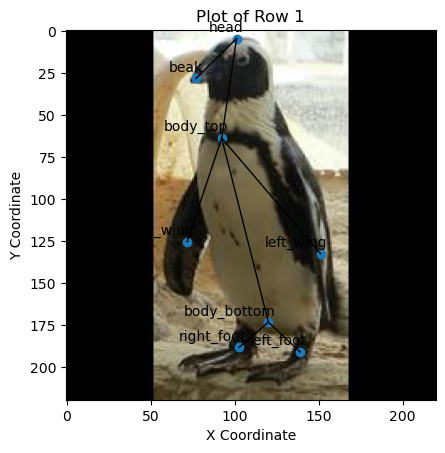

In [116]:
#IF YOU WANT TO PLOT WITH AN IMAGE 
# load the image
img_path = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/data/processed/PE_Simple/images/train/stand72_2_0_crop_220x220.jpg'
#print(img_path)
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
#print(img)

# change the img to RGB from BGR as plt uses RGB colour scale
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# scaling the pixel values to [0, 1] (you don't need to scal them back)
img = img/255

# make it a batch of images with a single image in it 
img_batch = np.expand_dims(img, axis=0)


lst = single_tensor.tolist()

new_kp = unnorm_keypoints_arr(lst, img_batch)

unnorm_kp_tensor = torch.tensor(new_kp, dtype=torch.float32)

plot_tensor_points_with_img(unnorm_kp_tensor)

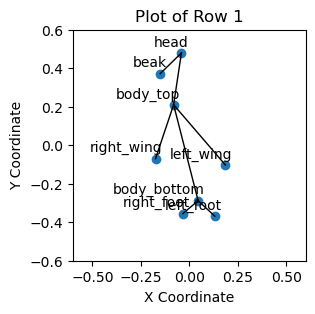

In [10]:
plot_tensor_points(single_tensor)

### 5.2.1. plot, move, save tensor

In [6]:
# class InteractivePointMover:
#     def __init__(self, tensor, labels):
#         """
#         Initialize the interactive plot with the original tensor and labels.
#         """
#         self.original_tensor = tensor.clone()
#         self.new_tensor = tensor.clone()
#         self.labels = labels
#         self.selected_index = None  # For tracking the selected point

#     def on_click(self, event):
#         """Handle mouse click to select a point."""
#         if event.inaxes:
#             x_click, y_click = event.xdata, event.ydata
#             distances = np.sqrt((self.new_tensor[:, ::2] - x_click)**2 + (self.new_tensor[:, 1::2] - y_click)**2)
#             nearest_point = np.unravel_index(np.argmin(distances), distances.shape)
#             self.selected_index = nearest_point
#             print(f"Selected point: {self.labels[nearest_point[1]]}")

#     def on_drag(self, event):
#         """Handle mouse drag to move the selected point."""
#         if self.selected_index is not None and event.inaxes:
#             x_drag, y_drag = event.xdata, event.ydata
#             self.new_tensor[self.selected_index[0], self.selected_index[1]*2] = x_drag
#             self.new_tensor[self.selected_index[0], self.selected_index[1]*2+1] = y_drag
#             self.update_plot()

#     def update_plot(self):
#         """Update the plot with the new positions."""
#         self.ax.clear()
#         self.ax.scatter(self.original_tensor[0, ::2], -self.original_tensor[0, 1::2], label="Original Points", c="blue")
#         self.ax.scatter(self.new_tensor[0, ::2], -self.new_tensor[0, 1::2], label="New Points", c="red")
#         for i, label in enumerate(self.labels):
#             self.ax.annotate(label, (self.new_tensor[0, i*2], -self.new_tensor[0, i*2+1]), textcoords="offset points", xytext=(5, 5))
#         self.ax.set_xlim(-0.5, 0.5)
#         self.ax.set_ylim(-0.5, 0.5)
#         self.ax.invert_yaxis()
#         self.ax.legend()
#         plt.draw()

#     def save_points(self, file_path):
#         """Save the new points to a .txt file."""
#         np.savetxt(file_path, self.new_tensor.numpy(), fmt="%.6f")
#         print(f"Saved new points to {file_path}")

#     def load_points(self, file_path):
#         """Load points from a .txt file into a tensor."""
#         loaded_array = np.loadtxt(file_path)
#         self.new_tensor = torch.tensor(loaded_array, dtype=torch.float32)
#         print(f"Loaded points from {file_path}")

#     def start(self):
#         """Start the interactive session."""
#         fig, self.ax = plt.subplots()
#         self.update_plot()

#         fig.canvas.mpl_connect("button_press_event", self.on_click)
#         fig.canvas.mpl_connect("motion_notify_event", self.on_drag)
#         plt.show()

# tensor_save_path_parent = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/loss_function_test/test_tensors'
# %matplotlib notebook
# %matplotlib inline
# %matplotlib widget
# # %matplotlib notebook


# import matplotlib.pyplot as plt

# plt.figure()
# plt.plot([0, 1, 2], [0, 1, 4])
# plt.title("Test Plot")
# plt.show()



# #tensor = torch.tensor([[-0.36642, -0.20897, -0.28862, -0.39661, -0.11928, -0.24787, -0.1, -0.1, -0.4, -0.3, -0.3, -0.2, -0.35, -0.1, -0.2, -0.15]], dtype=torch.float32)te
# tensor = single_tensor
# labels = ["head", "beak", "body_top", "right_wing", "left_wing", "body_bottom", "right_foot", "left_foot"]

# mover = InteractivePointMover(tensor, labels)
# mover.start()



In [ ]:
# import plotly.graph_objects as go
# import numpy as np
# import torch

# class PlotlyInteractivePointMover:
#     def __init__(self, tensor, labels):
#         """
#         Initialize the interactive plot with the original tensor and labels.
#         """
#         self.original_tensor = tensor.clone()
#         self.new_tensor = tensor.clone()
#         self.labels = labels

#     def plot_points(self):
#         """Create the interactive plot."""
#         # Extract x and y coordinates
#         x_original = self.original_tensor[0, ::2].numpy()
#         y_original = self.original_tensor[0, 1::2].numpy()
#         x_new = self.new_tensor[0, ::2].numpy()
#         y_new = self.new_tensor[0, 1::2].numpy()

#         # Create the interactive scatter plot
#         fig = go.Figure()

#         # Add original points
#         fig.add_trace(go.Scatter(x=x_original, y=y_original, mode='markers+text',
#                                  text=self.labels, textposition="top center",
#                                  marker=dict(color='blue', size=10), name='Original Points'))

#         # Add draggable new points
#         fig.add_trace(go.Scatter(x=x_new, y=y_new, mode='markers+text',
#                                  text=self.labels, textposition="top center",
#                                  marker=dict(color='red', size=10), name='New Points'))

#         # Set layout
#         fig.update_layout(title="Interactive Point Editor",
#                           xaxis_title="X Coordinate",
#                           yaxis_title="Y Coordinate",
#                           xaxis=dict(range=[-0.5, 0.5]),
#                           yaxis=dict(range=[-0.5, 0.5]),
#                           dragmode="pan")

#         # Display the figure
#         fig.show()

#     def save_points(self, file_path):
#         """Save the new points to a .txt file."""
#         np.savetxt(file_path, self.new_tensor.numpy(), fmt="%.6f")
#         print(f"Saved new points to {file_path}")

#     def load_points(self, file_path):
#         """Load points from a .txt file into the tensor."""
#         loaded_array = np.loadtxt(file_path)
#         self.new_tensor = torch.tensor(loaded_array, dtype=torch.float32)
#         print(f"Loaded points from {file_path}")

# # Example Usage
# tensor = torch.tensor([[-0.36642, -0.20897, -0.28862, -0.39661, -0.11928, -0.24787,
#                         -0.1, -0.1, -0.4, -0.3, -0.3, -0.2, -0.35, -0.1, -0.2, -0.15]],
#                       dtype=torch.float32)
# labels = ["head", "beak", "body_top", "right_wing", "left_wing", "body_bottom", "right_foot", "left_foot"]

# mover = PlotlyInteractivePointMover(tensor, labels)
# mover.plot_points()


In [117]:
class PlotlyInteractivePointMover:
    def __init__(self, tensor, labels):
        """
        Initialize the interactive plot with the original tensor and labels.
        """
        self.original_tensor = tensor.clone()
        self.new_tensor = tensor.clone()
        self.labels = labels

    def plot_points(self):
        """Create the interactive plot."""
        # Extract x and y coordinates
        x_original = self.original_tensor[0, ::2].numpy()
        y_original = self.original_tensor[0, 1::2].numpy()
        x_new = self.new_tensor[0, ::2].numpy()
        y_new = self.new_tensor[0, 1::2].numpy()

        # Create the interactive scatter plot
        fig = go.Figure()

        # Add original points
        fig.add_trace(go.Scatter(x=x_original, y=y_original, mode='markers+text',
                                 text=self.labels, textposition="top center",
                                 marker=dict(color='blue', size=10), name='Original Points'))

        # Add draggable new points
        fig.add_trace(go.Scatter(x=x_new, y=y_new, mode='markers+text',
                                 text=self.labels, textposition="top center",
                                 marker=dict(color='red', size=10), name='New Points'))

        # Set layout
        fig.update_layout(title="Interactive Point Editor",
                          xaxis_title="X Coordinate",
                          yaxis_title="Y Coordinate",
                          xaxis=dict(scaleanchor="y", range=[-0.6, 0.6]),  # Ensures square scale
                          yaxis=dict(range=[-0.6, 0.6]),
                          dragmode="pan")

        # Display the figure
        fig.show()

    def adjust_points(self, index, new_x, new_y):
        """Adjust a specific point's coordinates in the new tensor."""
        self.new_tensor[0, index * 2] = new_x
        self.new_tensor[0, index * 2 + 1] = new_y
        print(f"Adjusted {self.labels[index]} to new coordinates: ({new_x}, {new_y})")

    def save_points(self, file_path):
        """Save the new points to a .txt file."""
        np.savetxt(file_path, self.new_tensor.numpy(), fmt="%.6f")
        print(f"Saved new points to {file_path}")

    def load_points(self, file_path):
        """Load points from a .txt file into the tensor."""
        loaded_array = np.loadtxt(file_path)
        self.new_tensor = torch.tensor(loaded_array, dtype=torch.float32)
        print(f"Loaded points from {file_path}")

In [118]:
labels = ["head", "beak", "body_top", "right_wing", "left_wing", "body_bottom", "right_foot", "left_foot"]
tensor_save_path_parent = '/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/loss_function_test/test_tensors'

In [119]:
mover = PlotlyInteractivePointMover(single_tensor, labels)

In [120]:
new_x = 0.03
new_y = -0.33

In [121]:
mover.plot_points()

In [ ]:
mover.adjust_points(index=1, new_x=new_x, new_y=new_y)

In [ ]:
mover.save_points(tensor_save_path_parent+"/beak_adjust_sameAngleLeftSide")

YOU NEED JUST RUN THE BELOW TO LOAD AN ADJUSTED POINT

In [122]:
mover.load_points(tensor_save_path_parent+"/beak_adjust_sameAngleLeftSide")

Loaded points from /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/loss_function_test/test_tensors/beak_adjust_sameAngleLeftSide


In [123]:
adjusted_tensor = mover.new_tensor.unsqueeze(0)
# use the below for if created a new tensor and above for the when you load a tensor 
#adjusted_tensor = mover.new_tensor

In [ ]:
# plot_tensor_points(adjusted_tensor)

In [124]:
both_tensors = torch.cat((single_tensor,adjusted_tensor), dim=0)

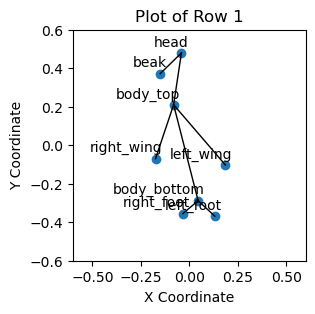

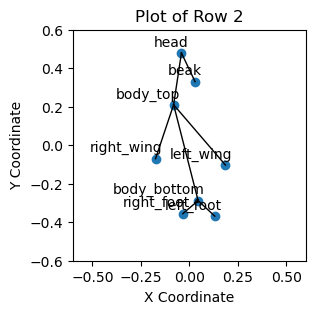

In [125]:
plot_tensor_points(both_tensors)

## 5.3. View the loss values

In [239]:
y_true = single_tensor
y_pred = adjusted_tensor

In [259]:
print("Total loss:",masked_simpleAngles(y_true, y_pred))

Total loss: tensor(0.0117)


# 6. Implement pretrained encoders

## 6.0 Original DeepPose Encoder (AlexNet)

In [4]:
# # DEEPPOSE ORIGINAL (no pretrained encoder)
# class DeepPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         # Initializes the DeepPoseModel with the dataset and training configuration.
#         super(DeepPoseModel, self).__init__()
        
#         # The feature extractor part of the model, composed of several convolutional layers.
#         self.features = nn.Sequential(
#             # Conv2d: Input channels = 3 (RGB image), Output channels = 48, kernel size = 11x11,
#             # stride = 4, padding = 4. 
#             # Input: (batch_size, 3, 220, 220)
#             # Output: (batch_size, 48, 55, 55)
#             nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 48, 55, 55)
#             # Output: (batch_size, 48, 27, 27)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
#             # stride = 1, padding = 2.
#             # Input: (batch_size, 48, 27, 27)
#             # Output: (batch_size, 128, 27, 27)
#             nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 128, 27, 27)
#             # Output: (batch_size, 128, 13, 13)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 192, Output channels = 128, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 128, 13, 13)
#             nn.Conv2d(192, 128, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # MaxPool2d: Kernel size = 3x3, stride = 2.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             nn.MaxPool2d(kernel_size=3, stride=2)
#         )
        
#         # The classifier part of the model, composed of fully connected layers.
#         self.classifier = nn.Sequential(
#             # Flatten the input tensor
#             # Input: (batch_size, 128, 6, 6)
#             # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
#             nn.Flatten(),
            
#             # Linear layer with input size 4608 and output size 4096
#             # Input: (batch_size, 4608)
#             # Output: (batch_size, 4096)
#             nn.Linear(128 * 6 * 6, 4096),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Dropout layer with 60% dropout rate
#             nn.Dropout(0.6),
            
#             # Linear layer with input size 4096 and output size 4096
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, 4096)
#             nn.Linear(4096, 4096),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Dropout layer with 60% dropout rate
#             nn.Dropout(0.6),
            
#             # Final linear layer with input size 4096 and output size nkeypoints * 2
#             # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, nkeypoints * 2)
#             nn.Linear(4096, nkeypoints * 2)
#         )
        
#     def forward(self, x):
#         # Define the forward pass through the network.
#         # Pass input `x` through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x

In [6]:
# # DEEPPOSE (Encoder test 6 version - with GAP)
# class DeepPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         # Initializes the DeepPoseModel with the dataset and training configuration.
#         super(DeepPoseModel, self).__init__()
        
#         # The feature extractor part of the model, composed of several convolutional layers.
#         self.features = nn.Sequential(
#             # Conv2d: Input channels = 3 (RGB image), Output channels = 48, kernel size = 11x11,
#             # stride = 4, padding = 4. 
#             # Input: (batch_size, 3, 220, 220)
#             # Output: (batch_size, 48, 55, 55)
#             nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 48, 55, 55)
#             # Output: (batch_size, 48, 27, 27)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
#             # stride = 1, padding = 2.
#             # Input: (batch_size, 48, 27, 27)
#             # Output: (batch_size, 128, 27, 27)
#             nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 128, 27, 27)
#             # Output: (batch_size, 128, 13, 13)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             #------------CHANGE----------------
#             # Here I have also changed to 192 output units instead of the 128 
#             # Conv2d: Input channels = 192, Output channels = 128, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 192, 13, 13)
#             # Output: (batch_size, 128, 13, 13)
#             nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # MaxPool2d: Kernel size = 3x3, stride = 2.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             #nn.MaxPool2d(kernel_size=3, stride=2)
#             #-----------CHANGE------------------
#             # Replace maxpool2d with a global pooling to reduce size
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             nn.AdaptiveAvgPool2d(1)
#         )
        
#         # The classifier part of the model, composed of fully connected layers.
#         self.classifier = nn.Sequential(
#             # Flatten the input tensor
#             # Input: (batch_size, 128, 6, 6)
#             # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
#             nn.Flatten(),
            
#             #------------CHANGE----------------
#             # Here I have also changed to 192 units 
#             # Linear layer with input size 4608 and output size 4096
#             # Input: (batch_size, 4608)
#             # Output: (batch_size, 4096)
#             nn.Linear(192, 4096),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Dropout layer with 60% dropout rate
#             nn.Dropout(0.6),
            
#             # --------CHANGE---------------
#             # Removed this FC layer and subsequent activation and dropout as only 7 layers are supposed to be present
#             # # Linear layer with input size 4096 and output size 4096
#             # # Input: (batch_size, 4096)
#             # # Output: (batch_size, 4096)
#             # nn.Linear(4096, 4096),
            
#             # # ReLU activation function applied in place (no extra memory allocation)
#             # nn.ReLU(inplace=True),
            
#             # # Dropout layer with 60% dropout rate
#             # nn.Dropout(0.6),
            
#             # Final linear layer with input size 4096 and output size nkeypoints * 2
#             # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, nkeypoints * 2)
#             nn.Linear(4096, nkeypoints * 2)
#         )
        
#     def forward(self, x):
#         # Define the forward pass through the network.
#         # Pass input `x` through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x

In [4]:
# # DEEPPOSE (Encoder test 12 version - with GAP - remove some layers to make smaller encoder) - removed the 2 x 192 layers
# class DeepPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         # Initializes the DeepPoseModel with the dataset and training configuration.
#         super(DeepPoseModel, self).__init__()
        
#         # The feature extractor part of the model, composed of several convolutional layers.
#         self.features = nn.Sequential(
#             # Conv2d: Input channels = 3 (RGB image), Output channels = 48, kernel size = 11x11,
#             # stride = 4, padding = 4. 
#             # Input: (batch_size, 3, 220, 220)
#             # Output: (batch_size, 48, 55, 55)
#             nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 48, 55, 55)
#             # Output: (batch_size, 48, 27, 27)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
#             # stride = 1, padding = 2.
#             # Input: (batch_size, 48, 27, 27)
#             # Output: (batch_size, 128, 27, 27)
#             nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
#             # Local Response Normalization (LRN) over 5 neighboring channels
#             nn.LocalResponseNorm(5),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),

#             # Max pooling with 3x3 kernel and stride 2
#             # Input: (batch_size, 128, 27, 27)
#             # Output: (batch_size, 128, 13, 13)
#             nn.MaxPool2d(kernel_size=3, stride=2),
            
#             # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
#             # stride = 1, padding = 1.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 192, 13, 13)
#             nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # -------- REMOVE THE NEXT TWO CONV LAYERS ------
#             # # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
#             # # stride = 1, padding = 1.
#             # # Input: (batch_size, 192, 13, 13)
#             # # Output: (batch_size, 192, 13, 13)
#             # nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # # # ReLU activation function applied in place (no extra memory allocation)
#             # nn.ReLU(inplace=True),
            
#             # #------------CHANGE----------------
#             # # Here I have also changed to 192 output units instead of the 128 
#             # # Conv2d: Input channels = 192, Output channels = 128, kernel size = 3x3,
#             # # stride = 1, padding = 1.
#             # # Input: (batch_size, 192, 13, 13)
#             # # Output: (batch_size, 128, 13, 13)
#             # nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
#             # # ReLU activation function applied in place (no extra memory allocation)
#             # nn.ReLU(inplace=True),
#             # -------- REMOVE THE NEXT TWO CONV LAYERS ------

#             # MaxPool2d: Kernel size = 3x3, stride = 2.
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             #nn.MaxPool2d(kernel_size=3, stride=2)
#             #-----------CHANGE------------------
#             # Replace maxpool2d with a global pooling to reduce size
#             # Input: (batch_size, 128, 13, 13)
#             # Output: (batch_size, 128, 6, 6)
#             nn.AdaptiveAvgPool2d(1)
#         )
        
#         # The classifier part of the model, composed of fully connected layers.
#         self.classifier = nn.Sequential(
#             # Flatten the input tensor
#             # Input: (batch_size, 128, 6, 6)
#             # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
#             nn.Flatten(),
            
#             #------------CHANGE----------------
#             # Here I have also changed to 192 units 
#             # Linear layer with input size 4608 and output size 4096
#             # Input: (batch_size, 4608)
#             # Output: (batch_size, 4096)
#             nn.Linear(192, 4096),
            
#             # ReLU activation function applied in place (no extra memory allocation)
#             nn.ReLU(inplace=True),
            
#             # Dropout layer with 60% dropout rate
#             nn.Dropout(0.6),
            
#             # --------CHANGE---------------
#             # Removed this FC layer and subsequent activation and dropout as only 7 layers are supposed to be present
#             # # Linear layer with input size 4096 and output size 4096
#             # # Input: (batch_size, 4096)
#             # # Output: (batch_size, 4096)
#             # nn.Linear(4096, 4096),
            
#             # # ReLU activation function applied in place (no extra memory allocation)
#             # nn.ReLU(inplace=True),
            
#             # # Dropout layer with 60% dropout rate
#             # nn.Dropout(0.6),
            
#             # Final linear layer with input size 4096 and output size nkeypoints * 2
#             # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
#             # Input: (batch_size, 4096)
#             # Output: (batch_size, nkeypoints * 2)
#             nn.Linear(4096, nkeypoints * 2)
#         )
        
#     def forward(self, x):
#         # Define the forward pass through the network.
#         # Pass input `x` through the feature extractor
#         x = self.features(x)
#         # Pass the result through the classifier to get the final output
#         x = self.classifier(x)
#         return x

### 6.0.1. Final tests

#### 6.0.1.1. Learning rate adjustment test


In [6]:
# Learning rate test - DEEPPOSE (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class DeepPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        # Initializes the DeepPoseModel with the dataset and training configuration.
        super(DeepPoseModel, self).__init__()
        
        # The feature extractor part of the model, composed of several convolutional layers.
        self.features = nn.Sequential(
            # Conv2d: Input channels = 3 (RGB image), Output channels = 48, kernel size = 11x11,
            # stride = 4, padding = 4. 
            # Input: (batch_size, 3, 220, 220)
            # Output: (batch_size, 48, 55, 55)
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=4),
            
            # Local Response Normalization (LRN) over 5 neighboring channels
            nn.LocalResponseNorm(5),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),

            # Max pooling with 3x3 kernel and stride 2
            # Input: (batch_size, 48, 55, 55)
            # Output: (batch_size, 48, 27, 27)
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Conv2d: Input channels = 48, Output channels = 128, kernel size = 5x5,
            # stride = 1, padding = 2.
            # Input: (batch_size, 48, 27, 27)
            # Output: (batch_size, 128, 27, 27)
            nn.Conv2d(48, 128, kernel_size=5, stride=1, padding=2),
            
            # Local Response Normalization (LRN) over 5 neighboring channels
            nn.LocalResponseNorm(5),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),

            # Max pooling with 3x3 kernel and stride 2
            # Input: (batch_size, 128, 27, 27)
            # Output: (batch_size, 128, 13, 13)
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Conv2d: Input channels = 128, Output channels = 192, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 128, 13, 13)
            # Output: (batch_size, 192, 13, 13)
            nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 192, 13, 13)
            # Output: (batch_size, 192, 13, 13)
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            #------------CHANGE----------------
            # Here I have also changed to 192 output units instead of the 128 
            # Conv2d: Input channels = 192, Output channels = 192, kernel size = 3x3,
            # stride = 1, padding = 1.
            # Input: (batch_size, 192, 13, 13)
            # Output: (batch_size, 128, 13, 13)
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Replace maxpool2d with a global pooling to reduce size
            # Input: (batch_size, 128, 13, 13)
            # Output: (batch_size, 128, 6, 6)
            nn.AdaptiveAvgPool2d(1)
        )
        
        # The classifier part of the model, composed of fully connected layers.
        self.classifier = nn.Sequential(
            # Flatten the input tensor
            # Input: (batch_size, 128, 6, 6)
            # Output: (batch_size, 128 * 6 * 6) = (batch_size, 4608)
            nn.Flatten(),
            
            #------------CHANGE----------------
            # Here I have also changed to 192 units 
            # Linear layer with input size 4608 and output size 4096
            # Input: (batch_size, 4608)
            # Output: (batch_size, 4096)
            nn.Linear(192, 4096),
            
            # ReLU activation function applied in place (no extra memory allocation)
            nn.ReLU(inplace=True),
            
            # Dropout layer with 60% dropout rate
            nn.Dropout(0.6),
                       
            # Final linear layer with input size 4096 and output size nkeypoints * 2
            # Output is (nkeypoints * 2) coordinates (x, y) for each keypoint
            # Input: (batch_size, 4096)
            # Output: (batch_size, nkeypoints * 2)
            nn.Linear(4096, nkeypoints * 2)
        )
        
    def forward(self, x):
        # Define the forward pass through the network.
        # Pass input `x` through the feature extractor
        x = self.features(x)
        # Pass the result through the classifier to get the final output
        x = self.classifier(x)
        return x

In [ ]:
# DeepPose Model Summary
model = DeepPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

### 6.1. Implement pretrained AlexNet


In [5]:
# Learning rate test - ResNet50 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class AlexNetEncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with ResNet-50 as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(AlexNetEncoderPoseModel, self).__init__()

        # Load a pretrained ResNet-50 model
        #resnet50 = models.resnet50(pretrained=True)
        #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        alexnet = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)
        

        # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
        # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
        # only removing the final fully connected layer and leaving the pooling beforehand
        self.encoder = nn.Sequential(*list(alexnet.children())[:-2])

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        
        # Flatten layer: Prepares the output from the encoder for the fully connected layers
        self.flatten = nn.Flatten()

        # Define the decoder part of the model (fully connected layers)
        # The input size depends on the output size of the ResNet encoder
        # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
        self.decoder = nn.Sequential(
            nn.Linear(256, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6), # tried 0.3 - didnt work
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass the input through the encoder (ResNet-50)
        x = self.encoder(x)

        # Global average pooling to decrease output size
        x = self.GAP(x)

        # Flatten the output from the encoder
        x = self.flatten(x)

        # Pass the flattened tensor through the decoder
        x = self.decoder(x)

        return x

In [6]:
# DeepPose Model Summary
model = AlexNetEncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 54, 54]          23,296
              ReLU-2           [-1, 64, 54, 54]               0
         MaxPool2d-3           [-1, 64, 26, 26]               0
            Conv2d-4          [-1, 192, 26, 26]         307,392
              ReLU-5          [-1, 192, 26, 26]               0
         MaxPool2d-6          [-1, 192, 12, 12]               0
            Conv2d-7          [-1, 384, 12, 12]         663,936
              ReLU-8          [-1, 384, 12, 12]               0
            Conv2d-9          [-1, 256, 12, 12]         884,992
             ReLU-10          [-1, 256, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         590,080
             ReLU-12          [-1, 256, 12, 12]               0
        MaxPool2d-13            [-1, 256, 5, 5]               0
AdaptiveAvgPool2d-14            [-1, 25

## 6.1 ResNet Implementation

### 6.1.1. ResNet-50
this was too big and GPU ran out of memory

In [83]:
# # ResNet-50 (Encoder test 5 - pool, flattern, FC)
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
#         # only removing the final fully connected layer and leaving the pooling beforehand
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-1])

        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             # Using the original output
#             nn.Linear(2048, nkeypoints * 2)

#             # # Fully connected layer 1
#             # nn.Linear(2048 * 7 * 7, 64),  # Input size: 2048*7*7, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 2
#             # nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 3 (final output layer)
#             # nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [18]:
# # ResNet-50 (Encoder test 6 - original decoder FC-4096 with GAP) - tried decreasing dropout - didn't work - increasing drop out to 0.85 did help
# # this suggests that the issue is overfitting. But the increase in dropout causes model val loss and pck to jump around alot)
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
#         # only removing the final fully connected layer and leaving the pooling beforehand
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-1])

        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(2048, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6), # tried 0.3 - didnt work
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)

#             # # Fully connected layer 1
#             # nn.Linear(2048 * 7 * 7, 64),  # Input size: 2048*7*7, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 2
#             # nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 3 (final output layer)
#             # nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [161]:
# # ResNet-50 (Encoder test 7 - original decoder FC-4096 with GAP and frozen layers - first 3 blocks frozen, last 2 are not=[-3] ) - prevent overfitting?
# # !!!!! I have also adjusted the adam optimiser so check there in the train loop
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
#         # only removing the final fully connected layer and leaving the pooling beforehand
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-1])

#         # Freeze shallower layers (everything before layer3) - see GPT for layers of ResNet
#         for param in list(self.encoder.children())[:-3]:  # Freeze everything before `layer3` (Conv2d-79) - the final two blocks are unfrozen
#             for sub_param in param.parameters():
#                 sub_param.requires_grad = False

        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(2048, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)

#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [3]:
# # ResNet-50 (Encoder test 9 - original decoder FC-4096 with GAP) - tried with 0.85 dropout
# class ResNet50EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet50EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
#         # only removing the final fully connected layer and leaving the pooling beforehand
#         self.encoder = nn.Sequential(*list(resnet50.children())[:-2])

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(2048, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.85), # tried 0.3 - didnt work
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)

#             # # Fully connected layer 1
#             # nn.Linear(2048 * 7 * 7, 64),  # Input size: 2048*7*7, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 2
#             # nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 3 (final output layer)
#             # nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [ ]:
# # Check that the last 2 
# model = ResNet50EncoderPoseModel()
# for name, param in model.encoder.named_parameters():
#     print(f"{name}: {'Trainable' if param.requires_grad else 'Frozen'}")


In [ ]:
# model = ResNet50EncoderPoseModel()
# # check frozen layers
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)  # Move model to GPU
# summary(model.frozen_layers, input_size=(3, 220, 220), device=str(device))

# checking that all layers are trainable (they are)
# for param in model.encoder.parameters():
#     print(param.requires_grad)  # Should be True
# # checking the model encoder output is right
# # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # model = model.to(device)  # Move model to GPU
# dummy_input = torch.randn(1, 3, 220, 220)#.to('cuda')
# output = model.encoder(dummy_input)
# print(output.shape)  # Should match expected size
# output2 = model.flatten(output)
# print(output2.shape)
# output3 = model.decoder(output2)
# print(output3.shape)

In [ ]:
# resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = resnet50.to(device)  # Move model to GPU
# summary(model, input_size=(3, 220, 220), device=str(device))

#### 6.1.1. Final tests

##### 6.1.1.2. Learning rate adjustments

In [7]:
# Learning rate test - ResNet50 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class ResNet50EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with ResNet-50 as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(ResNet50EncoderPoseModel, self).__init__()

        # Load a pretrained ResNet-50 model
        #resnet50 = models.resnet50(pretrained=True)
        #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        

        # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
        # self.encoder = nn.Sequential(*list(resnet50.children())[:-2])
        # only removing the final fully connected layer and leaving the pooling beforehand
        self.encoder = nn.Sequential(*list(resnet50.children())[:-2])

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        
        # Flatten layer: Prepares the output from the encoder for the fully connected layers
        self.flatten = nn.Flatten()

        # Define the decoder part of the model (fully connected layers)
        # The input size depends on the output size of the ResNet encoder
        # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
        self.decoder = nn.Sequential(
            nn.Linear(2048, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6), # tried 0.3 - didnt work
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass the input through the encoder (ResNet-50)
        x = self.encoder(x)

        # Global average pooling to decrease output size
        x = self.GAP(x)

        # Flatten the output from the encoder
        x = self.flatten(x)

        # Pass the flattened tensor through the decoder
        x = self.decoder(x)

        return x


In [8]:
# DeepPose Model Summary
model = ResNet50EncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 110, 110]           9,408
       BatchNorm2d-2         [-1, 64, 110, 110]             128
              ReLU-3         [-1, 64, 110, 110]               0
         MaxPool2d-4           [-1, 64, 55, 55]               0
            Conv2d-5           [-1, 64, 55, 55]           4,096
       BatchNorm2d-6           [-1, 64, 55, 55]             128
              ReLU-7           [-1, 64, 55, 55]               0
            Conv2d-8           [-1, 64, 55, 55]          36,864
       BatchNorm2d-9           [-1, 64, 55, 55]             128
             ReLU-10           [-1, 64, 55, 55]               0
           Conv2d-11          [-1, 256, 55, 55]          16,384
      BatchNorm2d-12          [-1, 256, 55, 55]             512
           Conv2d-13          [-1, 256, 55, 55]          16,384
      BatchNorm2d-14          [-1, 256,

### 6.1.2. ResNet-34


In [87]:
# # ResNet-34 (Encoder test 5 - pool, flattern, FC)
# class ResNet34EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet34EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
#         # adjusting to only use the current output
#         self.encoder = nn.Sequential(*list(resnet34.children())[:-1])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-34 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 512, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, nkeypoints*2)
#             # # Fully connected layer 1
#             # nn.Linear(512 * 7 * 7, 64),  # Input size: 512*7*7, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 2
#             # nn.Linear(64, 64),  # Input size: 4096, Output size: 4096
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # # Fully connected layer 3 (final output layer)
#             # nn.Linear(64, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [ ]:
# # ResNet-34 (Encoder test 6 - original decoder FC-4096 with GAP)
# class ResNet34EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet34EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
#         # adjusting to only use the current output
#         self.encoder = nn.Sequential(*list(resnet34.children())[:-1])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-34 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 512, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [2]:
# # ResNet-34 (Encoder test 9 - original decoder FC-4096 with own GAP, 0.3 dropout)
# class ResNet34EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet34EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         # self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
#         # adjusting to only use the current output
#         self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-34 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 512, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)
    
#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [ ]:
# resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = resnet34.to(device)  # Move model to GPU
# summary(model, input_size=(3, 220, 220), device=str(device))

In [ ]:
# model = ResNet34EncoderPoseModel()
# # checking that all layers are trainable (they are)
# for param in model.encoder.parameters():
#     print(param.requires_grad)  # Should be True
# # checking the model encoder output is right
# # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # model = model.to(device)  # Move model to GPU
# dummy_input = torch.randn(1, 3, 220, 220)#.to('cuda')
# output = model.encoder(dummy_input)
# print(output.shape)  # Should match expected size
# output2 = model.flatten(output)
# print(output2.shape)
# output3 = model.decoder(output2)
# print(output3.shape)

#### 6.1.2. Final tests

##### 6.1.2.1. Learning rate adjustment test

In [9]:
# Learning rate test - ResNet34 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class ResNet34EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with ResNet-50 as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(ResNet34EncoderPoseModel, self).__init__()

        # Load a pretrained ResNet-50 model
        #resnet50 = models.resnet50(pretrained=True)
        #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        resnet34 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        

        # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
        # self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
        # adjusting to only use the current output
        self.encoder = nn.Sequential(*list(resnet34.children())[:-2])
        
        # Flatten layer: Prepares the output from the encoder for the fully connected layers
        self.flatten = nn.Flatten()

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Define the decoder part of the model (fully connected layers)
        # The input size depends on the output size of the ResNet encoder
        # ResNet-34 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 512, 7, 7)
        self.decoder = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass the input through the encoder (ResNet-50)
        x = self.encoder(x)
    
        # Global average pooling to decrease output size
        x = self.GAP(x)

        # Flatten the output from the encoder
        x = self.flatten(x)

        # Pass the flattened tensor through the decoder
        x = self.decoder(x)

        return x

In [10]:
# ResNet-34 Model Summary
model = ResNet34EncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 110, 110]           9,408
       BatchNorm2d-2         [-1, 64, 110, 110]             128
              ReLU-3         [-1, 64, 110, 110]               0
         MaxPool2d-4           [-1, 64, 55, 55]               0
            Conv2d-5           [-1, 64, 55, 55]          36,864
       BatchNorm2d-6           [-1, 64, 55, 55]             128
              ReLU-7           [-1, 64, 55, 55]               0
            Conv2d-8           [-1, 64, 55, 55]          36,864
       BatchNorm2d-9           [-1, 64, 55, 55]             128
             ReLU-10           [-1, 64, 55, 55]               0
       BasicBlock-11           [-1, 64, 55, 55]               0
           Conv2d-12           [-1, 64, 55, 55]          36,864
      BatchNorm2d-13           [-1, 64, 55, 55]             128
             ReLU-14           [-1, 64,

### 6.1.3. ResNet-18


In [3]:
# # ResNet-18
# class ResNet18EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet18EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet18.children())[:-2])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             # Fully connected layer 1
#             nn.Linear(512 * 7 * 7, 4096),  # Input size: 512*7*7, Output size: 4096
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # Fully connected layer 2
#             nn.Linear(4096, 4096),  # Input size: 4096, Output size: 4096
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),  # Dropout to reduce overfitting

#             # Fully connected layer 3 (final output layer)
#             nn.Linear(4096, nkeypoints * 2)  # Output size: nkeypoints * 2 (x, y coordinates for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [4]:
# # ResNet-18 (Encoder test 8 - original 4096 decoder with pooling layer, smaller encoder)
# class ResNet18EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet18EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet18.children())[:-1])
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )


#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x


In [8]:
# # ResNet-18 (Encoder test 9 - original 4096 decoder with OWN GAP layer, smaller encoder, no dropout)
# class ResNet18EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet18EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet18.children())[:-2])

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )


#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

In [3]:
# # ResNet-18 (Encoder test 11 - original 4096 decoder with OWN GAP layer, smaller encoder, no dropout, train from scratch)
# class ResNet18EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model with ResNet-50 as the encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(ResNet18EncoderPoseModel, self).__init__()

#         # Load a pretrained ResNet-50 model
#         #resnet50 = models.resnet50(pretrained=True)
#         #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
#         resnet18 = models.resnet18() # default is none weights
        

#         # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
#         self.encoder = nn.Sequential(*list(resnet18.children())[:-2])

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)
        
#         # Flatten layer: Prepares the output from the encoder for the fully connected layers
#         self.flatten = nn.Flatten()

#         # Define the decoder part of the model (fully connected layers)
#         # The input size depends on the output size of the ResNet encoder
#         # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
#         self.decoder = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.6),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )


#     def forward(self, x):
#         """
#         Defines the forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 220, 220).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         # Pass the input through the encoder (ResNet-50)
#         x = self.encoder(x)

#         # Global average pooling to decrease output size
#         x = self.GAP(x)

#         # Flatten the output from the encoder
#         x = self.flatten(x)

#         # Pass the flattened tensor through the decoder
#         x = self.decoder(x)

#         return x

#### 6.1.3. Final tests

##### 6.1.3.1. Learning rate adjustment test

In [11]:
# Learning rate test - ResNet18 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class ResNet18EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with ResNet-50 as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(ResNet18EncoderPoseModel, self).__init__()

        # Load a pretrained ResNet-50 model
        #resnet50 = models.resnet50(pretrained=True)
        #resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT) # default is none weights
        

        # Remove the final fully connected layer of ResNet-50 (we'll add our own decoder)
        self.encoder = nn.Sequential(*list(resnet18.children())[:-2])

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)
        
        # Flatten layer: Prepares the output from the encoder for the fully connected layers
        self.flatten = nn.Flatten()

        # Define the decoder part of the model (fully connected layers)
        # The input size depends on the output size of the ResNet encoder
        # ResNet-50 with an input image size of (3, 220, 220) produces an output of shape (batch_size, 2048, 7, 7)
        self.decoder = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )


    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass the input through the encoder (ResNet-50)
        x = self.encoder(x)

        # Global average pooling to decrease output size
        x = self.GAP(x)

        # Flatten the output from the encoder
        x = self.flatten(x)

        # Pass the flattened tensor through the decoder
        x = self.decoder(x)

        return x

In [13]:
# ResNet-18 Model Summary
model = ResNet18EncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 110, 110]           9,408
       BatchNorm2d-2         [-1, 64, 110, 110]             128
              ReLU-3         [-1, 64, 110, 110]               0
         MaxPool2d-4           [-1, 64, 55, 55]               0
            Conv2d-5           [-1, 64, 55, 55]          36,864
       BatchNorm2d-6           [-1, 64, 55, 55]             128
              ReLU-7           [-1, 64, 55, 55]               0
            Conv2d-8           [-1, 64, 55, 55]          36,864
       BatchNorm2d-9           [-1, 64, 55, 55]             128
             ReLU-10           [-1, 64, 55, 55]               0
       BasicBlock-11           [-1, 64, 55, 55]               0
           Conv2d-12           [-1, 64, 55, 55]          36,864
      BatchNorm2d-13           [-1, 64, 55, 55]             128
             ReLU-14           [-1, 64,

## 6.2 EfficientNet Implementation

### 6.2.1 EfficientNet B0


In [76]:
# class EfficientNetB0EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB0EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT) #default is imgnet1k v1

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))
    
#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(1280 * 7 * 7, 4096),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(4096, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [ ]:
# efficientnet = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
# model = efficientnet #nn.Sequential(*list(efficientnet.features)) #.children())[:])
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)  # Move model to GPU
# summary(model, input_size=(3, 220, 220), device=str(device))

In [ ]:
# class EfficientNetB0EncoderPoseModel_HalfFC(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB0EncoderPoseModel_HalfFC, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT) #default is imgnet1k v1

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(1280 * 7 * 7, 2048),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(2048, 2048),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(2048, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [ ]:
# # EfficientNetB0EncoderPoseModel (Encoder test 11) train from scratch
# class EfficientNetB0EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB0EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B0 model
#         efficientnet = models.efficientnet_b0()# default is no pretrained weights

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             # nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, 64),
#             # nn.ReLU(inplace=True),
#             # nn.Dropout(0.3),

#             # nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)

#             nn.Linear(1280, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [ ]:
# # EfficientNet-BO Model Summary
# model = EfficientNetB0EncoderPoseModel()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)  # Move model to GPU
# summary(model, input_size=(3, 220, 220), device=str(device))

#### 6.2.1. Final tests

##### 6.2.1.1. Learning rate adjustments

In [28]:
# Learning rate test - EfficientNetB0 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class EfficientNetB0EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(EfficientNetB0EncoderPoseModel, self).__init__()

        # Load a pretrained EfficientNet-B0 model
        efficientnet = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)

        # Remove the classification head (i.e., avgpool and fc layers)
        # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
        self.encoder = nn.Sequential(*list(efficientnet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(

            nn.Linear(1280, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [29]:
# EfficientNet-BO Model Summary
model = EfficientNetB0EncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 110, 110]             864
       BatchNorm2d-2         [-1, 32, 110, 110]              64
              SiLU-3         [-1, 32, 110, 110]               0
            Conv2d-4         [-1, 32, 110, 110]             288
       BatchNorm2d-5         [-1, 32, 110, 110]              64
              SiLU-6         [-1, 32, 110, 110]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 110, 110]               0
           Conv2d-13         [-1, 16, 110, 110]             512
      BatchNorm2d-14         [-1, 16, 1

### 6.2.2 EfficientNet B2


#### 6.2.2. Final tests

##### 6.2.2.1. Learning rate adjustments

In [20]:
# Learning rate test - EfficientNetB2 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class EfficientNetB2EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained EfficientNet-B2 encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(EfficientNetB2EncoderPoseModel, self).__init__()

        # Load a pretrained EfficientNet-B0 model
        efficientnet = models.efficientnet_b2(weights=models.EfficientNet_B2_Weights.DEFAULT) #default is imgnet1k v1

        # Remove the classification head (i.e., avgpool and fc layers)
        # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
        self.encoder = nn.Sequential(*list(efficientnet.features))


        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(

            nn.Linear(1408, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [21]:
# EfficientNet-BO Model Summary
model = EfficientNetB2EncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 110, 110]             864
       BatchNorm2d-2         [-1, 32, 110, 110]              64
              SiLU-3         [-1, 32, 110, 110]               0
            Conv2d-4         [-1, 32, 110, 110]             288
       BatchNorm2d-5         [-1, 32, 110, 110]              64
              SiLU-6         [-1, 32, 110, 110]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 110, 110]               0
           Conv2d-13         [-1, 16, 110, 110]             512
      BatchNorm2d-14         [-1, 16, 1

### 6.2.2 EfficientNet-B4


In [2]:
# class EfficientNetB4EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB4EncoderPoseModel, self).__init__()

#         # Load a pretrained EfficientNet-B4 model
#         efficientnet = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.DEFAULT) #default is imgnet1k v2

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(1792 * 7 * 7, 4096),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(4096, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x


In [ ]:
# # EfficientNet-B4 Model Summary
# model = EfficientNetB4EncoderPoseModel()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)  # Move model to GPU
# summary(model, input_size=(3, 220, 220), device=str(device))

In [4]:
# class EfficientNetB4EncoderPoseModel_HalfFC(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(EfficientNetB4EncoderPoseModel_HalfFC, self).__init__()

#         # Load a pretrained EfficientNet-B4 model
#         efficientnet = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.DEFAULT) #default is imgnet1k v2

#         # Remove the classification head (i.e., avgpool and fc layers)
#         # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
#         self.encoder = nn.Sequential(*list(efficientnet.features))

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(1792 * 7 * 7, 2048),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(2048, 2048),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(2048, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x



#### 6.1.1. Final tests

##### 6.1.1.2. Learning rate adjustments

In [30]:
# Learning rate test - EfficientNetB4 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class EfficientNetB4EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained EfficientNet-B0 encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(EfficientNetB4EncoderPoseModel, self).__init__()

        # Load a pretrained EfficientNet-B0 model
        efficientnet = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.DEFAULT)

        # Remove the classification head (i.e., avgpool and fc layers)
        # EfficientNet-B0's feature extractor ends with a Conv2d layer (output: 1280 channels)
        self.encoder = nn.Sequential(*list(efficientnet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (usually 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(

            nn.Linear(1792, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [31]:
# EfficientNet-B4 Model Summary
model = EfficientNetB4EncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 48, 110, 110]           1,296
       BatchNorm2d-2         [-1, 48, 110, 110]              96
              SiLU-3         [-1, 48, 110, 110]               0
            Conv2d-4         [-1, 48, 110, 110]             432
       BatchNorm2d-5         [-1, 48, 110, 110]              96
              SiLU-6         [-1, 48, 110, 110]               0
 AdaptiveAvgPool2d-7             [-1, 48, 1, 1]               0
            Conv2d-8             [-1, 12, 1, 1]             588
              SiLU-9             [-1, 12, 1, 1]               0
           Conv2d-10             [-1, 48, 1, 1]             624
          Sigmoid-11             [-1, 48, 1, 1]               0
SqueezeExcitation-12         [-1, 48, 110, 110]               0
           Conv2d-13         [-1, 24, 110, 110]           1,152
      BatchNorm2d-14         [-1, 24, 1

## 6.3. MobileNet

### 6.3.1 MobileNetV2

In [68]:
# class MobileNetV2EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV2EncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(1280 * 7 * 7, 512),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(512, 512),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(512, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [ ]:
# # MobileNetV2EncoderPoseModel Model Summary
# model = MobileNetV2EncoderPoseModel()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)  # Move model to GPU
# summary(model, input_size=(3, 220, 220), device=str(device))

In [70]:
# class MobileNetV2EncoderPoseModel_HalfFC(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV2EncoderPoseModel_HalfFC, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#             nn.Linear(1280 * 7 * 7, 2048),  # 1280 channels * 7 * 7 spatial dimensions
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(2048, 2048),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.6),

#             nn.Linear(2048, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

In [2]:
# # MobileNetV2EncoderPoseModel (encoder test 11) - train from scratch 
# class MobileNetV2EncoderPoseModel(nn.Module):
#     def __init__(self, nkeypoints=8):
#         """
#         Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

#         Parameters:
#         - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
#         """
#         super(MobileNetV2EncoderPoseModel, self).__init__()

#         # Load a pretrained MobileNetV2 model
#         mobilenet = models.mobilenet_v2() # removed weights=models.MobileNet_V2_Weights.IMAGENET1K_V1 as default is from scratch

#         # Remove the classification head (classifier block)
#         # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
#         self.encoder = nn.Sequential(*list(mobilenet.features))

#         # GAP
#         self.GAP = nn.AdaptiveAvgPool2d(1)

#         # Flatten the output of the encoder
#         self.flatten = nn.Flatten()

#         # Decoder: fully connected layers
#         # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
#         self.decoder = nn.Sequential(
#         #     nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, 64),
#         #     nn.ReLU(inplace=True),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)


#             nn.Linear(1280, 4096),
#             nn.ReLU(inplace=True),
#             #nn.Dropout(0.3),
#             # Using the original output
#             nn.Linear(4096, nkeypoints * 2)
#         )

#     def forward(self, x):
#         """
#         Forward pass of the model.

#         Parameters:
#         - x: Input tensor of shape (batch_size, 3, 224, 224).

#         Returns:
#         - Output tensor of shape (batch_size, nkeypoints * 2).
#         """
#         x = self.encoder(x)  # (batch_size, 1280, 7, 7)
#         x = self.GAP(x)
#         x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
#         x = self.decoder(x)  # (batch_size, nkeypoints * 2)
#         return x

#### 6.3.1. Final tests

##### 6.3.1.1. Learning rate adjustments

In [32]:
# Learning rate test - MobileNetV2 (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class MobileNetV2EncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained MobileNetV2 encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(MobileNetV2EncoderPoseModel, self).__init__()

        # Load a pretrained MobileNetV2 model
        mobilenet = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT) # removed weights=models.MobileNet_V2_Weights.IMAGENET1K_V2 as default is from scratch

        # Remove the classification head (classifier block)
        # MobileNetV2's feature extractor ends with Conv2d outputting 1280 channels
        self.encoder = nn.Sequential(*list(mobilenet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(
        #     nn.Linear(1280 * 7 * 7, 64),  # 1280 channels * 7 * 7 spatial dimensions
        #     nn.ReLU(inplace=True),
        #     nn.Dropout(0.3),

        #     nn.Linear(64, 64),
        #     nn.ReLU(inplace=True),
        #     nn.Dropout(0.3),

        #     nn.Linear(64, nkeypoints * 2)  # Output: nkeypoints * 2 (x, y for each keypoint)


            nn.Linear(1280, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [33]:
# MobileNetV2EncoderPoseModel Model Summary
model = MobileNetV2EncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /home/matthew/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:12<00:00, 1.16MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 110, 110]             864
       BatchNorm2d-2         [-1, 32, 110, 110]              64
             ReLU6-3         [-1, 32, 110, 110]               0
            Conv2d-4         [-1, 32, 110, 110]             288
       BatchNorm2d-5         [-1, 32, 110, 110]              64
             ReLU6-6         [-1, 32, 110, 110]               0
            Conv2d-7         [-1, 16, 110, 110]             512
       BatchNorm2d-8         [-1, 16, 110, 110]              32
  InvertedResidual-9         [-1, 16, 110, 110]               0
           Conv2d-10         [-1, 96, 110, 110]           1,536
      BatchNorm2d-11         [-1, 96, 110, 110]             192
            ReLU6-12         [-1, 96, 110, 110]               0
           Conv2d-13           [-1, 96, 55, 55]             864
      BatchNorm2d-14           [-1, 96,

### 6.3.2. MobileNetV3Large

#### 6.3.2. Final tests

##### 6.3.2.1. Learning rate adjustments

In [36]:
# Learning rate test - MobileNetV3Large (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class MobileNetV3LargeEncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained MobileNetV3-Large encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(MobileNetV3LargeEncoderPoseModel, self).__init__()

        # Load a pretrained MobileNetV3-Large model
        mobilenet = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.DEFAULT)

        # Remove the classification head (classifier block)
        # MobileNetV3-Large's feature extractor ends with Conv2d outputting 1280 channels
        self.encoder = nn.Sequential(*list(mobilenet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(
            nn.Linear(960, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [37]:
# MobileNetV2EncoderPoseModel Model Summary
model = MobileNetV3LargeEncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 110, 110]             432
       BatchNorm2d-2         [-1, 16, 110, 110]              32
         Hardswish-3         [-1, 16, 110, 110]               0
            Conv2d-4         [-1, 16, 110, 110]             144
       BatchNorm2d-5         [-1, 16, 110, 110]              32
              ReLU-6         [-1, 16, 110, 110]               0
            Conv2d-7         [-1, 16, 110, 110]             256
       BatchNorm2d-8         [-1, 16, 110, 110]              32
  InvertedResidual-9         [-1, 16, 110, 110]               0
           Conv2d-10         [-1, 64, 110, 110]           1,024
      BatchNorm2d-11         [-1, 64, 110, 110]             128
             ReLU-12         [-1, 64, 110, 110]               0
           Conv2d-13           [-1, 64, 55, 55]             576
      BatchNorm2d-14           [-1, 64,

### 6.3.3. MobileNetV3Small

#### 6.3.3. Final tests

##### 6.3.3.1. Learning rate adjustments

In [40]:
# Learning rate test - MobileNetV3Large (Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 8)
class MobileNetV3SmallEncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model using a pretrained MobileNetV3-Large encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(MobileNetV3SmallEncoderPoseModel, self).__init__()

        # Load a pretrained MobileNetV3-Large model
        mobilenet = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)

        # Remove the classification head (classifier block)
        # MobileNetV3-Large's feature extractor ends with Conv2d outputting 1280 channels
        self.encoder = nn.Sequential(*list(mobilenet.features))

        # GAP
        self.GAP = nn.AdaptiveAvgPool2d(1)

        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Decoder: fully connected layers
        # Input dimension depends on the spatial size of the encoder's output (typically 7x7 for ~224x224 inputs)
        self.decoder = nn.Sequential(
            nn.Linear(576, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            # Using the original output
            nn.Linear(4096, nkeypoints * 2)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 224, 224).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        x = self.encoder(x)  # (batch_size, 1280, 7, 7)
        x = self.GAP(x)
        x = self.flatten(x)  # (batch_size, 1280 * 7 * 7)
        x = self.decoder(x)  # (batch_size, nkeypoints * 2)
        return x

In [41]:
# MobileNetV2EncoderPoseModel Model Summary
model = MobileNetV3SmallEncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 110, 110]             432
       BatchNorm2d-2         [-1, 16, 110, 110]              32
         Hardswish-3         [-1, 16, 110, 110]               0
            Conv2d-4           [-1, 16, 55, 55]             144
       BatchNorm2d-5           [-1, 16, 55, 55]              32
              ReLU-6           [-1, 16, 55, 55]               0
 AdaptiveAvgPool2d-7             [-1, 16, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             136
              ReLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 16, 1, 1]             144
      Hardsigmoid-11             [-1, 16, 1, 1]               0
SqueezeExcitation-12           [-1, 16, 55, 55]               0
           Conv2d-13           [-1, 16, 55, 55]             256
      BatchNorm2d-14           [-1, 16,

## 6.4. Vision Transformer

In [9]:
class ViTEncoderPoseModel(nn.Module):
    def __init__(self, nkeypoints=8):
        """
        Initializes the pose estimation model with a Vision Transformer (ViT-B/16) as the encoder.

        Parameters:
        - nkeypoints: Number of keypoints to predict, each with (x, y) coordinates.
        """
        super(ViTEncoderPoseModel, self).__init__()

        # Load a pretrained Vision Transformer (ViT-B/16)
        vit = models.vit_b_16(weights=models.vision_transformer.ViT_B_16_Weights.DEFAULT)

        # Remove the classification head (we'll use a custom decoder)
        self.encoder = nn.Sequential(
            vit.conv_proj,  # Initial projection layer
            vit.encoder  # Transformer Encoder layers
        )

        # Global Average Pooling (GAP) to get a fixed-size feature vector
        self.GAP = nn.AdaptiveAvgPool1d(1)
        
        # Flatten the output of the encoder
        self.flatten = nn.Flatten()

        # Define the decoder (Fully Connected layers)
        self.decoder = nn.Sequential(
            nn.Linear(768, 4096),  # ViT-B/16 has an embedding dimension of 768
            nn.ReLU(inplace=True),
            nn.Dropout(0.85),  # Keeping dropout same as your ResNet model
            nn.Linear(4096, nkeypoints * 2)  # Output (nkeypoints * 2)
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x: Input tensor of shape (batch_size, 3, 220, 220).

        Returns:
        - Output tensor of shape (batch_size, nkeypoints * 2).
        """
        # Pass through ViT encoder
        x = self.encoder[0](x)  # Patch Embedding Layer
        x = x.flatten(2).transpose(1, 2)  # Reshape to fit Transformer input format
        x = self.encoder[1](x)  # Transformer Encoder

        # Extract CLS token (position [0]) and apply GAP
        x = x[:, 0, :].unsqueeze(-1)  # Extract CLS token
        x = self.GAP(x).squeeze(-1)  # Apply GAP

        # Pass through the decoder
        x = self.decoder(x)

        return x


In [10]:
# Initialize the model
model = ViTEncoderPoseModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to GPU
summary(model, input_size=(3, 220, 220), device=str(device))

RuntimeError: The size of tensor a (169) must match the size of tensor b (197) at non-singleton dimension 1

# 7. Save results

## 7.1. Save results in a single csv

In [1]:
# 

def extract_results(parent_dir):
    """
    Extracts evaluation results from JSON files located in nested directories and saves them as a CSV file.

    This function scans through all model directories within a given parent directory, identifies
    an evaluation subdirectory (whose name contains "evaluation" in any casing), and extracts 
    relevant performance metrics from a JSON file named "results.json". The extracted results 
    are written to a CSV file in the parent directory.

    Parameters:
    - parent_dir (str): The absolute or relative path to the parent directory containing 
      multiple model directories.

    The CSV file is named "results.csv" and is saved in the parent directory. It contains the 
    following columns in order:
      - description
      - total_params
      - GPU_inf(ms)
      - CPU_inf(ms)
      - GFLOPs
      - val_pck005
      - val_pck01
      - pck005
      - pck01

    The function ensures model directories are processed in alphabetical order.

    Example usage:
    ```
    extract_results("/path/to/parent/directory")
    ```

    The function does not return any value but saves the extracted results as a CSV file.
    """
    
    # Get all items in the parent directory and sort them alphabetically.
    model_dirs = sorted([
        d for d in os.listdir(parent_dir)
        if os.path.isdir(os.path.join(parent_dir, d))
    ])
    
    # This list will hold the rows to be written to the CSV.
    csv_rows = []

    # Iterate through each model directory.
    for model in model_dirs:
        model_path = os.path.join(parent_dir, model)
        
        # Find a subdirectory with "evaluation" in its name (case-insensitive).
        eval_dirs = [d for d in os.listdir(model_path)
                     if os.path.isdir(os.path.join(model_path, d)) and "evaluation" in d.lower()]
        if not eval_dirs:
            continue  # Skip if no evaluation directory is found
        
        # Assuming there's only one evaluation directory per model.
        eval_dir = eval_dirs[0]
        eval_path = os.path.join(model_path, eval_dir)
        results_file = os.path.join(eval_path, "results.json")
        
        # Check if results.json exists.
        if not os.path.exists(results_file):
            continue
        
        # Open and load the JSON file.
        with open(results_file, "r") as f:
            data = json.load(f)
        
        # Extract values in the specific order:
        # description, total_params, GPU_inf(ms), CPU_inf(ms), GFLOPs, val_pck005, val_pck01, pck005, pck01.
        row = [
            data.get("description", ""),
            data.get("total_params", ""),
            data.get("GPU_inf(ms)", ""),
            data.get("CPU_inf(ms)", ""),
            data.get("GFLOPs", ""),
            data.get("val_pck005", ""),
            data.get("val_pck01", ""),
            data.get("pck005", ""),
            data.get("pck01", "")
        ]
        csv_rows.append(row)
    
    # Define the CSV file path in the parent directory.
    csv_file_path = os.path.join(parent_dir, "results.csv")
    
    # Write the header and rows to the CSV file.
    header = ["description", "total_params", "GPU_inf(ms)", "CPU_inf(ms)", "GFLOPs",
              "val_pck005", "val_pck01", "pck005", "pck01"]
    with open(csv_file_path, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header)
        writer.writerows(csv_rows)
    
    print(f"CSV file saved at: {csv_file_path}")

In [4]:
# directory path
parent_directory = "/home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 16"  
extract_results(parent_directory)

CSV file saved at: /home/matthew/Desktop/Master_Dev/masters_penguin_pose_estimation/runs/PE/Encoder test Final 1 - learning rate - GAP, flat, 4096, DropOut 0.6, batch 16/results.csv
